# Линейная регрессия с регуляризацией

In [1]:
import time

import joblib
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.model_selection
import matplotlib.pyplot as plt

## 1 Предсказания значений на следующий месяц по данным за предыдущий год

In [2]:
time_series = pd.read_csv('ts_features.csv').astype('float32')
time_series.head()

Year  Month  NumCases  Relationship_Acquaintance  Relationship_Boyfriend  \
0  1980.0    1.0    1825.0                      434.0                    18.0   
1  1980.0    2.0    1730.0                      407.0                    21.0   
2  1980.0    3.0    1743.0                      403.0                    17.0   
3  1980.0    4.0    1760.0                      430.0                    26.0   
4  1980.0    5.0    1863.0                      461.0                    27.0   

   Relationship_Boyfriend/Girlfriend  Relationship_Brother  \
0                                1.0                  25.0   
1                                5.0                   9.0   
2                                0.0                  20.0   
3                                1.0                  26.0   
4                                2.0                  21.0   

   Relationship_Common-Law Husband  Relationship_Common-Law Wife  \
0                             16.0                           9.0   
1                              9.0                          15.0   
2                             18.0                           7.0   
3                             17.0                          10.0   
4                             14.0                          14.0   

   Relationship_Daughter  ...  State_West Virginia  State_Wisconsin  \
0                   19.0  ...                  9.0             11.0   
1                   25.0  ...                 10.0             12.0   
2                   11.0  ...                  6.0             16.0   
3                   17.0  ...                  4.0             13.0   
4                   11.0  ...                 14.0             12.0   

   State_Wyoming  Perpetrator Race_Asian/Pacific Islander  \
0            1.0                                      6.0   
1            3.0                                      8.0   
2            3.0                                     13.0   
3            2.0                                     11.0   
4            1.0                                     12.0   

   Perpetrator Race_Black  Perpetrator Race_Native American/Alaska Native  \
0                   616.0                                             8.0   
1                   630.0                                             8.0   
2                   625.0                                            10.0   
3                   610.0                                             7.0   
4                   659.0                                            11.0   

   Perpetrator Race_Unknown  Perpetrator Race_White  Perpetrator Count  \
0                     515.0                   680.0              398.0   
1                     497.0                   587.0              328.0   
2                     513.0                   582.0              292.0   
3                     495.0                   637.0              328.0   
4                     551.0                   630.0              290.0   

   Victim Count  
0         228.0  
1         164.0  
2         160.0  
3         194.0  
4         208.0  

[5 rows x 120 columns]

In [3]:
tmp = time_series[time_series.columns[:3]].copy()
for column in time_series.columns[2:]:
    for i in range(1, 13, 1):
        tmp[f'{column}_{i}'] = time_series[column].shift(i)

time_series = tmp

In [4]:
print(f'Number of features: {len(time_series.columns[3:])}')

Number of features: 1416


In [5]:
time_series = time_series[12:]
time_series.head()

Year  Month  NumCases  NumCases_1  NumCases_2  NumCases_3  NumCases_4  \
12  1981.0    1.0    1987.0      1965.0      1861.0      1935.0      1869.0   
13  1981.0    2.0    1777.0      1987.0      1965.0      1861.0      1935.0   
14  1981.0    3.0    1910.0      1777.0      1987.0      1965.0      1861.0   
15  1981.0    4.0    1771.0      1910.0      1777.0      1987.0      1965.0   
16  1981.0    5.0    1860.0      1771.0      1910.0      1777.0      1987.0   

    NumCases_5  NumCases_6  NumCases_7  ...  Victim Count_3  Victim Count_4  \
12      2371.0      2179.0      1991.0  ...           146.0           190.0   
13      1869.0      2371.0      2179.0  ...           188.0           146.0   
14      1935.0      1869.0      2371.0  ...           378.0           188.0   
15      1861.0      1935.0      1869.0  ...           236.0           378.0   
16      1965.0      1861.0      1935.0  ...           216.0           236.0   

    Victim Count_5  Victim Count_6  Victim Count_7  Victim Count_8  \
12           178.0           208.0           168.0           208.0   
13           190.0           178.0           208.0           168.0   
14           146.0           190.0           178.0           208.0   
15           188.0           146.0           190.0           178.0   
16           378.0           188.0           146.0           190.0   

    Victim Count_9  Victim Count_10  Victim Count_11  Victim Count_12  
12           194.0            160.0            164.0            228.0  
13           208.0            194.0            160.0            164.0  
14           168.0            208.0            194.0            160.0  
15           208.0            168.0            208.0            194.0  
16           178.0            208.0            168.0            208.0  

[5 rows x 1419 columns]

In [6]:
train = time_series[:-60]
test = time_series[-60:]

In [7]:
X_train = train[train.columns[3:]].to_numpy()
Y_train = train['NumCases'].to_numpy()

In [8]:
elasticNetCV_12months = sklearn.linear_model.ElasticNetCV(
    l1_ratio=[.01, .1, .5, .7, .9, .95, .99, .999, 1],
    n_alphas=1000,
    max_iter=10000,
    cv=sklearn.model_selection.TimeSeriesSplit(n_splits=3),
    verbose=3,
    n_jobs=-1,
    random_state=0
)

elasticNetCV_12months.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


(<MemoryView of 'ndarray' at 0x7f17f4938380>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17f49381e0>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17f4938ba0>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17f49386c0>, 0.0, 777.7401733398438, 1)
(<MemoryView of 'ndarray' at 0x7f17f4938860>, 0.0, 777.7401733398438, 1)
(<MemoryView of 'ndarray' at 0x7f17f4938d40>, 0.0, 178.45880126953125, 1)(<MemoryView of 'ndarray' at 0x7f17f4938a00>, 0.0, 777.7401733398438, 1)

(<MemoryView of 'ndarray' at 0x7f17f4940040>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17f49406c0>, 0.0, 777.7401733398438, 1)(<MemoryView of 'ndarray' at 0x7f17f4940a00>, 0.0, 178.45880126953125, 1)(<MemoryView of 'ndarray' at 0x7f17f4938040>, 0.0, 178.45880126953125, 1)


(<MemoryView of 'ndarray' at 0x7f17f4940380>, 0.0, 777.7401733398438, 1)
(<MemoryView of 'ndarray' at 0x7f17f4940d40>, 0.0, 777.7401733398438, 1)
(<MemoryView of 'ndarray' at 0x7f17f4938520>

(<MemoryView of 'ndarray' at 0x7f17f4396520>, 0.0, 777.7401733398438, 1)(<MemoryView of 'ndarray' at 0x7f17f4396380>, 2.4269862174987793, 1801.24169921875, 17)
(<MemoryView of 'ndarray' at 0x7f17f4392a00>, -0.1167769581079483, 1801.24169921875, 5)(<MemoryView of 'ndarray' at 0x7f17f4395d40>, 0.0, 777.7401733398438, 1)
(<MemoryView of 'ndarray' at 0x7f17f4396860>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17f4396ba0>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17f4396a00>, -0.29707175493240356, 1801.24169921875, 10)


(<MemoryView of 'ndarray' at 0x7f17f4391d40>, 0.0, 178.45880126953125, 1)(<MemoryView of 'ndarray' at 0x7f17f4947040>, 0.0, 777.7401733398438, 1)

(<MemoryView of 'ndarray' at 0x7f17f49471e0>, 0.0, 178.45880126953125, 1)(<MemoryView of 'ndarray' at 0x7f17f4396d40>, 0.0, 777.7401733398438, 1)
(<MemoryView of 'ndarray' at 0x7f17f4947520>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17f4947380>, 1.2957462072372437, 1801.24

(<MemoryView of 'ndarray' at 0x7f17f43c4ba0>, 0.0, 777.7401733398438, 1)(<MemoryView of 'ndarray' at 0x7f17f43bcba0>, 4.828425407409668, 1801.24169921875, 10)

(<MemoryView of 'ndarray' at 0x7f17f43bc6c0>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17f43bcd40>, 2.4284415245056152, 1801.24169921875, 7)(<MemoryView of 'ndarray' at 0x7f17f43bc860>, 0.0, 178.45880126953125, 1)(<MemoryView of 'ndarray' at 0x7f17f43931e0>, 0.0, 777.7401733398438, 1)
(<MemoryView of 'ndarray' at 0x7f17f4393520>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17f43bca00>, 2.348775863647461, 1801.24169921875, 4)
(<MemoryView of 'ndarray' at 0x7f17f4393380>, 0.0, 777.7401733398438, 1)


(<MemoryView of 'ndarray' at 0x7f17f4393a00>, 0.0, 777.7401733398438, 1)(<MemoryView of 'ndarray' at 0x7f17f4393ba0>, 0.0, 178.45880126953125, 1)(<MemoryView of 'ndarray' at 0x7f17f4393040>, 0.0, 178.45880126953125, 1)

(<MemoryView of 'ndarray' at 0x7f17f43991e0>, 0.0, 178.45880126953125, 1)
(<Mem

(<MemoryView of 'ndarray' at 0x7f17f436c380>, 0.4938701093196869, 777.7401733398438, 11)
(<MemoryView of 'ndarray' at 0x7f17f436e520>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17f436ea00>, 15.338342666625977, 1801.24169921875, 11)(<MemoryView of 'ndarray' at 0x7f17f436c6c0>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17f43ab040>, 0.0, 178.45880126953125, 1)

(<MemoryView of 'ndarray' at 0x7f17f436e6c0>, 1.0320639610290527, 1801.24169921875, 4)(<MemoryView of 'ndarray' at 0x7f17f436e860>, 0.21215395629405975, 777.7401733398438, 17)(<MemoryView of 'ndarray' at 0x7f17f436ed40>, 20.478010177612305, 1801.24169921875, 9)

(<MemoryView of 'ndarray' at 0x7f17f436eba0>, 0.0, 178.45880126953125, 1)

(<MemoryView of 'ndarray' at 0x7f17f436e040>, 0.2955183684825897, 777.7401733398438, 5)
(<MemoryView of 'ndarray' at 0x7f17f436e1e0>, 0.0, 178.45880126953125, 1)(<MemoryView of 'ndarray' at 0x7f17f43ab1e0>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at

(<MemoryView of 'ndarray' at 0x7f17f4324d40>, 0.032321419566869736, 777.7401733398438, 4)
(<MemoryView of 'ndarray' at 0x7f17f4326380>, 12.617783546447754, 1801.24169921875, 4)(<MemoryView of 'ndarray' at 0x7f17f4326520>, 40.762611389160156, 1801.24169921875, 10)(<MemoryView of 'ndarray' at 0x7f17f43266c0>, 2.869920492172241, 777.7401733398438, 7)(<MemoryView of 'ndarray' at 0x7f17f4326040>, 6.304651737213135, 777.7401733398438, 16)
(<MemoryView of 'ndarray' at 0x7f17f4326a00>, 48.53223419189453, 1801.24169921875, 16)(<MemoryView of 'ndarray' at 0x7f17f4326ba0>, 3.5948572158813477, 777.7401733398438, 11)
(<MemoryView of 'ndarray' at 0x7f17f4326860>, 0.0, 178.45880126953125, 1)



(<MemoryView of 'ndarray' at 0x7f17f4323520>, 0.0, 178.45880126953125, 1)(<MemoryView of 'ndarray' at 0x7f17f43bf6c0>, 0.0, 178.45880126953125, 1)


(<MemoryView of 'ndarray' at 0x7f17f43bf380>, 0.2457389235496521, 777.7401733398438, 4)(<MemoryView of 'ndarray' at 0x7f17f43bf520>, 0.0, 178.45880126953125, 1)



(<MemoryView of 'ndarray' at 0x7f17f007f520>, 0.6658060550689697, 777.7401733398438, 5)
(<MemoryView of 'ndarray' at 0x7f17f007dd40>, 12.724849700927734, 777.7401733398438, 16)
(<MemoryView of 'ndarray' at 0x7f17f007d6c0>, -0.017363911494612694, 178.45880126953125, 4)(<MemoryView of 'ndarray' at 0x7f17f007d380>, -0.14833134412765503, 178.45880126953125, 3)
(<MemoryView of 'ndarray' at 0x7f17f007fa00>, 0.09599096328020096, 178.45880126953125, 11)
(<MemoryView of 'ndarray' at 0x7f17f007fd40>, 56.675418853759766, 1801.24169921875, 11)
(<MemoryView of 'ndarray' at 0x7f17f007f380>, 0.6701493859291077, 777.7401733398438, 5)(<MemoryView of 'ndarray' at 0x7f17f4374520>, 11.536858558654785, 1801.24169921875, 5)(<MemoryView of 'ndarray' at 0x7f17f4374040>, 5.485215663909912, 777.7401733398438, 12)

(<MemoryView of 'ndarray' at 0x7f17f007fba0>, 0.10924793034791946, 178.45880126953125, 18)


(<MemoryView of 'ndarray' at 0x7f17f007f6c0>, 49.98586654663086, 1801.24169921875, 19)
(<MemoryView of 'nda

(<MemoryView of 'ndarray' at 0x7f17f00a11e0>, 0.21323060989379883, 178.45880126953125, 5)
(<MemoryView of 'ndarray' at 0x7f17f00a1380>, 33.165382385253906, 1801.24169921875, 5)
(<MemoryView of 'ndarray' at 0x7f17f00a16c0>, 14.445047378540039, 777.7401733398438, 14)(<MemoryView of 'ndarray' at 0x7f17f00a1860>, 21.028406143188477, 777.7401733398438, 17)
(<MemoryView of 'ndarray' at 0x7f17f00a4040>, 0.025603067129850388, 178.45880126953125, 4)
(<MemoryView of 'ndarray' at 0x7f17f00a4380>, 99.75399017333984, 1801.24169921875, 11)
(<MemoryView of 'ndarray' at 0x7f17f00a1ba0>, 7.097698211669922, 777.7401733398438, 5)

(<MemoryView of 'ndarray' at 0x7f17f00a4520>, 0.9401971101760864, 178.45880126953125, 11)
(<MemoryView of 'ndarray' at 0x7f17f00a1a00>, 0.9745087623596191, 178.45880126953125, 19)
(<MemoryView of 'ndarray' at 0x7f17f00a1d40>, 95.9861831665039, 1801.24169921875, 18)(<MemoryView of 'ndarray' at 0x7f17f00a46c0>, -0.054742325097322464, 178.45880126953125, 5)
(<MemoryView of 'ndarra

(<MemoryView of 'ndarray' at 0x7f17f003e1e0>, 1.4433107376098633, 178.45880126953125, 12)(<MemoryView of 'ndarray' at 0x7f17f003e520>, 0.0731515884399414, 178.45880126953125, 4)

(<MemoryView of 'ndarray' at 0x7f17f003e040>, 60.78390121459961, 1801.24169921875, 20)(<MemoryView of 'ndarray' at 0x7f17f003ea00>, 0.5444654822349548, 178.45880126953125, 6)

(<MemoryView of 'ndarray' at 0x7f17f003e6c0>, 19.03685760498047, 777.7401733398438, 5)
(<MemoryView of 'ndarray' at 0x7f17f003e380>, 65.66279602050781, 1801.24169921875, 5)
(<MemoryView of 'ndarray' at 0x7f17f003e860>, 34.68195724487305, 777.7401733398438, 12)(<MemoryView of 'ndarray' at 0x7f17f00bc040>, 0.45466941595077515, 178.45880126953125, 6)(<MemoryView of 'ndarray' at 0x7f17f003ed40>, 147.95567321777344, 1801.24169921875, 12)
(<MemoryView of 'ndarray' at 0x7f17f00bc1e0>, 24.03108787536621, 777.7401733398438, 15)
(<MemoryView of 'ndarray' at 0x7f17f003eba0>, 13.413278579711914, 777.7401733398438, 15)

(<MemoryView of 'ndarray' at 0

(<MemoryView of 'ndarray' at 0x7f17f00681e0>, 1.087112545967102, 178.45880126953125, 7)(<MemoryView of 'ndarray' at 0x7f17f0068d40>, 21.841976165771484, 777.7401733398438, 19)


(<MemoryView of 'ndarray' at 0x7f17f00b4040>, 0.8145058155059814, 178.45880126953125, 4)(<MemoryView of 'ndarray' at 0x7f17f004f6c0>, 25.543170928955078, 777.7401733398438, 14)

(<MemoryView of 'ndarray' at 0x7f17f00686c0>, 2.6694352626800537, 178.45880126953125, 16)(<MemoryView of 'ndarray' at 0x7f17f0068ba0>, 21.630046844482422, 777.7401733398438, 19)(<MemoryView of 'ndarray' at 0x7f17f0068a00>, 2.5438547134399414, 178.45880126953125, 19)(<MemoryView of 'ndarray' at 0x7f17f00b41e0>, 65.3237533569336, 1801.24169921875, 6)
(<MemoryView of 'ndarray' at 0x7f17f00b4520>, 22.96587562561035, 777.7401733398438, 6)


(<MemoryView of 'ndarray' at 0x7f17f00b4380>, 132.92835998535156, 1801.24169921875, 22)
(<MemoryView of 'ndarray' at 0x7f17f00b4860>, 181.8905029296875, 1801.24169921875, 13)

(<MemoryView of 'ndarray' at

(<MemoryView of 'ndarray' at 0x7f17d0263040>, 3.4261093139648438, 178.45880126953125, 8)(<MemoryView of 'ndarray' at 0x7f17d0263d40>, 36.76060104370117, 777.7401733398438, 7)
(<MemoryView of 'ndarray' at 0x7f17d0263ba0>, 1.447619080543518, 178.45880126953125, 5)(<MemoryView of 'ndarray' at 0x7f17f006a1e0>, 164.3524627685547, 1801.24169921875, 22)
(<MemoryView of 'ndarray' at 0x7f17f006a380>, 64.12735748291016, 777.7401733398438, 16)


(<MemoryView of 'ndarray' at 0x7f17f006aa00>, 4.182997703552246, 178.45880126953125, 17)
(<MemoryView of 'ndarray' at 0x7f17f006a6c0>, 35.59152603149414, 777.7401733398438, 13)(<MemoryView of 'ndarray' at 0x7f17f006a860>, 194.50091552734375, 1801.24169921875, 14)

(<MemoryView of 'ndarray' at 0x7f17f006aba0>, 72.39940643310547, 1801.24169921875, 7)
(<MemoryView of 'ndarray' at 0x7f17f006a040>, 4.813183784484863, 178.45880126953125, 25)(<MemoryView of 'ndarray' at 0x7f17f0042040>, 38.403011322021484, 777.7401733398438, 7)
(<MemoryView of 'ndarray' at 0x7f1

(<MemoryView of 'ndarray' at 0x7f17d028d040>, 7.2569475173950195, 178.45880126953125, 22)(<MemoryView of 'ndarray' at 0x7f17d028da00>, 7.07961368560791, 178.45880126953125, 19)

(<MemoryView of 'ndarray' at 0x7f17d028dd40>, 41.54179382324219, 777.7401733398438, 12)(<MemoryView of 'ndarray' at 0x7f17d028cd40>, 147.73553466796875, 1801.24169921875, 7)(<MemoryView of 'ndarray' at 0x7f17f0054040>, 52.73356628417969, 777.7401733398438, 8)(<MemoryView of 'ndarray' at 0x7f17f00541e0>, 7.656874656677246, 178.45880126953125, 19)
(<MemoryView of 'ndarray' at 0x7f17d028d860>, 7.011373043060303, 178.45880126953125, 10)



(<MemoryView of 'ndarray' at 0x7f17d028dba0>, 2.3831334114074707, 178.45880126953125, 6)(<MemoryView of 'ndarray' at 0x7f17f0054380>, 106.86914825439453, 777.7401733398438, 19)

(<MemoryView of 'ndarray' at 0x7f17f0054a00>, 79.71992492675781, 777.7401733398438, 17)
(<MemoryView of 'ndarray' at 0x7f17f0054ba0>, 7.077061176300049, 178.45880126953125, 22)
(<MemoryView of 'ndarray' a

(<MemoryView of 'ndarray' at 0x7f17d0234380>, 83.2820053100586, 777.7401733398438, 9)(<MemoryView of 'ndarray' at 0x7f17d02341e0>, 76.29463958740234, 777.7401733398438, 20)
(<MemoryView of 'ndarray' at 0x7f17d02346c0>, 7.91525936126709, 178.45880126953125, 12)

(<MemoryView of 'ndarray' at 0x7f17d0234520>, 8.021489143371582, 178.45880126953125, 6)(<MemoryView of 'ndarray' at 0x7f17d0234ba0>, 11.435620307922363, 178.45880126953125, 19)
(<MemoryView of 'ndarray' at 0x7f17d0234860>, 86.89791870117188, 777.7401733398438, 18)

(<MemoryView of 'ndarray' at 0x7f17d0234d40>, 5.870921611785889, 178.45880126953125, 23)
(<MemoryView of 'ndarray' at 0x7f17d02661e0>, 228.8192138671875, 1801.24169921875, 19)
(<MemoryView of 'ndarray' at 0x7f17d0266520>, 103.61518859863281, 777.7401733398438, 17)
(<MemoryView of 'ndarray' at 0x7f17d0266040>, 83.40986633300781, 777.7401733398438, 9)
(<MemoryView of 'ndarray' at 0x7f17d0266380>, 167.51219177246094, 1801.24169921875, 8)
(<MemoryView of 'ndarray' at 0x7f

(<MemoryView of 'ndarray' at 0x7f17d01daa00>, 257.6205749511719, 1801.24169921875, 16)(<MemoryView of 'ndarray' at 0x7f17d01dad40>, 13.060977935791016, 178.45880126953125, 7)


(<MemoryView of 'ndarray' at 0x7f17d01dba00>, 264.1938171386719, 1801.24169921875, 19)(<MemoryView of 'ndarray' at 0x7f17d01dbba0>, 306.9358825683594, 1801.24169921875, 17)

(<MemoryView of 'ndarray' at 0x7f17d01dbd40>, 11.026334762573242, 178.45880126953125, 13)(<MemoryView of 'ndarray' at 0x7f17d01db860>, 126.10310363769531, 777.7401733398438, 20)(<MemoryView of 'ndarray' at 0x7f17d01db1e0>, 256.4423828125, 1801.24169921875, 16)
(<MemoryView of 'ndarray' at 0x7f17d02801e0>, 13.144588470458984, 178.45880126953125, 7)

(<MemoryView of 'ndarray' at 0x7f17d0280040>, 12.598797798156738, 178.45880126953125, 18)
(<MemoryView of 'ndarray' at 0x7f17d0280ba0>, 83.41327667236328, 777.7401733398438, 18)(<MemoryView of 'ndarray' at 0x7f17d0280a00>, 63.14577102661133, 777.7401733398438, 22)
(<MemoryView of 'ndarray' at 0x7f

(<MemoryView of 'ndarray' at 0x7f17d02016c0>, 94.19532775878906, 777.7401733398438, 17)
(<MemoryView of 'ndarray' at 0x7f17d0201ba0>, 13.990374565124512, 178.45880126953125, 8)
(<MemoryView of 'ndarray' at 0x7f17d0227040>, 61.12224578857422, 777.7401733398438, 22)
(<MemoryView of 'ndarray' at 0x7f17d0201d40>, 219.9912109375, 1801.24169921875, 10)
(<MemoryView of 'ndarray' at 0x7f17d02271e0>, 14.609600067138672, 178.45880126953125, 17)
(<MemoryView of 'ndarray' at 0x7f17d0227520>, 156.16873168945312, 777.7401733398438, 21)
(<MemoryView of 'ndarray' at 0x7f17d02276c0>, 14.637677192687988, 178.45880126953125, 8)
(<MemoryView of 'ndarray' at 0x7f17d0227860>, 12.243985176086426, 178.45880126953125, 14)(<MemoryView of 'ndarray' at 0x7f17d0227ba0>, 157.54766845703125, 777.7401733398438, 11)

(<MemoryView of 'ndarray' at 0x7f17d0227a00>, 15.8026123046875, 178.45880126953125, 26)
(<MemoryView of 'ndarray' at 0x7f17d0201a00>, 258.38824462890625, 1801.24169921875, 15)(<MemoryView of 'ndarray' at 

(<MemoryView of 'ndarray' at 0x7f17d01a26c0>, 24.793739318847656, 178.45880126953125, 9)
(<MemoryView of 'ndarray' at 0x7f17d01a2ba0>, 140.48150634765625, 777.7401733398438, 21)(<MemoryView of 'ndarray' at 0x7f17d01a2a00>, 376.9111633300781, 1801.24169921875, 10)
(<MemoryView of 'ndarray' at 0x7f17d024f040>, 24.249509811401367, 178.45880126953125, 12)
(<MemoryView of 'ndarray' at 0x7f17d01a2520>, 331.6336364746094, 1801.24169921875, 11)

(<MemoryView of 'ndarray' at 0x7f17d01a2860>, 17.233266830444336, 178.45880126953125, 17)(<MemoryView of 'ndarray' at 0x7f17d024f520>, 186.99440002441406, 777.7401733398438, 12)

(<MemoryView of 'ndarray' at 0x7f17d024f1e0>, 235.3413848876953, 1801.24169921875, 19)
(<MemoryView of 'ndarray' at 0x7f17d01a2d40>, 21.748310089111328, 178.45880126953125, 9)
(<MemoryView of 'ndarray' at 0x7f17d024f860>, 57.821624755859375, 777.7401733398438, 23)
(<MemoryView of 'ndarray' at 0x7f17d024f380>, 88.33578491210938, 777.7401733398438, 16)(<MemoryView of 'ndarray' a

(<MemoryView of 'ndarray' at 0x7f17d01cf6c0>, 21.99138069152832, 178.45880126953125, 24)(<MemoryView of 'ndarray' at 0x7f17d01cf1e0>, 23.768144607543945, 178.45880126953125, 11)
(<MemoryView of 'ndarray' at 0x7f17d01cf380>, 351.21435546875, 1801.24169921875, 11)


(<MemoryView of 'ndarray' at 0x7f17d01cf520>, 419.0692443847656, 1801.24169921875, 11)
(<MemoryView of 'ndarray' at 0x7f17d01f1380>, 270.1581726074219, 1801.24169921875, 13)
(<MemoryView of 'ndarray' at 0x7f17d01cfba0>, 58.97576141357422, 777.7401733398438, 23)(<MemoryView of 'ndarray' at 0x7f17d01cf860>, 127.17952728271484, 777.7401733398438, 12)
(<MemoryView of 'ndarray' at 0x7f17d01cf040>, 74.5776596069336, 777.7401733398438, 17)

(<MemoryView of 'ndarray' at 0x7f17d01f11e0>, 199.12965393066406, 777.7401733398438, 12)(<MemoryView of 'ndarray' at 0x7f17d01cfd40>, 21.982358932495117, 178.45880126953125, 24)
(<MemoryView of 'ndarray' at 0x7f17d01f16c0>, 227.66139221191406, 1801.24169921875, 18)(<MemoryView of 'ndarray' at 0x7

(<MemoryView of 'ndarray' at 0x7f17d01721e0>, 442.2122802734375, 1801.24169921875, 12)(<MemoryView of 'ndarray' at 0x7f17d0172a00>, 51.09459686279297, 178.45880126953125, 21)

(<MemoryView of 'ndarray' at 0x7f17d0172ba0>, 25.78865623474121, 178.45880126953125, 11)
(<MemoryView of 'ndarray' at 0x7f17d0174380>, 56.84009552001953, 178.45880126953125, 7)
(<MemoryView of 'ndarray' at 0x7f17d0174a00>, 110.46587371826172, 777.7401733398438, 12)
(<MemoryView of 'ndarray' at 0x7f17d0172860>, 26.756999969482422, 178.45880126953125, 11)
(<MemoryView of 'ndarray' at 0x7f17d0172d40>, 55.45856475830078, 178.45880126953125, 7)
(<MemoryView of 'ndarray' at 0x7f17d019f6c0>, 18.283782958984375, 178.45880126953125, 28)(<MemoryView of 'ndarray' at 0x7f17d0172520>, 77.1638412475586, 777.7401733398438, 17)
(<MemoryView of 'ndarray' at 0x7f17d019f1e0>, 309.9436340332031, 777.7401733398438, 8)
(<MemoryView of 'ndarray' at 0x7f17d01726c0>, 332.98565673828125, 1801.24169921875, 11)
(<MemoryView of 'ndarray' at 

(<MemoryView of 'ndarray' at 0x7f17d011c520>, 211.76136779785156, 1801.24169921875, 16)
(<MemoryView of 'ndarray' at 0x7f17d0120380>, 54.962547302246094, 777.7401733398438, 26)
(<MemoryView of 'ndarray' at 0x7f17d0120d40>, 427.5310974121094, 1801.24169921875, 10)(<MemoryView of 'ndarray' at 0x7f17d0120ba0>, 82.02063751220703, 178.45880126953125, 7)

(<MemoryView of 'ndarray' at 0x7f17d01206c0>, 34.13922119140625, 178.45880126953125, 11)
(<MemoryView of 'ndarray' at 0x7f17d01d11e0>, 373.8460998535156, 777.7401733398438, 7)
(<MemoryView of 'ndarray' at 0x7f17d01d1040>, 98.49584197998047, 777.7401733398438, 12)
(<MemoryView of 'ndarray' at 0x7f17d01d1520>, 294.4916076660156, 1801.24169921875, 13)(<MemoryView of 'ndarray' at 0x7f17d0120a00>, 80.62113952636719, 178.45880126953125, 7)(<MemoryView of 'ndarray' at 0x7f17d01d16c0>, 46.41332244873047, 178.45880126953125, 23)(<MemoryView of 'ndarray' at 0x7f17d01d1380>, 55.39349365234375, 777.7401733398438, 26)
(<MemoryView of 'ndarray' at 0x7f17

(<MemoryView of 'ndarray' at 0x7f17d013fba0>, 155.37986755371094, 777.7401733398438, 10)
(<MemoryView of 'ndarray' at 0x7f17d013e6c0>, 292.69049072265625, 1801.24169921875, 13)(<MemoryView of 'ndarray' at 0x7f17d013e860>, 101.83201599121094, 178.45880126953125, 14)(<MemoryView of 'ndarray' at 0x7f17d013ea00>, 314.2643127441406, 777.7401733398438, 7)
(<MemoryView of 'ndarray' at 0x7f17d013e1e0>, 35.67464065551758, 178.45880126953125, 12)

(<MemoryView of 'ndarray' at 0x7f17d013eba0>, 128.8861541748047, 777.7401733398438, 18)

(<MemoryView of 'ndarray' at 0x7f17d0185040>, 112.54320526123047, 777.7401733398438, 25)
(<MemoryView of 'ndarray' at 0x7f17d0185520>, 321.25750732421875, 1801.24169921875, 11)
(<MemoryView of 'ndarray' at 0x7f17d01851e0>, 72.92535400390625, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17d013ed40>, 208.37200927734375, 1801.24169921875, 15)
(<MemoryView of 'ndarray' at 0x7f17d0185380>, 273.2825012207031, 777.7401733398438, 7)(<MemoryView of 'ndarray' at 0

(<MemoryView of 'ndarray' at 0x7f17d00e8040>, 172.09088134765625, 777.7401733398438, 8)
(<MemoryView of 'ndarray' at 0x7f17d00eba00>, 133.7607421875, 777.7401733398438, 20)
(<MemoryView of 'ndarray' at 0x7f17d00e8520>, 200.29025268554688, 1801.24169921875, 14)(<MemoryView of 'ndarray' at 0x7f17d00e81e0>, 100.04093170166016, 777.7401733398438, 10)
(<MemoryView of 'ndarray' at 0x7f17d00e8380>, 268.606201171875, 1801.24169921875, 13)

(<MemoryView of 'ndarray' at 0x7f17d00e8860>, 157.15367126464844, 777.7401733398438, 8)(<MemoryView of 'ndarray' at 0x7f17d00e8a00>, 86.01616668701172, 777.7401733398438, 15)
(<MemoryView of 'ndarray' at 0x7f17d00e8d40>, 436.697509765625, 1801.24169921875, 10)(<MemoryView of 'ndarray' at 0x7f17d00e86c0>, 20.646869659423828, 178.45880126953125, 15)

(<MemoryView of 'ndarray' at 0x7f17d013d6c0>, 44.25967788696289, 178.45880126953125, 7)(<MemoryView of 'ndarray' at 0x7f17d013d1e0>, 174.1722412109375, 178.45880126953125, 24)
(<MemoryView of 'ndarray' at 0x7f17d0

(<MemoryView of 'ndarray' at 0x7f17d010fd40>, 121.92122650146484, 178.45880126953125, 14)
(<MemoryView of 'ndarray' at 0x7f17d0111040>, 95.8999252319336, 777.7401733398438, 20)
(<MemoryView of 'ndarray' at 0x7f17d0111520>, 108.13914489746094, 777.7401733398438, 11)
(<MemoryView of 'ndarray' at 0x7f17d0111a00>, 123.8416748046875, 777.7401733398438, 24)(<MemoryView of 'ndarray' at 0x7f17d0111ba0>, 425.5451354980469, 1801.24169921875, 7)
(<MemoryView of 'ndarray' at 0x7f17d010f860>, 146.0590057373047, 178.45880126953125, 8)
(<MemoryView of 'ndarray' at 0x7f17d0111380>, 202.14630126953125, 1801.24169921875, 12)
(<MemoryView of 'ndarray' at 0x7f17d0111d40>, 246.25283813476562, 1801.24169921875, 14)
(<MemoryView of 'ndarray' at 0x7f17d01461e0>, 95.13920593261719, 178.45880126953125, 19)
(<MemoryView of 'ndarray' at 0x7f17d0146520>, 59.99516296386719, 178.45880126953125, 26)
(<MemoryView of 'ndarray' at 0x7f17d0146040>, 182.3760223388672, 777.7401733398438, 9)(<MemoryView of 'ndarray' at 0x7f

(<MemoryView of 'ndarray' at 0x7f17d00b4520>, 69.52611541748047, 178.45880126953125, 23)
(<MemoryView of 'ndarray' at 0x7f17d009eba0>, 150.10963439941406, 178.45880126953125, 14)
(<MemoryView of 'ndarray' at 0x7f17d00b4860>, 113.50321960449219, 777.7401733398438, 13)
(<MemoryView of 'ndarray' at 0x7f17d00b4380>, 173.67247009277344, 178.45880126953125, 11)
(<MemoryView of 'ndarray' at 0x7f17d00b4a00>, 174.81016540527344, 178.45880126953125, 23)(<MemoryView of 'ndarray' at 0x7f17d00b4040>, 204.35972595214844, 1801.24169921875, 11)
(<MemoryView of 'ndarray' at 0x7f17d00b4ba0>, 160.20057678222656, 777.7401733398438, 34)
(<MemoryView of 'ndarray' at 0x7f17d00b4d40>, 152.71034240722656, 777.7401733398438, 24)

(<MemoryView of 'ndarray' at 0x7f17d0110520>, 347.8412780761719, 1801.24169921875, 11)
(<MemoryView of 'ndarray' at 0x7f17d01101e0>, 212.74354553222656, 777.7401733398438, 10)
(<MemoryView of 'ndarray' at 0x7f17d0110860>, 138.57278442382812, 178.45880126953125, 15)
(<MemoryView of 'nda

(<MemoryView of 'ndarray' at 0x7f17d0054a00>, 223.42662048339844, 1801.24169921875, 15)

(<MemoryView of 'ndarray' at 0x7f17d0057380>, 177.78321838378906, 178.45880126953125, 17)(<MemoryView of 'ndarray' at 0x7f17d00571e0>, 212.0930633544922, 777.7401733398438, 8)

(<MemoryView of 'ndarray' at 0x7f17d0057ba0>, 579.4535522460938, 1801.24169921875, 7)
(<MemoryView of 'ndarray' at 0x7f17d0057d40>, 359.5895690917969, 1801.24169921875, 11)
(<MemoryView of 'ndarray' at 0x7f17d0057a00>, 232.96034240722656, 777.7401733398438, 13)(<MemoryView of 'ndarray' at 0x7f17d0054860>, 152.1138153076172, 178.45880126953125, 11)(<MemoryView of 'ndarray' at 0x7f17d0098040>, 171.1325225830078, 178.45880126953125, 62)

(<MemoryView of 'ndarray' at 0x7f17d0098380>, 135.5183563232422, 178.45880126953125, 21)

(<MemoryView of 'ndarray' at 0x7f17d0098a00>, 193.3858184814453, 777.7401733398438, 31)(<MemoryView of 'ndarray' at 0x7f17d0098520>, 224.00733947753906, 1801.24169921875, 9)

(<MemoryView of 'ndarray' at 0

(<MemoryView of 'ndarray' at 0x7f17d007ed40>, 545.0245361328125, 777.7401733398438, 13)
(<MemoryView of 'ndarray' at 0x7f17d007ea00>, 172.8243865966797, 178.45880126953125, 27)(<MemoryView of 'ndarray' at 0x7f17d007eba0>, 159.3273468017578, 178.45880126953125, 14)

(<MemoryView of 'ndarray' at 0x7f17d00ad040>, 371.1167907714844, 1801.24169921875, 8)
(<MemoryView of 'ndarray' at 0x7f17d00ad520>, 352.8081970214844, 1801.24169921875, 12)(<MemoryView of 'ndarray' at 0x7f17d00ad6c0>, 176.84469604492188, 178.45880126953125, 24)
(<MemoryView of 'ndarray' at 0x7f17d007e860>, 200.9423370361328, 777.7401733398438, 29)

(<MemoryView of 'ndarray' at 0x7f17d00adba0>, 176.8970489501953, 178.45880126953125, 23)
(<MemoryView of 'ndarray' at 0x7f17d00ad860>, 236.80258178710938, 1801.24169921875, 14)
(<MemoryView of 'ndarray' at 0x7f17d00ada00>, 527.6546020507812, 777.7401733398438, 13)(<MemoryView of 'ndarray' at 0x7f17d00c91e0>, 267.97772216796875, 777.7401733398438, 10)

(<MemoryView of 'ndarray' at 

(<MemoryView of 'ndarray' at 0x7f17d0183a00>, 315.4964904785156, 777.7401733398438, 24)(<MemoryView of 'ndarray' at 0x7f17d0183520>, 192.07872009277344, 1801.24169921875, 29)
(<MemoryView of 'ndarray' at 0x7f17d0186520>, 288.7168884277344, 777.7401733398438, 29)

(<MemoryView of 'ndarray' at 0x7f17d0181a00>, 257.2026062011719, 1801.24169921875, 11)
(<MemoryView of 'ndarray' at 0x7f17d0181520>, 447.3428955078125, 777.7401733398438, 14)
(<MemoryView of 'ndarray' at 0x7f17d01841e0>, 653.13916015625, 777.7401733398438, 10)
(<MemoryView of 'ndarray' at 0x7f17d0182d40>, 177.88600158691406, 178.45880126953125, 27)
(<MemoryView of 'ndarray' at 0x7f17d01786c0>, 176.88397216796875, 178.45880126953125, 43)
(<MemoryView of 'ndarray' at 0x7f17d0182040>, 184.6090545654297, 1801.24169921875, 20)
(<MemoryView of 'ndarray' at 0x7f17d0178040>, 475.3486022949219, 777.7401733398438, 14)
(<MemoryView of 'ndarray' at 0x7f17d017eba0>, 711.7136840820312, 1801.24169921875, 9)(<MemoryView of 'ndarray' at 0x7f17

(<MemoryView of 'ndarray' at 0x7f17d028f6c0>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d027ad40>, 531.75146484375, 777.7401733398438, 11)
(<MemoryView of 'ndarray' at 0x7f17d025f6c0>, 405.28082275390625, 1801.24169921875, 10)

(<MemoryView of 'ndarray' at 0x7f17d026d040>, 500.810791015625, 777.7401733398438, 28)(<MemoryView of 'ndarray' at 0x7f17d0290ba0>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d02671e0>, 218.75799560546875, 1801.24169921875, 11)
(<MemoryView of 'ndarray' at 0x7f17f007aa00>, 213.18521118164062, 1801.24169921875, 28)
(<MemoryView of 'ndarray' at 0x7f17d028dba0>, 0.0, 178.45880126953125, 1)

(<MemoryView of 'ndarray' at 0x7f17d0276860>, 172.0251007080078, 1801.24169921875, 20)
(<MemoryView of 'ndarray' at 0x7f17d028a1e0>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d028c1e0>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d028a860>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x

(<MemoryView of 'ndarray' at 0x7f17f434c040>, 0.0, 178.45880126953125, 1)(<MemoryView of 'ndarray' at 0x7f17f43cbba0>, 170.6156005859375, 178.45880126953125, 45)
(<MemoryView of 'ndarray' at 0x7f17f434cba0>, 247.52548217773438, 1801.24169921875, 27)

(<MemoryView of 'ndarray' at 0x7f17f43c7380>, 539.4313354492188, 1801.24169921875, 12)
(<MemoryView of 'ndarray' at 0x7f17f43c9ba0>, 128.04135131835938, 777.7401733398438, 21)
(<MemoryView of 'ndarray' at 0x7f17f436c6c0>, 170.69366455078125, 178.45880126953125, 23)
(<MemoryView of 'ndarray' at 0x7f17f43b8860>, 279.7325439453125, 1801.24169921875, 10)
(<MemoryView of 'ndarray' at 0x7f17f43c5ba0>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17f43c9380>, 170.8235626220703, 178.45880126953125, 29)
(<MemoryView of 'ndarray' at 0x7f17f43a6040>, 616.4649047851562, 777.7401733398438, 11)(<MemoryView of 'ndarray' at 0x7f17f43a7a00>, 0.0, 178.45880126953125, 1)

(<MemoryView of 'ndarray' at 0x7f17f43b8040>, 848.2291259765625, 1801.2

(<MemoryView of 'ndarray' at 0x7f17d07c8a00>, 178.32986450195312, 178.45880126953125, 43)
(<MemoryView of 'ndarray' at 0x7f17d07c8ba0>, 175.69677734375, 178.45880126953125, 57)
(<MemoryView of 'ndarray' at 0x7f17d00771e0>, 170.15061950683594, 178.45880126953125, 48)(<MemoryView of 'ndarray' at 0x7f17d0077380>, 292.4720764160156, 1801.24169921875, 16)
(<MemoryView of 'ndarray' at 0x7f17d0077520>, 317.4186706542969, 1801.24169921875, 14)
(<MemoryView of 'ndarray' at 0x7f17d0077860>, 0.16158926486968994, 178.45880126953125, 35)(<MemoryView of 'ndarray' at 0x7f17d0077a00>, 773.007568359375, 777.7401733398438, 15)(<MemoryView of 'ndarray' at 0x7f17d0077ba0>, 306.3614501953125, 1801.24169921875, 28)
(<MemoryView of 'ndarray' at 0x7f17d07c8d40>, 748.97802734375, 777.7401733398438, 22)



(<MemoryView of 'ndarray' at 0x7f17d00811e0>, 771.8661499023438, 777.7401733398438, 57)(<MemoryView of 'ndarray' at 0x7f17d00776c0>, 632.1287841796875, 1801.24169921875, 13)
(<MemoryView of 'ndarray' at 0x7f1

(<MemoryView of 'ndarray' at 0x7f17d07e1d40>, 747.4292602539062, 777.7401733398438, 19)
(<MemoryView of 'ndarray' at 0x7f17d07e1ba0>, 1.3216967582702637, 178.45880126953125, 33)
(<MemoryView of 'ndarray' at 0x7f17d00851e0>, 771.640625, 777.7401733398438, 40)
(<MemoryView of 'ndarray' at 0x7f17d0085380>, 920.5245361328125, 1801.24169921875, 8)
(<MemoryView of 'ndarray' at 0x7f17d0085040>, 318.0444641113281, 1801.24169921875, 13)
(<MemoryView of 'ndarray' at 0x7f17d0085520>, 173.20167541503906, 178.45880126953125, 68)
(<MemoryView of 'ndarray' at 0x7f17d0085860>, 402.2082214355469, 1801.24169921875, 35)
(<MemoryView of 'ndarray' at 0x7f17d0085a00>, 723.4365844726562, 777.7401733398438, 13)
(<MemoryView of 'ndarray' at 0x7f17d00856c0>, 611.35205078125, 1801.24169921875, 16)(<MemoryView of 'ndarray' at 0x7f17d0085ba0>, 1015.6228637695312, 1801.24169921875, 8)(<MemoryView of 'ndarray' at 0x7f17d0085d40>, 1.4289683103561401, 178.45880126953125, 33)


(<MemoryView of 'ndarray' at 0x7f17d07dc1

(<MemoryView of 'ndarray' at 0x7f17d007d040>, 450.7720947265625, 1801.24169921875, 20)
(<MemoryView of 'ndarray' at 0x7f17d0069380>, 648.4609375, 777.7401733398438, 14)
(<MemoryView of 'ndarray' at 0x7f17f494fba0>, 769.3535766601562, 777.7401733398438, 37)
(<MemoryView of 'ndarray' at 0x7f17f43a6040>, 456.6568298339844, 777.7401733398438, 22)(<MemoryView of 'ndarray' at 0x7f17f438d1e0>, 455.30023193359375, 1801.24169921875, 14)
(<MemoryView of 'ndarray' at 0x7f17f43736c0>, 174.01348876953125, 178.45880126953125, 39)
(<MemoryView of 'ndarray' at 0x7f17f436d1e0>, 752.1634521484375, 1801.24169921875, 17)
(<MemoryView of 'ndarray' at 0x7f17f432aba0>, 175.04055786132812, 178.45880126953125, 38)(<MemoryView of 'ndarray' at 0x7f17f4340d40>, 1128.424560546875, 1801.24169921875, 9)
(<MemoryView of 'ndarray' at 0x7f17f0090ba0>, 178.26458740234375, 178.45880126953125, 66)


(<MemoryView of 'ndarray' at 0x7f17f007a040>, 2.2889721393585205, 178.45880126953125, 32)
(<MemoryView of 'ndarray' at 0x7f1

(<MemoryView of 'ndarray' at 0x7f17d00de040>, 0.0, 777.7401733398438, 1)(<MemoryView of 'ndarray' at 0x7f17d0148d40>, 3.542891502380371, 178.45880126953125, 34)

(<MemoryView of 'ndarray' at 0x7f17d00e3a00>, 1433.3076171875, 1801.24169921875, 10)(<MemoryView of 'ndarray' at 0x7f17d0148860>, 723.3863525390625, 777.7401733398438, 54)

(<MemoryView of 'ndarray' at 0x7f17d00e8ba0>, 496.3823547363281, 1801.24169921875, 45)
(<MemoryView of 'ndarray' at 0x7f17d0142ba0>, 395.40960693359375, 1801.24169921875, 18)
(<MemoryView of 'ndarray' at 0x7f17d00e8040>, 761.824951171875, 777.7401733398438, 41)
(<MemoryView of 'ndarray' at 0x7f17d00e9380>, 1045.8314208984375, 1801.24169921875, 17)
(<MemoryView of 'ndarray' at 0x7f17d013bd40>, 0.0, 777.7401733398438, 1)
(<MemoryView of 'ndarray' at 0x7f17d016a520>, 0.0, 777.7401733398438, 1)
(<MemoryView of 'ndarray' at 0x7f17d00e7d40>, 177.9969482421875, 178.45880126953125, 101)
(<MemoryView of 'ndarray' at 0x7f17d00e8860>, 0.0, 777.7401733398438, 1)
(<Memo

(<MemoryView of 'ndarray' at 0x7f17d00f5ba0>, 0.0, 777.7401733398438, 1)
(<MemoryView of 'ndarray' at 0x7f17d00ffa00>, 0.0, 777.7401733398438, 1)
(<MemoryView of 'ndarray' at 0x7f17d00e36c0>, 1654.0167236328125, 1801.24169921875, 12)
(<MemoryView of 'ndarray' at 0x7f17d00de1e0>, 776.886474609375, 777.7401733398438, 35)
(<MemoryView of 'ndarray' at 0x7f17d00d4860>, 0.7785379886627197, 777.7401733398438, 2)
(<MemoryView of 'ndarray' at 0x7f17d00ee1e0>, 445.856689453125, 1801.24169921875, 24)(<MemoryView of 'ndarray' at 0x7f17d0150ba0>, 5.235321044921875, 178.45880126953125, 33)

(<MemoryView of 'ndarray' at 0x7f17d013b040>, 704.9386596679688, 1801.24169921875, 22)
(<MemoryView of 'ndarray' at 0x7f17d013ba00>, -0.17385369539260864, 777.7401733398438, 8)
(<MemoryView of 'ndarray' at 0x7f17d0148ba0>, 1543.062744140625, 1801.24169921875, 12)
(<MemoryView of 'ndarray' at 0x7f17d016a860>, -0.24276867508888245, 777.7401733398438, 8)
(<MemoryView of 'ndarray' at 0x7f17d00e96c0>, 5.41290903091430

(<MemoryView of 'ndarray' at 0x7f17f4370860>, 745.735595703125, 777.7401733398438, 40)(<MemoryView of 'ndarray' at 0x7f17f4370a00>, 515.7122192382812, 1801.24169921875, 29)(<MemoryView of 'ndarray' at 0x7f17f433aba0>, 0.6161713004112244, 1801.24169921875, 9)

(<MemoryView of 'ndarray' at 0x7f17f432dd40>, 773.1524658203125, 777.7401733398438, 49)(<MemoryView of 'ndarray' at 0x7f17f4331d40>, 6.520746231079102, 777.7401733398438, 37)


(<MemoryView of 'ndarray' at 0x7f17f432ad40>, 1652.07177734375, 1801.24169921875, 13)(<MemoryView of 'ndarray' at 0x7f17f4334860>, 861.6845092773438, 1801.24169921875, 26)

(<MemoryView of 'ndarray' at 0x7f17f4334ba0>, 4.84465217590332, 178.45880126953125, 41)
(<MemoryView of 'ndarray' at 0x7f17f432aa00>, 177.4167938232422, 178.45880126953125, 87)
(<MemoryView of 'ndarray' at 0x7f17f4320860>, 869.0588989257812, 1801.24169921875, 25)(<MemoryView of 'ndarray' at 0x7f17f436d860>, 0.43423837423324585, 1801.24169921875, 9)

(<MemoryView of 'ndarray' at 0x7f17f43

(<MemoryView of 'ndarray' at 0x7f17d01bdd40>, 1222.564453125, 1801.24169921875, 22)(<MemoryView of 'ndarray' at 0x7f17d01b3380>, 21.48369598388672, 1801.24169921875, 23)
(<MemoryView of 'ndarray' at 0x7f17d01bda00>, 4.333857536315918, 178.45880126953125, 43)
(<MemoryView of 'ndarray' at 0x7f17d01bd860>, 1682.59814453125, 1801.24169921875, 14)
(<MemoryView of 'ndarray' at 0x7f17d01aed40>, 687.3902587890625, 1801.24169921875, 22)

(<MemoryView of 'ndarray' at 0x7f17d01ae380>, 615.709228515625, 1801.24169921875, 22)
(<MemoryView of 'ndarray' at 0x7f17d019f860>, 15.152636528015137, 777.7401733398438, 35)
(<MemoryView of 'ndarray' at 0x7f17d019f1e0>, 177.5821075439453, 178.45880126953125, 60)
(<MemoryView of 'ndarray' at 0x7f17d019fd40>, 1775.7017822265625, 1801.24169921875, 9)
(<MemoryView of 'ndarray' at 0x7f17d0174520>, 4.482547760009766, 178.45880126953125, 43)
(<MemoryView of 'ndarray' at 0x7f17d0171380>, 22.175424575805664, 1801.24169921875, 23)
(<MemoryView of 'ndarray' at 0x7f17d016

(<MemoryView of 'ndarray' at 0x7f17d0198a00>, 768.0841674804688, 1801.24169921875, 21)
(<MemoryView of 'ndarray' at 0x7f17d0196ba0>, 4.55349588394165, 178.45880126953125, 44)
(<MemoryView of 'ndarray' at 0x7f17d0194a00>, 31.287425994873047, 1801.24169921875, 36)
(<MemoryView of 'ndarray' at 0x7f17d01966c0>, 174.52993774414062, 178.45880126953125, 66)(<MemoryView of 'ndarray' at 0x7f17d0196860>, 776.88671875, 777.7401733398438, 107)
(<MemoryView of 'ndarray' at 0x7f17d0194040>, 1405.8294677734375, 1801.24169921875, 24)(<MemoryView of 'ndarray' at 0x7f17d020ed40>, 1769.263671875, 1801.24169921875, 16)
(<MemoryView of 'ndarray' at 0x7f17d020e520>, 787.0619506835938, 1801.24169921875, 27)(<MemoryView of 'ndarray' at 0x7f17d0211520>, 33.93134689331055, 777.7401733398438, 31)
(<MemoryView of 'ndarray' at 0x7f17d0194520>, 768.8278198242188, 777.7401733398438, 37)



(<MemoryView of 'ndarray' at 0x7f17d020c380>, 177.96926879882812, 178.45880126953125, 74)
(<MemoryView of 'ndarray' at 0x7f17d02

(<MemoryView of 'ndarray' at 0x7f17d0237860>, 176.63006591796875, 178.45880126953125, 76)
(<MemoryView of 'ndarray' at 0x7f17d0232040>, 777.5086059570312, 777.7401733398438, 90)
(<MemoryView of 'ndarray' at 0x7f17d0232380>, 3.811507225036621, 178.45880126953125, 39)
(<MemoryView of 'ndarray' at 0x7f17d022bd40>, 38.88710021972656, 777.7401733398438, 23)
(<MemoryView of 'ndarray' at 0x7f17d022bba0>, 1603.108154296875, 1801.24169921875, 15)
(<MemoryView of 'ndarray' at 0x7f17d022b380>, 48.06499099731445, 1801.24169921875, 35)
(<MemoryView of 'ndarray' at 0x7f17d0224520>, 39.273597717285156, 777.7401733398438, 23)
(<MemoryView of 'ndarray' at 0x7f17d0221040>, 898.6592407226562, 1801.24169921875, 34)
(<MemoryView of 'ndarray' at 0x7f17d0224a00>, 3.677284002304077, 178.45880126953125, 36)
(<MemoryView of 'ndarray' at 0x7f17d021b6c0>, 1301.7105712890625, 1801.24169921875, 23)
(<MemoryView of 'ndarray' at 0x7f17d021b520>, 1153.5435791015625, 1801.24169921875, 28)
(<MemoryView of 'ndarray' at 0

(<MemoryView of 'ndarray' at 0x7f17d02636c0>, 54.67691421508789, 777.7401733398438, 20)
(<MemoryView of 'ndarray' at 0x7f17d0260ba0>, 1758.3697509765625, 1801.24169921875, 22)
(<MemoryView of 'ndarray' at 0x7f17d0260380>, 1563.488525390625, 1801.24169921875, 21)
(<MemoryView of 'ndarray' at 0x7f17d025e1e0>, 1660.9866943359375, 1801.24169921875, 32)
(<MemoryView of 'ndarray' at 0x7f17d025e520>, 9.290385246276855, 178.45880126953125, 39)
(<MemoryView of 'ndarray' at 0x7f17d025aba0>, 69.64788818359375, 1801.24169921875, 34)
(<MemoryView of 'ndarray' at 0x7f17d025e380>, 772.2269897460938, 1801.24169921875, 27)
(<MemoryView of 'ndarray' at 0x7f17d025e860>, 55.57534408569336, 777.7401733398438, 20)
(<MemoryView of 'ndarray' at 0x7f17d0259380>, 762.879638671875, 777.7401733398438, 55)
(<MemoryView of 'ndarray' at 0x7f17d0259a00>, 9.121953964233398, 178.45880126953125, 39)
(<MemoryView of 'ndarray' at 0x7f17d0257d40>, 55.41758728027344, 777.7401733398438, 20)
(<MemoryView of 'ndarray' at 0x7f1

(<MemoryView of 'ndarray' at 0x7f17f432b1e0>, 1758.825927734375, 1801.24169921875, 32)
(<MemoryView of 'ndarray' at 0x7f17f00ac520>, 764.70654296875, 1801.24169921875, 26)(<MemoryView of 'ndarray' at 0x7f17f00aca00>, 28.221651077270508, 178.45880126953125, 31)

(<MemoryView of 'ndarray' at 0x7f17f432b860>, 57.68817138671875, 777.7401733398438, 19)
(<MemoryView of 'ndarray' at 0x7f17f432b380>, 1781.9544677734375, 1801.24169921875, 21)
(<MemoryView of 'ndarray' at 0x7f17f00a9d40>, 766.8343505859375, 777.7401733398438, 71)
(<MemoryView of 'ndarray' at 0x7f17f00a9040>, 176.83474731445312, 178.45880126953125, 153)(<MemoryView of 'ndarray' at 0x7f17f00a5a00>, 57.63387680053711, 777.7401733398438, 19)

(<MemoryView of 'ndarray' at 0x7f17f00a5ba0>, 102.43592834472656, 1801.24169921875, 32)
(<MemoryView of 'ndarray' at 0x7f17f00a6520>, 57.32749938964844, 777.7401733398438, 19)
(<MemoryView of 'ndarray' at 0x7f17f0094380>, 763.3363037109375, 1801.24169921875, 26)(<MemoryView of 'ndarray' at 0x7f

(<MemoryView of 'ndarray' at 0x7f17f431c6c0>, 59.17496109008789, 777.7401733398438, 19)
(<MemoryView of 'ndarray' at 0x7f17f431ca00>, 1390.57958984375, 1801.24169921875, 22)
(<MemoryView of 'ndarray' at 0x7f17f431c380>, 178.0800323486328, 178.45880126953125, 190)(<MemoryView of 'ndarray' at 0x7f17f431c860>, 24.285655975341797, 178.45880126953125, 31)
(<MemoryView of 'ndarray' at 0x7f17f431b6c0>, 761.658447265625, 1801.24169921875, 33)
(<MemoryView of 'ndarray' at 0x7f17f431b520>, 961.0652465820312, 1801.24169921875, 33)(<MemoryView of 'ndarray' at 0x7f17f431b1e0>, 158.85409545898438, 1801.24169921875, 28)
(<MemoryView of 'ndarray' at 0x7f17f431b040>, 59.42256546020508, 777.7401733398438, 19)


(<MemoryView of 'ndarray' at 0x7f17f4317ba0>, 1753.5357666015625, 1801.24169921875, 35)
(<MemoryView of 'ndarray' at 0x7f17f4318380>, 754.08447265625, 777.7401733398438, 63)
(<MemoryView of 'ndarray' at 0x7f17f4317040>, 1789.27197265625, 1801.24169921875, 28)
(<MemoryView of 'ndarray' at 0x7f17f4

(<MemoryView of 'ndarray' at 0x7f17f43bb860>, 20.555408477783203, 178.45880126953125, 31)
(<MemoryView of 'ndarray' at 0x7f17f43bd6c0>, 1398.2178955078125, 1801.24169921875, 35)
(<MemoryView of 'ndarray' at 0x7f17f43bd1e0>, 766.37841796875, 777.7401733398438, 172)
(<MemoryView of 'ndarray' at 0x7f17f43b66c0>, 178.1455535888672, 178.45880126953125, 334)
(<MemoryView of 'ndarray' at 0x7f17f43b61e0>, 60.588260650634766, 777.7401733398438, 61)
(<MemoryView of 'ndarray' at 0x7f17f43b6ba0>, 46.80878448486328, 178.45880126953125, 32)
(<MemoryView of 'ndarray' at 0x7f17f43baba0>, 1696.0616455078125, 1801.24169921875, 34)
(<MemoryView of 'ndarray' at 0x7f17f43ba860>, 1759.1644287109375, 1801.24169921875, 35)
(<MemoryView of 'ndarray' at 0x7f17f43ba040>, 758.1658325195312, 777.7401733398438, 31)
(<MemoryView of 'ndarray' at 0x7f17f43b7ba0>, 151.38641357421875, 1801.24169921875, 31)(<MemoryView of 'ndarray' at 0x7f17f43b7380>, 74.46916198730469, 777.7401733398438, 22)

(<MemoryView of 'ndarray' a

(<MemoryView of 'ndarray' at 0x7f17f49551e0>, 154.24192810058594, 1801.24169921875, 32)
(<MemoryView of 'ndarray' at 0x7f17f494dd40>, 1793.4285888671875, 1801.24169921875, 37)
(<MemoryView of 'ndarray' at 0x7f17f4952d40>, 1368.19384765625, 1801.24169921875, 44)
(<MemoryView of 'ndarray' at 0x7f17f494e040>, 48.22962188720703, 178.45880126953125, 27)
(<MemoryView of 'ndarray' at 0x7f17f494dba0>, 1780.823974609375, 1801.24169921875, 38)
(<MemoryView of 'ndarray' at 0x7f17f4949a00>, 1788.2457275390625, 1801.24169921875, 38)(<MemoryView of 'ndarray' at 0x7f17f49571e0>, 177.7325897216797, 178.45880126953125, 145)

(<MemoryView of 'ndarray' at 0x7f17f4949380>, 73.81095123291016, 777.7401733398438, 21)
(<MemoryView of 'ndarray' at 0x7f17f494b860>, 154.6019744873047, 1801.24169921875, 32)
(<MemoryView of 'ndarray' at 0x7f17f494b380>, 1775.1895751953125, 1801.24169921875, 36)
(<MemoryView of 'ndarray' at 0x7f17f494ea00>, 769.4976806640625, 777.7401733398438, 169)
(<MemoryView of 'ndarray' at 0x7

(<MemoryView of 'ndarray' at 0x7f17d008aa00>, 24.743526458740234, 178.45880126953125, 12)
(<MemoryView of 'ndarray' at 0x7f17d00e36c0>, 1715.314697265625, 1801.24169921875, 21)
(<MemoryView of 'ndarray' at 0x7f17d07c5ba0>, 73.08633422851562, 777.7401733398438, 21)
(<MemoryView of 'ndarray' at 0x7f17d07d1a00>, 1791.541259765625, 1801.24169921875, 43)
(<MemoryView of 'ndarray' at 0x7f17d07c26c0>, 164.6376495361328, 1801.24169921875, 31)
(<MemoryView of 'ndarray' at 0x7f17d07e41e0>, 1362.297119140625, 1801.24169921875, 40)
(<MemoryView of 'ndarray' at 0x7f17d07e7a00>, 1704.6365966796875, 1801.24169921875, 17)
(<MemoryView of 'ndarray' at 0x7f17d07e7040>, 26.523452758789062, 178.45880126953125, 17)
(<MemoryView of 'ndarray' at 0x7f17d07e56c0>, 1251.611572265625, 1801.24169921875, 25)
(<MemoryView of 'ndarray' at 0x7f17d07e2ba0>, 773.451416015625, 777.7401733398438, 157)
(<MemoryView of 'ndarray' at 0x7f17d0080ba0>, 159.7938995361328, 1801.24169921875, 32)
(<MemoryView of 'ndarray' at 0x7f1

(<MemoryView of 'ndarray' at 0x7f17d00ac6c0>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d00b2040>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d00aea00>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d00ab040>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d00a5860>, 767.36376953125, 777.7401733398438, 161)
(<MemoryView of 'ndarray' at 0x7f17d00a8380>, 165.5733184814453, 1801.24169921875, 31)
(<MemoryView of 'ndarray' at 0x7f17d00a8860>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d00a7ba0>, 38.044708251953125, 178.45880126953125, 30)
(<MemoryView of 'ndarray' at 0x7f17d00a6d40>, 765.70849609375, 777.7401733398438, 74)
(<MemoryView of 'ndarray' at 0x7f17d00a31e0>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d00a3d40>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d00a6040>, 78.37066650390625, 777.7401733398438, 44)
(<MemoryView of 'ndarray' at 0x7f17d00a2860>

(<MemoryView of 'ndarray' at 0x7f17d01651e0>, -0.019094033166766167, 178.45880126953125, 2)
(<MemoryView of 'ndarray' at 0x7f17d0165520>, -0.06807607412338257, 178.45880126953125, 2)
(<MemoryView of 'ndarray' at 0x7f17d0159520>, 1181.97900390625, 1801.24169921875, 27)
(<MemoryView of 'ndarray' at 0x7f17d0154a00>, 0.01041465625166893, 178.45880126953125, 2)(<MemoryView of 'ndarray' at 0x7f17d01d0380>, 60.73666000366211, 178.45880126953125, 29)

(<MemoryView of 'ndarray' at 0x7f17d01cc380>, 775.81298828125, 777.7401733398438, 187)(<MemoryView of 'ndarray' at 0x7f17d0153ba0>, 72.56764221191406, 777.7401733398438, 47)

(<MemoryView of 'ndarray' at 0x7f17d01ce860>, 0.18441738188266754, 178.45880126953125, 2)
(<MemoryView of 'ndarray' at 0x7f17d01c6380>, 0.047734420746564865, 178.45880126953125, 2)
(<MemoryView of 'ndarray' at 0x7f17d01c66c0>, 773.3983154296875, 777.7401733398438, 148)
(<MemoryView of 'ndarray' at 0x7f17d01ce1e0>, 0.0701182633638382, 178.45880126953125, 2)
(<MemoryView of 'n

(<MemoryView of 'ndarray' at 0x7f17d01031e0>, 0.7939131855964661, 777.7401733398438, 7)
(<MemoryView of 'ndarray' at 0x7f17d00f21e0>, 1772.446044921875, 1801.24169921875, 27)
(<MemoryView of 'ndarray' at 0x7f17d00fa6c0>, 178.44371032714844, 178.45880126953125, 297)
(<MemoryView of 'ndarray' at 0x7f17d00f0520>, 72.17353820800781, 777.7401733398438, 48)(<MemoryView of 'ndarray' at 0x7f17d00fa860>, 771.5433959960938, 777.7401733398438, 230)

(<MemoryView of 'ndarray' at 0x7f17d00f2a00>, 175.23814392089844, 178.45880126953125, 21)
(<MemoryView of 'ndarray' at 0x7f17d00f0ba0>, 174.85455322265625, 1801.24169921875, 29)
(<MemoryView of 'ndarray' at 0x7f17d010eba0>, 0.8640488386154175, 178.45880126953125, 54)
(<MemoryView of 'ndarray' at 0x7f17d00d9ba0>, -0.4219611883163452, 777.7401733398438, 7)(<MemoryView of 'ndarray' at 0x7f17d00d96c0>, 173.8968963623047, 178.45880126953125, 28)

(<MemoryView of 'ndarray' at 0x7f17d010e040>, 0.648485541343689, 777.7401733398438, 7)
(<MemoryView of 'ndarray

(<MemoryView of 'ndarray' at 0x7f17d017f040>, 1798.0880126953125, 1801.24169921875, 366)
(<MemoryView of 'ndarray' at 0x7f17d01201e0>, 772.9668579101562, 777.7401733398438, 158)
(<MemoryView of 'ndarray' at 0x7f17d0156d40>, 18.97470474243164, 777.7401733398438, 29)(<MemoryView of 'ndarray' at 0x7f17d0120860>, 116.59078979492188, 178.45880126953125, 16)

(<MemoryView of 'ndarray' at 0x7f17d017f520>, 775.25048828125, 777.7401733398438, 105)
(<MemoryView of 'ndarray' at 0x7f17d0156380>, 1.5733822584152222, 178.45880126953125, 51)
(<MemoryView of 'ndarray' at 0x7f17d011c860>, 182.4488067626953, 1801.24169921875, 27)
(<MemoryView of 'ndarray' at 0x7f17d011ca00>, 178.2760009765625, 178.45880126953125, 299)
(<MemoryView of 'ndarray' at 0x7f17d011c040>, 20.341445922851562, 777.7401733398438, 29)
(<MemoryView of 'ndarray' at 0x7f17d011a040>, 71.51046752929688, 777.7401733398438, 49)
(<MemoryView of 'ndarray' at 0x7f17d011ad40>, 1344.58935546875, 1801.24169921875, 28)
(<MemoryView of 'ndarray' a

(<MemoryView of 'ndarray' at 0x7f17d01be520>, 65.65961456298828, 777.7401733398438, 36)
(<MemoryView of 'ndarray' at 0x7f17d01bed40>, 1797.8673095703125, 1801.24169921875, 65)
(<MemoryView of 'ndarray' at 0x7f17d01bc6c0>, 173.85414123535156, 178.45880126953125, 60)
(<MemoryView of 'ndarray' at 0x7f17d01bc520>, 72.48927307128906, 777.7401733398438, 49)(<MemoryView of 'ndarray' at 0x7f17d01bc380>, 1753.6556396484375, 1801.24169921875, 23)

(<MemoryView of 'ndarray' at 0x7f17d01b9ba0>, 2.546642780303955, 178.45880126953125, 48)
(<MemoryView of 'ndarray' at 0x7f17d01b8a00>, 185.1826934814453, 1801.24169921875, 26)
(<MemoryView of 'ndarray' at 0x7f17d01b8040>, 172.03103637695312, 178.45880126953125, 56)
(<MemoryView of 'ndarray' at 0x7f17d01b5a00>, 1798.88916015625, 1801.24169921875, 22)
(<MemoryView of 'ndarray' at 0x7f17d01b5ba0>, 1797.7452392578125, 1801.24169921875, 57)
(<MemoryView of 'ndarray' at 0x7f17d01b2520>, 72.99945068359375, 777.7401733398438, 49)
(<MemoryView of 'ndarray' at 0

(<MemoryView of 'ndarray' at 0x7f17d01e01e0>, 79.82560729980469, 777.7401733398438, 22)
(<MemoryView of 'ndarray' at 0x7f17d01e0040>, 83.82217407226562, 777.7401733398438, 51)
(<MemoryView of 'ndarray' at 0x7f17d01df860>, 786.467529296875, 1801.24169921875, 35)(<MemoryView of 'ndarray' at 0x7f17d01de380>, 175.35858154296875, 178.45880126953125, 34)

(<MemoryView of 'ndarray' at 0x7f17d01dea00>, 3.4569263458251953, 178.45880126953125, 51)
(<MemoryView of 'ndarray' at 0x7f17d01df1e0>, 193.53594970703125, 1801.24169921875, 24)
(<MemoryView of 'ndarray' at 0x7f17d01d8a00>, 775.9906616210938, 777.7401733398438, 321)
(<MemoryView of 'ndarray' at 0x7f17d01d8520>, 153.5008087158203, 178.45880126953125, 14)
(<MemoryView of 'ndarray' at 0x7f17d01d86c0>, 82.35920715332031, 777.7401733398438, 22)
(<MemoryView of 'ndarray' at 0x7f17d01dcd40>, 178.44406127929688, 178.45880126953125, 256)
(<MemoryView of 'ndarray' at 0x7f17d01dca00>, 165.0950927734375, 178.45880126953125, 15)
(<MemoryView of 'ndarray

(<MemoryView of 'ndarray' at 0x7f17d0274ba0>, 4.066623687744141, 178.45880126953125, 50)
(<MemoryView of 'ndarray' at 0x7f17d0276040>, 194.89651489257812, 1801.24169921875, 23)
(<MemoryView of 'ndarray' at 0x7f17d025f520>, 168.26324462890625, 178.45880126953125, 42)
(<MemoryView of 'ndarray' at 0x7f17d026d380>, 81.12647247314453, 777.7401733398438, 24)
(<MemoryView of 'ndarray' at 0x7f17d025f6c0>, 168.8471221923828, 178.45880126953125, 44)
(<MemoryView of 'ndarray' at 0x7f17d025fd40>, 197.03404235839844, 1801.24169921875, 22)(<MemoryView of 'ndarray' at 0x7f17d025f380>, 777.056396484375, 777.7401733398438, 95)

(<MemoryView of 'ndarray' at 0x7f17d028cd40>, 92.81542205810547, 777.7401733398438, 48)
(<MemoryView of 'ndarray' at 0x7f17f007a6c0>, 4.417562007904053, 178.45880126953125, 49)
(<MemoryView of 'ndarray' at 0x7f17f007a1e0>, 177.83489990234375, 178.45880126953125, 247)
(<MemoryView of 'ndarray' at 0x7f17d028c860>, 165.09996032714844, 178.45880126953125, 46)
(<MemoryView of 'ndarra

(<MemoryView of 'ndarray' at 0x7f17f00731e0>, 1800.6929931640625, 1801.24169921875, 62)(<MemoryView of 'ndarray' at 0x7f17f007b520>, 51.6131706237793, 777.7401733398438, 36)(<MemoryView of 'ndarray' at 0x7f17f007b6c0>, 200.5893096923828, 1801.24169921875, 21)
(<MemoryView of 'ndarray' at 0x7f17f007b1e0>, 173.34422302246094, 178.45880126953125, 51)

(<MemoryView of 'ndarray' at 0x7f17f0079040>, 80.11675262451172, 777.7401733398438, 24)
(<MemoryView of 'ndarray' at 0x7f17f0073d40>, 1789.9539794921875, 1801.24169921875, 50)
(<MemoryView of 'ndarray' at 0x7f17f00791e0>, 775.3994140625, 777.7401733398438, 186)

(<MemoryView of 'ndarray' at 0x7f17f0077ba0>, 176.4500732421875, 178.45880126953125, 49)
(<MemoryView of 'ndarray' at 0x7f17f0076380>, 80.44002532958984, 777.7401733398438, 24)
(<MemoryView of 'ndarray' at 0x7f17f0079860>, 5.1105451583862305, 178.45880126953125, 48)
(<MemoryView of 'ndarray' at 0x7f17f0077040>, 53.8537712097168, 777.7401733398438, 33)
(<MemoryView of 'ndarray' at 0x7

(<MemoryView of 'ndarray' at 0x7f17f00986c0>, 80.3730697631836, 777.7401733398438, 25)
(<MemoryView of 'ndarray' at 0x7f17f00936c0>, 178.23248291015625, 178.45880126953125, 81)
(<MemoryView of 'ndarray' at 0x7f17f0093860>, 776.2344970703125, 777.7401733398438, 195)
(<MemoryView of 'ndarray' at 0x7f17f008ba00>, 1584.630615234375, 1801.24169921875, 48)(<MemoryView of 'ndarray' at 0x7f17f008bba0>, 5.823754787445068, 178.45880126953125, 59)

(<MemoryView of 'ndarray' at 0x7f17f00926c0>, 79.83244323730469, 777.7401733398438, 25)
(<MemoryView of 'ndarray' at 0x7f17f0091040>, 178.02328491210938, 178.45880126953125, 265)
(<MemoryView of 'ndarray' at 0x7f17f0093520>, 212.74935913085938, 1801.24169921875, 18)
(<MemoryView of 'ndarray' at 0x7f17f008ed40>, 50.43687057495117, 777.7401733398438, 44)
(<MemoryView of 'ndarray' at 0x7f17f008eba0>, 777.2039184570312, 777.7401733398438, 275)
(<MemoryView of 'ndarray' at 0x7f17f00921e0>, 79.99125671386719, 777.7401733398438, 25)
(<MemoryView of 'ndarray' 

(<MemoryView of 'ndarray' at 0x7f17f43646c0>, 80.46778869628906, 777.7401733398438, 25)
(<MemoryView of 'ndarray' at 0x7f17f4364040>, 5.6046648025512695, 178.45880126953125, 60)

(<MemoryView of 'ndarray' at 0x7f17f43bf520>, 217.41221618652344, 1801.24169921875, 17)
(<MemoryView of 'ndarray' at 0x7f17f43bf040>, 177.80491638183594, 178.45880126953125, 78)
(<MemoryView of 'ndarray' at 0x7f17f43bfba0>, 80.05070495605469, 777.7401733398438, 26)
(<MemoryView of 'ndarray' at 0x7f17f4326380>, 111.31082916259766, 777.7401733398438, 13)
(<MemoryView of 'ndarray' at 0x7f17f4324380>, 775.4032592773438, 777.7401733398438, 134)
(<MemoryView of 'ndarray' at 0x7f17f4324a00>, 80.03936767578125, 777.7401733398438, 25)
(<MemoryView of 'ndarray' at 0x7f17f4321520>, 1774.570556640625, 1801.24169921875, 63)
(<MemoryView of 'ndarray' at 0x7f17f43216c0>, 218.03892517089844, 1801.24169921875, 17)
(<MemoryView of 'ndarray' at 0x7f17f4321380>, 177.821044921875, 178.45880126953125, 77)
(<MemoryView of 'ndarray' 

(<MemoryView of 'ndarray' at 0x7f17f4352380>, 78.65263366699219, 777.7401733398438, 28)
(<MemoryView of 'ndarray' at 0x7f17f434e6c0>, 1770.364990234375, 1801.24169921875, 68)
(<MemoryView of 'ndarray' at 0x7f17f434e520>, 172.57699584960938, 777.7401733398438, 14)
(<MemoryView of 'ndarray' at 0x7f17f434ed40>, 222.41671752929688, 1801.24169921875, 16)
(<MemoryView of 'ndarray' at 0x7f17f434eba0>, 1795.681640625, 1801.24169921875, 597)
(<MemoryView of 'ndarray' at 0x7f17f434ea00>, 5.481585502624512, 178.45880126953125, 60)
(<MemoryView of 'ndarray' at 0x7f17f43ca860>, 173.70713806152344, 777.7401733398438, 14)
(<MemoryView of 'ndarray' at 0x7f17f43caa00>, 222.48374938964844, 1801.24169921875, 16)
(<MemoryView of 'ndarray' at 0x7f17f43cbd40>, 174.2003936767578, 777.7401733398438, 14)
(<MemoryView of 'ndarray' at 0x7f17f43c9520>, 1649.958984375, 1801.24169921875, 31)
(<MemoryView of 'ndarray' at 0x7f17f43cba00>, 223.93603515625, 1801.24169921875, 16)(<MemoryView of 'ndarray' at 0x7f17f43c98

(<MemoryView of 'ndarray' at 0x7f17d00d1d40>, 291.00347900390625, 1801.24169921875, 15)
(<MemoryView of 'ndarray' at 0x7f17d0081860>, 237.16188049316406, 777.7401733398438, 31)
(<MemoryView of 'ndarray' at 0x7f17d07df6c0>, 3.7138707637786865, 178.45880126953125, 51)
(<MemoryView of 'ndarray' at 0x7f17d07e7520>, 293.2751159667969, 1801.24169921875, 15)
(<MemoryView of 'ndarray' at 0x7f17d07e71e0>, 232.50949096679688, 777.7401733398438, 34)
(<MemoryView of 'ndarray' at 0x7f17d07e2a00>, 772.1893920898438, 777.7401733398438, 140)
(<MemoryView of 'ndarray' at 0x7f17d00801e0>, 296.3878479003906, 1801.24169921875, 15)
(<MemoryView of 'ndarray' at 0x7f17d07d7520>, 3.592000722885132, 178.45880126953125, 51)
(<MemoryView of 'ndarray' at 0x7f17d07dc1e0>, 70.8033676147461, 777.7401733398438, 89)
(<MemoryView of 'ndarray' at 0x7f17d07ca860>, 249.8220977783203, 777.7401733398438, 31)
(<MemoryView of 'ndarray' at 0x7f17d07dc040>, 174.25767517089844, 178.45880126953125, 56)
(<MemoryView of 'ndarray' a

(<MemoryView of 'ndarray' at 0x7f17d005c860>, 2.632544994354248, 1801.24169921875, 4)
(<MemoryView of 'ndarray' at 0x7f17d0059040>, 1751.8896484375, 1801.24169921875, 58)
(<MemoryView of 'ndarray' at 0x7f17d00586c0>, 2.9685988426208496, 178.45880126953125, 46)
(<MemoryView of 'ndarray' at 0x7f17d00d0380>, 327.2959289550781, 1801.24169921875, 13)
(<MemoryView of 'ndarray' at 0x7f17d00b1ba0>, 176.22909545898438, 178.45880126953125, 60)
(<MemoryView of 'ndarray' at 0x7f17d00c1860>, 2.1278064250946045, 1801.24169921875, 11)
(<MemoryView of 'ndarray' at 0x7f17d00c1ba0>, 775.2752685546875, 777.7401733398438, 359)
(<MemoryView of 'ndarray' at 0x7f17d00bd1e0>, 327.95709228515625, 1801.24169921875, 14)(<MemoryView of 'ndarray' at 0x7f17d00bd040>, 0.04362009838223457, 1801.24169921875, 11)

(<MemoryView of 'ndarray' at 0x7f17d0098380>, 2.9090237617492676, 178.45880126953125, 46)
(<MemoryView of 'ndarray' at 0x7f17d00bb860>, 0.8046777844429016, 1801.24169921875, 10)
(<MemoryView of 'ndarray' at 0

(<MemoryView of 'ndarray' at 0x7f17d07c6520>, 331.87408447265625, 777.7401733398438, 33)
(<MemoryView of 'ndarray' at 0x7f17d006fa00>, 354.89385986328125, 1801.24169921875, 13)
(<MemoryView of 'ndarray' at 0x7f17d0081d40>, 13.892422676086426, 178.45880126953125, 33)
(<MemoryView of 'ndarray' at 0x7f17d07c86c0>, 1677.7105712890625, 1801.24169921875, 46)
(<MemoryView of 'ndarray' at 0x7f17d07c5d40>, 6.1714253425598145, 1801.24169921875, 9)
(<MemoryView of 'ndarray' at 0x7f17d07c56c0>, 178.1082763671875, 178.45880126953125, 60)
(<MemoryView of 'ndarray' at 0x7f17d00811e0>, 1673.547607421875, 1801.24169921875, 31)
(<MemoryView of 'ndarray' at 0x7f17d07bd520>, 355.6086730957031, 1801.24169921875, 13)
(<MemoryView of 'ndarray' at 0x7f17d07bd040>, 13.718207359313965, 178.45880126953125, 33)
(<MemoryView of 'ndarray' at 0x7f17d07c4040>, 289.63787841796875, 777.7401733398438, 35)(<MemoryView of 'ndarray' at 0x7f17d07c2a00>, 5.4032883644104, 1801.24169921875, 9)

(<MemoryView of 'ndarray' at 0x7

(<MemoryView of 'ndarray' at 0x7f17d0105520>, 392.68402099609375, 1801.24169921875, 12)
(<MemoryView of 'ndarray' at 0x7f17d00fb6c0>, 1795.23779296875, 1801.24169921875, 67)(<MemoryView of 'ndarray' at 0x7f17d00fda00>, 17.645549774169922, 1801.24169921875, 8)
(<MemoryView of 'ndarray' at 0x7f17d01016c0>, 73.21524047851562, 777.7401733398438, 118)
(<MemoryView of 'ndarray' at 0x7f17d0101520>, 0.0, 178.45880126953125, 1)

(<MemoryView of 'ndarray' at 0x7f17d00fe860>, 231.8516387939453, 777.7401733398438, 32)
(<MemoryView of 'ndarray' at 0x7f17d0101a00>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d00fe380>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d00fea00>, 9.16261100769043, 178.45880126953125, 31)
(<MemoryView of 'ndarray' at 0x7f17d00dbba0>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d013d860>, 176.10610961914062, 178.45880126953125, 101)
(<MemoryView of 'ndarray' at 0x7f17d00e2520>, 16.528499603271484, 1801.24169921875, 8)(

(<MemoryView of 'ndarray' at 0x7f17d00e86c0>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d00eb520>, 176.61521911621094, 178.45880126953125, 56)
(<MemoryView of 'ndarray' at 0x7f17d00eb6c0>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d00e81e0>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d00e9d40>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d00e9a00>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d00e71e0>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d00e7040>, 206.55255126953125, 777.7401733398438, 44)
(<MemoryView of 'ndarray' at 0x7f17d00e7520>, 0.0, 178.45880126953125, 1)(<MemoryView of 'ndarray' at 0x7f17d00e5380>, 436.0228576660156, 1801.24169921875, 15)

(<MemoryView of 'ndarray' at 0x7f17d00e4040>, 24.08078956604004, 178.45880126953125, 40)
(<MemoryView of 'ndarray' at 0x7f17d00e56c0>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d00e4520>, 0.0, 17

(<MemoryView of 'ndarray' at 0x7f17d015cd40>, 0.03420634940266609, 178.45880126953125, 7)
(<MemoryView of 'ndarray' at 0x7f17d015ca00>, 176.4711456298828, 178.45880126953125, 75)(<MemoryView of 'ndarray' at 0x7f17d01596c0>, 0.22145497798919678, 178.45880126953125, 7)

(<MemoryView of 'ndarray' at 0x7f17d0154040>, 223.31077575683594, 1801.24169921875, 35)
(<MemoryView of 'ndarray' at 0x7f17d0159d40>, 21.361783981323242, 178.45880126953125, 38)
(<MemoryView of 'ndarray' at 0x7f17d015cba0>, 0.27049973607063293, 178.45880126953125, 7)
(<MemoryView of 'ndarray' at 0x7f17d0159a00>, 0.05374012142419815, 178.45880126953125, 7)
(<MemoryView of 'ndarray' at 0x7f17d0163a00>, 474.52081298828125, 1801.24169921875, 27)
(<MemoryView of 'ndarray' at 0x7f17d01541e0>, 0.06938359886407852, 178.45880126953125, 7)
(<MemoryView of 'ndarray' at 0x7f17d01556c0>, 0.06541895121335983, 178.45880126953125, 7)
(<MemoryView of 'ndarray' at 0x7f17d0155d40>, 83.66094970703125, 777.7401733398438, 67)
(<MemoryView of '

(<MemoryView of 'ndarray' at 0x7f17d01ed380>, 1.3669672012329102, 178.45880126953125, 7)
(<MemoryView of 'ndarray' at 0x7f17d01eb040>, 1793.35693359375, 1801.24169921875, 103)
(<MemoryView of 'ndarray' at 0x7f17d01e9a00>, 209.44744873046875, 1801.24169921875, 38)
(<MemoryView of 'ndarray' at 0x7f17d01e1860>, 265.1303405761719, 1801.24169921875, 83)(<MemoryView of 'ndarray' at 0x7f17d0246ba0>, 83.8935775756836, 777.7401733398438, 66)

(<MemoryView of 'ndarray' at 0x7f17d02461e0>, 47.70954895019531, 178.45880126953125, 35)(<MemoryView of 'ndarray' at 0x7f17d01eb380>, 1.3125718832015991, 178.45880126953125, 7)

(<MemoryView of 'ndarray' at 0x7f17d01e1520>, 300.7124938964844, 1801.24169921875, 25)
(<MemoryView of 'ndarray' at 0x7f17d0227520>, 1.2299121618270874, 178.45880126953125, 7)
(<MemoryView of 'ndarray' at 0x7f17d0227ba0>, 1.3690268993377686, 178.45880126953125, 7)
(<MemoryView of 'ndarray' at 0x7f17d02276c0>, 1.2299917936325073, 178.45880126953125, 7)
(<MemoryView of 'ndarray' at 0

(<MemoryView of 'ndarray' at 0x7f17d02406c0>, 15.14921760559082, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17d023c860>, 13.813102722167969, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17d0238ba0>, 12.65192985534668, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17d0236520>, 691.8640747070312, 777.7401733398438, 35)
(<MemoryView of 'ndarray' at 0x7f17d0236d40>, 11.417352676391602, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17d0232ba0>, 83.93971252441406, 777.7401733398438, 66)
(<MemoryView of 'ndarray' at 0x7f17d0236040>, 9.308571815490723, 178.45880126953125, 75)
(<MemoryView of 'ndarray' at 0x7f17d0230380>, 10.229610443115234, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17d02321e0>, 776.5226440429688, 777.7401733398438, 344)
(<MemoryView of 'ndarray' at 0x7f17d02301e0>, 8.84579086303711, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17d0230040>, 264.8694152832031, 1801.24169921875, 91)
(<MemoryView of 'ndarray' at 

(<MemoryView of 'ndarray' at 0x7f17d02581e0>, 26.316730499267578, 178.45880126953125, 22)
(<MemoryView of 'ndarray' at 0x7f17d025dd40>, 217.218994140625, 1801.24169921875, 37)
(<MemoryView of 'ndarray' at 0x7f17d025d040>, 91.50814819335938, 777.7401733398438, 69)
(<MemoryView of 'ndarray' at 0x7f17f0074380>, 5.727675437927246, 178.45880126953125, 81)
(<MemoryView of 'ndarray' at 0x7f17f0074d40>, 26.753177642822266, 178.45880126953125, 22)
(<MemoryView of 'ndarray' at 0x7f17f006e040>, 1778.6029052734375, 1801.24169921875, 90)
(<MemoryView of 'ndarray' at 0x7f17f006e380>, 774.2008666992188, 777.7401733398438, 115)
(<MemoryView of 'ndarray' at 0x7f17f0067ba0>, 31.30408477783203, 178.45880126953125, 25)
(<MemoryView of 'ndarray' at 0x7f17f0067a00>, 27.94915008544922, 178.45880126953125, 27)
(<MemoryView of 'ndarray' at 0x7f17f00426c0>, 215.6091766357422, 1801.24169921875, 37)
(<MemoryView of 'ndarray' at 0x7f17f0042040>, 5.505393028259277, 178.45880126953125, 81)
(<MemoryView of 'ndarray' 

(<MemoryView of 'ndarray' at 0x7f17f004e040>, 265.55133056640625, 1801.24169921875, 14)
(<MemoryView of 'ndarray' at 0x7f17f004b040>, 768.7044067382812, 777.7401733398438, 67)(<MemoryView of 'ndarray' at 0x7f17f004b520>, 28.540794372558594, 178.45880126953125, 14)
(<MemoryView of 'ndarray' at 0x7f17f004a520>, 228.09942626953125, 1801.24169921875, 35)(<MemoryView of 'ndarray' at 0x7f17f0048520>, 268.5442199707031, 1801.24169921875, 14)

(<MemoryView of 'ndarray' at 0x7f17f0048a00>, 177.98573303222656, 178.45880126953125, 311)
(<MemoryView of 'ndarray' at 0x7f17f0046860>, 91.41304779052734, 777.7401733398438, 67)
(<MemoryView of 'ndarray' at 0x7f17f0046040>, 550.1456909179688, 777.7401733398438, 24)
(<MemoryView of 'ndarray' at 0x7f17f00441e0>, 272.5253601074219, 1801.24169921875, 14)

(<MemoryView of 'ndarray' at 0x7f17f0041380>, 3.9867794513702393, 178.45880126953125, 79)
(<MemoryView of 'ndarray' at 0x7f17f0041d40>, 1788.0814208984375, 1801.24169921875, 174)
(<MemoryView of 'ndarray' 

(<MemoryView of 'ndarray' at 0x7f17f007e6c0>, 47.48003387451172, 178.45880126953125, 14)
(<MemoryView of 'ndarray' at 0x7f17f0082a00>, 1795.43115234375, 1801.24169921875, 119)
(<MemoryView of 'ndarray' at 0x7f17f4346380>, 49.46635437011719, 178.45880126953125, 14)
(<MemoryView of 'ndarray' at 0x7f17f43461e0>, 419.2027893066406, 1801.24169921875, 20)
(<MemoryView of 'ndarray' at 0x7f17f4346a00>, 50.32646179199219, 178.45880126953125, 14)
(<MemoryView of 'ndarray' at 0x7f17f4346520>, 69.01364135742188, 777.7401733398438, 54)
(<MemoryView of 'ndarray' at 0x7f17f4342380>, 236.54959106445312, 1801.24169921875, 33)
(<MemoryView of 'ndarray' at 0x7f17f4342a00>, 38.89926528930664, 178.45880126953125, 13)
(<MemoryView of 'ndarray' at 0x7f17f433e860>, 3.1098363399505615, 178.45880126953125, 70)
(<MemoryView of 'ndarray' at 0x7f17f4330a00>, 427.7149353027344, 1801.24169921875, 20)
(<MemoryView of 'ndarray' at 0x7f17f433e1e0>, 65.1506118774414, 777.7401733398438, 54)
(<MemoryView of 'ndarray' at 0

(<MemoryView of 'ndarray' at 0x7f17f4355380>, 177.06785583496094, 178.45880126953125, 376)
(<MemoryView of 'ndarray' at 0x7f17f436aba0>, 13.943099975585938, 178.45880126953125, 29)
(<MemoryView of 'ndarray' at 0x7f17f436a040>, 248.553466796875, 1801.24169921875, 30)
(<MemoryView of 'ndarray' at 0x7f17f436a6c0>, 61.79044723510742, 777.7401733398438, 46)
(<MemoryView of 'ndarray' at 0x7f17f436a1e0>, 177.67343139648438, 178.45880126953125, 26)
(<MemoryView of 'ndarray' at 0x7f17f436a520>, 14.175588607788086, 178.45880126953125, 38)
(<MemoryView of 'ndarray' at 0x7f17f43b2380>, 251.31198120117188, 1801.24169921875, 29)
(<MemoryView of 'ndarray' at 0x7f17f43b4860>, 61.24901580810547, 777.7401733398438, 46)(<MemoryView of 'ndarray' at 0x7f17f43b4a00>, 13.831024169921875, 178.45880126953125, 38)

(<MemoryView of 'ndarray' at 0x7f17f43abba0>, 176.06788635253906, 178.45880126953125, 24)(<MemoryView of 'ndarray' at 0x7f17f43ab6c0>, 598.2566528320312, 1801.24169921875, 63)
(<MemoryView of 'ndarra

(<MemoryView of 'ndarray' at 0x7f17f43a9860>, 9.011652946472168, 178.45880126953125, 35)
(<MemoryView of 'ndarray' at 0x7f17f43a9d40>, 48.31789016723633, 777.7401733398438, 50)
(<MemoryView of 'ndarray' at 0x7f17f43ac860>, 260.1551818847656, 1801.24169921875, 27)
(<MemoryView of 'ndarray' at 0x7f17f43acd40>, 8.838018417358398, 178.45880126953125, 35)
(<MemoryView of 'ndarray' at 0x7f17f43acba0>, 775.5946044921875, 777.7401733398438, 143)
(<MemoryView of 'ndarray' at 0x7f17f43aa1e0>, 48.48949432373047, 777.7401733398438, 49)
(<MemoryView of 'ndarray' at 0x7f17f43aad40>, 8.60445499420166, 178.45880126953125, 35)
(<MemoryView of 'ndarray' at 0x7f17f43a8d40>, 259.2905578613281, 1801.24169921875, 28)
(<MemoryView of 'ndarray' at 0x7f17f43a5040>, 425.9809875488281, 1801.24169921875, 50)
(<MemoryView of 'ndarray' at 0x7f17f43a8040>, 177.66627502441406, 178.45880126953125, 68)
(<MemoryView of 'ndarray' at 0x7f17f43a5a00>, 8.558444023132324, 178.45880126953125, 35)
(<MemoryView of 'ndarray' at 

(<MemoryView of 'ndarray' at 0x7f17f4953ba0>, 91.2947769165039, 777.7401733398438, 15)(<MemoryView of 'ndarray' at 0x7f17f4953a00>, 1798.818603515625, 1801.24169921875, 180)

(<MemoryView of 'ndarray' at 0x7f17f4953d40>, 271.1327209472656, 1801.24169921875, 25)
(<MemoryView of 'ndarray' at 0x7f17f4953860>, 84.92591094970703, 777.7401733398438, 14)
(<MemoryView of 'ndarray' at 0x7f17f4947860>, 24.531185150146484, 178.45880126953125, 51)
(<MemoryView of 'ndarray' at 0x7f17f4947520>, 75.59432983398438, 777.7401733398438, 12)
(<MemoryView of 'ndarray' at 0x7f17f49471e0>, 175.81500244140625, 178.45880126953125, 59)
(<MemoryView of 'ndarray' at 0x7f17f4947380>, 178.0661163330078, 178.45880126953125, 380)
(<MemoryView of 'ndarray' at 0x7f17f43961e0>, 81.70784759521484, 777.7401733398438, 13)
(<MemoryView of 'ndarray' at 0x7f17f4396860>, 24.18758201599121, 178.45880126953125, 51)
(<MemoryView of 'ndarray' at 0x7f17f4396040>, 446.9008483886719, 1801.24169921875, 47)
(<MemoryView of 'ndarray' at

(<MemoryView of 'ndarray' at 0x7f17d07ead40>, 155.86788940429688, 777.7401733398438, 22)
(<MemoryView of 'ndarray' at 0x7f17d07f11e0>, 167.37152099609375, 178.45880126953125, 21)
(<MemoryView of 'ndarray' at 0x7f17d07f1040>, 278.50042724609375, 1801.24169921875, 24)
(<MemoryView of 'ndarray' at 0x7f17d07f1380>, 165.01708984375, 178.45880126953125, 12)
(<MemoryView of 'ndarray' at 0x7f17d07f1520>, 21.972448348999023, 178.45880126953125, 48)
(<MemoryView of 'ndarray' at 0x7f17d07f16c0>, 161.85377502441406, 777.7401733398438, 23)
(<MemoryView of 'ndarray' at 0x7f17d07f1a00>, 168.9068603515625, 178.45880126953125, 21)
(<MemoryView of 'ndarray' at 0x7f17d07f1860>, 163.0397491455078, 178.45880126953125, 12)
(<MemoryView of 'ndarray' at 0x7f17d07f1ba0>, 21.772216796875, 178.45880126953125, 48)
(<MemoryView of 'ndarray' at 0x7f17d07ed040>, 280.0585021972656, 1801.24169921875, 23)(<MemoryView of 'ndarray' at 0x7f17d07f1d40>, 625.2059936523438, 1801.24169921875, 49)
(<MemoryView of 'ndarray' at 

(<MemoryView of 'ndarray' at 0x7f17d07f7860>, 46.514251708984375, 178.45880126953125, 49)
(<MemoryView of 'ndarray' at 0x7f17d07f7a00>, 290.20928955078125, 1801.24169921875, 21)
(<MemoryView of 'ndarray' at 0x7f17d07f7ba0>, 202.61444091796875, 777.7401733398438, 35)
(<MemoryView of 'ndarray' at 0x7f17d07f7d40>, 777.4168090820312, 777.7401733398438, 131)
(<MemoryView of 'ndarray' at 0x7f17d07ef1e0>, 630.2164306640625, 1801.24169921875, 39)
(<MemoryView of 'ndarray' at 0x7f17d07ef380>, 165.87228393554688, 178.45880126953125, 51)
(<MemoryView of 'ndarray' at 0x7f17d07ef040>, 47.5400390625, 178.45880126953125, 48)
(<MemoryView of 'ndarray' at 0x7f17d07ef520>, 292.45721435546875, 1801.24169921875, 21)
(<MemoryView of 'ndarray' at 0x7f17d07ef6c0>, 170.29737854003906, 178.45880126953125, 51)
(<MemoryView of 'ndarray' at 0x7f17d07efa00>, 47.47022247314453, 178.45880126953125, 48)
(<MemoryView of 'ndarray' at 0x7f17d07ef860>, 632.4047241210938, 1801.24169921875, 39)
(<MemoryView of 'ndarray' at

(<MemoryView of 'ndarray' at 0x7f17f48ffd40>, 29.82082176208496, 178.45880126953125, 15)
(<MemoryView of 'ndarray' at 0x7f17f49001e0>, 801.2256469726562, 1801.24169921875, 31)
(<MemoryView of 'ndarray' at 0x7f17f4900380>, 774.6900634765625, 777.7401733398438, 391)(<MemoryView of 'ndarray' at 0x7f17f4900520>, 175.99806213378906, 178.45880126953125, 52)

(<MemoryView of 'ndarray' at 0x7f17f4900a00>, 29.042339324951172, 178.45880126953125, 15)
(<MemoryView of 'ndarray' at 0x7f17f4900860>, 1773.7684326171875, 1801.24169921875, 77)
(<MemoryView of 'ndarray' at 0x7f17f49006c0>, 303.9195251464844, 1801.24169921875, 20)
(<MemoryView of 'ndarray' at 0x7f17f4900d40>, 28.061553955078125, 178.45880126953125, 15)
(<MemoryView of 'ndarray' at 0x7f17f4900ba0>, 34.669002532958984, 178.45880126953125, 14)
(<MemoryView of 'ndarray' at 0x7f17f4901040>, 34.27764129638672, 178.45880126953125, 14)
(<MemoryView of 'ndarray' at 0x7f17f49011e0>, 305.2926025390625, 1801.24169921875, 19)
(<MemoryView of 'ndarray

(<MemoryView of 'ndarray' at 0x7f17f490d520>, 766.3460693359375, 1801.24169921875, 29)
(<MemoryView of 'ndarray' at 0x7f17f490d860>, 29.584810256958008, 178.45880126953125, 29)
(<MemoryView of 'ndarray' at 0x7f17f490dba0>, 177.9833221435547, 178.45880126953125, 91)
(<MemoryView of 'ndarray' at 0x7f17f490da00>, 321.90576171875, 1801.24169921875, 18)
(<MemoryView of 'ndarray' at 0x7f17f49041e0>, 776.0957641601562, 777.7401733398438, 106)
(<MemoryView of 'ndarray' at 0x7f17f490dd40>, 29.65644645690918, 178.45880126953125, 29)
(<MemoryView of 'ndarray' at 0x7f17f490d6c0>, 30.088130950927734, 178.45880126953125, 29)
(<MemoryView of 'ndarray' at 0x7f17f4904040>, 178.07705688476562, 178.45880126953125, 381)(<MemoryView of 'ndarray' at 0x7f17f4904380>, 760.1891479492188, 1801.24169921875, 29)

(<MemoryView of 'ndarray' at 0x7f17f49046c0>, 322.6573181152344, 1801.24169921875, 17)
(<MemoryView of 'ndarray' at 0x7f17f4904520>, 177.29837036132812, 178.45880126953125, 90)
(<MemoryView of 'ndarray' 

(<MemoryView of 'ndarray' at 0x7f17f4917d40>, 1013.6822509765625, 1801.24169921875, 40)
(<MemoryView of 'ndarray' at 0x7f17f4917860>, 337.9333801269531, 1801.24169921875, 17)
(<MemoryView of 'ndarray' at 0x7f17f49181e0>, 32.64341735839844, 178.45880126953125, 17)
(<MemoryView of 'ndarray' at 0x7f17f4918380>, 760.886474609375, 777.7401733398438, 103)
(<MemoryView of 'ndarray' at 0x7f17f4918040>, 177.26026916503906, 178.45880126953125, 84)
(<MemoryView of 'ndarray' at 0x7f17f4918520>, 33.79914093017578, 178.45880126953125, 18)
(<MemoryView of 'ndarray' at 0x7f17f49186c0>, 50.025856018066406, 178.45880126953125, 11)
(<MemoryView of 'ndarray' at 0x7f17f4918a00>, 234.81011962890625, 777.7401733398438, 43)
(<MemoryView of 'ndarray' at 0x7f17f4918860>, 338.0755615234375, 1801.24169921875, 16)
(<MemoryView of 'ndarray' at 0x7f17f4918d40>, 46.941871643066406, 178.45880126953125, 11)
(<MemoryView of 'ndarray' at 0x7f17f4918ba0>, 339.62646484375, 1801.24169921875, 16)
(<MemoryView of 'ndarray' at

(<MemoryView of 'ndarray' at 0x7f17f491c860>, 170.039794921875, 777.7401733398438, 42)
(<MemoryView of 'ndarray' at 0x7f17f491ca00>, 774.03564453125, 777.7401733398438, 473)
(<MemoryView of 'ndarray' at 0x7f17f491cba0>, 356.732177734375, 1801.24169921875, 15)
(<MemoryView of 'ndarray' at 0x7f17f491cd40>, 64.30776977539062, 178.45880126953125, 10)
(<MemoryView of 'ndarray' at 0x7f17f4924040>, 1164.862548828125, 1801.24169921875, 35)
(<MemoryView of 'ndarray' at 0x7f17f4924380>, 176.02976989746094, 178.45880126953125, 96)
(<MemoryView of 'ndarray' at 0x7f17f49241e0>, 171.78497314453125, 777.7401733398438, 42)(<MemoryView of 'ndarray' at 0x7f17f4924520>, 64.71328735351562, 178.45880126953125, 10)

(<MemoryView of 'ndarray' at 0x7f17f4924860>, 357.6515808105469, 1801.24169921875, 15)
(<MemoryView of 'ndarray' at 0x7f17f49246c0>, 65.2401351928711, 178.45880126953125, 10)
(<MemoryView of 'ndarray' at 0x7f17f4924a00>, 65.1977310180664, 178.45880126953125, 10)(<MemoryView of 'ndarray' at 0x7f1

(<MemoryView of 'ndarray' at 0x7f17f492e1e0>, 175.98475646972656, 178.45880126953125, 61)
(<MemoryView of 'ndarray' at 0x7f17f492e380>, 379.06378173828125, 1801.24169921875, 15)
(<MemoryView of 'ndarray' at 0x7f17f492e520>, 1800.13330078125, 1801.24169921875, 893)
(<MemoryView of 'ndarray' at 0x7f17f492e860>, 201.52969360351562, 777.7401733398438, 48)
(<MemoryView of 'ndarray' at 0x7f17f492ea00>, 178.0458526611328, 178.45880126953125, 255)
(<MemoryView of 'ndarray' at 0x7f17f492e6c0>, 140.57810974121094, 178.45880126953125, 26)
(<MemoryView of 'ndarray' at 0x7f17f492eba0>, 379.76922607421875, 1801.24169921875, 15)
(<MemoryView of 'ndarray' at 0x7f17f492ed40>, 175.11550903320312, 178.45880126953125, 63)
(<MemoryView of 'ndarray' at 0x7f17f492f040>, 139.2393798828125, 178.45880126953125, 25)
(<MemoryView of 'ndarray' at 0x7f17f492f1e0>, 380.45587158203125, 1801.24169921875, 15)
(<MemoryView of 'ndarray' at 0x7f17f492f520>, 198.06143188476562, 777.7401733398438, 49)
(<MemoryView of 'ndarr

(<MemoryView of 'ndarray' at 0x7f17f48baba0>, 1513.3817138671875, 1801.24169921875, 30)
(<MemoryView of 'ndarray' at 0x7f17f48ba860>, 773.9647827148438, 777.7401733398438, 42)
(<MemoryView of 'ndarray' at 0x7f17f48bad40>, 266.5260925292969, 777.7401733398438, 44)
(<MemoryView of 'ndarray' at 0x7f17f48b61e0>, 404.1676330566406, 1801.24169921875, 14)
(<MemoryView of 'ndarray' at 0x7f17f48b6380>, 174.2772674560547, 178.45880126953125, 60)
(<MemoryView of 'ndarray' at 0x7f17f48b6040>, 177.4978790283203, 178.45880126953125, 72)
(<MemoryView of 'ndarray' at 0x7f17f48b6520>, 402.8625793457031, 777.7401733398438, 21)
(<MemoryView of 'ndarray' at 0x7f17f48b66c0>, 1315.0133056640625, 1801.24169921875, 29)
(<MemoryView of 'ndarray' at 0x7f17f48b6a00>, 405.4791259765625, 1801.24169921875, 14)
(<MemoryView of 'ndarray' at 0x7f17f48b6ba0>, 1790.5606689453125, 1801.24169921875, 87)
(<MemoryView of 'ndarray' at 0x7f17f48b6860>, 405.58038330078125, 1801.24169921875, 15)
(<MemoryView of 'ndarray' at 0x7

(<MemoryView of 'ndarray' at 0x7f17f48c56c0>, 402.5976867675781, 1801.24169921875, 7)
(<MemoryView of 'ndarray' at 0x7f17f48c5860>, 489.4360046386719, 777.7401733398438, 21)
(<MemoryView of 'ndarray' at 0x7f17f48c5ba0>, 176.10008239746094, 178.45880126953125, 65)
(<MemoryView of 'ndarray' at 0x7f17f48c5a00>, 176.66957092285156, 178.45880126953125, 71)
(<MemoryView of 'ndarray' at 0x7f17f48c5d40>, 1119.00927734375, 1801.24169921875, 31)
(<MemoryView of 'ndarray' at 0x7f17f48c61e0>, 178.06129455566406, 178.45880126953125, 267)
(<MemoryView of 'ndarray' at 0x7f17f48c6040>, 414.8186340332031, 1801.24169921875, 7)
(<MemoryView of 'ndarray' at 0x7f17f48c6380>, 454.5199279785156, 777.7401733398438, 51)
(<MemoryView of 'ndarray' at 0x7f17f48c66c0>, 176.3077850341797, 178.45880126953125, 57)
(<MemoryView of 'ndarray' at 0x7f17f48c6520>, 409.2861022949219, 1801.24169921875, 11)
(<MemoryView of 'ndarray' at 0x7f17f48c6860>, 1005.350341796875, 1801.24169921875, 34)
(<MemoryView of 'ndarray' at 0x7

(<MemoryView of 'ndarray' at 0x7f17f48daba0>, 170.85479736328125, 178.45880126953125, 51)
(<MemoryView of 'ndarray' at 0x7f17f48dad40>, 775.0474243164062, 777.7401733398438, 125)
(<MemoryView of 'ndarray' at 0x7f17f48db1e0>, 175.5264434814453, 178.45880126953125, 54)
(<MemoryView of 'ndarray' at 0x7f17f48db040>, 1299.0938720703125, 1801.24169921875, 59)
(<MemoryView of 'ndarray' at 0x7f17f48db380>, 176.6373291015625, 178.45880126953125, 119)(<MemoryView of 'ndarray' at 0x7f17f48db6c0>, 276.2528991699219, 1801.24169921875, 54)

(<MemoryView of 'ndarray' at 0x7f17f48db860>, 766.7353515625, 777.7401733398438, 24)
(<MemoryView of 'ndarray' at 0x7f17f48dba00>, 167.7102813720703, 178.45880126953125, 56)
(<MemoryView of 'ndarray' at 0x7f17f48db520>, 305.959716796875, 1801.24169921875, 7)
(<MemoryView of 'ndarray' at 0x7f17f48dbba0>, 168.47952270507812, 178.45880126953125, 56)
(<MemoryView of 'ndarray' at 0x7f17f48dbd40>, 1795.6473388671875, 1801.24169921875, 127)
(<MemoryView of 'ndarray' at 

(<MemoryView of 'ndarray' at 0x7f17f48bbba0>, 1565.6109619140625, 1801.24169921875, 24)
(<MemoryView of 'ndarray' at 0x7f17f48b96c0>, 1594.33642578125, 1801.24169921875, 24)
(<MemoryView of 'ndarray' at 0x7f17f4932a00>, 769.3333129882812, 777.7401733398438, 81)
(<MemoryView of 'ndarray' at 0x7f17f48b5d40>, 178.42202758789062, 178.45880126953125, 104)
(<MemoryView of 'ndarray' at 0x7f17f492ea00>, 776.1463012695312, 777.7401733398438, 156)
(<MemoryView of 'ndarray' at 0x7f17f492b860>, 1618.5618896484375, 1801.24169921875, 24)
(<MemoryView of 'ndarray' at 0x7f17f49291e0>, 774.7891235351562, 777.7401733398438, 30)
(<MemoryView of 'ndarray' at 0x7f17f4926a00>, 364.76708984375, 1801.24169921875, 166)
(<MemoryView of 'ndarray' at 0x7f17f4922860>, 1641.2230224609375, 1801.24169921875, 24)
(<MemoryView of 'ndarray' at 0x7f17f4920d40>, 176.48362731933594, 178.45880126953125, 108)
(<MemoryView of 'ndarray' at 0x7f17f491dba0>, 505.7802734375, 1801.24169921875, 25)
(<MemoryView of 'ndarray' at 0x7f

(<MemoryView of 'ndarray' at 0x7f17d014aa00>, 1.5514334440231323, 777.7401733398438, 6)
(<MemoryView of 'ndarray' at 0x7f17d0185520>, 1.548817753791809, 777.7401733398438, 6)
(<MemoryView of 'ndarray' at 0x7f17d013cba0>, 431.8360290527344, 1801.24169921875, 25)
(<MemoryView of 'ndarray' at 0x7f17d013a040>, 1.9168570041656494, 777.7401733398438, 6)
(<MemoryView of 'ndarray' at 0x7f17d0185380>, 1798.127197265625, 1801.24169921875, 30)
(<MemoryView of 'ndarray' at 0x7f17d0131380>, 1.6191520690917969, 777.7401733398438, 6)
(<MemoryView of 'ndarray' at 0x7f17d013cd40>, 1.129259467124939, 777.7401733398438, 6)
(<MemoryView of 'ndarray' at 0x7f17d012dd40>, 3.755284547805786, 1801.24169921875, 10)
(<MemoryView of 'ndarray' at 0x7f17d012d1e0>, 176.87803649902344, 178.45880126953125, 85)
(<MemoryView of 'ndarray' at 0x7f17d012ad40>, 1.9103574752807617, 777.7401733398438, 6)
(<MemoryView of 'ndarray' at 0x7f17d0126ba0>, 771.83740234375, 777.7401733398438, 146)
(<MemoryView of 'ndarray' at 0x7f17d

(<MemoryView of 'ndarray' at 0x7f17f009d040>, 400.8336181640625, 1801.24169921875, 24)
(<MemoryView of 'ndarray' at 0x7f17f008b6c0>, 1793.8060302734375, 1801.24169921875, 33)
(<MemoryView of 'ndarray' at 0x7f17f4330d40>, 8.18986701965332, 777.7401733398438, 5)
(<MemoryView of 'ndarray' at 0x7f17f4346ba0>, 176.9143524169922, 178.45880126953125, 69)(<MemoryView of 'ndarray' at 0x7f17f4330040>, 8.902310371398926, 1801.24169921875, 9)
(<MemoryView of 'ndarray' at 0x7f17f4340520>, 8.50816535949707, 777.7401733398438, 5)
(<MemoryView of 'ndarray' at 0x7f17f4349ba0>, 8.443474769592285, 777.7401733398438, 5)

(<MemoryView of 'ndarray' at 0x7f17f433c040>, 18.423507690429688, 1801.24169921875, 8)
(<MemoryView of 'ndarray' at 0x7f17f433cba0>, 426.9906311035156, 1801.24169921875, 25)
(<MemoryView of 'ndarray' at 0x7f17f4328d40>, 51.12582778930664, 777.7401733398438, 16)
(<MemoryView of 'ndarray' at 0x7f17f4364860>, 756.5968017578125, 777.7401733398438, 77)
(<MemoryView of 'ndarray' at 0x7f17f432cb

(<MemoryView of 'ndarray' at 0x7f17d015e860>, 23.013574600219727, 1801.24169921875, 8)
(<MemoryView of 'ndarray' at 0x7f17d01a11e0>, 55.518310546875, 777.7401733398438, 10)
(<MemoryView of 'ndarray' at 0x7f17d01a1ba0>, 55.41282653808594, 777.7401733398438, 10)
(<MemoryView of 'ndarray' at 0x7f17d00b7040>, 775.112060546875, 777.7401733398438, 243)(<MemoryView of 'ndarray' at 0x7f17d015ea00>, 177.53904724121094, 178.45880126953125, 83)

(<MemoryView of 'ndarray' at 0x7f17f43a3ba0>, 289.30181884765625, 1801.24169921875, 192)
(<MemoryView of 'ndarray' at 0x7f17f43a91e0>, 54.77679443359375, 777.7401733398438, 10)
(<MemoryView of 'ndarray' at 0x7f17f43a3d40>, 55.36512756347656, 777.7401733398438, 10)
(<MemoryView of 'ndarray' at 0x7f17f43b9520>, 55.17313766479492, 777.7401733398438, 10)(<MemoryView of 'ndarray' at 0x7f17f43b9d40>, 1788.586669921875, 1801.24169921875, 29)

(<MemoryView of 'ndarray' at 0x7f17f4362d40>, 420.411376953125, 1801.24169921875, 24)
(<MemoryView of 'ndarray' at 0x7f17

(<MemoryView of 'ndarray' at 0x7f17d018c6c0>, 26.73837661743164, 777.7401733398438, 9)
(<MemoryView of 'ndarray' at 0x7f17d011aba0>, 27.203723907470703, 1801.24169921875, 8)
(<MemoryView of 'ndarray' at 0x7f17d011aa00>, 288.4127197265625, 1801.24169921875, 24)
(<MemoryView of 'ndarray' at 0x7f17d011a520>, 1794.0567626953125, 1801.24169921875, 91)(<MemoryView of 'ndarray' at 0x7f17d018aba0>, 178.28643798828125, 178.45880126953125, 82)(<MemoryView of 'ndarray' at 0x7f17d018c380>, 27.65270233154297, 1801.24169921875, 8)

(<MemoryView of 'ndarray' at 0x7f17d018a520>, 23.67603302001953, 777.7401733398438, 8)
(<MemoryView of 'ndarray' at 0x7f17d0122520>, 26.704992294311523, 777.7401733398438, 9)
(<MemoryView of 'ndarray' at 0x7f17d01386c0>, 28.543228149414062, 1801.24169921875, 8)
(<MemoryView of 'ndarray' at 0x7f17d01226c0>, 23.62659454345703, 777.7401733398438, 8)

(<MemoryView of 'ndarray' at 0x7f17d0138380>, 28.4327392578125, 1801.24169921875, 8)
(<MemoryView of 'ndarray' at 0x7f17d0190a

(<MemoryView of 'ndarray' at 0x7f17d00bb380>, 15.435185432434082, 1801.24169921875, 8)
(<MemoryView of 'ndarray' at 0x7f17d005b1e0>, 294.4626770019531, 1801.24169921875, 29)
(<MemoryView of 'ndarray' at 0x7f17d005bd40>, 15.788456916809082, 1801.24169921875, 8)
(<MemoryView of 'ndarray' at 0x7f17d0079520>, 15.435924530029297, 1801.24169921875, 8)
(<MemoryView of 'ndarray' at 0x7f17d0079380>, 15.88093090057373, 1801.24169921875, 8)
(<MemoryView of 'ndarray' at 0x7f17d00c9520>, 176.31747436523438, 178.45880126953125, 131)
(<MemoryView of 'ndarray' at 0x7f17d00c91e0>, 293.2037048339844, 1801.24169921875, 30)
(<MemoryView of 'ndarray' at 0x7f17d00c9040>, 74.18807220458984, 777.7401733398438, 161)
(<MemoryView of 'ndarray' at 0x7f17d0142040>, 16.105985641479492, 1801.24169921875, 8)
(<MemoryView of 'ndarray' at 0x7f17d0142520>, 17.134775161743164, 1801.24169921875, 8)
(<MemoryView of 'ndarray' at 0x7f17d0124520>, 142.6644744873047, 777.7401733398438, 21)
(<MemoryView of 'ndarray' at 0x7f17d0

(<MemoryView of 'ndarray' at 0x7f17f434a6c0>, 178.1686248779297, 178.45880126953125, 134)
(<MemoryView of 'ndarray' at 0x7f17f0083d40>, 71.32447052001953, 1801.24169921875, 7)
(<MemoryView of 'ndarray' at 0x7f17f0083ba0>, 178.11813354492188, 178.45880126953125, 364)
(<MemoryView of 'ndarray' at 0x7f17f0083a00>, 70.15228271484375, 1801.24169921875, 7)(<MemoryView of 'ndarray' at 0x7f17f008da00>, 770.2018432617188, 777.7401733398438, 220)

(<MemoryView of 'ndarray' at 0x7f17f00936c0>, 70.51913452148438, 1801.24169921875, 7)
(<MemoryView of 'ndarray' at 0x7f17f0093380>, 775.4005737304688, 777.7401733398438, 122)
(<MemoryView of 'ndarray' at 0x7f17f0093d40>, 70.44337463378906, 1801.24169921875, 7)
(<MemoryView of 'ndarray' at 0x7f17f0098040>, 115.93423461914062, 777.7401733398438, 22)
(<MemoryView of 'ndarray' at 0x7f17f0098860>, 69.90608978271484, 1801.24169921875, 7)
(<MemoryView of 'ndarray' at 0x7f17f00981e0>, 69.41825866699219, 1801.24169921875, 7)
(<MemoryView of 'ndarray' at 0x7f17f

(<MemoryView of 'ndarray' at 0x7f17d01b6ba0>, 131.82223510742188, 1801.24169921875, 6)
(<MemoryView of 'ndarray' at 0x7f17d01b61e0>, 131.57534790039062, 1801.24169921875, 6)
(<MemoryView of 'ndarray' at 0x7f17d01b6380>, 129.6942138671875, 1801.24169921875, 6)
(<MemoryView of 'ndarray' at 0x7f17d01bb6c0>, 777.3756713867188, 777.7401733398438, 157)
(<MemoryView of 'ndarray' at 0x7f17d01b7040>, 128.4248504638672, 1801.24169921875, 6)
(<MemoryView of 'ndarray' at 0x7f17d01bb380>, 128.77716064453125, 1801.24169921875, 6)
(<MemoryView of 'ndarray' at 0x7f17d01c8d40>, 774.68994140625, 777.7401733398438, 278)
(<MemoryView of 'ndarray' at 0x7f17d01c8380>, 52.29331970214844, 777.7401733398438, 194)
(<MemoryView of 'ndarray' at 0x7f17d01c8ba0>, 128.23683166503906, 1801.24169921875, 6)
(<MemoryView of 'ndarray' at 0x7f17d01f1d40>, 127.0813980102539, 1801.24169921875, 6)
(<MemoryView of 'ndarray' at 0x7f17d01f1a00>, 515.6939697265625, 1801.24169921875, 54)
(<MemoryView of 'ndarray' at 0x7f17d01f11e

(<MemoryView of 'ndarray' at 0x7f17d00d7380>, 49.10334396362305, 777.7401733398438, 279)
(<MemoryView of 'ndarray' at 0x7f17d00d3520>, 451.9706726074219, 1801.24169921875, 50)
(<MemoryView of 'ndarray' at 0x7f17d00d3ba0>, 120.50411987304688, 777.7401733398438, 18)
(<MemoryView of 'ndarray' at 0x7f17d00e9380>, 776.6679077148438, 777.7401733398438, 335)
(<MemoryView of 'ndarray' at 0x7f17d00e9040>, 146.29222106933594, 777.7401733398438, 22)
(<MemoryView of 'ndarray' at 0x7f17d00e9520>, 290.9197082519531, 1801.24169921875, 60)
(<MemoryView of 'ndarray' at 0x7f17d00e96c0>, 597.143310546875, 1801.24169921875, 50)
(<MemoryView of 'ndarray' at 0x7f17d0150040>, 178.03335571289062, 178.45880126953125, 436)
(<MemoryView of 'ndarray' at 0x7f17d0150ba0>, 774.6439819335938, 777.7401733398438, 139)
(<MemoryView of 'ndarray' at 0x7f17d00f5860>, 597.9803466796875, 1801.24169921875, 50)
(<MemoryView of 'ndarray' at 0x7f17d00f5040>, 287.4891052246094, 1801.24169921875, 60)
(<MemoryView of 'ndarray' at 0

(<MemoryView of 'ndarray' at 0x7f17d07b9040>, 774.2211303710938, 777.7401733398438, 136)
(<MemoryView of 'ndarray' at 0x7f17d07dc040>, 834.4002685546875, 1801.24169921875, 49)
(<MemoryView of 'ndarray' at 0x7f17d07dca00>, 178.4000701904297, 178.45880126953125, 252)
(<MemoryView of 'ndarray' at 0x7f17d0085d40>, 775.1209106445312, 777.7401733398438, 336)
(<MemoryView of 'ndarray' at 0x7f17d00856c0>, 221.36033630371094, 1801.24169921875, 75)
(<MemoryView of 'ndarray' at 0x7f17d07e1a00>, 82.02694702148438, 777.7401733398438, 161)
(<MemoryView of 'ndarray' at 0x7f17d07e1380>, 847.1743774414062, 1801.24169921875, 48)
(<MemoryView of 'ndarray' at 0x7f17d07e1040>, 1801.1138916015625, 1801.24169921875, 745)
(<MemoryView of 'ndarray' at 0x7f17d07e1d40>, 894.7836303710938, 1801.24169921875, 46)
(<MemoryView of 'ndarray' at 0x7f17d07e11e0>, 178.2707061767578, 178.45880126953125, 341)
(<MemoryView of 'ndarray' at 0x7f17d07e1ba0>, 218.90069580078125, 1801.24169921875, 72)
(<MemoryView of 'ndarray' a

(<MemoryView of 'ndarray' at 0x7f17d07bb860>, 775.05126953125, 777.7401733398438, 373)
(<MemoryView of 'ndarray' at 0x7f17d07bb040>, 1168.2850341796875, 1801.24169921875, 35)
(<MemoryView of 'ndarray' at 0x7f17d07bb520>, 1795.5697021484375, 1801.24169921875, 56)
(<MemoryView of 'ndarray' at 0x7f17d00916c0>, 177.35006713867188, 178.45880126953125, 275)
(<MemoryView of 'ndarray' at 0x7f17d0091a00>, 194.2614288330078, 1801.24169921875, 72)
(<MemoryView of 'ndarray' at 0x7f17d00911e0>, 82.72669982910156, 777.7401733398438, 155)
(<MemoryView of 'ndarray' at 0x7f17d0091d40>, 1167.8828125, 1801.24169921875, 35)
(<MemoryView of 'ndarray' at 0x7f17d0091860>, 777.1181030273438, 777.7401733398438, 114)
(<MemoryView of 'ndarray' at 0x7f17d0091040>, 1789.252197265625, 1801.24169921875, 104)
(<MemoryView of 'ndarray' at 0x7f17d0091520>, 1168.872802734375, 1801.24169921875, 35)
(<MemoryView of 'ndarray' at 0x7f17d008fa00>, 193.08456420898438, 1801.24169921875, 73)
(<MemoryView of 'ndarray' at 0x7f17d

(<MemoryView of 'ndarray' at 0x7f17f4398a00>, 776.8782348632812, 777.7401733398438, 125)
(<MemoryView of 'ndarray' at 0x7f17f4398ba0>, 892.850830078125, 1801.24169921875, 49)(<MemoryView of 'ndarray' at 0x7f17f43981e0>, 168.6811065673828, 1801.24169921875, 72)
(<MemoryView of 'ndarray' at 0x7f17f4958a00>, 77.94976806640625, 777.7401733398438, 139)
(<MemoryView of 'ndarray' at 0x7f17f4958520>, 1766.6915283203125, 1801.24169921875, 101)
(<MemoryView of 'ndarray' at 0x7f17f4958860>, 774.2769165039062, 777.7401733398438, 376)

(<MemoryView of 'ndarray' at 0x7f17f49581e0>, 859.9349975585938, 1801.24169921875, 51)
(<MemoryView of 'ndarray' at 0x7f17f43a5d40>, 1800.4661865234375, 1801.24169921875, 267)
(<MemoryView of 'ndarray' at 0x7f17f43a5520>, 77.58207702636719, 777.7401733398438, 138)
(<MemoryView of 'ndarray' at 0x7f17f43aa040>, 175.9688720703125, 178.45880126953125, 192)
(<MemoryView of 'ndarray' at 0x7f17f43aa6c0>, 167.26116943359375, 1801.24169921875, 73)
(<MemoryView of 'ndarray' at

(<MemoryView of 'ndarray' at 0x7f17f432ad40>, 142.3731689453125, 1801.24169921875, 87)
(<MemoryView of 'ndarray' at 0x7f17f432a6c0>, 57.68593978881836, 777.7401733398438, 73)
(<MemoryView of 'ndarray' at 0x7f17f4334a00>, 178.13388061523438, 178.45880126953125, 225)
(<MemoryView of 'ndarray' at 0x7f17f4334860>, 1407.67333984375, 1801.24169921875, 49)
(<MemoryView of 'ndarray' at 0x7f17f43346c0>, 773.4375610351562, 777.7401733398438, 411)
(<MemoryView of 'ndarray' at 0x7f17f4334d40>, 57.08963394165039, 777.7401733398438, 72)
(<MemoryView of 'ndarray' at 0x7f17f4334ba0>, 1383.6204833984375, 1801.24169921875, 32)
(<MemoryView of 'ndarray' at 0x7f17f4334520>, 178.21751403808594, 178.45880126953125, 527)
(<MemoryView of 'ndarray' at 0x7f17f433aa00>, 1370.7264404296875, 1801.24169921875, 25)
(<MemoryView of 'ndarray' at 0x7f17f433a380>, 140.0758514404297, 1801.24169921875, 83)
(<MemoryView of 'ndarray' at 0x7f17f4331860>, 55.62561798095703, 777.7401733398438, 72)
(<MemoryView of 'ndarray' at 

(<MemoryView of 'ndarray' at 0x7f17f48dcba0>, 35.4481201171875, 777.7401733398438, 13)
(<MemoryView of 'ndarray' at 0x7f17f48d4040>, 121.30021667480469, 1801.24169921875, 85)
(<MemoryView of 'ndarray' at 0x7f17f48db380>, 775.30078125, 777.7401733398438, 239)
(<MemoryView of 'ndarray' at 0x7f17f48daa00>, 33.93029022216797, 777.7401733398438, 13)
(<MemoryView of 'ndarray' at 0x7f17f48da860>, 34.47343063354492, 777.7401733398438, 13)
(<MemoryView of 'ndarray' at 0x7f17f48d9ba0>, 1798.980712890625, 1801.24169921875, 418)
(<MemoryView of 'ndarray' at 0x7f17f48d76c0>, 34.07762145996094, 777.7401733398438, 13)
(<MemoryView of 'ndarray' at 0x7f17f48d86c0>, 33.73770523071289, 777.7401733398438, 13)
(<MemoryView of 'ndarray' at 0x7f17f48d5040>, 1068.2626953125, 1801.24169921875, 18)
(<MemoryView of 'ndarray' at 0x7f17f48d0d40>, 33.20024108886719, 777.7401733398438, 13)
(<MemoryView of 'ndarray' at 0x7f17f48d6860>, 38.179107666015625, 777.7401733398438, 12)
(<MemoryView of 'ndarray' at 0x7f17f48d

(<MemoryView of 'ndarray' at 0x7f17d07ec860>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d07eea00>, 237.82467651367188, 777.7401733398438, 31)
(<MemoryView of 'ndarray' at 0x7f17d07ec040>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d07ee040>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d07edba0>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d07ed380>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d07ed1e0>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d07f1860>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d07f1a00>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d07f1380>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d07f11e0>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d07eaa00>, 153.55357360839844, 777.7401733398438, 36)
(<MemoryView of 'ndarray' at 0x7f17d07ea6c0>, 0.0, 178.45880126953125, 1)
(<Memory

(<MemoryView of 'ndarray' at 0x7f17d00e4040>, 777.5478515625, 777.7401733398438, 498)
(<MemoryView of 'ndarray' at 0x7f17f43b51e0>, 0.06836710125207901, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17f43caba0>, 0.19140426814556122, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17f4377040>, 1796.4996337890625, 1801.24169921875, 111)
(<MemoryView of 'ndarray' at 0x7f17f4348d40>, 0.07990103214979172, 178.45880126953125, 6)(<MemoryView of 'ndarray' at 0x7f17f0095040>, 172.28802490234375, 777.7401733398438, 41)

(<MemoryView of 'ndarray' at 0x7f17d0266a00>, -0.0169166699051857, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17f00b6380>, 0.025215836241841316, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17d0202d40>, 153.4657440185547, 1801.24169921875, 33)
(<MemoryView of 'ndarray' at 0x7f17d01b1a00>, 0.0805613100528717, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17d01a7040>, 0.1484258472919464, 178.45880126953125, 6)
(<MemoryView of 'nda

(<MemoryView of 'ndarray' at 0x7f17d0273d40>, 1.6761876344680786, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17d0275a00>, 1.642310380935669, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17d0283ba0>, 211.5089111328125, 777.7401733398438, 44)
(<MemoryView of 'ndarray' at 0x7f17f007a6c0>, 1.7305920124053955, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17d0274ba0>, 1.566118836402893, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17d0216380>, 1.5238429307937622, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17d0223860>, 772.888916015625, 777.7401733398438, 79)
(<MemoryView of 'ndarray' at 0x7f17d02236c0>, 1.7287638187408447, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17d0229d40>, 1.6808967590332031, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17d0229a00>, 1.5052540302276611, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17d022e1e0>, 213.37762451171875, 777.7401733398438, 44)
(<MemoryView of 'ndarray' 

(<MemoryView of 'ndarray' at 0x7f17d0108a00>, 1740.4244384765625, 1801.24169921875, 26)
(<MemoryView of 'ndarray' at 0x7f17d011b380>, 247.7071533203125, 777.7401733398438, 43)
(<MemoryView of 'ndarray' at 0x7f17d010eba0>, 7.323224067687988, 178.45880126953125, 90)
(<MemoryView of 'ndarray' at 0x7f17f4948380>, 497.3557434082031, 1801.24169921875, 22)
(<MemoryView of 'ndarray' at 0x7f17d0103040>, 1791.6019287109375, 1801.24169921875, 24)
(<MemoryView of 'ndarray' at 0x7f17f4397520>, 249.4845428466797, 777.7401733398438, 43)
(<MemoryView of 'ndarray' at 0x7f17f439e860>, 760.8445434570312, 777.7401733398438, 185)
(<MemoryView of 'ndarray' at 0x7f17f435aba0>, 524.369873046875, 1801.24169921875, 22)
(<MemoryView of 'ndarray' at 0x7f17f437c1e0>, 267.63482666015625, 777.7401733398438, 42)
(<MemoryView of 'ndarray' at 0x7f17f431b380>, 177.89797973632812, 178.45880126953125, 206)
(<MemoryView of 'ndarray' at 0x7f17f432dba0>, 1713.870361328125, 1801.24169921875, 25)
(<MemoryView of 'ndarray' at 0

(<MemoryView of 'ndarray' at 0x7f17d00afd40>, 3.4443325996398926, 178.45880126953125, 83)
(<MemoryView of 'ndarray' at 0x7f17d009d520>, 221.5729522705078, 777.7401733398438, 49)
(<MemoryView of 'ndarray' at 0x7f17d00b9520>, 176.63636779785156, 178.45880126953125, 151)
(<MemoryView of 'ndarray' at 0x7f17d00cd1e0>, 222.1641845703125, 777.7401733398438, 49)
(<MemoryView of 'ndarray' at 0x7f17d00cdba0>, 3.3363571166992188, 178.45880126953125, 82)
(<MemoryView of 'ndarray' at 0x7f17d00d16c0>, 226.70156860351562, 777.7401733398438, 48)
(<MemoryView of 'ndarray' at 0x7f17d00d1a00>, 3.501004457473755, 178.45880126953125, 81)
(<MemoryView of 'ndarray' at 0x7f17d00bb1e0>, 265.4947509765625, 1801.24169921875, 122)
(<MemoryView of 'ndarray' at 0x7f17d00bba00>, 1797.963623046875, 1801.24169921875, 125)
(<MemoryView of 'ndarray' at 0x7f17d00bdba0>, 234.55908203125, 777.7401733398438, 47)
(<MemoryView of 'ndarray' at 0x7f17d00c2520>, 178.1829376220703, 178.45880126953125, 146)
(<MemoryView of 'ndarra

(<MemoryView of 'ndarray' at 0x7f17d0057520>, 249.46133422851562, 777.7401733398438, 34)
(<MemoryView of 'ndarray' at 0x7f17d00936c0>, 12.285614967346191, 178.45880126953125, 39)
(<MemoryView of 'ndarray' at 0x7f17d00c1520>, 178.3525848388672, 178.45880126953125, 294)
(<MemoryView of 'ndarray' at 0x7f17d00b1d40>, 775.0792846679688, 777.7401733398438, 1370)
(<MemoryView of 'ndarray' at 0x7f17d00b1a00>, 12.452840805053711, 178.45880126953125, 38)
(<MemoryView of 'ndarray' at 0x7f17d00586c0>, 246.1873016357422, 777.7401733398438, 35)
(<MemoryView of 'ndarray' at 0x7f17d0058d40>, 12.508658409118652, 178.45880126953125, 38)
(<MemoryView of 'ndarray' at 0x7f17d0058380>, 283.6230163574219, 1801.24169921875, 72)
(<MemoryView of 'ndarray' at 0x7f17d0058520>, 772.9174194335938, 777.7401733398438, 36)
(<MemoryView of 'ndarray' at 0x7f17d00581e0>, 12.078448295593262, 178.45880126953125, 38)
(<MemoryView of 'ndarray' at 0x7f17d0059380>, 776.343505859375, 777.7401733398438, 710)
(<MemoryView of 'nda

(<MemoryView of 'ndarray' at 0x7f17d02646c0>, 776.427734375, 777.7401733398438, 94)
(<MemoryView of 'ndarray' at 0x7f17d0264520>, 1690.35302734375, 1801.24169921875, 49)
(<MemoryView of 'ndarray' at 0x7f17d0264380>, 23.25149154663086, 178.45880126953125, 53)
(<MemoryView of 'ndarray' at 0x7f17d02581e0>, 378.57159423828125, 1801.24169921875, 25)
(<MemoryView of 'ndarray' at 0x7f17d0258040>, 769.8182983398438, 777.7401733398438, 23)
(<MemoryView of 'ndarray' at 0x7f17d0258a00>, 23.021474838256836, 178.45880126953125, 53)
(<MemoryView of 'ndarray' at 0x7f17d02586c0>, 375.83612060546875, 1801.24169921875, 26)
(<MemoryView of 'ndarray' at 0x7f17d0258d40>, 1799.1470947265625, 1801.24169921875, 194)
(<MemoryView of 'ndarray' at 0x7f17d0258860>, 22.797264099121094, 178.45880126953125, 53)
(<MemoryView of 'ndarray' at 0x7f17d0268ba0>, 375.9908752441406, 1801.24169921875, 26)
(<MemoryView of 'ndarray' at 0x7f17d0268a00>, 1713.2099609375, 1801.24169921875, 53)
(<MemoryView of 'ndarray' at 0x7f17d

(<MemoryView of 'ndarray' at 0x7f17f48db1e0>, 8.721589088439941, 178.45880126953125, 6)(<MemoryView of 'ndarray' at 0x7f17f48d9d40>, 0.0, 777.7401733398438, 1)

(<MemoryView of 'ndarray' at 0x7f17f48d9040>, 0.0, 777.7401733398438, 1)(<MemoryView of 'ndarray' at 0x7f17f48d9a00>, 8.708200454711914, 178.45880126953125, 6)

(<MemoryView of 'ndarray' at 0x7f17f48d8520>, 0.0, 777.7401733398438, 1)(<MemoryView of 'ndarray' at 0x7f17f48d81e0>, 8.570829391479492, 178.45880126953125, 6)

(<MemoryView of 'ndarray' at 0x7f17f48d7860>, 1799.804443359375, 1801.24169921875, 145)
(<MemoryView of 'ndarray' at 0x7f17f48d6ba0>, 8.747018814086914, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17f48d61e0>, 774.829833984375, 777.7401733398438, 112)(<MemoryView of 'ndarray' at 0x7f17f48d66c0>, 0.0, 777.7401733398438, 1)

(<MemoryView of 'ndarray' at 0x7f17f48d6380>, 8.611701011657715, 178.45880126953125, 6)(<MemoryView of 'ndarray' at 0x7f17f48d6040>, 0.0, 777.7401733398438, 1)

(<MemoryView of 'nd

(<MemoryView of 'ndarray' at 0x7f17f491d520>, 769.1506958007812, 777.7401733398438, 121)
(<MemoryView of 'ndarray' at 0x7f17f491d6c0>, 1787.877685546875, 1801.24169921875, 164)(<MemoryView of 'ndarray' at 0x7f17f490e6c0>, 0.31343182921409607, 777.7401733398438, 7)
(<MemoryView of 'ndarray' at 0x7f17f491b860>, 23.007938385009766, 178.45880126953125, 20)

(<MemoryView of 'ndarray' at 0x7f17f491aba0>, 777.4512939453125, 777.7401733398438, 1237)
(<MemoryView of 'ndarray' at 0x7f17f491bba0>, 697.7830810546875, 1801.24169921875, 58)
(<MemoryView of 'ndarray' at 0x7f17f491aa00>, 23.472274780273438, 178.45880126953125, 20)(<MemoryView of 'ndarray' at 0x7f17f490eba0>, 0.31133151054382324, 777.7401733398438, 7)

(<MemoryView of 'ndarray' at 0x7f17f49186c0>, 716.478271484375, 777.7401733398438, 22)
(<MemoryView of 'ndarray' at 0x7f17f491a380>, 24.763099670410156, 178.45880126953125, 20)
(<MemoryView of 'ndarray' at 0x7f17f4918520>, 0.39518415927886963, 777.7401733398438, 7)
(<MemoryView of 'ndarr

(<MemoryView of 'ndarray' at 0x7f17d07f56c0>, 8.750018119812012, 777.7401733398438, 5)
(<MemoryView of 'ndarray' at 0x7f17d07f5040>, 8.250463485717773, 777.7401733398438, 5)
(<MemoryView of 'ndarray' at 0x7f17d07f4a00>, 8.21304702758789, 777.7401733398438, 5)
(<MemoryView of 'ndarray' at 0x7f17d07f46c0>, 51.68345260620117, 178.45880126953125, 30)
(<MemoryView of 'ndarray' at 0x7f17d07f3d40>, 8.637565612792969, 777.7401733398438, 5)
(<MemoryView of 'ndarray' at 0x7f17d07f3860>, 8.523836135864258, 777.7401733398438, 5)
(<MemoryView of 'ndarray' at 0x7f17d07f3040>, 775.736328125, 777.7401733398438, 406)
(<MemoryView of 'ndarray' at 0x7f17d07f2860>, 9.372288703918457, 777.7401733398438, 5)
(<MemoryView of 'ndarray' at 0x7f17d07f2040>, 48.241703033447266, 178.45880126953125, 31)
(<MemoryView of 'ndarray' at 0x7f17d07f0a00>, 9.18185806274414, 777.7401733398438, 5)
(<MemoryView of 'ndarray' at 0x7f17d07f01e0>, 8.452481269836426, 777.7401733398438, 5)
(<MemoryView of 'ndarray' at 0x7f17d07ec6c

(<MemoryView of 'ndarray' at 0x7f17f430f6c0>, 777.09716796875, 777.7401733398438, 186)
(<MemoryView of 'ndarray' at 0x7f17f43111e0>, 61.08123779296875, 777.7401733398438, 11)
(<MemoryView of 'ndarray' at 0x7f17f43141e0>, 68.58417510986328, 178.45880126953125, 10)(<MemoryView of 'ndarray' at 0x7f17f4314ba0>, 775.9425048828125, 777.7401733398438, 159)

(<MemoryView of 'ndarray' at 0x7f17f431b860>, 1774.6968994140625, 1801.24169921875, 57)(<MemoryView of 'ndarray' at 0x7f17f431b380>, 762.4593505859375, 1801.24169921875, 39)(<MemoryView of 'ndarray' at 0x7f17f431f860>, 60.86206817626953, 777.7401733398438, 11)

(<MemoryView of 'ndarray' at 0x7f17f43246c0>, 55.47908020019531, 178.45880126953125, 12)
(<MemoryView of 'ndarray' at 0x7f17f43bfa00>, 60.643341064453125, 777.7401733398438, 11)
(<MemoryView of 'ndarray' at 0x7f17f436d1e0>, 44.59083557128906, 178.45880126953125, 14)
(<MemoryView of 'ndarray' at 0x7f17f436dd40>, 60.42478942871094, 777.7401733398438, 11)

(<MemoryView of 'ndarray' at 

(<MemoryView of 'ndarray' at 0x7f17d024f040>, 23.443401336669922, 777.7401733398438, 9)
(<MemoryView of 'ndarray' at 0x7f17d024f6c0>, 176.73406982421875, 178.45880126953125, 35)
(<MemoryView of 'ndarray' at 0x7f17d02031e0>, 23.374347686767578, 777.7401733398438, 9)
(<MemoryView of 'ndarray' at 0x7f17d0210a00>, 801.2770385742188, 1801.24169921875, 64)
(<MemoryView of 'ndarray' at 0x7f17d01a4ba0>, 23.553321838378906, 777.7401733398438, 9)
(<MemoryView of 'ndarray' at 0x7f17d0192520>, 178.1364288330078, 178.45880126953125, 34)
(<MemoryView of 'ndarray' at 0x7f17d0195ba0>, 23.48040199279785, 777.7401733398438, 9)
(<MemoryView of 'ndarray' at 0x7f17d0195520>, 23.40547752380371, 777.7401733398438, 9)
(<MemoryView of 'ndarray' at 0x7f17d019c520>, 175.8756561279297, 178.45880126953125, 31)
(<MemoryView of 'ndarray' at 0x7f17d01a6d40>, 23.828596115112305, 777.7401733398438, 9)
(<MemoryView of 'ndarray' at 0x7f17d01a9520>, 23.499950408935547, 777.7401733398438, 9)
(<MemoryView of 'ndarray' at 0x

(<MemoryView of 'ndarray' at 0x7f17d0126520>, 40.65093994140625, 777.7401733398438, 7)
(<MemoryView of 'ndarray' at 0x7f17d0127520>, 39.55850601196289, 777.7401733398438, 7)
(<MemoryView of 'ndarray' at 0x7f17d0127040>, 178.38302612304688, 178.45880126953125, 77)
(<MemoryView of 'ndarray' at 0x7f17d012a6c0>, 38.9677734375, 777.7401733398438, 7)
(<MemoryView of 'ndarray' at 0x7f17d012a860>, 869.6303100585938, 1801.24169921875, 56)
(<MemoryView of 'ndarray' at 0x7f17d012d1e0>, 38.87826156616211, 777.7401733398438, 7)
(<MemoryView of 'ndarray' at 0x7f17d012d860>, 38.539920806884766, 777.7401733398438, 7)
(<MemoryView of 'ndarray' at 0x7f17d0132d40>, 38.452613830566406, 777.7401733398438, 7)
(<MemoryView of 'ndarray' at 0x7f17d0130520>, 40.84494400024414, 777.7401733398438, 7)
(<MemoryView of 'ndarray' at 0x7f17d0130ba0>, 99.3487548828125, 777.7401733398438, 19)
(<MemoryView of 'ndarray' at 0x7f17d0130a00>, 178.04354858398438, 178.45880126953125, 77)
(<MemoryView of 'ndarray' at 0x7f17d013

(<MemoryView of 'ndarray' at 0x7f17f437aba0>, 1127.849365234375, 1801.24169921875, 39)
(<MemoryView of 'ndarray' at 0x7f17f43176c0>, 176.60256958007812, 178.45880126953125, 62)
(<MemoryView of 'ndarray' at 0x7f17f4385d40>, 1800.2054443359375, 1801.24169921875, 530)
(<MemoryView of 'ndarray' at 0x7f17f4317a00>, 168.8020782470703, 178.45880126953125, 16)(<MemoryView of 'ndarray' at 0x7f17f4326d40>, 774.9486083984375, 777.7401733398438, 272)

(<MemoryView of 'ndarray' at 0x7f17f4310380>, 161.35072326660156, 178.45880126953125, 15)(<MemoryView of 'ndarray' at 0x7f17f433da00>, 1124.9798583984375, 1801.24169921875, 39)
(<MemoryView of 'ndarray' at 0x7f17f4344a00>, 774.2810668945312, 777.7401733398438, 159)
(<MemoryView of 'ndarray' at 0x7f17f4344520>, 1798.8057861328125, 1801.24169921875, 796)

(<MemoryView of 'ndarray' at 0x7f17f008ea00>, 775.059814453125, 777.7401733398438, 2008)
(<MemoryView of 'ndarray' at 0x7f17f008e040>, 159.5373077392578, 178.45880126953125, 14)
(<MemoryView of 'ndarr

(<MemoryView of 'ndarray' at 0x7f17d0111520>, 765.7376708984375, 777.7401733398438, 133)
(<MemoryView of 'ndarray' at 0x7f17d0146d40>, 1800.0516357421875, 1801.24169921875, 539)
(<MemoryView of 'ndarray' at 0x7f17d010aba0>, 170.05722045898438, 178.45880126953125, 57)
(<MemoryView of 'ndarray' at 0x7f17d00d9a00>, 1786.7471923828125, 1801.24169921875, 60)
(<MemoryView of 'ndarray' at 0x7f17d00fa520>, 1017.3319702148438, 1801.24169921875, 48)
(<MemoryView of 'ndarray' at 0x7f17d00f2a00>, 174.60348510742188, 178.45880126953125, 55)
(<MemoryView of 'ndarray' at 0x7f17d00f26c0>, 171.9757843017578, 178.45880126953125, 59)
(<MemoryView of 'ndarray' at 0x7f17d0109520>, 1799.4913330078125, 1801.24169921875, 51)
(<MemoryView of 'ndarray' at 0x7f17d00926c0>, 1010.891845703125, 1801.24169921875, 47)
(<MemoryView of 'ndarray' at 0x7f17d01071e0>, 770.124267578125, 777.7401733398438, 128)
(<MemoryView of 'ndarray' at 0x7f17d00966c0>, 175.59762573242188, 178.45880126953125, 58)
(<MemoryView of 'ndarray

(<MemoryView of 'ndarray' at 0x7f17d0238380>, 175.15362548828125, 178.45880126953125, 107)
(<MemoryView of 'ndarray' at 0x7f17d0238040>, 776.9767456054688, 777.7401733398438, 100)
(<MemoryView of 'ndarray' at 0x7f17d0238a00>, 1451.3927001953125, 1801.24169921875, 73)
(<MemoryView of 'ndarray' at 0x7f17d0238d40>, 178.21498107910156, 178.45880126953125, 106)
(<MemoryView of 'ndarray' at 0x7f17d0236040>, 776.9593505859375, 777.7401733398438, 1882)
(<MemoryView of 'ndarray' at 0x7f17d0236d40>, 44.70354461669922, 777.7401733398438, 325)
(<MemoryView of 'ndarray' at 0x7f17d02366c0>, 776.6832885742188, 777.7401733398438, 102)
(<MemoryView of 'ndarray' at 0x7f17d0236860>, 1477.3653564453125, 1801.24169921875, 73)(<MemoryView of 'ndarray' at 0x7f17d0236380>, 176.2542266845703, 178.45880126953125, 104)

(<MemoryView of 'ndarray' at 0x7f17d0239380>, 1798.3291015625, 1801.24169921875, 890)
(<MemoryView of 'ndarray' at 0x7f17d0239a00>, 775.731689453125, 777.7401733398438, 175)
(<MemoryView of 'ndar

(<MemoryView of 'ndarray' at 0x7f17d0209ba0>, 1789.6314697265625, 1801.24169921875, 408)
(<MemoryView of 'ndarray' at 0x7f17d0211ba0>, 176.32669067382812, 178.45880126953125, 87)
(<MemoryView of 'ndarray' at 0x7f17d02116c0>, 776.4514770507812, 777.7401733398438, 232)
(<MemoryView of 'ndarray' at 0x7f17d0211860>, 176.24981689453125, 178.45880126953125, 87)
(<MemoryView of 'ndarray' at 0x7f17d0211a00>, 1801.2347412109375, 1801.24169921875, 190)
(<MemoryView of 'ndarray' at 0x7f17d0211040>, 777.153076171875, 777.7401733398438, 357)
(<MemoryView of 'ndarray' at 0x7f17d020f380>, 1798.0267333984375, 1801.24169921875, 77)
(<MemoryView of 'ndarray' at 0x7f17d020fd40>, 175.67364501953125, 178.45880126953125, 87)
(<MemoryView of 'ndarray' at 0x7f17d0196a00>, 777.306884765625, 777.7401733398438, 1377)
(<MemoryView of 'ndarray' at 0x7f17d0196ba0>, 776.725341796875, 777.7401733398438, 224)
(<MemoryView of 'ndarray' at 0x7f17d0196d40>, 178.39381408691406, 178.45880126953125, 86)
(<MemoryView of 'nda

(<MemoryView of 'ndarray' at 0x7f17d00ec6c0>, 177.9340362548828, 178.45880126953125, 139)
(<MemoryView of 'ndarray' at 0x7f17d00dc520>, 1795.8231201171875, 1801.24169921875, 397)
(<MemoryView of 'ndarray' at 0x7f17d0162040>, 1800.34765625, 1801.24169921875, 177)
(<MemoryView of 'ndarray' at 0x7f17f436ba00>, 1687.7275390625, 1801.24169921875, 21)
(<MemoryView of 'ndarray' at 0x7f17f4908040>, 176.63758850097656, 178.45880126953125, 139)
(<MemoryView of 'ndarray' at 0x7f17f4915860>, 34.160037994384766, 777.7401733398438, 239)
(<MemoryView of 'ndarray' at 0x7f17f48ca520>, 777.2158813476562, 777.7401733398438, 159)
(<MemoryView of 'ndarray' at 0x7f17f48e4860>, 178.20077514648438, 178.45880126953125, 138)
(<MemoryView of 'ndarray' at 0x7f17d00d3a00>, 1791.6756591796875, 1801.24169921875, 258)
(<MemoryView of 'ndarray' at 0x7f17d00e4040>, 1786.0157470703125, 1801.24169921875, 105)
(<MemoryView of 'ndarray' at 0x7f17f4964d40>, 1801.0318603515625, 1801.24169921875, 167)
(<MemoryView of 'ndarray

(<MemoryView of 'ndarray' at 0x7f17d07c9ba0>, 776.0447998046875, 777.7401733398438, 106)
(<MemoryView of 'ndarray' at 0x7f17d07c9a00>, 21.23212432861328, 1801.24169921875, 8)
(<MemoryView of 'ndarray' at 0x7f17d07c36c0>, 20.769893646240234, 1801.24169921875, 8)
(<MemoryView of 'ndarray' at 0x7f17d07bf520>, 1785.0198974609375, 1801.24169921875, 52)
(<MemoryView of 'ndarray' at 0x7f17d07c6a00>, 1800.380126953125, 1801.24169921875, 60)
(<MemoryView of 'ndarray' at 0x7f17d0088d40>, 24.220184326171875, 1801.24169921875, 8)
(<MemoryView of 'ndarray' at 0x7f17d07c6860>, 79.1767807006836, 777.7401733398438, 237)
(<MemoryView of 'ndarray' at 0x7f17d0081380>, 22.576581954956055, 1801.24169921875, 8)
(<MemoryView of 'ndarray' at 0x7f17d07c8ba0>, 22.841476440429688, 1801.24169921875, 8)
(<MemoryView of 'ndarray' at 0x7f17d07c8d40>, 23.009265899658203, 1801.24169921875, 8)
(<MemoryView of 'ndarray' at 0x7f17d07c8380>, 776.156494140625, 777.7401733398438, 1335)
(<MemoryView of 'ndarray' at 0x7f17d07

(<MemoryView of 'ndarray' at 0x7f17d00b7ba0>, 31.971712112426758, 1801.24169921875, 8)
(<MemoryView of 'ndarray' at 0x7f17d00b51e0>, 31.919984817504883, 1801.24169921875, 8)
(<MemoryView of 'ndarray' at 0x7f17d00b5ba0>, 32.818241119384766, 1801.24169921875, 8)
(<MemoryView of 'ndarray' at 0x7f17d00b5380>, 772.2090454101562, 777.7401733398438, 148)
(<MemoryView of 'ndarray' at 0x7f17d00aa860>, 31.669326782226562, 1801.24169921875, 8)
(<MemoryView of 'ndarray' at 0x7f17d00a4040>, 1786.8402099609375, 1801.24169921875, 71)
(<MemoryView of 'ndarray' at 0x7f17d0094520>, 31.972280502319336, 1801.24169921875, 8)
(<MemoryView of 'ndarray' at 0x7f17d0094ba0>, 65.64127349853516, 777.7401733398438, 246)
(<MemoryView of 'ndarray' at 0x7f17d00e6520>, 32.72966003417969, 1801.24169921875, 8)
(<MemoryView of 'ndarray' at 0x7f17d00b4ba0>, 33.44021987915039, 1801.24169921875, 8)
(<MemoryView of 'ndarray' at 0x7f17d009e860>, 1800.3321533203125, 1801.24169921875, 170)
(<MemoryView of 'ndarray' at 0x7f17d00

(<MemoryView of 'ndarray' at 0x7f17d014d520>, 90.47240447998047, 1801.24169921875, 7)
(<MemoryView of 'ndarray' at 0x7f17d014da00>, 91.13658142089844, 1801.24169921875, 7)
(<MemoryView of 'ndarray' at 0x7f17d0149d40>, 1800.9901123046875, 1801.24169921875, 362)
(<MemoryView of 'ndarray' at 0x7f17d01496c0>, 90.28836059570312, 1801.24169921875, 7)
(<MemoryView of 'ndarray' at 0x7f17d0145520>, 97.29295349121094, 777.7401733398438, 64)
(<MemoryView of 'ndarray' at 0x7f17d01471e0>, 90.93020629882812, 1801.24169921875, 7)
(<MemoryView of 'ndarray' at 0x7f17d0147040>, 91.5618667602539, 1801.24169921875, 7)
(<MemoryView of 'ndarray' at 0x7f17d0143ba0>, 768.7037353515625, 777.7401733398438, 211)
(<MemoryView of 'ndarray' at 0x7f17d0140380>, 90.1829833984375, 1801.24169921875, 7)
(<MemoryView of 'ndarray' at 0x7f17d012c860>, 1760.4649658203125, 1801.24169921875, 55)
(<MemoryView of 'ndarray' at 0x7f17d012ca00>, 89.79437255859375, 1801.24169921875, 7)
(<MemoryView of 'ndarray' at 0x7f17d0128520>, 

(<MemoryView of 'ndarray' at 0x7f17d01ca860>, 72.51158142089844, 1801.24169921875, 7)(<MemoryView of 'ndarray' at 0x7f17d01c9040>, 86.55204772949219, 777.7401733398438, 57)

(<MemoryView of 'ndarray' at 0x7f17d01c3860>, 774.4462280273438, 777.7401733398438, 290)
(<MemoryView of 'ndarray' at 0x7f17d01c56c0>, 1794.2425537109375, 1801.24169921875, 54)
(<MemoryView of 'ndarray' at 0x7f17d01c1a00>, 86.18585968017578, 777.7401733398438, 57)
(<MemoryView of 'ndarray' at 0x7f17d01b7860>, 777.657470703125, 777.7401733398438, 119)
(<MemoryView of 'ndarray' at 0x7f17d01b7ba0>, 71.06887817382812, 1801.24169921875, 7)
(<MemoryView of 'ndarray' at 0x7f17d01bc860>, 72.13137817382812, 1801.24169921875, 7)
(<MemoryView of 'ndarray' at 0x7f17d01bb040>, 84.57500457763672, 777.7401733398438, 57)
(<MemoryView of 'ndarray' at 0x7f17d01bb520>, 70.6988525390625, 1801.24169921875, 7)
(<MemoryView of 'ndarray' at 0x7f17d01b6040>, 1800.307373046875, 1801.24169921875, 327)
(<MemoryView of 'ndarray' at 0x7f17d01b6

(<MemoryView of 'ndarray' at 0x7f17d021a520>, 133.94215393066406, 1801.24169921875, 6)
(<MemoryView of 'ndarray' at 0x7f17d021a6c0>, 103.195556640625, 777.7401733398438, 23)
(<MemoryView of 'ndarray' at 0x7f17d0218a00>, 134.00076293945312, 1801.24169921875, 6)
(<MemoryView of 'ndarray' at 0x7f17d0214a00>, 102.5968246459961, 777.7401733398438, 23)
(<MemoryView of 'ndarray' at 0x7f17d02141e0>, 133.3206024169922, 1801.24169921875, 6)
(<MemoryView of 'ndarray' at 0x7f17d0215d40>, 132.65206909179688, 1801.24169921875, 6)
(<MemoryView of 'ndarray' at 0x7f17d0290a00>, 776.9774169921875, 777.7401733398438, 872)
(<MemoryView of 'ndarray' at 0x7f17d028ed40>, 102.0064697265625, 777.7401733398438, 23)
(<MemoryView of 'ndarray' at 0x7f17d028e6c0>, 134.49559020996094, 1801.24169921875, 6)
(<MemoryView of 'ndarray' at 0x7f17d028ea00>, 132.85052490234375, 1801.24169921875, 6)
(<MemoryView of 'ndarray' at 0x7f17d027a6c0>, 101.17411804199219, 777.7401733398438, 23)
(<MemoryView of 'ndarray' at 0x7f17d02

(<MemoryView of 'ndarray' at 0x7f17f0086860>, 311.03192138671875, 777.7401733398438, 15)
(<MemoryView of 'ndarray' at 0x7f17f0086520>, 128.22393798828125, 1801.24169921875, 5)
(<MemoryView of 'ndarray' at 0x7f17f0082380>, 128.93170166015625, 1801.24169921875, 5)
(<MemoryView of 'ndarray' at 0x7f17f0082860>, 126.14747619628906, 1801.24169921875, 5)
(<MemoryView of 'ndarray' at 0x7f17f434a860>, 234.326171875, 777.7401733398438, 32)
(<MemoryView of 'ndarray' at 0x7f17f4342860>, 127.37332916259766, 1801.24169921875, 5)
(<MemoryView of 'ndarray' at 0x7f17f433e040>, 366.6304931640625, 777.7401733398438, 15)
(<MemoryView of 'ndarray' at 0x7f17f4337040>, 126.85771179199219, 1801.24169921875, 5)
(<MemoryView of 'ndarray' at 0x7f17f4337a00>, 769.4525756835938, 777.7401733398438, 205)
(<MemoryView of 'ndarray' at 0x7f17f4330ba0>, 124.60108184814453, 1801.24169921875, 5)
(<MemoryView of 'ndarray' at 0x7f17f4330860>, 157.4952850341797, 777.7401733398438, 40)
(<MemoryView of 'ndarray' at 0x7f17f4343

(<MemoryView of 'ndarray' at 0x7f17f43c7860>, 203.52877807617188, 777.7401733398438, 44)
(<MemoryView of 'ndarray' at 0x7f17f43a6040>, 215.85057067871094, 777.7401733398438, 43)
(<MemoryView of 'ndarray' at 0x7f17f43a61e0>, 178.395751953125, 178.45880126953125, 376)
(<MemoryView of 'ndarray' at 0x7f17f43a16c0>, 772.8800048828125, 777.7401733398438, 441)
(<MemoryView of 'ndarray' at 0x7f17f439d380>, 1791.7178955078125, 1801.24169921875, 180)
(<MemoryView of 'ndarray' at 0x7f17f4393860>, 214.94602966308594, 777.7401733398438, 43)
(<MemoryView of 'ndarray' at 0x7f17f43c4ba0>, 216.05848693847656, 777.7401733398438, 43)
(<MemoryView of 'ndarray' at 0x7f17f43c4520>, 217.18751525878906, 777.7401733398438, 43)
(<MemoryView of 'ndarray' at 0x7f17f43c1d40>, 217.8325958251953, 777.7401733398438, 43)
(<MemoryView of 'ndarray' at 0x7f17f43c1a00>, 775.3931884765625, 777.7401733398438, 577)
(<MemoryView of 'ndarray' at 0x7f17f43c11e0>, 241.0360107421875, 1801.24169921875, 212)
(<MemoryView of 'ndarra

(<MemoryView of 'ndarray' at 0x7f17f4875860>, 769.0073852539062, 777.7401733398438, 125)
(<MemoryView of 'ndarray' at 0x7f17f4875a00>, 1798.307373046875, 1801.24169921875, 108)
(<MemoryView of 'ndarray' at 0x7f17f4875ba0>, 774.45068359375, 777.7401733398438, 536)
(<MemoryView of 'ndarray' at 0x7f17f4875d40>, 265.9460144042969, 777.7401733398438, 46)
(<MemoryView of 'ndarray' at 0x7f17f4876040>, 1800.23583984375, 1801.24169921875, 95)
(<MemoryView of 'ndarray' at 0x7f17f48761e0>, 392.11065673828125, 777.7401733398438, 21)
(<MemoryView of 'ndarray' at 0x7f17f4876380>, 1800.56005859375, 1801.24169921875, 170)
(<MemoryView of 'ndarray' at 0x7f17f48766c0>, 1780.0545654296875, 1801.24169921875, 98)
(<MemoryView of 'ndarray' at 0x7f17f4876860>, 777.2883911132812, 777.7401733398438, 540)
(<MemoryView of 'ndarray' at 0x7f17f4876520>, 272.57208251953125, 777.7401733398438, 46)(<MemoryView of 'ndarray' at 0x7f17f4876a00>, 770.7415771484375, 777.7401733398438, 159)

(<MemoryView of 'ndarray' at 0x

(<MemoryView of 'ndarray' at 0x7f17f4881520>, 773.0017700195312, 777.7401733398438, 93)
(<MemoryView of 'ndarray' at 0x7f17f48816c0>, 171.2028350830078, 1801.24169921875, 191)
(<MemoryView of 'ndarray' at 0x7f17f4881860>, 178.376220703125, 178.45880126953125, 433)
(<MemoryView of 'ndarray' at 0x7f17f4881a00>, 776.7653198242188, 777.7401733398438, 349)
(<MemoryView of 'ndarray' at 0x7f17f4881ba0>, 1797.9813232421875, 1801.24169921875, 88)
(<MemoryView of 'ndarray' at 0x7f17f4881d40>, 775.7291259765625, 777.7401733398438, 92)
(<MemoryView of 'ndarray' at 0x7f17f4882040>, 772.9655151367188, 777.7401733398438, 93)
(<MemoryView of 'ndarray' at 0x7f17f48821e0>, 1792.427490234375, 1801.24169921875, 145)
(<MemoryView of 'ndarray' at 0x7f17f4882380>, 765.3674926757812, 777.7401733398438, 23)
(<MemoryView of 'ndarray' at 0x7f17f4882520>, 178.37435913085938, 178.45880126953125, 256)
(<MemoryView of 'ndarray' at 0x7f17f48826c0>, 1795.9486083984375, 1801.24169921875, 96)
(<MemoryView of 'ndarray' a

(<MemoryView of 'ndarray' at 0x7f17d07ce380>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d07cd520>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d07c7a00>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d07c0d40>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d07c3520>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d00881e0>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d0061860>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d006f6c0>, 714.5660400390625, 777.7401733398438, 22)
(<MemoryView of 'ndarray' at 0x7f17d07c8860>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d07c8520>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d0081040>, 0.0, 178.45880126953125, 1)
(<MemoryView of 'ndarray' at 0x7f17d07c4860>, 770.11181640625, 777.7401733398438, 224)
(<MemoryView of 'ndarray' at 0x7f17d07c5040>, 0.0, 178.45880126953125, 1)
(<MemoryVie

(<MemoryView of 'ndarray' at 0x7f17d00f8d40>, 0.125, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17d00f8040>, 0.0, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17d00f3d40>, 0.125, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17d00f5d40>, 0.125, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17d00f11e0>, 0.125, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17d00eaba0>, 0.125, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17d00ef040>, 0.125, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17d00ed860>, 0.125, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17d00e3040>, 0.125, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17d00e3860>, 0.0, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17d00de1e0>, 0.125, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17d00de6c0>, 1800.7193603515625, 1801.24169921875, 484)
(<MemoryView of 'ndarray' at 0x7f17d00dba00>, 0.25, 178.45880126953125, 6)
(<Me

(<MemoryView of 'ndarray' at 0x7f17d0177520>, 1.625, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17d017ad40>, 1.5, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17d01766c0>, 1.375, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17d0170860>, 775.19287109375, 777.7401733398438, 153)
(<MemoryView of 'ndarray' at 0x7f17d016e860>, 1.625, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17d0162520>, 1.5, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17d0162380>, 1.5, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17d015d6c0>, 1.5, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17d01b3ba0>, 1.5, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17d01bdba0>, 1.5, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17d019fba0>, 1.5, 178.45880126953125, 6)
(<MemoryView of 'ndarray' at 0x7f17d0172ba0>, 178.03297424316406, 178.45880126953125, 150)
(<MemoryView of 'ndarray' at 0x7f17d0172520>, 1.625, 178.45880126953125, 6)


(<MemoryView of 'ndarray' at 0x7f17d01f06c0>, 92.66960906982422, 1801.24169921875, 179)
(<MemoryView of 'ndarray' at 0x7f17d01ef520>, 3.75, 178.45880126953125, 90)
(<MemoryView of 'ndarray' at 0x7f17d01ec6c0>, 3.5625, 178.45880126953125, 90)
(<MemoryView of 'ndarray' at 0x7f17d01eaba0>, 777.728759765625, 777.7401733398438, 645)
(<MemoryView of 'ndarray' at 0x7f17d01e7520>, 178.2198944091797, 178.45880126953125, 311)
(<MemoryView of 'ndarray' at 0x7f17d01e7a00>, 3.6875, 178.45880126953125, 90)
(<MemoryView of 'ndarray' at 0x7f17d01e3ba0>, 777.0248413085938, 777.7401733398438, 1070)
(<MemoryView of 'ndarray' at 0x7f17d01e31e0>, 1790.4095458984375, 1801.24169921875, 158)
(<MemoryView of 'ndarray' at 0x7f17d01e6a00>, 3.6875, 178.45880126953125, 88)
(<MemoryView of 'ndarray' at 0x7f17d01e4380>, 775.8472290039062, 777.7401733398438, 158)
(<MemoryView of 'ndarray' at 0x7f17d01df6c0>, 3.5625, 178.45880126953125, 87)
(<MemoryView of 'ndarray' at 0x7f17d01de520>, 776.8150634765625, 777.740173339

(<MemoryView of 'ndarray' at 0x7f17d025f860>, 775.4292602539062, 777.7401733398438, 142)
(<MemoryView of 'ndarray' at 0x7f17f492e520>, 12.1875, 178.45880126953125, 38)
(<MemoryView of 'ndarray' at 0x7f17f006e040>, 11.9375, 178.45880126953125, 38)
(<MemoryView of 'ndarray' at 0x7f17d021d6c0>, 73.26463317871094, 1801.24169921875, 66)
(<MemoryView of 'ndarray' at 0x7f17d01f4a00>, 11.5, 178.45880126953125, 38)
(<MemoryView of 'ndarray' at 0x7f17d0152a00>, 11.25, 178.45880126953125, 38)
(<MemoryView of 'ndarray' at 0x7f17d00fba00>, 1717.252197265625, 1801.24169921875, 61)
(<MemoryView of 'ndarray' at 0x7f17d00fb6c0>, 11.1875, 178.45880126953125, 38)
(<MemoryView of 'ndarray' at 0x7f17d07d8040>, 777.5481567382812, 777.7401733398438, 144)
(<MemoryView of 'ndarray' at 0x7f17d005bba0>, 773.8237915039062, 777.7401733398438, 181)
(<MemoryView of 'ndarray' at 0x7f17d024c860>, 10.75, 178.45880126953125, 38)
(<MemoryView of 'ndarray' at 0x7f17d00f0380>, 75.316650390625, 1801.24169921875, 75)
(<Memor

[Parallel(n_jobs=-1)]: Done  14 out of  27 | elapsed:   36.1s remaining:   33.5s


(<MemoryView of 'ndarray' at 0x7f17d07bc860>, 156.5978240966797, 1801.24169921875, 32)(<MemoryView of 'ndarray' at 0x7f17d07cc380>, 0.0, 1801.24169921875, 2)
(<MemoryView of 'ndarray' at 0x7f17d07dbd40>, 8.1875, 178.45880126953125, 36)(<MemoryView of 'ndarray' at 0x7f17d07cc520>, -2.0, 1801.24169921875, 2)
(<MemoryView of 'ndarray' at 0x7f17d07bc040>, 0.0, 777.7401733398438, 1)
(<MemoryView of 'ndarray' at 0x7f17d07b9a00>, 0.0, 777.7401733398438, 1)
(<MemoryView of 'ndarray' at 0x7f17d0085860>, 0.0, 1801.24169921875, 2)


(<MemoryView of 'ndarray' at 0x7f17d07e0380>, 0.0, 1801.24169921875, 3)
(<MemoryView of 'ndarray' at 0x7f17d07dd1e0>, 1798.618408203125, 1801.24169921875, 74)
(<MemoryView of 'ndarray' at 0x7f17d07ddd40>, 8.0, 178.45880126953125, 36)
(<MemoryView of 'ndarray' at 0x7f17d07cca00>, 0.0, 777.7401733398438, 1)
(<MemoryView of 'ndarray' at 0x7f17d07dd860>, 176.32723999023438, 1801.24169921875, 31)(<MemoryView of 'ndarray' at 0x7f17d07d96c0>, 2.0, 1801.24169921875, 3)

(<Mem

(<MemoryView of 'ndarray' at 0x7f17d012a1e0>, 5.0, 1801.24169921875, 10)(<MemoryView of 'ndarray' at 0x7f17d018dd40>, 24.6875, 178.45880126953125, 56)

(<MemoryView of 'ndarray' at 0x7f17d018d520>, 166.3471221923828, 1801.24169921875, 185)(<MemoryView of 'ndarray' at 0x7f17d018ad40>, 1799.916015625, 1801.24169921875, 65)(<MemoryView of 'ndarray' at 0x7f17d018a6c0>, 0.0, 777.7401733398438, 7)

(<MemoryView of 'ndarray' at 0x7f17d0179d40>, 1765.5457763671875, 1801.24169921875, 71)
(<MemoryView of 'ndarray' at 0x7f17d018a1e0>, 6.0, 1801.24169921875, 9)
(<MemoryView of 'ndarray' at 0x7f17d01d11e0>, 0.5, 777.7401733398438, 7)

(<MemoryView of 'ndarray' at 0x7f17d0179ba0>, 24.3125, 178.45880126953125, 56)
(<MemoryView of 'ndarray' at 0x7f17d0112d40>, 0.5, 777.7401733398438, 7)
(<MemoryView of 'ndarray' at 0x7f17d01d1520>, 8.0, 1801.24169921875, 9)
(<MemoryView of 'ndarray' at 0x7f17d0119380>, 0.0, 777.7401733398438, 7)
(<MemoryView of 'ndarray' at 0x7f17d0119860>, 24.625, 178.45880126953125,

(<MemoryView of 'ndarray' at 0x7f17f00461e0>, 1799.8380126953125, 1801.24169921875, 385)
(<MemoryView of 'ndarray' at 0x7f17f0047d40>, 2.0, 777.7401733398438, 6)
(<MemoryView of 'ndarray' at 0x7f17f00b86c0>, 21.0, 1801.24169921875, 8)
(<MemoryView of 'ndarray' at 0x7f17f00b81e0>, 2.5, 777.7401733398438, 6)
(<MemoryView of 'ndarray' at 0x7f17f00b8380>, 768.9989624023438, 777.7401733398438, 133)
(<MemoryView of 'ndarray' at 0x7f17f00bc040>, 9.5, 777.7401733398438, 5)
(<MemoryView of 'ndarray' at 0x7f17f009c520>, 22.0, 1801.24169921875, 8)
(<MemoryView of 'ndarray' at 0x7f17f009c380>, 8.5, 777.7401733398438, 5)
(<MemoryView of 'ndarray' at 0x7f17f00bca00>, 8.5, 777.7401733398438, 5)
(<MemoryView of 'ndarray' at 0x7f17f4343040>, 21.0, 1801.24169921875, 8)
(<MemoryView of 'ndarray' at 0x7f17f009a520>, 9.0, 777.7401733398438, 5)
(<MemoryView of 'ndarray' at 0x7f17f007f380>, 9.0, 777.7401733398438, 5)
(<MemoryView of 'ndarray' at 0x7f17f4347040>, 21.0, 1801.24169921875, 8)
(<MemoryView of 'nd

(<MemoryView of 'ndarray' at 0x7f17d01f3040>, 55.0, 777.7401733398438, 12)
(<MemoryView of 'ndarray' at 0x7f17d01ef860>, 24.5, 1801.24169921875, 8)
(<MemoryView of 'ndarray' at 0x7f17d01ef040>, 61.75, 777.7401733398438, 11)
(<MemoryView of 'ndarray' at 0x7f17d01f3ba0>, 23.5, 1801.24169921875, 8)
(<MemoryView of 'ndarray' at 0x7f17d01f2520>, 761.7711181640625, 777.7401733398438, 124)
(<MemoryView of 'ndarray' at 0x7f17d01ec860>, 1793.1053466796875, 1801.24169921875, 77)
(<MemoryView of 'ndarray' at 0x7f17d01ec1e0>, 20.1875, 178.45880126953125, 40)
(<MemoryView of 'ndarray' at 0x7f17d01ec520>, 54.0, 777.7401733398438, 12)
(<MemoryView of 'ndarray' at 0x7f17d01ec040>, 24.0, 1801.24169921875, 8)
(<MemoryView of 'ndarray' at 0x7f17d01d6520>, 60.5, 777.7401733398438, 11)
(<MemoryView of 'ndarray' at 0x7f17d01d6860>, 23.5, 1801.24169921875, 8)
(<MemoryView of 'ndarray' at 0x7f17d023f380>, 20.4375, 178.45880126953125, 39)
(<MemoryView of 'ndarray' at 0x7f17d023fba0>, 61.5, 777.7401733398438, 1

(<MemoryView of 'ndarray' at 0x7f17f4317a00>, 20.75, 777.7401733398438, 10)
(<MemoryView of 'ndarray' at 0x7f17f43176c0>, 45.5, 1801.24169921875, 7)
(<MemoryView of 'ndarray' at 0x7f17f435a6c0>, 47.875, 178.45880126953125, 45)
(<MemoryView of 'ndarray' at 0x7f17d00f8520>, 20.75, 777.7401733398438, 10)
(<MemoryView of 'ndarray' at 0x7f17d00f81e0>, 47.0, 1801.24169921875, 7)
(<MemoryView of 'ndarray' at 0x7f17d00f1860>, 21.5, 777.7401733398438, 10)
(<MemoryView of 'ndarray' at 0x7f17d00f1040>, 45.0, 1801.24169921875, 7)
(<MemoryView of 'ndarray' at 0x7f17d00d4ba0>, 21.0, 777.7401733398438, 10)
(<MemoryView of 'ndarray' at 0x7f17d00f1380>, 47.625, 178.45880126953125, 45)
(<MemoryView of 'ndarray' at 0x7f17d01481e0>, 771.5547485351562, 777.7401733398438, 79)
(<MemoryView of 'ndarray' at 0x7f17d00e7860>, 20.75, 777.7401733398438, 10)
(<MemoryView of 'ndarray' at 0x7f17d00e7520>, 47.0, 1801.24169921875, 7)
(<MemoryView of 'ndarray' at 0x7f17d01486c0>, 21.5, 777.7401733398438, 10)
(<MemoryVie

(<MemoryView of 'ndarray' at 0x7f17f48de860>, 29.125, 178.45880126953125, 14)
(<MemoryView of 'ndarray' at 0x7f17f48de520>, 21.5, 777.7401733398438, 8)
(<MemoryView of 'ndarray' at 0x7f17f48dfba0>, 33.5, 1801.24169921875, 8)
(<MemoryView of 'ndarray' at 0x7f17f48e0a00>, 21.75, 777.7401733398438, 8)
(<MemoryView of 'ndarray' at 0x7f17f48e1d40>, 29.4375, 178.45880126953125, 13)
(<MemoryView of 'ndarray' at 0x7f17f48e0860>, 758.68212890625, 777.7401733398438, 80)
(<MemoryView of 'ndarray' at 0x7f17f48e36c0>, 1782.2783203125, 1801.24169921875, 53)
(<MemoryView of 'ndarray' at 0x7f17f48e3d40>, 21.75, 777.7401733398438, 8)
(<MemoryView of 'ndarray' at 0x7f17f48e4520>, 94.72398376464844, 1801.24169921875, 170)
(<MemoryView of 'ndarray' at 0x7f17f48e41e0>, 29.3125, 178.45880126953125, 13)(<MemoryView of 'ndarray' at 0x7f17f48e4860>, 33.0, 1801.24169921875, 8)

(<MemoryView of 'ndarray' at 0x7f17f48e96c0>, 21.75, 777.7401733398438, 8)
(<MemoryView of 'ndarray' at 0x7f17d00fd6c0>, 29.5, 178.4588

(<MemoryView of 'ndarray' at 0x7f17d00b3520>, 40.5625, 178.45880126953125, 23)
(<MemoryView of 'ndarray' at 0x7f17d00cb860>, 20.5, 1801.24169921875, 8)
(<MemoryView of 'ndarray' at 0x7f17d00c81e0>, 102.0, 777.7401733398438, 18)
(<MemoryView of 'ndarray' at 0x7f17d00cb040>, 21.0, 1801.24169921875, 8)
(<MemoryView of 'ndarray' at 0x7f17d00c41e0>, 40.6875, 178.45880126953125, 23)
(<MemoryView of 'ndarray' at 0x7f17d00c4a00>, 92.25, 777.7401733398438, 19)
(<MemoryView of 'ndarray' at 0x7f17d00bf860>, 23.0, 1801.24169921875, 8)
(<MemoryView of 'ndarray' at 0x7f17d00bcd40>, 1799.998291015625, 1801.24169921875, 57)
(<MemoryView of 'ndarray' at 0x7f17d00bc520>, 52.0625, 178.45880126953125, 27)
(<MemoryView of 'ndarray' at 0x7f17d00bf380>, 100.0, 777.7401733398438, 18)
(<MemoryView of 'ndarray' at 0x7f17d00be040>, 73.0625, 178.45880126953125, 25)
(<MemoryView of 'ndarray' at 0x7f17d00bea00>, 101.25, 777.7401733398438, 18)
(<MemoryView of 'ndarray' at 0x7f17d00b7860>, 22.0, 1801.24169921875, 8)


(<MemoryView of 'ndarray' at 0x7f17d0124d40>, 87.5, 1801.24169921875, 7)(<MemoryView of 'ndarray' at 0x7f17d01246c0>, 23.75, 178.45880126953125, 13)(<MemoryView of 'ndarray' at 0x7f17d0121a00>, 82.83058166503906, 1801.24169921875, 30)


(<MemoryView of 'ndarray' at 0x7f17d01646c0>, 1783.3863525390625, 1801.24169921875, 53)
(<MemoryView of 'ndarray' at 0x7f17d0164520>, 107.25, 777.7401733398438, 16)(<MemoryView of 'ndarray' at 0x7f17d017d380>, 86.0, 1801.24169921875, 7)
(<MemoryView of 'ndarray' at 0x7f17d0184380>, 777.1646728515625, 777.7401733398438, 279)
(<MemoryView of 'ndarray' at 0x7f17d0124a00>, 29.9375, 178.45880126953125, 13)

(<MemoryView of 'ndarray' at 0x7f17d0184520>, 32.125, 178.45880126953125, 13)
(<MemoryView of 'ndarray' at 0x7f17d0184860>, 31.75, 178.45880126953125, 13)(<MemoryView of 'ndarray' at 0x7f17d017d860>, 86.0, 1801.24169921875, 7)
(<MemoryView of 'ndarray' at 0x7f17d015d040>, 50.64291763305664, 1801.24169921875, 36)(<MemoryView of 'ndarray' at 0x7f17d016ba00>

(<MemoryView of 'ndarray' at 0x7f17f434e6c0>, 71.0, 1801.24169921875, 7)
(<MemoryView of 'ndarray' at 0x7f17f434e1e0>, 910.689208984375, 1801.24169921875, 20)
(<MemoryView of 'ndarray' at 0x7f17f434ea00>, 71.0, 1801.24169921875, 7)
(<MemoryView of 'ndarray' at 0x7f17f43bcba0>, 71.0, 1801.24169921875, 7)
(<MemoryView of 'ndarray' at 0x7f17f43bca00>, 71.0, 1801.24169921875, 7)
(<MemoryView of 'ndarray' at 0x7f17f43b9860>, 156.0, 1801.24169921875, 6)
(<MemoryView of 'ndarray' at 0x7f17f43b9a00>, 853.2093505859375, 1801.24169921875, 29)
(<MemoryView of 'ndarray' at 0x7f17f43b9380>, 88.5, 1801.24169921875, 7)
(<MemoryView of 'ndarray' at 0x7f17f43a81e0>, 772.950439453125, 777.7401733398438, 219)
(<MemoryView of 'ndarray' at 0x7f17f43a8040>, 490.2533874511719, 1801.24169921875, 7)
(<MemoryView of 'ndarray' at 0x7f17f43a36c0>, 170.0, 178.45880126953125, 61)
(<MemoryView of 'ndarray' at 0x7f17f43a86c0>, 776.45068359375, 777.7401733398438, 211)
(<MemoryView of 'ndarray' at 0x7f17d0167860>, 80.0

(<MemoryView of 'ndarray' at 0x7f17d0159ba0>, 139.25, 1801.24169921875, 6)
(<MemoryView of 'ndarray' at 0x7f17d01606c0>, 767.097412109375, 777.7401733398438, 72)
(<MemoryView of 'ndarray' at 0x7f17d0159d40>, 1582.654296875, 1801.24169921875, 58)
(<MemoryView of 'ndarray' at 0x7f17d0160a00>, 138.0, 1801.24169921875, 6)
(<MemoryView of 'ndarray' at 0x7f17d01cc520>, 139.0, 1801.24169921875, 6)
(<MemoryView of 'ndarray' at 0x7f17d01cc6c0>, 776.7503662109375, 777.7401733398438, 585)
(<MemoryView of 'ndarray' at 0x7f17d01aa1e0>, 136.25, 1801.24169921875, 6)
(<MemoryView of 'ndarray' at 0x7f17d01aa040>, 173.6875, 178.45880126953125, 68)
(<MemoryView of 'ndarray' at 0x7f17d01c8520>, 740.611083984375, 1801.24169921875, 65)
(<MemoryView of 'ndarray' at 0x7f17d01c8a00>, 135.75, 1801.24169921875, 6)
(<MemoryView of 'ndarray' at 0x7f17d01c81e0>, 1798.8504638671875, 1801.24169921875, 492)
(<MemoryView of 'ndarray' at 0x7f17d01ac6c0>, 134.5, 1801.24169921875, 6)
(<MemoryView of 'ndarray' at 0x7f17d01

(<MemoryView of 'ndarray' at 0x7f17d07f2a00>, 136.0, 1801.24169921875, 5)
(<MemoryView of 'ndarray' at 0x7f17d07f3ba0>, 774.4993286132812, 777.7401733398438, 491)
(<MemoryView of 'ndarray' at 0x7f17d07f46c0>, 171.5, 178.45880126953125, 64)
(<MemoryView of 'ndarray' at 0x7f17d07f4860>, 732.0521240234375, 1801.24169921875, 59)
(<MemoryView of 'ndarray' at 0x7f17d07f61e0>, 135.75, 1801.24169921875, 5)
(<MemoryView of 'ndarray' at 0x7f17d07f6520>, 1799.68603515625, 1801.24169921875, 480)
(<MemoryView of 'ndarray' at 0x7f17d07f31e0>, 133.5, 1801.24169921875, 5)
(<MemoryView of 'ndarray' at 0x7f17d07f6d40>, 134.5, 1801.24169921875, 5)
(<MemoryView of 'ndarray' at 0x7f17d07f76c0>, 132.5, 1801.24169921875, 5)
(<MemoryView of 'ndarray' at 0x7f17d07efa00>, 131.75, 1801.24169921875, 5)
(<MemoryView of 'ndarray' at 0x7f17d07ef380>, 1791.2779541015625, 1801.24169921875, 108)
(<MemoryView of 'ndarray' at 0x7f17d07ef6c0>, 130.5, 1801.24169921875, 5)
(<MemoryView of 'ndarray' at 0x7f17f48f41e0>, 46.0,

(<MemoryView of 'ndarray' at 0x7f17d0214d40>, 1777.7164306640625, 1801.24169921875, 137)
(<MemoryView of 'ndarray' at 0x7f17d0213860>, 171.625, 178.45880126953125, 43)
(<MemoryView of 'ndarray' at 0x7f17d0213040>, 1793.5189208984375, 1801.24169921875, 70)
(<MemoryView of 'ndarray' at 0x7f17d0213ba0>, 683.8961791992188, 1801.24169921875, 48)
(<MemoryView of 'ndarray' at 0x7f17d0213a00>, 171.28125, 178.45880126953125, 43)
(<MemoryView of 'ndarray' at 0x7f17d0215860>, 171.125, 178.45880126953125, 43)
(<MemoryView of 'ndarray' at 0x7f17d0215ba0>, 676.86669921875, 1801.24169921875, 49)
(<MemoryView of 'ndarray' at 0x7f17d0291d40>, 1780.9578857421875, 1801.24169921875, 59)
(<MemoryView of 'ndarray' at 0x7f17d0291a00>, 171.25, 178.45880126953125, 43)
(<MemoryView of 'ndarray' at 0x7f17d02911e0>, 1793.4976806640625, 1801.24169921875, 216)
(<MemoryView of 'ndarray' at 0x7f17d0291860>, 171.65625, 178.45880126953125, 43)
(<MemoryView of 'ndarray' at 0x7f17d028f6c0>, 678.5935668945312, 1801.241699

(<MemoryView of 'ndarray' at 0x7f17d02526c0>, 178.0, 178.45880126953125, 65)
(<MemoryView of 'ndarray' at 0x7f17d0255860>, 777.5697631835938, 777.7401733398438, 359)
(<MemoryView of 'ndarray' at 0x7f17d02551e0>, 29.25, 777.7401733398438, 330)
(<MemoryView of 'ndarray' at 0x7f17d0255ba0>, 649.0890502929688, 1801.24169921875, 62)
(<MemoryView of 'ndarray' at 0x7f17d0255a00>, 1777.326904296875, 1801.24169921875, 68)
(<MemoryView of 'ndarray' at 0x7f17f0073520>, 175.109375, 178.45880126953125, 62)
(<MemoryView of 'ndarray' at 0x7f17f00736c0>, 174.8125, 178.45880126953125, 62)
(<MemoryView of 'ndarray' at 0x7f17f00731e0>, 655.870849609375, 1801.24169921875, 62)
(<MemoryView of 'ndarray' at 0x7f17f007cd40>, 177.984375, 178.45880126953125, 69)
(<MemoryView of 'ndarray' at 0x7f17f007cba0>, 1792.12109375, 1801.24169921875, 112)
(<MemoryView of 'ndarray' at 0x7f17f007c520>, 207.25, 1801.24169921875, 203)
(<MemoryView of 'ndarray' at 0x7f17f007c860>, 176.453125, 178.45880126953125, 70)
(<MemoryVi

(<MemoryView of 'ndarray' at 0x7f17f48ca520>, 1771.6304931640625, 1801.24169921875, 109)
(<MemoryView of 'ndarray' at 0x7f17d0238ba0>, 177.359375, 178.45880126953125, 86)
(<MemoryView of 'ndarray' at 0x7f17f48f16c0>, 177.75, 1801.24169921875, 225)
(<MemoryView of 'ndarray' at 0x7f17f48ee520>, 1054.294189453125, 1801.24169921875, 43)
(<MemoryView of 'ndarray' at 0x7f17f48ed520>, 31.0, 777.7401733398438, 237)
(<MemoryView of 'ndarray' at 0x7f17f48f06c0>, 177.171875, 178.45880126953125, 86)
(<MemoryView of 'ndarray' at 0x7f17f48dd520>, 1800.7178955078125, 1801.24169921875, 423)
(<MemoryView of 'ndarray' at 0x7f17f48efba0>, 176.375, 178.45880126953125, 86)
(<MemoryView of 'ndarray' at 0x7f17d021a040>, 1032.9998779296875, 1801.24169921875, 40)
(<MemoryView of 'ndarray' at 0x7f17d021a380>, 777.3018188476562, 777.7401733398438, 685)
(<MemoryView of 'ndarray' at 0x7f17d02821e0>, 1791.8798828125, 1801.24169921875, 187)
(<MemoryView of 'ndarray' at 0x7f17d02821e0>, 1783.201416015625, 1801.241699

(<MemoryView of 'ndarray' at 0x7f17d07e4380>, 1752.8740234375, 1801.24169921875, 52)
(<MemoryView of 'ndarray' at 0x7f17d07e5a00>, 1596.415771484375, 1801.24169921875, 75)
(<MemoryView of 'ndarray' at 0x7f17d07db860>, 175.9375, 178.45880126953125, 106)
(<MemoryView of 'ndarray' at 0x7f17d07dbba0>, 178.078125, 178.45880126953125, 104)
(<MemoryView of 'ndarray' at 0x7f17d07bcba0>, 134.75, 1801.24169921875, 203)
(<MemoryView of 'ndarray' at 0x7f17d07dc380>, 41.25, 777.7401733398438, 294)
(<MemoryView of 'ndarray' at 0x7f17d07e1040>, 1607.50244140625, 1801.24169921875, 74)
(<MemoryView of 'ndarray' at 0x7f17d07e16c0>, 178.109375, 178.45880126953125, 104)
(<MemoryView of 'ndarray' at 0x7f17d07dd520>, 177.3125, 178.45880126953125, 104)
(<MemoryView of 'ndarray' at 0x7f17d07dd040>, 1769.7498779296875, 1801.24169921875, 120)
(<MemoryView of 'ndarray' at 0x7f17d07d9a00>, 1599.5880126953125, 1801.24169921875, 73)
(<MemoryView of 'ndarray' at 0x7f17d07d5520>, 1797.1365966796875, 1801.24169921875,

(<MemoryView of 'ndarray' at 0x7f17d01c71e0>, 1771.95166015625, 1801.24169921875, 61)
(<MemoryView of 'ndarray' at 0x7f17d01c7860>, 1795.22265625, 1801.24169921875, 525)
(<MemoryView of 'ndarray' at 0x7f17d01b76c0>, 98.25, 777.7401733398438, 22)
(<MemoryView of 'ndarray' at 0x7f17d01ad1e0>, 776.4571533203125, 777.7401733398438, 654)
(<MemoryView of 'ndarray' at 0x7f17d01a41e0>, 1798.3480224609375, 1801.24169921875, 445)
(<MemoryView of 'ndarray' at 0x7f17d01a0a00>, 96.0, 777.7401733398438, 24)
(<MemoryView of 'ndarray' at 0x7f17d01a0ba0>, 98.25, 777.7401733398438, 24)
(<MemoryView of 'ndarray' at 0x7f17d019d380>, 97.75, 777.7401733398438, 24)
(<MemoryView of 'ndarray' at 0x7f17d0196380>, 1720.5596923828125, 1801.24169921875, 57)
(<MemoryView of 'ndarray' at 0x7f17d020d520>, 81.75, 1801.24169921875, 208)
(<MemoryView of 'ndarray' at 0x7f17d0207040>, 97.75, 777.7401733398438, 24)
(<MemoryView of 'ndarray' at 0x7f17d020da00>, 97.75, 777.7401733398438, 24)
(<MemoryView of 'ndarray' at 0x7f

(<MemoryView of 'ndarray' at 0x7f17d0100d40>, 152.5, 777.7401733398438, 19)
(<MemoryView of 'ndarray' at 0x7f17d0150040>, 153.75, 777.7401733398438, 19)
(<MemoryView of 'ndarray' at 0x7f17d0180040>, 177.75, 178.45880126953125, 306)
(<MemoryView of 'ndarray' at 0x7f17d0180d40>, 148.25, 777.7401733398438, 19)
(<MemoryView of 'ndarray' at 0x7f17d01801e0>, 178.5, 777.7401733398438, 20)
(<MemoryView of 'ndarray' at 0x7f17f4322a00>, 1754.4317626953125, 1801.24169921875, 55)
(<MemoryView of 'ndarray' at 0x7f17f4322380>, 65.25, 1801.24169921875, 200)
(<MemoryView of 'ndarray' at 0x7f17f48db380>, 176.75, 777.7401733398438, 29)
(<MemoryView of 'ndarray' at 0x7f17f4376040>, 311.5, 777.7401733398438, 15)
(<MemoryView of 'ndarray' at 0x7f17f4376520>, 234.5, 777.7401733398438, 32)
(<MemoryView of 'ndarray' at 0x7f17f4351380>, 355.25, 777.7401733398438, 15)
(<MemoryView of 'ndarray' at 0x7f17f4351040>, 775.82763671875, 777.7401733398438, 216)
(<MemoryView of 'ndarray' at 0x7f17d007d380>, 1783.1746826

(<MemoryView of 'ndarray' at 0x7f17f00511e0>, 223.0, 777.7401733398438, 44)
(<MemoryView of 'ndarray' at 0x7f17f0051380>, 1796.463623046875, 1801.24169921875, 455)
(<MemoryView of 'ndarray' at 0x7f17f005aa00>, 253.75, 777.7401733398438, 43)
(<MemoryView of 'ndarray' at 0x7f17f005ad40>, 251.5, 777.7401733398438, 43)
(<MemoryView of 'ndarray' at 0x7f17f005a6c0>, 1794.4156494140625, 1801.24169921875, 80)
(<MemoryView of 'ndarray' at 0x7f17f005a860>, 253.0, 777.7401733398438, 43)
(<MemoryView of 'ndarray' at 0x7f17f00616c0>, 270.75, 777.7401733398438, 42)
(<MemoryView of 'ndarray' at 0x7f17f0061040>, 777.6728515625, 777.7401733398438, 768)
(<MemoryView of 'ndarray' at 0x7f17f0061ba0>, 270.0, 777.7401733398438, 42)
(<MemoryView of 'ndarray' at 0x7f17f0066a00>, 176.671875, 178.45880126953125, 288)
(<MemoryView of 'ndarray' at 0x7f17f00611e0>, 768.9344482421875, 777.7401733398438, 216)
(<MemoryView of 'ndarray' at 0x7f17f0066860>, 270.5, 777.7401733398438, 42)
(<MemoryView of 'ndarray' at 0x7

(<MemoryView of 'ndarray' at 0x7f17d010c380>, 430.25, 777.7401733398438, 53)
(<MemoryView of 'ndarray' at 0x7f17d010c040>, 772.1685791015625, 777.7401733398438, 254)
(<MemoryView of 'ndarray' at 0x7f17d0103860>, 481.5, 777.7401733398438, 19)
(<MemoryView of 'ndarray' at 0x7f17d01036c0>, 505.625, 777.7401733398438, 24)
(<MemoryView of 'ndarray' at 0x7f17d00acba0>, 472.25, 777.7401733398438, 52)
(<MemoryView of 'ndarray' at 0x7f17d00ac860>, 421.0, 777.7401733398438, 22)
(<MemoryView of 'ndarray' at 0x7f17d00e66c0>, 82.0, 1801.24169921875, 176)
(<MemoryView of 'ndarray' at 0x7f17d00b5d40>, 1742.7298583984375, 1801.24169921875, 84)
(<MemoryView of 'ndarray' at 0x7f17d00b5380>, 406.0, 777.7401733398438, 28)
(<MemoryView of 'ndarray' at 0x7f17d00e6a00>, 450.25, 777.7401733398438, 29)
(<MemoryView of 'ndarray' at 0x7f17d00b5a00>, 769.5, 777.7401733398438, 16)
(<MemoryView of 'ndarray' at 0x7f17d00baa00>, 771.0, 777.7401733398438, 19)
(<MemoryView of 'ndarray' at 0x7f17d00ba6c0>, 696.125, 777.

(<MemoryView of 'ndarray' at 0x7f17f4347520>, 385.75, 1801.24169921875, 9)
(<MemoryView of 'ndarray' at 0x7f17f43431e0>, 1792.8297119140625, 1801.24169921875, 528)
(<MemoryView of 'ndarray' at 0x7f17f4343520>, 393.5, 1801.24169921875, 12)
(<MemoryView of 'ndarray' at 0x7f17f4343860>, 1800.7760009765625, 1801.24169921875, 401)
(<MemoryView of 'ndarray' at 0x7f17f008ea00>, 399.25, 1801.24169921875, 12)
(<MemoryView of 'ndarray' at 0x7f17f008ed40>, 774.8248291015625, 777.7401733398438, 144)
(<MemoryView of 'ndarray' at 0x7f17f00b7520>, 775.875, 777.7401733398438, 109)
(<MemoryView of 'ndarray' at 0x7f17f00b71e0>, 404.0, 1801.24169921875, 12)
(<MemoryView of 'ndarray' at 0x7f17f00456c0>, 1783.35107421875, 1801.24169921875, 26)
(<MemoryView of 'ndarray' at 0x7f17f005d860>, 769.75, 777.7401733398438, 34)
(<MemoryView of 'ndarray' at 0x7f17f0064860>, 407.25, 1801.24169921875, 12)
(<MemoryView of 'ndarray' at 0x7f17f0065ba0>, 411.0, 1801.24169921875, 12)
(<MemoryView of 'ndarray' at 0x7f17f006

(<MemoryView of 'ndarray' at 0x7f17d011a6c0>, 767.0, 1801.24169921875, 58)
(<MemoryView of 'ndarray' at 0x7f17d011a040>, 774.875, 777.7401733398438, 166)
(<MemoryView of 'ndarray' at 0x7f17d017f6c0>, 776.9697875976562, 777.7401733398438, 183)
(<MemoryView of 'ndarray' at 0x7f17d017f860>, 1800.349609375, 1801.24169921875, 206)
(<MemoryView of 'ndarray' at 0x7f17d017f380>, 176.06640625, 178.45880126953125, 213)
(<MemoryView of 'ndarray' at 0x7f17d0135860>, 776.7517700195312, 777.7401733398438, 774)
(<MemoryView of 'ndarray' at 0x7f17d012b520>, 770.25, 1801.24169921875, 57)
(<MemoryView of 'ndarray' at 0x7f17d012ba00>, 1788.809814453125, 1801.24169921875, 470)
(<MemoryView of 'ndarray' at 0x7f17d014d040>, 1789.5009765625, 1801.24169921875, 313)
(<MemoryView of 'ndarray' at 0x7f17d014d1e0>, 774.125, 777.7401733398438, 166)
(<MemoryView of 'ndarray' at 0x7f17d00e0040>, 767.75, 1801.24169921875, 57)
(<MemoryView of 'ndarray' at 0x7f17d00eda00>, 177.49609375, 178.45880126953125, 214)
(<Memory

(<MemoryView of 'ndarray' at 0x7f17f43b6520>, 1797.2099609375, 1801.24169921875, 87)
(<MemoryView of 'ndarray' at 0x7f17f43b66c0>, 773.75, 777.7401733398438, 206)
(<MemoryView of 'ndarray' at 0x7f17f43b61e0>, 688.5, 1801.24169921875, 77)
(<MemoryView of 'ndarray' at 0x7f17f43c4a00>, 777.61181640625, 777.7401733398438, 361)
(<MemoryView of 'ndarray' at 0x7f17f43c41e0>, 178.109375, 178.45880126953125, 151)
(<MemoryView of 'ndarray' at 0x7f17f43c9860>, 765.125, 777.7401733398438, 48)
(<MemoryView of 'ndarray' at 0x7f17f43c9040>, 775.88134765625, 777.7401733398438, 1217)
(<MemoryView of 'ndarray' at 0x7f17f43cb1e0>, 673.5, 1801.24169921875, 78)
(<MemoryView of 'ndarray' at 0x7f17f43cbd40>, 175.71875, 178.45880126953125, 108)
(<MemoryView of 'ndarray' at 0x7f17f43cbba0>, 1782.6290283203125, 1801.24169921875, 182)
(<MemoryView of 'ndarray' at 0x7f17f4358380>, 666.0, 1801.24169921875, 77)
(<MemoryView of 'ndarray' at 0x7f17f4358040>, 175.08203125, 178.45880126953125, 100)
(<MemoryView of 'nda

(<MemoryView of 'ndarray' at 0x7f17f432b6c0>, 996.0, 1801.24169921875, 48)
(<MemoryView of 'ndarray' at 0x7f17f00996c0>, 766.5, 777.7401733398438, 86)
(<MemoryView of 'ndarray' at 0x7f17f007f040>, 770.4418334960938, 777.7401733398438, 500)
(<MemoryView of 'ndarray' at 0x7f17f4348520>, 1062.25, 1801.24169921875, 62)
(<MemoryView of 'ndarray' at 0x7f17f4384040>, 777.31689453125, 777.7401733398438, 1327)
(<MemoryView of 'ndarray' at 0x7f17f43621e0>, 770.75, 777.7401733398438, 84)
(<MemoryView of 'ndarray' at 0x7f17f4311520>, 1226.25, 1801.24169921875, 66)
(<MemoryView of 'ndarray' at 0x7f17f43cbd40>, 777.375, 777.7401733398438, 74)
(<MemoryView of 'ndarray' at 0x7f17f43c41e0>, 1369.25, 1801.24169921875, 68)
(<MemoryView of 'ndarray' at 0x7f17d01bb1e0>, 758.25, 777.7401733398438, 79)
(<MemoryView of 'ndarray' at 0x7f17d0202860>, 1796.4713134765625, 1801.24169921875, 216)
(<MemoryView of 'ndarray' at 0x7f17d0253860>, 770.0989990234375, 777.7401733398438, 218)(<MemoryView of 'ndarray' at 0x7

(<MemoryView of 'ndarray' at 0x7f17f48fb860>, 1800.58837890625, 1801.24169921875, 287)
(<MemoryView of 'ndarray' at 0x7f17f48f46c0>, 1768.5, 1801.24169921875, 30)
(<MemoryView of 'ndarray' at 0x7f17d07f46c0>, 1760.5, 1801.24169921875, 28)
(<MemoryView of 'ndarray' at 0x7f17d07ec860>, 775.83251953125, 777.7401733398438, 507)
(<MemoryView of 'ndarray' at 0x7f17d07eda00>, 776.8125, 777.7401733398438, 469)
(<MemoryView of 'ndarray' at 0x7f17d07f1a00>, 770.694580078125, 777.7401733398438, 221)
(<MemoryView of 'ndarray' at 0x7f17d07f11e0>, 772.6875, 777.7401733398438, 56)
(<MemoryView of 'ndarray' at 0x7f17d07ea040>, 777.375, 777.7401733398438, 78)
(<MemoryView of 'ndarray' at 0x7f17f49466c0>, 773.4943237304688, 777.7401733398438, 143)
(<MemoryView of 'ndarray' at 0x7f17f494b040>, 777.1554565429688, 777.7401733398438, 605)
(<MemoryView of 'ndarray' at 0x7f17f494b380>, 1800.5, 1801.24169921875, 302)
(<MemoryView of 'ndarray' at 0x7f17f49686c0>, 1439.25, 1801.24169921875, 25)
(<MemoryView of '

(<MemoryView of 'ndarray' at 0x7f17f48bad40>, 774.4957275390625, 777.7401733398438, 550)
(<MemoryView of 'ndarray' at 0x7f17f48b9520>, 1797.8660888671875, 1801.24169921875, 496)
(<MemoryView of 'ndarray' at 0x7f17f48b9860>, 1798.450439453125, 1801.24169921875, 435)
(<MemoryView of 'ndarray' at 0x7f17f48b9040>, 777.5169677734375, 777.7401733398438, 1302)
(<MemoryView of 'ndarray' at 0x7f17f48b5ba0>, 777.625, 777.7401733398438, 691)
(<MemoryView of 'ndarray' at 0x7f17f48b5520>, 1800.25, 1801.24169921875, 412)
(<MemoryView of 'ndarray' at 0x7f17f48b46c0>, 776.1201782226562, 777.7401733398438, 554)
(<MemoryView of 'ndarray' at 0x7f17f48b3860>, 1780.0, 1801.24169921875, 26)
(<MemoryView of 'ndarray' at 0x7f17f48b3380>, 1797.9171142578125, 1801.24169921875, 539)
(<MemoryView of 'ndarray' at 0x7f17f4932a00>, 775.7647705078125, 777.7401733398438, 538)
(<MemoryView of 'ndarray' at 0x7f17f4932520>, 1800.4305419921875, 1801.24169921875, 413)
(<MemoryView of 'ndarray' at 0x7f17f4931860>, 1799.9196

(<MemoryView of 'ndarray' at 0x7f17f48d2520>, 1780.529052734375, 1801.24169921875, 123)
(<MemoryView of 'ndarray' at 0x7f17f48c1380>, 1784.6248779296875, 1801.24169921875, 149)
(<MemoryView of 'ndarray' at 0x7f17f48c1ba0>, 1760.4560546875, 1801.24169921875, 40)
(<MemoryView of 'ndarray' at 0x7f17f48ce520>, 773.5537719726562, 777.7401733398438, 228)
(<MemoryView of 'ndarray' at 0x7f17f48ce1e0>, 1796.606201171875, 1801.24169921875, 484)
(<MemoryView of 'ndarray' at 0x7f17f48cd520>, 774.5778198242188, 777.7401733398438, 544)
(<MemoryView of 'ndarray' at 0x7f17f48c9ba0>, 1791.9423828125, 1801.24169921875, 123)
(<MemoryView of 'ndarray' at 0x7f17f48c8ba0>, 1741.60986328125, 1801.24169921875, 46)
(<MemoryView of 'ndarray' at 0x7f17f48c7ba0>, 776.6875, 777.7401733398438, 723)
(<MemoryView of 'ndarray' at 0x7f17f48c7040>, 1790.73486328125, 1801.24169921875, 145)
(<MemoryView of 'ndarray' at 0x7f17f48c5860>, 774.2388305664062, 777.7401733398438, 227)
(<MemoryView of 'ndarray' at 0x7f17f48c5d40>

(<MemoryView of 'ndarray' at 0x7f17d0078860>, 776.8781127929688, 777.7401733398438, 251)
(<MemoryView of 'ndarray' at 0x7f17d0056380>, 772.2822875976562, 777.7401733398438, 238)
(<MemoryView of 'ndarray' at 0x7f17d005e6c0>, 1790.714599609375, 1801.24169921875, 165)
(<MemoryView of 'ndarray' at 0x7f17d005e040>, 1791.8062744140625, 1801.24169921875, 192)
(<MemoryView of 'ndarray' at 0x7f17d0083860>, 1740.525634765625, 1801.24169921875, 52)
(<MemoryView of 'ndarray' at 0x7f17d0083040>, 775.5606689453125, 777.7401733398438, 239)
(<MemoryView of 'ndarray' at 0x7f17d024d1e0>, 1796.8995361328125, 1801.24169921875, 457)
(<MemoryView of 'ndarray' at 0x7f17d024d380>, 777.4375, 777.7401733398438, 767)
(<MemoryView of 'ndarray' at 0x7f17f43b8ba0>, 1790.656982421875, 1801.24169921875, 170)
(<MemoryView of 'ndarray' at 0x7f17f43b8040>, 776.666748046875, 777.7401733398438, 268)
(<MemoryView of 'ndarray' at 0x7f17f43b8380>, 1784.63623046875, 1801.24169921875, 198)
(<MemoryView of 'ndarray' at 0x7f17f4

(<MemoryView of 'ndarray' at 0x7f17f48ffa00>, 1778.5625, 1801.24169921875, 55)
(<MemoryView of 'ndarray' at 0x7f17f48ff040>, 775.658935546875, 777.7401733398438, 234)
(<MemoryView of 'ndarray' at 0x7f17f48ff6c0>, 1781.7923583984375, 1801.24169921875, 62)
(<MemoryView of 'ndarray' at 0x7f17f48fd860>, 1800.8848876953125, 1801.24169921875, 68)
(<MemoryView of 'ndarray' at 0x7f17f48fda00>, 1795.9073486328125, 1801.24169921875, 253)
(<MemoryView of 'ndarray' at 0x7f17f48fd040>, 776.2786254882812, 777.7401733398438, 157)
(<MemoryView of 'ndarray' at 0x7f17f48f8a00>, 1795.36376953125, 1801.24169921875, 64)
(<MemoryView of 'ndarray' at 0x7f17f48f8520>, 776.1287841796875, 777.7401733398438, 182)
(<MemoryView of 'ndarray' at 0x7f17f48f4d40>, 1800.3116455078125, 1801.24169921875, 436)
(<MemoryView of 'ndarray' at 0x7f17f48f4a00>, 1799.819091796875, 1801.24169921875, 114)
(<MemoryView of 'ndarray' at 0x7f17f48f4380>, 1799.978271484375, 1801.24169921875, 210)
(<MemoryView of 'ndarray' at 0x7f17d07f

(<MemoryView of 'ndarray' at 0x7f17f006b6c0>, 777.2833251953125, 777.7401733398438, 1451)
(<MemoryView of 'ndarray' at 0x7f17d00a2ba0>, 1789.5614013671875, 1801.24169921875, 321)
(<MemoryView of 'ndarray' at 0x7f17d00a21e0>, 1767.6317138671875, 1801.24169921875, 42)
(<MemoryView of 'ndarray' at 0x7f17d009d6c0>, 1797.6160888671875, 1801.24169921875, 213)
(<MemoryView of 'ndarray' at 0x7f17d009dba0>, 1795.5867919921875, 1801.24169921875, 130)
(<MemoryView of 'ndarray' at 0x7f17d0067860>, 1797.5, 1801.24169921875, 717)
(<MemoryView of 'ndarray' at 0x7f17d0067d40>, 776.9627075195312, 777.7401733398438, 549)
(<MemoryView of 'ndarray' at 0x7f17d0067380>, 1784.766357421875, 1801.24169921875, 79)
(<MemoryView of 'ndarray' at 0x7f17d0067040>, 1624.5, 1801.24169921875, 62)
(<MemoryView of 'ndarray' at 0x7f17d01aba00>, 1792.1998291015625, 1801.24169921875, 74)
(<MemoryView of 'ndarray' at 0x7f17d01ab520>, 1237.0, 1801.24169921875, 61)
(<MemoryView of 'ndarray' at 0x7f17d01abba0>, 1795.05456542968

(<MemoryView of 'ndarray' at 0x7f17f48e5380>, 775.2274780273438, 777.7401733398438, 456)
(<MemoryView of 'ndarray' at 0x7f17f0099380>, 1786.75, 1801.24169921875, 165)
(<MemoryView of 'ndarray' at 0x7f17f0099ba0>, 1758.75, 1801.24169921875, 52)
(<MemoryView of 'ndarray' at 0x7f17f00991e0>, 777.625, 777.7401733398438, 694)
(<MemoryView of 'ndarray' at 0x7f17f4383380>, 1797.986328125, 1801.24169921875, 267)
(<MemoryView of 'ndarray' at 0x7f17f007f040>, 1796.5101318359375, 1801.24169921875, 429)
(<MemoryView of 'ndarray' at 0x7f17f007f860>, 774.3407592773438, 777.7401733398438, 457)
(<MemoryView of 'ndarray' at 0x7f17f007fd40>, 1795.5, 1801.24169921875, 164)
(<MemoryView of 'ndarray' at 0x7f17f007fa00>, 1797.125, 1801.24169921875, 51)
(<MemoryView of 'ndarray' at 0x7f17f433bba0>, 1798.6630859375, 1801.24169921875, 286)
(<MemoryView of 'ndarray' at 0x7f17f433b1e0>, 1791.0, 1801.24169921875, 165)
(<MemoryView of 'ndarray' at 0x7f17f0071380>, 771.7642211914062, 777.7401733398438, 458)
(<Memor

(<MemoryView of 'ndarray' at 0x7f17f49681e0>, 772.7029418945312, 777.7401733398438, 370)
(<MemoryView of 'ndarray' at 0x7f17d07c6040>, 1772.75, 1801.24169921875, 70)
(<MemoryView of 'ndarray' at 0x7f17d07c66c0>, 1795.996337890625, 1801.24169921875, 378)
(<MemoryView of 'ndarray' at 0x7f17d07c6d40>, 774.3125, 777.7401733398438, 275)
(<MemoryView of 'ndarray' at 0x7f17d011ad40>, 1789.75, 1801.24169921875, 103)
(<MemoryView of 'ndarray' at 0x7f17d011aa00>, 777.0230102539062, 777.7401733398438, 365)
(<MemoryView of 'ndarray' at 0x7f17f433cba0>, 773.8125, 777.7401733398438, 286)
(<MemoryView of 'ndarray' at 0x7f17d01c9860>, 1796.2293701171875, 1801.24169921875, 504)
(<MemoryView of 'ndarray' at 0x7f17d01c9a00>, 773.6875, 777.7401733398438, 244)
(<MemoryView of 'ndarray' at 0x7f17f48e9380>, 1788.9674072265625, 1801.24169921875, 328)
(<MemoryView of 'ndarray' at 0x7f17f48e9040>, 771.4990844726562, 777.7401733398438, 345)
(<MemoryView of 'ndarray' at 0x7f17f48e9ba0>, 777.25, 777.7401733398438,

(<MemoryView of 'ndarray' at 0x7f17f007f520>, 768.0116577148438, 777.7401733398438, 136)
(<MemoryView of 'ndarray' at 0x7f17d00841e0>, 772.53125, 777.7401733398438, 233)
(<MemoryView of 'ndarray' at 0x7f17d0091040>, 1796.75, 1801.24169921875, 80)
(<MemoryView of 'ndarray' at 0x7f17d0091a00>, 777.28125, 777.7401733398438, 236)
(<MemoryView of 'ndarray' at 0x7f17d07baba0>, 1788.5, 1801.24169921875, 128)
(<MemoryView of 'ndarray' at 0x7f17d07bd520>, 1792.8897705078125, 1801.24169921875, 470)
(<MemoryView of 'ndarray' at 0x7f17d07bdba0>, 775.2637939453125, 777.7401733398438, 706)
(<MemoryView of 'ndarray' at 0x7f17d006f1e0>, 776.15625, 777.7401733398438, 569)
(<MemoryView of 'ndarray' at 0x7f17d07bf380>, 767.6033935546875, 777.7401733398438, 143)
(<MemoryView of 'ndarray' at 0x7f17d07bfba0>, 775.65625, 777.7401733398438, 158)
(<MemoryView of 'ndarray' at 0x7f17d07bf6c0>, 767.59375, 777.7401733398438, 199)
(<MemoryView of 'ndarray' at 0x7f17d07cfba0>, 1792.64306640625, 1801.24169921875, 467

[Parallel(n_jobs=-1)]: Done  24 out of  27 | elapsed:  1.0min remaining:    7.7s


(<MemoryView of 'ndarray' at 0x7f17d00656c0>, 1798.6959228515625, 1801.24169921875, 465)
(<MemoryView of 'ndarray' at 0x7f17d02136c0>, 1798.625, 1801.24169921875, 581)
(<MemoryView of 'ndarray' at 0x7f17f007f520>, 776.46875, 777.7401733398438, 935)
(<MemoryView of 'ndarray' at 0x7f17f007f860>, 777.28125, 777.7401733398438, 353)
(<MemoryView of 'ndarray' at 0x7f17d0186040>, 1800.09326171875, 1801.24169921875, 471)
(<MemoryView of 'ndarray' at 0x7f17f4332380>, 1797.5, 1801.24169921875, 430)
(<MemoryView of 'ndarray' at 0x7f17f4332860>, 773.90625, 777.7401733398438, 329)
(<MemoryView of 'ndarray' at 0x7f17f49436c0>, 772.75, 777.7401733398438, 303)
(<MemoryView of 'ndarray' at 0x7f17f4943380>, 1801.125, 1801.24169921875, 467)
(<MemoryView of 'ndarray' at 0x7f17f00476c0>, 1798.5828857421875, 1801.24169921875, 484)
(<MemoryView of 'ndarray' at 0x7f17f0047a00>, 775.71875, 777.7401733398438, 958)
(<MemoryView of 'ndarray' at 0x7f17f0099520>, 1800.5, 1801.24169921875, 475)
(<MemoryView of 'ndar

(<MemoryView of 'ndarray' at 0x7f17d0150380>, 1796.6810302734375, 1801.24169921875, 293)
(<MemoryView of 'ndarray' at 0x7f17d012a6c0>, 775.3125, 777.7401733398438, 512)
(<MemoryView of 'ndarray' at 0x7f17d01ae6c0>, 1798.625, 1801.24169921875, 467)
(<MemoryView of 'ndarray' at 0x7f17d01ae1e0>, 1800.6251220703125, 1801.24169921875, 336)
(<MemoryView of 'ndarray' at 0x7f17d01c9040>, 775.5, 777.7401733398438, 524)
(<MemoryView of 'ndarray' at 0x7f17d01c9380>, 1794.875, 1801.24169921875, 486)
(<MemoryView of 'ndarray' at 0x7f17f00646c0>, 777.46875, 777.7401733398438, 715)
(<MemoryView of 'ndarray' at 0x7f17f0064ba0>, 1797.285400390625, 1801.24169921875, 678)
(<MemoryView of 'ndarray' at 0x7f17d07ea860>, 774.21875, 777.7401733398438, 485)
(<MemoryView of 'ndarray' at 0x7f17f48d26c0>, 1798.3125, 1801.24169921875, 477)
(<MemoryView of 'ndarray' at 0x7f17f48e5380>, 771.0, 777.7401733398438, 404)
(<MemoryView of 'ndarray' at 0x7f17f48e5860>, 1798.41064453125, 1801.24169921875, 472)
(<MemoryView 

[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  1.2min finished


ElasticNetCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=3),
             l1_ratio=[0.01, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.999, 1],
             max_iter=10000, n_alphas=1000, n_jobs=-1, random_state=0,
             verbose=3)

In [9]:
elasticNetCV_12months.alpha_, elasticNetCV_12months.l1_ratio_

(3077.7139038128457, 0.1)

In [10]:
elasticNet_12months = sklearn.linear_model.ElasticNet(
    alpha=elasticNetCV_12months.alpha_, 
    l1_ratio=elasticNetCV_12months.l1_ratio_, 
    max_iter=elasticNetCV_12months.max_iter, 
    random_state=elasticNetCV_12months.random_state
)
elasticNet_12months.fit(X_train, Y_train)

ElasticNet(alpha=3077.7139038128457, l1_ratio=0.1, max_iter=10000,
           random_state=0)

In [11]:
X_test = test[test.columns[3:]].to_numpy()
Y_test = test['NumCases'].to_numpy()

In [18]:
print('RMSE:', sklearn.metrics.mean_squared_error(Y_test, elasticNet_12months.predict(X_test), squared=False))
joblib.dump(elasticNet_12months, 'elasticNet_12months_features.joblib');

RMSE: 74.17701


In [13]:
elasticNet_12months.coef_

array([ 0.09543876,  0.        ,  0.01750162, ..., -0.        ,
       -0.0866567 , -0.04227936], dtype=float32)

In [14]:
prediction = [np.nan] * time_series.shape[0]
prediction[-60:] = elasticNet_12months.predict(X_test)
time_series['NumCases_predict'] = prediction
time_series['Date'] = time_series['Year'] + (time_series['Month'] - 1) / 12

<ipython-input-14-c2bb7bf8380d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series['NumCases_predict'] = prediction
<ipython-input-14-c2bb7bf8380d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series['Date'] = time_series['Year'] + (time_series['Month'] - 1) / 12


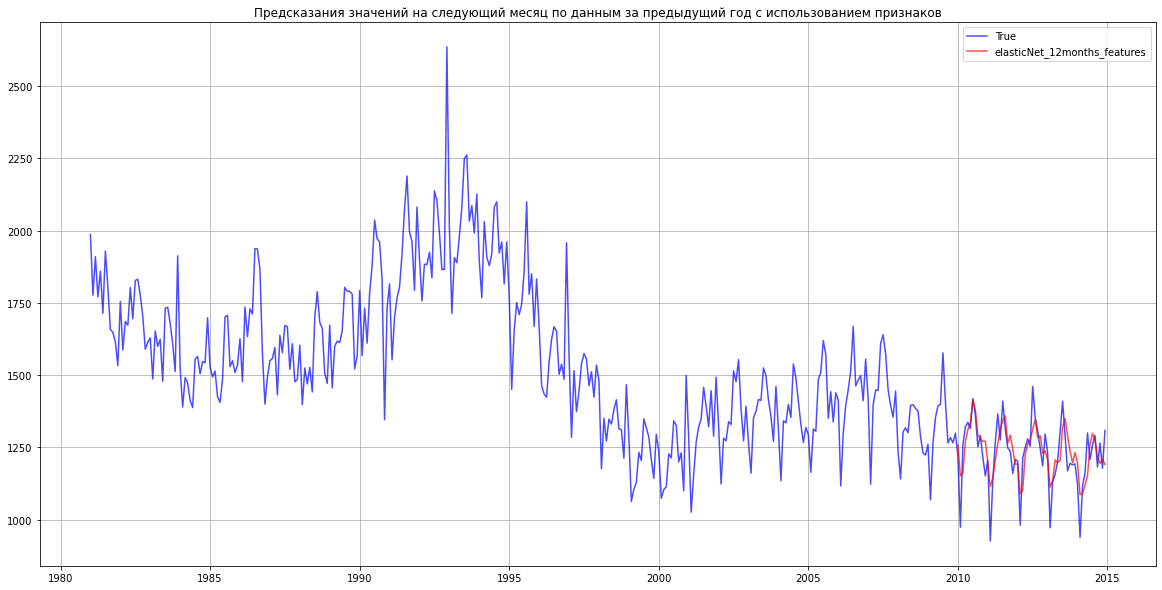

In [19]:
plt.figure(figsize=(20,10))
plt.plot(time_series['Date'], time_series['NumCases'], color='b', alpha=0.7, label="True")
plt.plot(time_series['Date'][-60:], time_series['NumCases_predict'][-60:], color='r', alpha=0.7, label="elasticNet_12months_features")
plt.title('Предсказания значений на следующий месяц по данным за предыдущий год с использованием признаков')
plt.grid()
plt.legend()
plt.show()

**RMSE: 74.17701**
### Быстродействие

In [16]:
spans = []
for i in range(101):
    elasticNet_12months = sklearn.linear_model.ElasticNet(
        alpha=elasticNetCV_12months.alpha_, 
        l1_ratio=elasticNetCV_12months.l1_ratio_, 
        max_iter=elasticNetCV_12months.max_iter, 
        random_state=elasticNetCV_12months.random_state
    )
    start = time.time()
    elasticNet_12months.fit(X_train, Y_train)
    finish = time.time()
    spans.append(finish - start)

spans = np.asarray(spans[1:])
print('Mean fit time:', spans.mean(), 'Std:', spans.std(ddof=1))

Mean fit time: 0.14749250888824464 Std: 0.009373441903433775


In [17]:
spans = []
for i in range(101):
    start = time.time()
    elasticNet_12months.predict(X_test)
    finish = time.time()
    spans.append(finish - start)

spans = np.asarray(spans[1:])
print('Mean predict time:', spans.mean(), 'Std:', spans.std(ddof=1))

Mean predict time: 0.0001241421699523926 Std: 5.5788812267214436e-05


## 2 Предсказания значений на следующий месяц по данным за 2 предыдущих года

In [2]:
time_series = pd.read_csv('ts_features.csv').astype('float32')
time_series.head()

Year  Month  NumCases  Relationship_Acquaintance  Relationship_Boyfriend  \
0  1980.0    1.0    1825.0                      434.0                    18.0   
1  1980.0    2.0    1730.0                      407.0                    21.0   
2  1980.0    3.0    1743.0                      403.0                    17.0   
3  1980.0    4.0    1760.0                      430.0                    26.0   
4  1980.0    5.0    1863.0                      461.0                    27.0   

   Relationship_Boyfriend/Girlfriend  Relationship_Brother  \
0                                1.0                  25.0   
1                                5.0                   9.0   
2                                0.0                  20.0   
3                                1.0                  26.0   
4                                2.0                  21.0   

   Relationship_Common-Law Husband  Relationship_Common-Law Wife  \
0                             16.0                           9.0   
1                              9.0                          15.0   
2                             18.0                           7.0   
3                             17.0                          10.0   
4                             14.0                          14.0   

   Relationship_Daughter  ...  State_West Virginia  State_Wisconsin  \
0                   19.0  ...                  9.0             11.0   
1                   25.0  ...                 10.0             12.0   
2                   11.0  ...                  6.0             16.0   
3                   17.0  ...                  4.0             13.0   
4                   11.0  ...                 14.0             12.0   

   State_Wyoming  Perpetrator Race_Asian/Pacific Islander  \
0            1.0                                      6.0   
1            3.0                                      8.0   
2            3.0                                     13.0   
3            2.0                                     11.0   
4            1.0                                     12.0   

   Perpetrator Race_Black  Perpetrator Race_Native American/Alaska Native  \
0                   616.0                                             8.0   
1                   630.0                                             8.0   
2                   625.0                                            10.0   
3                   610.0                                             7.0   
4                   659.0                                            11.0   

   Perpetrator Race_Unknown  Perpetrator Race_White  Perpetrator Count  \
0                     515.0                   680.0              398.0   
1                     497.0                   587.0              328.0   
2                     513.0                   582.0              292.0   
3                     495.0                   637.0              328.0   
4                     551.0                   630.0              290.0   

   Victim Count  
0         228.0  
1         164.0  
2         160.0  
3         194.0  
4         208.0  

[5 rows x 120 columns]

In [3]:
tmp = time_series[time_series.columns[:3]].copy()
for column in time_series.columns[2:]:
    for i in range(1, 25, 1):
        tmp[f'{column}_{i}'] = time_series[column].shift(i)

time_series = tmp

In [4]:
print(f'Number of features: {len(time_series.columns[3:])}')

Number of features: 2832


In [5]:
time_series = time_series[24:]
time_series.head()

Year  Month  NumCases  NumCases_1  NumCases_2  NumCases_3  NumCases_4  \
24  1982.0    1.0    1755.0      1533.0      1615.0      1648.0      1659.0   
25  1982.0    2.0    1587.0      1755.0      1533.0      1615.0      1648.0   
26  1982.0    3.0    1686.0      1587.0      1755.0      1533.0      1615.0   
27  1982.0    4.0    1673.0      1686.0      1587.0      1755.0      1533.0   
28  1982.0    5.0    1803.0      1673.0      1686.0      1587.0      1755.0   

    NumCases_5  NumCases_6  NumCases_7  ...  Victim Count_15  Victim Count_16  \
24      1804.0      1930.0      1714.0  ...            146.0            190.0   
25      1659.0      1804.0      1930.0  ...            188.0            146.0   
26      1648.0      1659.0      1804.0  ...            378.0            188.0   
27      1615.0      1648.0      1659.0  ...            236.0            378.0   
28      1533.0      1615.0      1648.0  ...            216.0            236.0   

    Victim Count_17  Victim Count_18  Victim Count_19  Victim Count_20  \
24            178.0            208.0            168.0            208.0   
25            190.0            178.0            208.0            168.0   
26            146.0            190.0            178.0            208.0   
27            188.0            146.0            190.0            178.0   
28            378.0            188.0            146.0            190.0   

    Victim Count_21  Victim Count_22  Victim Count_23  Victim Count_24  
24            194.0            160.0            164.0            228.0  
25            208.0            194.0            160.0            164.0  
26            168.0            208.0            194.0            160.0  
27            208.0            168.0            208.0            194.0  
28            178.0            208.0            168.0            208.0  

[5 rows x 2835 columns]

In [6]:
train = time_series[:-60]
test = time_series[-60:]

In [7]:
X_train = train[train.columns[3:]].to_numpy()
Y_train = train['NumCases'].to_numpy()

In [8]:
elasticNetCV_24months = sklearn.linear_model.ElasticNetCV(
    l1_ratio=[.01, .1, .5, .7, .9, .95, .99, .999, 1],
    n_alphas=1000,
    max_iter=10000,
    cv=sklearn.model_selection.TimeSeriesSplit(n_splits=3),
    verbose=3,
    n_jobs=-1,
    random_state=0
)

elasticNetCV_24months.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


(<MemoryView of 'ndarray' at 0x7fdaf7447380>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf7447520>, 0.9222788214683533, 1772.4925537109375, 3)
(<MemoryView of 'ndarray' at 0x7fdaf7447040>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf742dd40>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf742da00>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf7447a00>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf7447d40>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf742dba0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf74471e0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf744b380>, 1.291967511177063, 1772.4925537109375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf744b6c0>, 0.0, 141.72007751464844, 1)(<MemoryView of 'ndarray' at 0x7fdaf744b040>, 0.5554561614990234, 1772.4925537109375, 5)
(<MemoryView of 'ndarray' at 0x7fdaf7447860>, 0.0, 141.72007751464844, 1

(<MemoryView of 'ndarray' at 0x7fdaf6bfaa00>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf744d040>, 0.0, 141.72007751464844, 1)

(<MemoryView of 'ndarray' at 0x7fdaf6bfa860>, 0.58109050989151, 1772.4925537109375, 5)
(<MemoryView of 'ndarray' at 0x7fdaf744d1e0>, 1.9729589223861694, 1772.4925537109375, 17)(<MemoryView of 'ndarray' at 0x7fdaf744d380>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6bfcba0>, 0.0, 773.4163818359375, 1)(<MemoryView of 'ndarray' at 0x7fdaf6bfa380>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6bfc520>, 0.0, 141.72007751464844, 1)


(<MemoryView of 'ndarray' at 0x7fdaf6bfca00>, 0.0, 141.72007751464844, 1)(<MemoryView of 'ndarray' at 0x7fdaf744d520>, 0.0, 141.72007751464844, 1)

(<MemoryView of 'ndarray' at 0x7fdaf744dba0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf744d6c0>, 2.6706907749176025, 1772.4925537109375, 4)(<MemoryView of 'ndarray' at 0x7fdaf6bfcd40>, 0.0, 773.4163818359375, 1)

(<MemoryView of 'ndarray' at 0x7fdaf6b9eba0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6ba0ba0>, 0.0, 141.72007751464844, 1)(<MemoryView of 'ndarray' at 0x7fdaf6ba0a00>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6ba06c0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6ba2520>, 0.0, 773.4163818359375, 1)

(<MemoryView of 'ndarray' at 0x7fdaf6ba0380>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6ba2d40>, 6.181967258453369, 1772.4925537109375, 16)(<MemoryView of 'ndarray' at 0x7fdaf6ba2ba0>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6ba2040>, 0.21834751963615417, 1772.4925537109375, 4)(<MemoryView of 'ndarray' at 0x7fdaf6b9dd40>, 0.0, 141.72007751464844, 1)

(<MemoryView of 'ndarray' at 0x7fdaf6bf8520>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6ba2a00>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6bf8860>, 4.005052089691162, 1772.4925537109375, 6

(<MemoryView of 'ndarray' at 0x7fdaf6bc5520>, 0.27122706174850464, 773.4163818359375, 3)(<MemoryView of 'ndarray' at 0x7fdaf6bc5d40>, 16.842252731323242, 1772.4925537109375, 9)
(<MemoryView of 'ndarray' at 0x7fdaf6bbe6c0>, 20.53392219543457, 1772.4925537109375, 16)(<MemoryView of 'ndarray' at 0x7fdaf6bc5ba0>, 0.5780085921287537, 773.4163818359375, 4)
(<MemoryView of 'ndarray' at 0x7fdaf6bc5040>, 0.0, 141.72007751464844, 1)


(<MemoryView of 'ndarray' at 0x7fdaf6bc56c0>, 0.0, 141.72007751464844, 1)(<MemoryView of 'ndarray' at 0x7fdaf6bbe380>, 0.9759199619293213, 1772.4925537109375, 4)
(<MemoryView of 'ndarray' at 0x7fdaf6bc6040>, -0.04071781784296036, 773.4163818359375, 8)(<MemoryView of 'ndarray' at 0x7fdaf6bc51e0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6bc6380>, 0.0, 141.72007751464844, 1)

(<MemoryView of 'ndarray' at 0x7fdaf6bc6520>, 10.628104209899902, 1772.4925537109375, 10)

(<MemoryView of 'ndarray' at 0x7fdaf6bc61e0>, 0.0, 141.72007751464844, 1)(<Memor

(<MemoryView of 'ndarray' at 0x7fdaf6b66380>, 39.46156692504883, 1772.4925537109375, 10)(<MemoryView of 'ndarray' at 0x7fdaf6b64ba0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6b64040>, 0.2439456284046173, 773.4163818359375, 5)(<MemoryView of 'ndarray' at 0x7fdaf6b64520>, -0.29119256138801575, 773.4163818359375, 4)


(<MemoryView of 'ndarray' at 0x7fdaf6b64d40>, 0.0, 141.72007751464844, 1)(<MemoryView of 'ndarray' at 0x7fdaf6b66a00>, 1.9634857177734375, 773.4163818359375, 10)

(<MemoryView of 'ndarray' at 0x7fdaf6b64a00>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6b666c0>, 3.9043803215026855, 773.4163818359375, 15)(<MemoryView of 'ndarray' at 0x7fdaf6b66d40>, 0.0, 141.72007751464844, 1)(<MemoryView of 'ndarray' at 0x7fdaf6bd7040>, 0.0, 141.72007751464844, 1)

(<MemoryView of 'ndarray' at 0x7fdaf6b66520>, 26.045490264892578, 1772.4925537109375, 12)(<MemoryView of 'ndarray' at 0x7fdaf6b66860>, 1.426303744316101, 1772.4925537109375, 5)(<MemoryVi


(<MemoryView of 'ndarray' at 0x7fdaf6b87ba0>, 1.1669552326202393, 773.4163818359375, 4)
(<MemoryView of 'ndarray' at 0x7fdaf6b84520>, 0.0, 141.72007751464844, 1)(<MemoryView of 'ndarray' at 0x7fdaf6b846c0>, 8.835433959960938, 1772.4925537109375, 5)


(<MemoryView of 'ndarray' at 0x7fdaf6b84860>, 62.82521438598633, 1772.4925537109375, 17)(<MemoryView of 'ndarray' at 0x7fdaf6b84a00>, 0.0, 141.72007751464844, 1)

(<MemoryView of 'ndarray' at 0x7fdaf6b84040>, 0.0, 141.72007751464844, 1)(<MemoryView of 'ndarray' at 0x7fdaf6b841e0>, 10.316553115844727, 773.4163818359375, 15)(<MemoryView of 'ndarray' at 0x7fdaf6b84380>, 3.562298059463501, 773.4163818359375, 11)


(<MemoryView of 'ndarray' at 0x7fdaf6b84ba0>, 0.01910862699151039, 773.4163818359375, 4)
(<MemoryView of 'ndarray' at 0x7fdaf6b84d40>, 2.6594972610473633, 773.4163818359375, 6)
(<MemoryView of 'ndarray' at 0x7fdaf6b83520>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6b836c0>, 0.0, 141.72007751464844, 1)(<MemoryVi

(<MemoryView of 'ndarray' at 0x7fdaf6b24a00>, 0.0, 141.72007751464844, 1)(<MemoryView of 'ndarray' at 0x7fdaf6b246c0>, 0.0, 141.72007751464844, 1)

(<MemoryView of 'ndarray' at 0x7fdaf6b7c1e0>, 0.0, 141.72007751464844, 1)(<MemoryView of 'ndarray' at 0x7fdaf6b7c380>, 27.46123695373535, 1772.4925537109375, 5)
(<MemoryView of 'ndarray' at 0x7fdaf6b24ba0>, 70.37461853027344, 1772.4925537109375, 18)

(<MemoryView of 'ndarray' at 0x7fdaf6b7c520>, 0.0, 141.72007751464844, 1)(<MemoryView of 'ndarray' at 0x7fdaf6b24d40>, 64.10009765625, 1772.4925537109375, 17)

(<MemoryView of 'ndarray' at 0x7fdaf6b24380>, 7.541174411773682, 773.4163818359375, 8)(<MemoryView of 'ndarray' at 0x7fdaf6b24860>, 8.433917999267578, 773.4163818359375, 11)
(<MemoryView of 'ndarray' at 0x7fdaf6b7c6c0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6b8c040>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6b7cba0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6b7c860>,

(<MemoryView of 'ndarray' at 0x7fdaf6b3e380>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6b3e1e0>, 103.31426239013672, 1772.4925537109375, 12)(<MemoryView of 'ndarray' at 0x7fdaf6b3e6c0>, 9.722478866577148, 773.4163818359375, 9)

(<MemoryView of 'ndarray' at 0x7fdaf6b37860>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6b3e860>, 14.691650390625, 773.4163818359375, 11)(<MemoryView of 'ndarray' at 0x7fdaf6b3eba0>, 0.0, 141.72007751464844, 1)(<MemoryView of 'ndarray' at 0x7fdaf6b89040>, 4.362610340118408, 773.4163818359375, 5)
(<MemoryView of 'ndarray' at 0x7fdaf6b891e0>, 19.54627227783203, 1772.4925537109375, 6)

(<MemoryView of 'ndarray' at 0x7fdaf6b3a860>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6b3ea00>, 18.913103103637695, 773.4163818359375, 17)
(<MemoryView of 'ndarray' at 0x7fdaf6b896c0>, 0.0, 141.72007751464844, 1)

(<MemoryView of 'ndarray' at 0x7fdaf6b89a00>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 

(<MemoryView of 'ndarray' at 0x7fdaf6b52ba0>, 0.0, 141.72007751464844, 1)

(<MemoryView of 'ndarray' at 0x7fdaf6b52860>, 29.500835418701172, 773.4163818359375, 16)

(<MemoryView of 'ndarray' at 0x7fdaf6b551e0>, 121.96846771240234, 1772.4925537109375, 13)(<MemoryView of 'ndarray' at 0x7fdaf6b55520>, 18.46816635131836, 773.4163818359375, 10)
(<MemoryView of 'ndarray' at 0x7fdaf6b55040>, 10.901510238647461, 773.4163818359375, 11)(<MemoryView of 'ndarray' at 0x7fdaf6b52a00>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6b52d40>, 0.0, 141.72007751464844, 1)


(<MemoryView of 'ndarray' at 0x7fdaf6b55380>, 8.737775802612305, 773.4163818359375, 5)(<MemoryView of 'ndarray' at 0x7fdaf6b55860>, 42.08449935913086, 1772.4925537109375, 6)
(<MemoryView of 'ndarray' at 0x7fdaf6b55a00>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6b55d40>, 0.0, 141.72007751464844, 1)

(<MemoryView of 'ndarray' at 0x7fdaf6b381e0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarra


(<MemoryView of 'ndarray' at 0x7fdaf6aed380>, 126.07099151611328, 1772.4925537109375, 21)
(<MemoryView of 'ndarray' at 0x7fdaf6af1a00>, 0.035693444311618805, 141.72007751464844, 19)
(<MemoryView of 'ndarray' at 0x7fdaf6af1d40>, -0.224263533949852, 141.72007751464844, 11)(<MemoryView of 'ndarray' at 0x7fdaf6b50040>, 29.20276641845703, 773.4163818359375, 11)
(<MemoryView of 'ndarray' at 0x7fdaf6aedd40>, 20.786697387695312, 773.4163818359375, 17)

(<MemoryView of 'ndarray' at 0x7fdaf6af1ba0>, 80.12421417236328, 1772.4925537109375, 6)
(<MemoryView of 'ndarray' at 0x7fdaf6b50a00>, 71.3130874633789, 1772.4925537109375, 19)
(<MemoryView of 'ndarray' at 0x7fdaf6af11e0>, -0.03922181949019432, 141.72007751464844, 3)
(<MemoryView of 'ndarray' at 0x7fdaf6af2040>, 150.0409698486328, 1772.4925537109375, 14)(<MemoryView of 'ndarray' at 0x7fdaf6b50380>, 0.22456687688827515, 141.72007751464844, 4)

(<MemoryView of 'ndarray' at 0x7fdaf6b50d40>, 34.34052276611328, 773.4163818359375, 16)
(<MemoryView of 


(<MemoryView of 'ndarray' at 0x7fdaf6b05860>, 140.5683135986328, 1772.4925537109375, 21)
(<MemoryView of 'ndarray' at 0x7fdaf6afeba0>, 0.4382995069026947, 141.72007751464844, 18)
(<MemoryView of 'ndarray' at 0x7fdaf6b056c0>, 51.75139617919922, 1772.4925537109375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf6b05a00>, 218.23330688476562, 1772.4925537109375, 14)
(<MemoryView of 'ndarray' at 0x7fdaf6b05520>, 40.19683074951172, 773.4163818359375, 12)(<MemoryView of 'ndarray' at 0x7fdaf6afea00>, 0.2429446578025818, 141.72007751464844, 11)(<MemoryView of 'ndarray' at 0x7fdaf6b05380>, 23.79742431640625, 773.4163818359375, 15)
(<MemoryView of 'ndarray' at 0x7fdaf6b05d40>, 137.3774871826172, 1772.4925537109375, 21)
(<MemoryView of 'ndarray' at 0x7fdaf6b041e0>, -0.1180390790104866, 141.72007751464844, 6)

(<MemoryView of 'ndarray' at 0x7fdaf6b04040>, 22.38376235961914, 773.4163818359375, 18)
(<MemoryView of 'ndarray' at 0x7fdaf6b04520>, 15.34945011138916, 773.4163818359375, 6)(<MemoryView of 'ndarray

(<MemoryView of 'ndarray' at 0x7fdaf6a9e860>, 25.776222229003906, 773.4163818359375, 18)(<MemoryView of 'ndarray' at 0x7fdaf6a9f520>, 32.68996047973633, 773.4163818359375, 6)(<MemoryView of 'ndarray' at 0x7fdaf6a9fd40>, 107.55730438232422, 1772.4925537109375, 7)

(<MemoryView of 'ndarray' at 0x7fdaf6aa0a00>, 37.634307861328125, 773.4163818359375, 14)

(<MemoryView of 'ndarray' at 0x7fdaf6aa0520>, -0.1806669384241104, 141.72007751464844, 4)(<MemoryView of 'ndarray' at 0x7fdaf6aa0ba0>, 56.025909423828125, 773.4163818359375, 14)(<MemoryView of 'ndarray' at 0x7fdaf6b091e0>, 0.8503367900848389, 141.72007751464844, 17)
(<MemoryView of 'ndarray' at 0x7fdaf6aa0d40>, 223.4975128173828, 1772.4925537109375, 15)


(<MemoryView of 'ndarray' at 0x7fdaf6b09040>, 0.3067265450954437, 141.72007751464844, 11)(<MemoryView of 'ndarray' at 0x7fdaf6b09860>, 0.3122810125350952, 141.72007751464844, 6)
(<MemoryView of 'ndarray' at 0x7fdaf6b096c0>, 34.25831985473633, 773.4163818359375, 6)

(<MemoryView of 'ndarr


(<MemoryView of 'ndarray' at 0x7fdaf6ab3860>, 0.07254746556282043, 141.72007751464844, 4)
(<MemoryView of 'ndarray' at 0x7fdaf6ab3a00>, 1.6473063230514526, 141.72007751464844, 12)
(<MemoryView of 'ndarray' at 0x7fdaf6ab3040>, 98.04077911376953, 1772.4925537109375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf6ab3d40>, 0.8143733739852905, 141.72007751464844, 6)(<MemoryView of 'ndarray' at 0x7fdaf6abeba0>, 0.1775944083929062, 141.72007751464844, 4)
(<MemoryView of 'ndarray' at 0x7fdaf6ab3520>, 49.18699264526367, 773.4163818359375, 13)
(<MemoryView of 'ndarray' at 0x7fdaf6aa2040>, 73.855712890625, 773.4163818359375, 15)

(<MemoryView of 'ndarray' at 0x7fdaf6ab36c0>, 228.0962371826172, 1772.4925537109375, 16)
(<MemoryView of 'ndarray' at 0x7fdaf6aa2520>, 1.7201040983200073, 141.72007751464844, 17)
(<MemoryView of 'ndarray' at 0x7fdaf6aa2860>, 1.612186074256897, 141.72007751464844, 12)
(<MemoryView of 'ndarray' at 0x7fdaf6aa21e0>, 30.691463470458984, 773.4163818359375, 7)(<MemoryView of 'ndarray

(<MemoryView of 'ndarray' at 0x7fdaf6ad7380>, 1.2775267362594604, 141.72007751464844, 7)
(<MemoryView of 'ndarray' at 0x7fdaf6ad7d40>, 2.3044776916503906, 141.72007751464844, 13)(<MemoryView of 'ndarray' at 0x7fdaf6ad6380>, 59.77867889404297, 773.4163818359375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf6ad66c0>, 151.50242614746094, 1772.4925537109375, 8)(<MemoryView of 'ndarray' at 0x7fdaf6ad6860>, -0.07577642053365707, 141.72007751464844, 4)


(<MemoryView of 'ndarray' at 0x7fdaf6abd520>, 260.39892578125, 1772.4925537109375, 16)
(<MemoryView of 'ndarray' at 0x7fdaf6ad6ba0>, 83.2320327758789, 773.4163818359375, 16)(<MemoryView of 'ndarray' at 0x7fdaf6abd1e0>, 78.22944641113281, 773.4163818359375, 20)(<MemoryView of 'ndarray' at 0x7fdaf6abd6c0>, 2.4236180782318115, 141.72007751464844, 13)(<MemoryView of 'ndarray' at 0x7fdaf6abd860>, 54.621524810791016, 773.4163818359375, 12)
(<MemoryView of 'ndarray' at 0x7fdaf6ad6520>, 190.71237182617188, 1772.4925537109375, 19)


(<MemoryView of 'ndarray

(<MemoryView of 'ndarray' at 0x7fdaf6a6e520>, 112.4300537109375, 773.4163818359375, 16)
(<MemoryView of 'ndarray' at 0x7fdaf6a6f6c0>, 0.3121587932109833, 141.72007751464844, 4)(<MemoryView of 'ndarray' at 0x7fdaf6a6fba0>, 203.515869140625, 1772.4925537109375, 8)

(<MemoryView of 'ndarray' at 0x7fdaf6a6e6c0>, 1.850210189819336, 141.72007751464844, 8)(<MemoryView of 'ndarray' at 0x7fdaf6a6eba0>, 234.068115234375, 1772.4925537109375, 17)
(<MemoryView of 'ndarray' at 0x7fdaf6a6ea00>, 3.577709674835205, 141.72007751464844, 13)
(<MemoryView of 'ndarray' at 0x7fdaf6a6ed40>, 3.792496919631958, 141.72007751464844, 21)


(<MemoryView of 'ndarray' at 0x7fdaf6a6e380>, 93.1698226928711, 773.4163818359375, 19)(<MemoryView of 'ndarray' at 0x7fdaf6a6fa00>, 51.147586822509766, 773.4163818359375, 23)
(<MemoryView of 'ndarray' at 0x7fdaf6a6e860>, 0.40594276785850525, 141.72007751464844, 4)(<MemoryView of 'ndarray' at 0x7fdaf6ada380>, 218.51113891601562, 1772.4925537109375, 18)


(<MemoryView of 'ndarray'

(<MemoryView of 'ndarray' at 0x7fdaf6a88860>, 0.1401997208595276, 141.72007751464844, 5)
(<MemoryView of 'ndarray' at 0x7fdaf6a88ba0>, 4.07871675491333, 141.72007751464844, 14)(<MemoryView of 'ndarray' at 0x7fdaf6a71d40>, 3.7080190181732178, 141.72007751464844, 9)(<MemoryView of 'ndarray' at 0x7fdaf6a886c0>, 229.178466796875, 1772.4925537109375, 18)

(<MemoryView of 'ndarray' at 0x7fdaf6a88a00>, 0.29617175459861755, 141.72007751464844, 5)

(<MemoryView of 'ndarray' at 0x7fdaf6a891e0>, 4.590117931365967, 141.72007751464844, 22)
(<MemoryView of 'ndarray' at 0x7fdaf6a89380>, 46.734134674072266, 773.4163818359375, 24)
(<MemoryView of 'ndarray' at 0x7fdaf6a89520>, 106.70106506347656, 773.4163818359375, 17)
(<MemoryView of 'ndarray' at 0x7fdaf6a89a00>, 128.8626251220703, 773.4163818359375, 17)(<MemoryView of 'ndarray' at 0x7fdaf6a88d40>, 91.54572296142578, 773.4163818359375, 8)

(<MemoryView of 'ndarray' at 0x7fdaf6a89860>, 208.2281494140625, 1772.4925537109375, 9)
(<MemoryView of 'ndarray' 

(<MemoryView of 'ndarray' at 0x7fdaf6a21860>, 343.7781677246094, 1772.4925537109375, 17)(<MemoryView of 'ndarray' at 0x7fdaf6a21d40>, 0.8342505097389221, 141.72007751464844, 5)

(<MemoryView of 'ndarray' at 0x7fdaf6a246c0>, 6.653426170349121, 141.72007751464844, 9)
(<MemoryView of 'ndarray' at 0x7fdaf6a24380>, 100.04718780517578, 773.4163818359375, 17)
(<MemoryView of 'ndarray' at 0x7fdaf6a24a00>, 139.797607421875, 773.4163818359375, 18)
(<MemoryView of 'ndarray' at 0x7fdaf6a24d40>, 9.76505184173584, 141.72007751464844, 18)
(<MemoryView of 'ndarray' at 0x7fdaf6a24860>, 290.41119384765625, 1772.4925537109375, 15)
(<MemoryView of 'ndarray' at 0x7fdaf6a8c380>, 8.766587257385254, 141.72007751464844, 27)
(<MemoryView of 'ndarray' at 0x7fdaf6a8c6c0>, 0.9464665055274963, 141.72007751464844, 5)
(<MemoryView of 'ndarray' at 0x7fdaf6a24520>, 212.34703063964844, 1772.4925537109375, 10)
(<MemoryView of 'ndarray' at 0x7fdaf6a241e0>, 99.92417907714844, 773.4163818359375, 9)
(<MemoryView of 'ndarray'

(<MemoryView of 'ndarray' at 0x7fdaf6a3ba00>, 6.983445167541504, 141.72007751464844, 9)(<MemoryView of 'ndarray' at 0x7fdaf6a3d6c0>, 3.4944651126861572, 141.72007751464844, 16)(<MemoryView of 'ndarray' at 0x7fdaf6a3dba0>, 243.72442626953125, 1772.4925537109375, 18)
(<MemoryView of 'ndarray' at 0x7fdaf6a3da00>, 92.63130950927734, 773.4163818359375, 17)

(<MemoryView of 'ndarray' at 0x7fdaf6a3d1e0>, 54.94267654418945, 773.4163818359375, 24)

(<MemoryView of 'ndarray' at 0x7fdaf6a3d380>, 4.840915203094482, 141.72007751464844, 23)(<MemoryView of 'ndarray' at 0x7fdaf6a3d520>, 239.7877655029297, 1772.4925537109375, 10)
(<MemoryView of 'ndarray' at 0x7fdaf6a39040>, 56.2474365234375, 773.4163818359375, 24)
(<MemoryView of 'ndarray' at 0x7fdaf6a39520>, 116.32010650634766, 773.4163818359375, 10)
(<MemoryView of 'ndarray' at 0x7fdaf6a3d860>, 6.8341803550720215, 141.72007751464844, 10)(<MemoryView of 'ndarray' at 0x7fdaf6a396c0>, 363.3398132324219, 1772.4925537109375, 16)
(<MemoryView of 'ndarray'

(<MemoryView of 'ndarray' at 0x7fdaf6a58d40>, 2.353093147277832, 141.72007751464844, 6)
(<MemoryView of 'ndarray' at 0x7fdaf6a58860>, 9.897408485412598, 141.72007751464844, 9)(<MemoryView of 'ndarray' at 0x7fdaf6a58380>, 6.14873743057251, 141.72007751464844, 21)
(<MemoryView of 'ndarray' at 0x7fdaf6a58ba0>, 9.967545509338379, 141.72007751464844, 18)

(<MemoryView of 'ndarray' at 0x7fdaf6a8a1e0>, 111.09774780273438, 773.4163818359375, 16)(<MemoryView of 'ndarray' at 0x7fdaf6a8a380>, 291.799560546875, 1772.4925537109375, 10)
(<MemoryView of 'ndarray' at 0x7fdaf6a8a6c0>, 59.44236755371094, 773.4163818359375, 24)

(<MemoryView of 'ndarray' at 0x7fdaf6a8aa00>, 308.8902587890625, 1772.4925537109375, 13)(<MemoryView of 'ndarray' at 0x7fdaf6a8a040>, 2.22928524017334, 141.72007751464844, 6)
(<MemoryView of 'ndarray' at 0x7fdaf6a8ad40>, 157.9674072265625, 773.4163818359375, 10)
(<MemoryView of 'ndarray' at 0x7fdaf6a8a860>, 337.16259765625, 1772.4925537109375, 12)
(<MemoryView of 'ndarray' at 0x7



(<MemoryView of 'ndarray' at 0x7fdaf69f3a00>, 99.3692626953125, 773.4163818359375, 17)
(<MemoryView of 'ndarray' at 0x7fdaf69f3ba0>, 55.57221603393555, 773.4163818359375, 25)
(<MemoryView of 'ndarray' at 0x7fdaf69f2040>, 177.14410400390625, 773.4163818359375, 18)
(<MemoryView of 'ndarray' at 0x7fdaf69f36c0>, 166.97607421875, 773.4163818359375, 11)
(<MemoryView of 'ndarray' at 0x7fdaf6a52380>, 10.220799446105957, 141.72007751464844, 25)
(<MemoryView of 'ndarray' at 0x7fdaf6a521e0>, 13.089065551757812, 141.72007751464844, 18)(<MemoryView of 'ndarray' at 0x7fdaf6a52520>, 6.935188293457031, 141.72007751464844, 6)(<MemoryView of 'ndarray' at 0x7fdaf69f2a00>, 11.602286338806152, 141.72007751464844, 8)
(<MemoryView of 'ndarray' at 0x7fdaf6a52040>, 314.9321594238281, 1772.4925537109375, 11)(<MemoryView of 'ndarray' at 0x7fdaf6a526c0>, 282.0735168457031, 1772.4925537109375, 13)
(<MemoryView of 'ndarray' at 0x7fdaf6a52860>, 259.6664733886719, 1772.4925537109375, 11)

(<MemoryView of 'ndarray' 

(<MemoryView of 'ndarray' at 0x7fdaf69fda00>, 339.7471008300781, 1772.4925537109375, 10)(<MemoryView of 'ndarray' at 0x7fdaf6a09040>, 233.05625915527344, 1772.4925537109375, 17)

(<MemoryView of 'ndarray' at 0x7fdaf6a09a00>, 10.631135940551758, 141.72007751464844, 7)
(<MemoryView of 'ndarray' at 0x7fdaf69f51e0>, 11.225842475891113, 141.72007751464844, 9)(<MemoryView of 'ndarray' at 0x7fdaf6a09d40>, 144.22470092773438, 773.4163818359375, 14)
(<MemoryView of 'ndarray' at 0x7fdaf69f5040>, 181.72305297851562, 773.4163818359375, 11)
(<MemoryView of 'ndarray' at 0x7fdaf69f5520>, 270.1280517578125, 1772.4925537109375, 13)(<MemoryView of 'ndarray' at 0x7fdaf69f56c0>, 53.69731140136719, 773.4163818359375, 26)
(<MemoryView of 'ndarray' at 0x7fdaf6a09860>, 142.50048828125, 773.4163818359375, 14)
(<MemoryView of 'ndarray' at 0x7fdaf69f5380>, 11.745696067810059, 141.72007751464844, 21)


(<MemoryView of 'ndarray' at 0x7fdaf6a09ba0>, 10.81255054473877, 141.72007751464844, 7)
(<MemoryView of 'ndarray

(<MemoryView of 'ndarray' at 0x7fdaf69a3d40>, 33.61414337158203, 141.72007751464844, 9)(<MemoryView of 'ndarray' at 0x7fdaf69a4520>, 43.163658142089844, 141.72007751464844, 17)

(<MemoryView of 'ndarray' at 0x7fdaf69a4380>, 521.1573486328125, 1772.4925537109375, 11)(<MemoryView of 'ndarray' at 0x7fdaf69a4860>, 25.018821716308594, 141.72007751464844, 7)

(<MemoryView of 'ndarray' at 0x7fdaf69a4ba0>, 36.33341979980469, 141.72007751464844, 23)(<MemoryView of 'ndarray' at 0x7fdaf69a41e0>, 235.86599731445312, 1772.4925537109375, 15)
(<MemoryView of 'ndarray' at 0x7fdaf69a4a00>, 408.311279296875, 1772.4925537109375, 10)(<MemoryView of 'ndarray' at 0x7fdaf69a46c0>, 210.11505126953125, 773.4163818359375, 11)


(<MemoryView of 'ndarray' at 0x7fdaf6a0d860>, 302.5302429199219, 1772.4925537109375, 13)(<MemoryView of 'ndarray' at 0x7fdaf6a0d040>, 153.9687957763672, 773.4163818359375, 11)

(<MemoryView of 'ndarray' at 0x7fdaf6a0d1e0>, 27.591154098510742, 141.72007751464844, 10)(<MemoryView of 'ndarr

(<MemoryView of 'ndarray' at 0x7fdaf69c2380>, 134.31851196289062, 773.4163818359375, 17)(<MemoryView of 'ndarray' at 0x7fdaf69c0040>, 374.48565673828125, 1772.4925537109375, 10)
(<MemoryView of 'ndarray' at 0x7fdaf69c26c0>, 42.047142028808594, 141.72007751464844, 12)

(<MemoryView of 'ndarray' at 0x7fdaf69c0d40>, 210.9101104736328, 773.4163818359375, 11)(<MemoryView of 'ndarray' at 0x7fdaf69c2520>, 298.5890197753906, 1772.4925537109375, 13)

(<MemoryView of 'ndarray' at 0x7fdaf69c0ba0>, 24.388750076293945, 141.72007751464844, 6)(<MemoryView of 'ndarray' at 0x7fdaf69c2d40>, 97.33233642578125, 141.72007751464844, 18)
(<MemoryView of 'ndarray' at 0x7fdaf69c2860>, 263.4093017578125, 1772.4925537109375, 14)
(<MemoryView of 'ndarray' at 0x7fdaf69e6040>, 237.36468505859375, 773.4163818359375, 11)(<MemoryView of 'ndarray' at 0x7fdaf69c2ba0>, 36.73612976074219, 141.72007751464844, 11)

(<MemoryView of 'ndarray' at 0x7fdaf69c2a00>, 483.14996337890625, 1772.4925537109375, 12)
(<MemoryView of 'nda

(<MemoryView of 'ndarray' at 0x7fdaf695cd40>, 369.810791015625, 1772.4925537109375, 10)(<MemoryView of 'ndarray' at 0x7fdaf695e6c0>, 172.4146728515625, 773.4163818359375, 8)

(<MemoryView of 'ndarray' at 0x7fdaf695c6c0>, 127.36195373535156, 141.72007751464844, 22)
(<MemoryView of 'ndarray' at 0x7fdaf695e520>, 36.921531677246094, 141.72007751464844, 6)
(<MemoryView of 'ndarray' at 0x7fdaf695ed40>, 299.84722900390625, 1772.4925537109375, 13)(<MemoryView of 'ndarray' at 0x7fdaf69c1040>, 570.7601928710938, 1772.4925537109375, 12)

(<MemoryView of 'ndarray' at 0x7fdaf695c1e0>, 102.86087036132812, 141.72007751464844, 12)
(<MemoryView of 'ndarray' at 0x7fdaf695e860>, 75.0532455444336, 141.72007751464844, 13)
(<MemoryView of 'ndarray' at 0x7fdaf695e1e0>, 74.23481750488281, 773.4163818359375, 21)(<MemoryView of 'ndarray' at 0x7fdaf69c16c0>, 332.24456787109375, 773.4163818359375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf695eba0>, 128.49925231933594, 141.72007751464844, 22)
(<MemoryView of 'ndarray

(<MemoryView of 'ndarray' at 0x7fdaf697a860>, 332.6324768066406, 1772.4925537109375, 12)
(<MemoryView of 'ndarray' at 0x7fdaf697aa00>, 291.0810546875, 773.4163818359375, 9)(<MemoryView of 'ndarray' at 0x7fdaf697aba0>, 119.99109649658203, 141.72007751464844, 15)
(<MemoryView of 'ndarray' at 0x7fdaf697a040>, 376.4521484375, 1772.4925537109375, 10)(<MemoryView of 'ndarray' at 0x7fdaf6977a00>, 47.1529655456543, 141.72007751464844, 7)


(<MemoryView of 'ndarray' at 0x7fdaf697a1e0>, 130.70948791503906, 773.4163818359375, 19)
(<MemoryView of 'ndarray' at 0x7fdaf69786c0>, 327.49151611328125, 773.4163818359375, 7)(<MemoryView of 'ndarray' at 0x7fdaf6975040>, 140.88162231445312, 141.72007751464844, 24)

(<MemoryView of 'ndarray' at 0x7fdaf697a6c0>, 230.39279174804688, 1772.4925537109375, 13)
(<MemoryView of 'ndarray' at 0x7fdaf697ad40>, 46.02534866333008, 141.72007751464844, 7)
(<MemoryView of 'ndarray' at 0x7fdaf69751e0>, 68.16605377197266, 141.72007751464844, 13)
(<MemoryView of 'ndarray' at 0

(<MemoryView of 'ndarray' at 0x7fdaf6993d40>, 30.503093719482422, 141.72007751464844, 28)(<MemoryView of 'ndarray' at 0x7fdaf6991d40>, 73.61090087890625, 141.72007751464844, 15)(<MemoryView of 'ndarray' at 0x7fdaf6992520>, 232.40896606445312, 773.4163818359375, 11)
(<MemoryView of 'ndarray' at 0x7fdaf6992040>, 106.75177764892578, 141.72007751464844, 12)


(<MemoryView of 'ndarray' at 0x7fdaf6992860>, 95.98338317871094, 773.4163818359375, 23)
(<MemoryView of 'ndarray' at 0x7fdaf6979040>, 240.68670654296875, 1772.4925537109375, 11)
(<MemoryView of 'ndarray' at 0x7fdaf6992d40>, 298.0022277832031, 1772.4925537109375, 13)
(<MemoryView of 'ndarray' at 0x7fdaf6992a00>, 421.9218444824219, 1772.4925537109375, 10)
(<MemoryView of 'ndarray' at 0x7fdaf6979380>, 56.18989181518555, 141.72007751464844, 7)
(<MemoryView of 'ndarray' at 0x7fdaf6992ba0>, 302.66705322265625, 773.4163818359375, 7)(<MemoryView of 'ndarray' at 0x7fdaf6979860>, 622.5306396484375, 1772.4925537109375, 12)
(<MemoryView of 'ndarr

(<MemoryView of 'ndarray' at 0x7fdaf692ea00>, 140.29351806640625, 141.72007751464844, 31)(<MemoryView of 'ndarray' at 0x7fdaf6927d40>, 296.4246826171875, 773.4163818359375, 7)

(<MemoryView of 'ndarray' at 0x7fdaf697f1e0>, 615.6629028320312, 1772.4925537109375, 12)
(<MemoryView of 'ndarray' at 0x7fdaf697f520>, 118.4383316040039, 773.4163818359375, 16)
(<MemoryView of 'ndarray' at 0x7fdaf697f380>, 281.8973083496094, 1772.4925537109375, 14)
(<MemoryView of 'ndarray' at 0x7fdaf697f860>, 60.989990234375, 141.72007751464844, 19)(<MemoryView of 'ndarray' at 0x7fdaf697fa00>, 75.83338928222656, 141.72007751464844, 19)(<MemoryView of 'ndarray' at 0x7fdaf697fba0>, 248.53672790527344, 1772.4925537109375, 11)


(<MemoryView of 'ndarray' at 0x7fdaf697f6c0>, 243.733642578125, 773.4163818359375, 10)(<MemoryView of 'ndarray' at 0x7fdaf6996040>, 431.7273864746094, 1772.4925537109375, 13)

(<MemoryView of 'ndarray' at 0x7fdaf6996520>, 111.50090026855469, 141.72007751464844, 13)
(<MemoryView of 'ndarray'

(<MemoryView of 'ndarray' at 0x7fdaf6949380>, 74.50731658935547, 141.72007751464844, 8)(<MemoryView of 'ndarray' at 0x7fdaf694a1e0>, 646.66845703125, 1772.4925537109375, 11)

(<MemoryView of 'ndarray' at 0x7fdaf694a380>, 263.5138244628906, 1772.4925537109375, 9)(<MemoryView of 'ndarray' at 0x7fdaf694a520>, 131.20689392089844, 141.72007751464844, 21)

(<MemoryView of 'ndarray' at 0x7fdaf694aa00>, 125.75077056884766, 141.72007751464844, 15)
(<MemoryView of 'ndarray' at 0x7fdaf6925040>, 190.390869140625, 773.4163818359375, 10)
(<MemoryView of 'ndarray' at 0x7fdaf694aba0>, 539.572998046875, 1772.4925537109375, 10)
(<MemoryView of 'ndarray' at 0x7fdaf6925520>, 138.71592712402344, 141.72007751464844, 31)
(<MemoryView of 'ndarray' at 0x7fdaf694ad40>, 308.9991149902344, 773.4163818359375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf694a040>, 303.4339904785156, 773.4163818359375, 24)(<MemoryView of 'ndarray' at 0x7fdaf694a860>, 131.11241149902344, 141.72007751464844, 22)

(<MemoryView of 'ndarray' a

(<MemoryView of 'ndarray' at 0x7fdaf68e3860>, 349.25164794921875, 773.4163818359375, 25)
(<MemoryView of 'ndarray' at 0x7fdaf68e3520>, 133.45809936523438, 1772.4925537109375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf69481e0>, 231.80767822265625, 773.4163818359375, 10)
(<MemoryView of 'ndarray' at 0x7fdaf6948520>, 672.028564453125, 1772.4925537109375, 13)
(<MemoryView of 'ndarray' at 0x7fdaf69486c0>, 284.319091796875, 773.4163818359375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf6948a00>, 115.5570297241211, 141.72007751464844, 8)(<MemoryView of 'ndarray' at 0x7fdaf6948ba0>, 138.165771484375, 141.72007751464844, 34)

(<MemoryView of 'ndarray' at 0x7fdaf6948d40>, 138.14332580566406, 141.72007751464844, 26)
(<MemoryView of 'ndarray' at 0x7fdaf6948040>, 93.33854675292969, 773.4163818359375, 22)
(<MemoryView of 'ndarray' at 0x7fdaf6948380>, 127.61392974853516, 141.72007751464844, 16)
(<MemoryView of 'ndarray' at 0x7fdaf6948860>, 123.17494201660156, 141.72007751464844, 8)
(<MemoryView of 'ndarray' 

(<MemoryView of 'ndarray' at 0x7fdaf68f9a00>, 292.56658935546875, 773.4163818359375, 9)
(<MemoryView of 'ndarray' at 0x7fdaf68f9860>, 141.10519409179688, 141.72007751464844, 35)(<MemoryView of 'ndarray' at 0x7fdaf68f9d40>, 776.2418823242188, 1772.4925537109375, 14)

(<MemoryView of 'ndarray' at 0x7fdaf68e2040>, 267.3487854003906, 773.4163818359375, 17)(<MemoryView of 'ndarray' at 0x7fdaf68e2380>, 132.62890625, 141.72007751464844, 29)

(<MemoryView of 'ndarray' at 0x7fdaf68f6d40>, 1134.0460205078125, 1772.4925537109375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf68f9040>, 222.02767944335938, 773.4163818359375, 11)
(<MemoryView of 'ndarray' at 0x7fdaf68e21e0>, 136.3467254638672, 141.72007751464844, 24)
(<MemoryView of 'ndarray' at 0x7fdaf68f96c0>, 106.55889129638672, 141.72007751464844, 10)
(<MemoryView of 'ndarray' at 0x7fdaf68e2a00>, 360.2515869140625, 773.4163818359375, 26)
(<MemoryView of 'ndarray' at 0x7fdaf68e2520>, 325.08087158203125, 773.4163818359375, 9)
(<MemoryView of 'ndarray' at

(<MemoryView of 'ndarray' at 0x7fdaf690d860>, 243.67892456054688, 773.4163818359375, 11)(<MemoryView of 'ndarray' at 0x7fdaf690da00>, 448.6427917480469, 1772.4925537109375, 38)

(<MemoryView of 'ndarray' at 0x7fdaf690d380>, 209.2799530029297, 1772.4925537109375, 38)(<MemoryView of 'ndarray' at 0x7fdaf690dba0>, 318.6660461425781, 773.4163818359375, 22)

(<MemoryView of 'ndarray' at 0x7fdaf690dd40>, 138.2711944580078, 141.72007751464844, 34)
(<MemoryView of 'ndarray' at 0x7fdaf68f8380>, 101.68695831298828, 141.72007751464844, 11)
(<MemoryView of 'ndarray' at 0x7fdaf690d6c0>, 136.3402557373047, 141.72007751464844, 22)
(<MemoryView of 'ndarray' at 0x7fdaf68f8040>, 1271.1612548828125, 1772.4925537109375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf68f8520>, 135.49856567382812, 141.72007751464844, 51)(<MemoryView of 'ndarray' at 0x7fdaf68f86c0>, 249.4019012451172, 773.4163818359375, 11)

(<MemoryView of 'ndarray' at 0x7fdaf68f8ba0>, 104.96646118164062, 141.72007751464844, 11)
(<MemoryView of 'nda

(<MemoryView of 'ndarray' at 0x7fdaf68a6860>, 118.30750274658203, 141.72007751464844, 13)

(<MemoryView of 'ndarray' at 0x7fdaf68a3a00>, 134.537841796875, 141.72007751464844, 24)
(<MemoryView of 'ndarray' at 0x7fdaf68a66c0>, 483.4034729003906, 1772.4925537109375, 15)(<MemoryView of 'ndarray' at 0x7fdaf68a6380>, 400.8562927246094, 773.4163818359375, 11)
(<MemoryView of 'ndarray' at 0x7fdaf68a6ba0>, 352.0318603515625, 773.4163818359375, 22)
(<MemoryView of 'ndarray' at 0x7fdaf68a6a00>, 125.61736297607422, 141.72007751464844, 13)
(<MemoryView of 'ndarray' at 0x7fdaf68a6040>, 256.0213928222656, 773.4163818359375, 14)
(<MemoryView of 'ndarray' at 0x7fdaf6911380>, 135.80929565429688, 141.72007751464844, 47)(<MemoryView of 'ndarray' at 0x7fdaf6911520>, 193.58778381347656, 1772.4925537109375, 20)(<MemoryView of 'ndarray' at 0x7fdaf68a4d40>, 249.6971893310547, 773.4163818359375, 13)
(<MemoryView of 'ndarray' at 0x7fdaf68a6d40>, 139.65130615234375, 141.72007751464844, 24)


(<MemoryView of 'ndar

(<MemoryView of 'ndarray' at 0x7fdaf68bb040>, 121.52901458740234, 141.72007751464844, 14)
(<MemoryView of 'ndarray' at 0x7fdaf68baba0>, 138.70272827148438, 141.72007751464844, 43)(<MemoryView of 'ndarray' at 0x7fdaf68bb520>, 140.13856506347656, 141.72007751464844, 30)

(<MemoryView of 'ndarray' at 0x7fdaf68bb380>, 333.57891845703125, 773.4163818359375, 16)
(<MemoryView of 'ndarray' at 0x7fdaf68bb6c0>, 305.79327392578125, 1772.4925537109375, 32)
(<MemoryView of 'ndarray' at 0x7fdaf68bad40>, 306.12939453125, 773.4163818359375, 14)
(<MemoryView of 'ndarray' at 0x7fdaf68bbd40>, 746.9819946289062, 1772.4925537109375, 7)(<MemoryView of 'ndarray' at 0x7fdaf68a7040>, 606.7791748046875, 773.4163818359375, 7)(<MemoryView of 'ndarray' at 0x7fdaf68a71e0>, 389.8652648925781, 773.4163818359375, 21)


(<MemoryView of 'ndarray' at 0x7fdaf68bbba0>, 140.9584503173828, 141.72007751464844, 14)
(<MemoryView of 'ndarray' at 0x7fdaf68a7380>, 127.45075225830078, 141.72007751464844, 32)
(<MemoryView of 'ndarra

(<MemoryView of 'ndarray' at 0x7fdaf68cda00>, 127.2715835571289, 141.72007751464844, 17)(<MemoryView of 'ndarray' at 0x7fdaf68cdd40>, 401.0877990722656, 773.4163818359375, 19)(<MemoryView of 'ndarray' at 0x7fdaf68b8040>, 336.2027282714844, 1772.4925537109375, 23)
(<MemoryView of 'ndarray' at 0x7fdaf68cdba0>, 134.9201202392578, 141.72007751464844, 48)
(<MemoryView of 'ndarray' at 0x7fdaf68b81e0>, 980.10595703125, 1772.4925537109375, 12)(<MemoryView of 'ndarray' at 0x7fdaf68b86c0>, 370.7489929199219, 773.4163818359375, 16)



(<MemoryView of 'ndarray' at 0x7fdaf68b8ba0>, 139.348876953125, 141.72007751464844, 45)
(<MemoryView of 'ndarray' at 0x7fdaf68b8a00>, 557.776611328125, 1772.4925537109375, 8)(<MemoryView of 'ndarray' at 0x7fdaf68b8520>, 140.18533325195312, 141.72007751464844, 37)(<MemoryView of 'ndarray' at 0x7fdaf68bf040>, 165.68557739257812, 773.4163818359375, 28)


(<MemoryView of 'ndarray' at 0x7fdaf68b8380>, 726.3634033203125, 773.4163818359375, 7)(<MemoryView of 'ndarray' at 0


(<MemoryView of 'ndarray' at 0x7fdaf6862860>, 384.30877685546875, 1772.4925537109375, 30)
(<MemoryView of 'ndarray' at 0x7fdaf68626c0>, 344.4434814453125, 1772.4925537109375, 8)(<MemoryView of 'ndarray' at 0x7fdaf685f380>, 618.6140747070312, 1772.4925537109375, 32)

(<MemoryView of 'ndarray' at 0x7fdaf6862a00>, 136.2340087890625, 141.72007751464844, 40)
(<MemoryView of 'ndarray' at 0x7fdaf68621e0>, 242.88902282714844, 773.4163818359375, 18)
(<MemoryView of 'ndarray' at 0x7fdaf68cf1e0>, 567.1238403320312, 773.4163818359375, 23)
(<MemoryView of 'ndarray' at 0x7fdaf68cf520>, 134.0421600341797, 141.72007751464844, 25)
(<MemoryView of 'ndarray' at 0x7fdaf68cf6c0>, 680.2294921875, 773.4163818359375, 13)
(<MemoryView of 'ndarray' at 0x7fdaf68cf040>, 524.71142578125, 773.4163818359375, 23)
(<MemoryView of 'ndarray' at 0x7fdaf6862ba0>, 138.41177368164062, 141.72007751464844, 54)
(<MemoryView of 'ndarray' at 0x7fdaf68cf380>, 1030.6700439453125, 1772.4925537109375, 13)
(<MemoryView of 'ndarray' 

(<MemoryView of 'ndarray' at 0x7fdaf68616c0>, 248.50790405273438, 773.4163818359375, 21)

(<MemoryView of 'ndarray' at 0x7fdaf68686c0>, 723.83203125, 773.4163818359375, 8)(<MemoryView of 'ndarray' at 0x7fdaf68da6c0>, 140.95179748535156, 141.72007751464844, 26)
(<MemoryView of 'ndarray' at 0x7fdaf6860a00>, 416.7404479980469, 1772.4925537109375, 30)

(<MemoryView of 'ndarray' at 0x7fdaf68cf520>, 1376.6434326171875, 1772.4925537109375, 12)
(<MemoryView of 'ndarray' at 0x7fdaf6863860>, 584.7341918945312, 773.4163818359375, 25)
(<MemoryView of 'ndarray' at 0x7fdaf685d1e0>, 135.80227661132812, 773.4163818359375, 26)(<MemoryView of 'ndarray' at 0x7fdaf685fd40>, 137.51478576660156, 141.72007751464844, 59)
(<MemoryView of 'ndarray' at 0x7fdaf68d2860>, 140.89031982421875, 141.72007751464844, 30)

(<MemoryView of 'ndarray' at 0x7fdaf68d8d40>, 1100.592529296875, 1772.4925537109375, 21)
(<MemoryView of 'ndarray' at 0x7fdaf685c1e0>, 266.8131408691406, 773.4163818359375, 20)(<MemoryView of 'ndarray' 

(<MemoryView of 'ndarray' at 0x7fdaf694cba0>, 646.7479248046875, 773.4163818359375, 9)
(<MemoryView of 'ndarray' at 0x7fdaf68db520>, 554.4967041015625, 773.4163818359375, 26)
(<MemoryView of 'ndarray' at 0x7fdaf68dd520>, 526.7728271484375, 773.4163818359375, 19)
(<MemoryView of 'ndarray' at 0x7fdaf6948860>, 607.0935668945312, 1772.4925537109375, 21)
(<MemoryView of 'ndarray' at 0x7fdaf694f860>, 132.58285522460938, 141.72007751464844, 32)
(<MemoryView of 'ndarray' at 0x7fdaf68e1d40>, 135.40794372558594, 141.72007751464844, 38)
(<MemoryView of 'ndarray' at 0x7fdaf68e11e0>, 767.8545532226562, 773.4163818359375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf68e0520>, 425.05389404296875, 1772.4925537109375, 9)(<MemoryView of 'ndarray' at 0x7fdaf68e1520>, 139.17140197753906, 141.72007751464844, 71)
(<MemoryView of 'ndarray' at 0x7fdaf68dca00>, 549.357421875, 773.4163818359375, 19)
(<MemoryView of 'ndarray' at 0x7fdaf695ad40>, 503.7471923828125, 773.4163818359375, 25)
(<MemoryView of 'ndarray' at 0x

(<MemoryView of 'ndarray' at 0x7fdaf69ce380>, 307.8731384277344, 1772.4925537109375, 19)(<MemoryView of 'ndarray' at 0x7fdaf69ce520>, 141.1766815185547, 141.72007751464844, 77)(<MemoryView of 'ndarray' at 0x7fdaf69c1380>, 140.47007751464844, 141.72007751464844, 62)


(<MemoryView of 'ndarray' at 0x7fdaf69d6860>, 1421.6370849609375, 1772.4925537109375, 13)
(<MemoryView of 'ndarray' at 0x7fdaf695c380>, 731.0428466796875, 773.4163818359375, 30)(<MemoryView of 'ndarray' at 0x7fdaf695e520>, 559.6880493164062, 1772.4925537109375, 9)
(<MemoryView of 'ndarray' at 0x7fdaf695bba0>, 745.6785888671875, 773.4163818359375, 9)
(<MemoryView of 'ndarray' at 0x7fdaf69d4d40>, 408.19512939453125, 773.4163818359375, 29)
(<MemoryView of 'ndarray' at 0x7fdaf69d8ba0>, 336.74755859375, 1772.4925537109375, 19)
(<MemoryView of 'ndarray' at 0x7fdaf695ca00>, 634.7388305664062, 1772.4925537109375, 37)(<MemoryView of 'ndarray' at 0x7fdaf69d81e0>, 652.78759765625, 1772.4925537109375, 9)


(<MemoryView of 'ndarray' at

(<MemoryView of 'ndarray' at 0x7fdaf69dbba0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf69dfba0>, 141.12599182128906, 141.72007751464844, 101)(<MemoryView of 'ndarray' at 0x7fdaf69e1d40>, 330.1846923828125, 1772.4925537109375, 52)

(<MemoryView of 'ndarray' at 0x7fdaf6a57a00>, 705.0431518554688, 773.4163818359375, 22)(<MemoryView of 'ndarray' at 0x7fdaf69dc860>, 689.6694946289062, 773.4163818359375, 15)
(<MemoryView of 'ndarray' at 0x7fdaf69db860>, 461.7541198730469, 773.4163818359375, 30)
(<MemoryView of 'ndarray' at 0x7fdaf6a46a00>, 461.790283203125, 1772.4925537109375, 9)

(<MemoryView of 'ndarray' at 0x7fdaf6a4b860>, 276.3869323730469, 773.4163818359375, 26)
(<MemoryView of 'ndarray' at 0x7fdaf6a28860>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6a8a040>, 131.72743225097656, 141.72007751464844, 44)(<MemoryView of 'ndarray' at 0x7fdaf6a58d40>, 397.73590087890625, 1772.4925537109375, 20)
(<MemoryView of 'ndarray' at 0x7fdaf6a54d40>, 140.0039

(<MemoryView of 'ndarray' at 0x7fdaf6abca00>, 141.5452117919922, 141.72007751464844, 86)
(<MemoryView of 'ndarray' at 0x7fdaf6ab6520>, 754.9410400390625, 773.4163818359375, 19)(<MemoryView of 'ndarray' at 0x7fdaf6aaeba0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6aba860>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6ac31e0>, 0.0, 141.72007751464844, 1)

(<MemoryView of 'ndarray' at 0x7fdaf6aa6d40>, 672.9028930664062, 1772.4925537109375, 10)(<MemoryView of 'ndarray' at 0x7fdaf6b181e0>, 243.09579467773438, 1772.4925537109375, 21)
(<MemoryView of 'ndarray' at 0x7fdaf6ad01e0>, 448.53118896484375, 773.4163818359375, 34)
(<MemoryView of 'ndarray' at 0x7fdaf6abe1e0>, 1672.595458984375, 1772.4925537109375, 13)
(<MemoryView of 'ndarray' at 0x7fdaf6abb520>, 634.6115112304688, 773.4163818359375, 24)
(<MemoryView of 'ndarray' at 0x7fdaf6ab3860>, 138.2827606201172, 141.72007751464844, 38)
(<MemoryView of 'ndarray' at 0x7fdaf6ab4d40>, 0.0, 141.7200775146484

(<MemoryView of 'ndarray' at 0x7fdaf6b31ba0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6b376c0>, 642.5720825195312, 773.4163818359375, 20)
(<MemoryView of 'ndarray' at 0x7fdaf6b2f040>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6b28ba0>, 139.00917053222656, 141.72007751464844, 30)(<MemoryView of 'ndarray' at 0x7fdaf6b2d1e0>, 1286.2996826171875, 1772.4925537109375, 31)

(<MemoryView of 'ndarray' at 0x7fdaf6b281e0>, 1725.28662109375, 1772.4925537109375, 33)(<MemoryView of 'ndarray' at 0x7fdaf6b261e0>, 141.28123474121094, 141.72007751464844, 55)
(<MemoryView of 'ndarray' at 0x7fdaf6b2dd40>, 140.9560546875, 141.72007751464844, 78)
(<MemoryView of 'ndarray' at 0x7fdaf6b95040>, 753.9412841796875, 773.4163818359375, 29)
(<MemoryView of 'ndarray' at 0x7fdaf6b2c380>, 883.0497436523438, 1772.4925537109375, 11)
(<MemoryView of 'ndarray' at 0x7fdaf6b951e0>, 771.0598754882812, 773.4163818359375, 44)

(<MemoryView of 'ndarray' at 0x7fdaf6b7c6c0>, 412.60382

(<MemoryView of 'ndarray' at 0x7fdaf6b9e6c0>, 582.8613891601562, 773.4163818359375, 32)(<MemoryView of 'ndarray' at 0x7fdaf6b9eba0>, 706.5579223632812, 773.4163818359375, 29)(<MemoryView of 'ndarray' at 0x7fdaf6b9ea00>, 141.38003540039062, 141.72007751464844, 64)


(<MemoryView of 'ndarray' at 0x7fdaf6b9c1e0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6b9c040>, 762.0725708007812, 773.4163818359375, 43)(<MemoryView of 'ndarray' at 0x7fdaf6b9dd40>, 1586.7342529296875, 1772.4925537109375, 35)
(<MemoryView of 'ndarray' at 0x7fdaf6c166c0>, 1635.6021728515625, 1772.4925537109375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf6c1a6c0>, 140.36683654785156, 141.72007751464844, 44)(<MemoryView of 'ndarray' at 0x7fdaf6c11380>, 689.6138916015625, 773.4163818359375, 16)
(<MemoryView of 'ndarray' at 0x7fdaf6c18860>, 1528.2186279296875, 1772.4925537109375, 12)


(<MemoryView of 'ndarray' at 0x7fdaf6c10860>, 0.0, 141.72007751464844, 1)(<MemoryView of 'ndarray' at 0x7fdaf6b9e380>, 141.39

(<MemoryView of 'ndarray' at 0x7fdaf68731e0>, 597.3126831054688, 773.4163818359375, 26)(<MemoryView of 'ndarray' at 0x7fdaf6873040>, 755.6687622070312, 773.4163818359375, 33)
(<MemoryView of 'ndarray' at 0x7fdaf68736c0>, 1749.5523681640625, 1772.4925537109375, 14)
(<MemoryView of 'ndarray' at 0x7fdaf6873520>, 691.4635620117188, 773.4163818359375, 28)
(<MemoryView of 'ndarray' at 0x7fdaf6873860>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6873ba0>, 1696.7613525390625, 1772.4925537109375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf6877040>, 458.3983154296875, 1772.4925537109375, 33)
(<MemoryView of 'ndarray' at 0x7fdaf6873380>, 140.70196533203125, 141.72007751464844, 89)
(<MemoryView of 'ndarray' at 0x7fdaf6873a00>, 1706.623046875, 1772.4925537109375, 29)
(<MemoryView of 'ndarray' at 0x7fdaf68776c0>, 138.90269470214844, 141.72007751464844, 69)
(<MemoryView of 'ndarray' at 0x7fdaf68771e0>, 141.3624267578125, 141.72007751464844, 68)

(<MemoryView of 'ndarray' at 0x7fdaf687

(<MemoryView of 'ndarray' at 0x7fdaf68f3a00>, 0.0, 141.72007751464844, 1)(<MemoryView of 'ndarray' at 0x7fdaf68f6380>, 747.8524780273438, 773.4163818359375, 13)

(<MemoryView of 'ndarray' at 0x7fdaf68f0a00>, 1059.709716796875, 1772.4925537109375, 16)
(<MemoryView of 'ndarray' at 0x7fdaf69566c0>, 138.177734375, 141.72007751464844, 25)
(<MemoryView of 'ndarray' at 0x7fdaf6956520>, 448.03326416015625, 1772.4925537109375, 25)(<MemoryView of 'ndarray' at 0x7fdaf68efa00>, 772.1980590820312, 773.4163818359375, 116)(<MemoryView of 'ndarray' at 0x7fdaf68ed380>, 1554.2391357421875, 1772.4925537109375, 9)

(<MemoryView of 'ndarray' at 0x7fdaf68f2d40>, 0.0, 141.72007751464844, 1)

(<MemoryView of 'ndarray' at 0x7fdaf68e7520>, 485.3126220703125, 773.4163818359375, 35)
(<MemoryView of 'ndarray' at 0x7fdaf68ea040>, 758.282958984375, 773.4163818359375, 37)(<MemoryView of 'ndarray' at 0x7fdaf68db860>, 140.8460693359375, 141.72007751464844, 61)

(<MemoryView of 'ndarray' at 0x7fdaf68dd1e0>, 691.32196044

(<MemoryView of 'ndarray' at 0x7fdaf696ca00>, -0.21251799166202545, 141.72007751464844, 2)
(<MemoryView of 'ndarray' at 0x7fdaf696b1e0>, 141.00192260742188, 141.72007751464844, 73)
(<MemoryView of 'ndarray' at 0x7fdaf696d040>, 693.6180419921875, 773.4163818359375, 46)
(<MemoryView of 'ndarray' at 0x7fdaf696ba00>, 140.41810607910156, 141.72007751464844, 49)
(<MemoryView of 'ndarray' at 0x7fdaf6969040>, 0.2457224279642105, 141.72007751464844, 2)(<MemoryView of 'ndarray' at 0x7fdaf6968380>, 820.1819458007812, 1772.4925537109375, 37)
(<MemoryView of 'ndarray' at 0x7fdaf6960040>, 1677.0546875, 1772.4925537109375, 18)(<MemoryView of 'ndarray' at 0x7fdaf6965860>, 1726.1671142578125, 1772.4925537109375, 9)

(<MemoryView of 'ndarray' at 0x7fdaf6961d40>, 0.14225156605243683, 141.72007751464844, 2)
(<MemoryView of 'ndarray' at 0x7fdaf696f860>, -0.06671273708343506, 141.72007751464844, 2)

(<MemoryView of 'ndarray' at 0x7fdaf6961520>, 732.1951293945312, 1772.4925537109375, 34)(<MemoryView of 'ndar

(<MemoryView of 'ndarray' at 0x7fdaf6a05380>, 140.66934204101562, 141.72007751464844, 95)(<MemoryView of 'ndarray' at 0x7fdaf69fca00>, 1561.457763671875, 1772.4925537109375, 11)
(<MemoryView of 'ndarray' at 0x7fdaf69fd380>, 880.6755981445312, 1772.4925537109375, 34)

(<MemoryView of 'ndarray' at 0x7fdaf6a06520>, 1.1992822885513306, 141.72007751464844, 34)(<MemoryView of 'ndarray' at 0x7fdaf6a06860>, 682.5852661132812, 773.4163818359375, 43)

(<MemoryView of 'ndarray' at 0x7fdaf6a02860>, 687.0240478515625, 773.4163818359375, 17)
(<MemoryView of 'ndarray' at 0x7fdaf6a03520>, 972.6044311523438, 1772.4925537109375, 16)
(<MemoryView of 'ndarray' at 0x7fdaf69fd6c0>, 140.45852661132812, 141.72007751464844, 117)
(<MemoryView of 'ndarray' at 0x7fdaf6a01a00>, 137.87754821777344, 141.72007751464844, 28)
(<MemoryView of 'ndarray' at 0x7fdaf69ff1e0>, 771.4249877929688, 773.4163818359375, 11)
(<MemoryView of 'ndarray' at 0x7fdaf69f51e0>, 1.5986666679382324, 141.72007751464844, 33)
(<MemoryView of 'n

(<MemoryView of 'ndarray' at 0x7fdaf6a986c0>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6a26040>, 1166.9422607421875, 1772.4925537109375, 16)
(<MemoryView of 'ndarray' at 0x7fdaf6a246c0>, 2.0796523094177246, 141.72007751464844, 31)
(<MemoryView of 'ndarray' at 0x7fdaf6a946c0>, 770.9063720703125, 773.4163818359375, 41)
(<MemoryView of 'ndarray' at 0x7fdaf6a90380>, 770.4210815429688, 773.4163818359375, 52)
(<MemoryView of 'ndarray' at 0x7fdaf6a20ba0>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6a22ba0>, 132.75230407714844, 141.72007751464844, 25)
(<MemoryView of 'ndarray' at 0x7fdaf6a1e6c0>, 2.126166582107544, 141.72007751464844, 31)
(<MemoryView of 'ndarray' at 0x7fdaf6a1d860>, 1550.9840087890625, 1772.4925537109375, 12)
(<MemoryView of 'ndarray' at 0x7fdaf6a9a860>, 1285.441162109375, 1772.4925537109375, 16)
(<MemoryView of 'ndarray' at 0x7fdaf6a1ba00>, 2.326446056365967, 141.72007751464844, 31)(<MemoryView of 'ndarray' at 0x7fdaf6a21520>, 0.0, 7

(<MemoryView of 'ndarray' at 0x7fdaf6b18a00>, 1520.6729736328125, 1772.4925537109375, 33)
(<MemoryView of 'ndarray' at 0x7fdaf6aae380>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6aa2a00>, 1130.85546875, 1772.4925537109375, 35)
(<MemoryView of 'ndarray' at 0x7fdaf6b18d40>, 3.1364328861236572, 141.72007751464844, 29)
(<MemoryView of 'ndarray' at 0x7fdaf6abeba0>, 719.2903442382812, 773.4163818359375, 34)
(<MemoryView of 'ndarray' at 0x7fdaf6ab3d40>, 135.79290771484375, 141.72007751464844, 25)
(<MemoryView of 'ndarray' at 0x7fdaf6ab9040>, 1694.132080078125, 1772.4925537109375, 12)
(<MemoryView of 'ndarray' at 0x7fdaf6ab86c0>, 3.1537201404571533, 141.72007751464844, 29)
(<MemoryView of 'ndarray' at 0x7fdaf6ab76c0>, 0.0, 773.4163818359375, 1)(<MemoryView of 'ndarray' at 0x7fdaf6ab5040>, 1734.5394287109375, 1772.4925537109375, 22)
(<MemoryView of 'ndarray' at 0x7fdaf6abed40>, 141.3076629638672, 141.72007751464844, 131)
(<MemoryView of 'ndarray' at 0x7fdaf6ab2a00>, 1767.04

(<MemoryView of 'ndarray' at 0x7fdaf6b3b6c0>, 771.3273315429688, 773.4163818359375, 158)
(<MemoryView of 'ndarray' at 0x7fdaf6b3f520>, 3.9170422554016113, 141.72007751464844, 26)
(<MemoryView of 'ndarray' at 0x7fdaf6b2e1e0>, 1634.1912841796875, 1772.4925537109375, 13)(<MemoryView of 'ndarray' at 0x7fdaf6b3a520>, 0.0, 773.4163818359375, 1)(<MemoryView of 'ndarray' at 0x7fdaf6b37860>, 487.6047668457031, 773.4163818359375, 38)


(<MemoryView of 'ndarray' at 0x7fdaf6b3ad40>, 949.1163940429688, 1772.4925537109375, 35)
(<MemoryView of 'ndarray' at 0x7fdaf6b35d40>, 1591.9351806640625, 1772.4925537109375, 19)
(<MemoryView of 'ndarray' at 0x7fdaf6b2e860>, 761.4920043945312, 773.4163818359375, 77)
(<MemoryView of 'ndarray' at 0x7fdaf6b35a00>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6b3c1e0>, 3.926926851272583, 141.72007751464844, 26)
(<MemoryView of 'ndarray' at 0x7fdaf6b331e0>, 1374.1842041015625, 1772.4925537109375, 17)
(<MemoryView of 'ndarray' at 0x7fdaf6b37520>, 443.1



(<MemoryView of 'ndarray' at 0x7fdaf6bcc1e0>, 714.559814453125, 773.4163818359375, 19)
(<MemoryView of 'ndarray' at 0x7fdaf6bcca00>, 1712.4942626953125, 1772.4925537109375, 14)(<MemoryView of 'ndarray' at 0x7fdaf6bd5860>, 0.767162561416626, 773.4163818359375, 6)

(<MemoryView of 'ndarray' at 0x7fdaf6bd06c0>, 687.0071411132812, 773.4163818359375, 16)
(<MemoryView of 'ndarray' at 0x7fdaf6bcb860>, 0.6333856582641602, 773.4163818359375, 6)
(<MemoryView of 'ndarray' at 0x7fdaf6bcb520>, 4.418144226074219, 141.72007751464844, 24)(<MemoryView of 'ndarray' at 0x7fdaf6bc8520>, 1677.2738037109375, 1772.4925537109375, 22)

(<MemoryView of 'ndarray' at 0x7fdaf6bc7380>, 1738.5328369140625, 1772.4925537109375, 14)
(<MemoryView of 'ndarray' at 0x7fdaf6bcfba0>, -0.13298602402210236, 773.4163818359375, 6)
(<MemoryView of 'ndarray' at 0x7fdaf6bb0380>, 770.9540405273438, 773.4163818359375, 43)
(<MemoryView of 'ndarray' at 0x7fdaf6bb1ba0>, 139.07740783691406, 141.72007751464844, 123)
(<MemoryView of 'nda

(<MemoryView of 'ndarray' at 0x7fdaf744d520>, 129.6272735595703, 141.72007751464844, 18)
(<MemoryView of 'ndarray' at 0x7fdaf6bfb040>, 1749.97509765625, 1772.4925537109375, 10)
(<MemoryView of 'ndarray' at 0x7fdaf7457a00>, 689.351806640625, 1772.4925537109375, 42)
(<MemoryView of 'ndarray' at 0x7fdaf6bf9a00>, 1304.720703125, 1772.4925537109375, 23)(<MemoryView of 'ndarray' at 0x7fdaf7459860>, 6.068605422973633, 773.4163818359375, 25)

(<MemoryView of 'ndarray' at 0x7fdaf6bf66c0>, 4.202976226806641, 141.72007751464844, 45)
(<MemoryView of 'ndarray' at 0x7fdaf6bf1520>, 1633.347900390625, 1772.4925537109375, 21)
(<MemoryView of 'ndarray' at 0x7fdaf6bfc6c0>, 5.734282493591309, 773.4163818359375, 25)(<MemoryView of 'ndarray' at 0x7fdaf7459a00>, 4.256661415100098, 141.72007751464844, 45)

(<MemoryView of 'ndarray' at 0x7fdaf6bf0ba0>, 1331.03662109375, 1772.4925537109375, 23)
(<MemoryView of 'ndarray' at 0x7fdaf6bf0d40>, 1691.1397705078125, 1772.4925537109375, 17)
(<MemoryView of 'ndarray' at

(<MemoryView of 'ndarray' at 0x7fdaf688b520>, 1705.0841064453125, 1772.4925537109375, 24)(<MemoryView of 'ndarray' at 0x7fdaf688b040>, 141.08482360839844, 141.72007751464844, 47)(<MemoryView of 'ndarray' at 0x7fdaf688b1e0>, 1131.8603515625, 1772.4925537109375, 12)

(<MemoryView of 'ndarray' at 0x7fdaf688ba00>, 5.301068305969238, 141.72007751464844, 46)

(<MemoryView of 'ndarray' at 0x7fdaf688c040>, 756.0443725585938, 773.4163818359375, 36)
(<MemoryView of 'ndarray' at 0x7fdaf688bd40>, 1219.9356689453125, 1772.4925537109375, 25)
(<MemoryView of 'ndarray' at 0x7fdaf688bba0>, 1741.9921875, 1772.4925537109375, 25)
(<MemoryView of 'ndarray' at 0x7fdaf688c520>, 141.1298370361328, 141.72007751464844, 25)
(<MemoryView of 'ndarray' at 0x7fdaf688c1e0>, 10.371184349060059, 773.4163818359375, 24)(<MemoryView of 'ndarray' at 0x7fdaf688c380>, 5.416284084320068, 141.72007751464844, 46)

(<MemoryView of 'ndarray' at 0x7fdaf688c6c0>, 729.303466796875, 773.4163818359375, 31)
(<MemoryView of 'ndarray' at

(<MemoryView of 'ndarray' at 0x7fdaf6893ba0>, 141.54830932617188, 141.72007751464844, 93)
(<MemoryView of 'ndarray' at 0x7fdaf6895040>, 1146.3538818359375, 1772.4925537109375, 26)
(<MemoryView of 'ndarray' at 0x7fdaf6895380>, 3.5399651527404785, 141.72007751464844, 43)
(<MemoryView of 'ndarray' at 0x7fdaf6893380>, 1621.573486328125, 1772.4925537109375, 14)
(<MemoryView of 'ndarray' at 0x7fdaf68956c0>, 17.705028533935547, 773.4163818359375, 34)
(<MemoryView of 'ndarray' at 0x7fdaf6895a00>, 772.51025390625, 773.4163818359375, 81)
(<MemoryView of 'ndarray' at 0x7fdaf68951e0>, 136.7021026611328, 141.72007751464844, 28)
(<MemoryView of 'ndarray' at 0x7fdaf6895860>, 1756.1085205078125, 1772.4925537109375, 28)
(<MemoryView of 'ndarray' at 0x7fdaf6895520>, 3.353287935256958, 141.72007751464844, 33)
(<MemoryView of 'ndarray' at 0x7fdaf6896040>, 140.9491424560547, 141.72007751464844, 32)(<MemoryView of 'ndarray' at 0x7fdaf6895d40>, 20.661226272583008, 773.4163818359375, 33)(<MemoryView of 'ndarr

(<MemoryView of 'ndarray' at 0x7fdaf6a131e0>, 1727.6497802734375, 1772.4925537109375, 27)
(<MemoryView of 'ndarray' at 0x7fdaf6ae7040>, 4.453868389129639, 141.72007751464844, 37)
(<MemoryView of 'ndarray' at 0x7fdaf69aed40>, 1371.5167236328125, 1772.4925537109375, 31)
(<MemoryView of 'ndarray' at 0x7fdaf69d9860>, 1652.2008056640625, 1772.4925537109375, 17)
(<MemoryView of 'ndarray' at 0x7fdaf698b1e0>, 1688.702392578125, 1772.4925537109375, 35)
(<MemoryView of 'ndarray' at 0x7fdaf69cc380>, 4.536049842834473, 141.72007751464844, 37)
(<MemoryView of 'ndarray' at 0x7fdaf68e8ba0>, 37.820987701416016, 773.4163818359375, 30)
(<MemoryView of 'ndarray' at 0x7fdaf691e520>, 1655.2376708984375, 1772.4925537109375, 17)
(<MemoryView of 'ndarray' at 0x7fdaf68f2a00>, 1737.58984375, 1772.4925537109375, 28)(<MemoryView of 'ndarray' at 0x7fdaf6916380>, 1449.760986328125, 1772.4925537109375, 28)
(<MemoryView of 'ndarray' at 0x7fdaf690d6c0>, 4.654766082763672, 141.72007751464844, 37)

(<MemoryView of 'ndar

(<MemoryView of 'ndarray' at 0x7fdaf694bba0>, 52.54606628417969, 773.4163818359375, 24)
(<MemoryView of 'ndarray' at 0x7fdaf6957ba0>, 22.608978271484375, 141.72007751464844, 16)
(<MemoryView of 'ndarray' at 0x7fdaf694b380>, 1771.0863037109375, 1772.4925537109375, 43)
(<MemoryView of 'ndarray' at 0x7fdaf6941a00>, 1717.2447509765625, 1772.4925537109375, 26)
(<MemoryView of 'ndarray' at 0x7fdaf69476c0>, 22.6994571685791, 141.72007751464844, 16)
(<MemoryView of 'ndarray' at 0x7fdaf694bd40>, 737.7100830078125, 773.4163818359375, 30)
(<MemoryView of 'ndarray' at 0x7fdaf693dba0>, 24.534236907958984, 141.72007751464844, 15)
(<MemoryView of 'ndarray' at 0x7fdaf6933380>, 783.1926879882812, 1772.4925537109375, 34)
(<MemoryView of 'ndarray' at 0x7fdaf69326c0>, 138.33230590820312, 141.72007751464844, 29)
(<MemoryView of 'ndarray' at 0x7fdaf694a520>, 58.28258514404297, 773.4163818359375, 23)
(<MemoryView of 'ndarray' at 0x7fdaf6939ba0>, 23.56751251220703, 141.72007751464844, 16)
(<MemoryView of 'nda

(<MemoryView of 'ndarray' at 0x7fdaf686eba0>, 752.707763671875, 773.4163818359375, 39)
(<MemoryView of 'ndarray' at 0x7fdaf6974380>, 1589.998291015625, 1772.4925537109375, 33)
(<MemoryView of 'ndarray' at 0x7fdaf6891a00>, 2.8739564418792725, 1772.4925537109375, 9)(<MemoryView of 'ndarray' at 0x7fdaf68221e0>, 86.56858825683594, 141.72007751464844, 28)

(<MemoryView of 'ndarray' at 0x7fdaf69506c0>, 66.76375579833984, 773.4163818359375, 22)
(<MemoryView of 'ndarray' at 0x7fdaf68da1e0>, 1626.3511962890625, 1772.4925537109375, 29)
(<MemoryView of 'ndarray' at 0x7fdaf6820860>, 2.8671836853027344, 1772.4925537109375, 9)
(<MemoryView of 'ndarray' at 0x7fdaf689aba0>, 97.10379028320312, 141.72007751464844, 29)
(<MemoryView of 'ndarray' at 0x7fdaf6899380>, 72.35527038574219, 773.4163818359375, 21)
(<MemoryView of 'ndarray' at 0x7fdaf681ea00>, 1771.473388671875, 1772.4925537109375, 42)(<MemoryView of 'ndarray' at 0x7fdaf69c0a00>, 728.356689453125, 773.4163818359375, 23)

(<MemoryView of 'ndarray' 

(<MemoryView of 'ndarray' at 0x7fdaf68ffba0>, 26.70798110961914, 141.72007751464844, 21)
(<MemoryView of 'ndarray' at 0x7fdaf68fcba0>, 765.1627197265625, 773.4163818359375, 37)
(<MemoryView of 'ndarray' at 0x7fdaf68fdd40>, 1681.025634765625, 1772.4925537109375, 43)(<MemoryView of 'ndarray' at 0x7fdaf68fa040>, 27.178565979003906, 141.72007751464844, 21)

(<MemoryView of 'ndarray' at 0x7fdaf68e2ba0>, 67.96653747558594, 773.4163818359375, 20)
(<MemoryView of 'ndarray' at 0x7fdaf68f1520>, 27.003347396850586, 141.72007751464844, 20)(<MemoryView of 'ndarray' at 0x7fdaf68f96c0>, 764.2980346679688, 773.4163818359375, 95)

(<MemoryView of 'ndarray' at 0x7fdaf68e6ba0>, 19.356998443603516, 1772.4925537109375, 23)
(<MemoryView of 'ndarray' at 0x7fdaf68f7380>, 1492.573974609375, 1772.4925537109375, 42)
(<MemoryView of 'ndarray' at 0x7fdaf68f66c0>, 31.157333374023438, 141.72007751464844, 20)
(<MemoryView of 'ndarray' at 0x7fdaf68f9860>, 67.72260284423828, 773.4163818359375, 20)
(<MemoryView of 'ndar

(<MemoryView of 'ndarray' at 0x7fdaf69b4380>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf69b7520>, 1703.60546875, 1772.4925537109375, 24)
(<MemoryView of 'ndarray' at 0x7fdaf69bf860>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf69b51e0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf69b5040>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf69b9a00>, 1732.8021240234375, 1772.4925537109375, 24)
(<MemoryView of 'ndarray' at 0x7fdaf69b0380>, 37.43730163574219, 141.72007751464844, 37)(<MemoryView of 'ndarray' at 0x7fdaf69b01e0>, 1437.6192626953125, 1772.4925537109375, 32)

(<MemoryView of 'ndarray' at 0x7fdaf69b0860>, 1757.69287109375, 1772.4925537109375, 54)
(<MemoryView of 'ndarray' at 0x7fdaf69ad1e0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf69b1380>, 770.6369018554688, 773.4163818359375, 151)(<MemoryView of 'ndarray' at 0x7fdaf69af380>, 70.00508117675781, 773.4163818359375, 20)

(<MemoryVie

(<MemoryView of 'ndarray' at 0x7fdaf6b57860>, 71.79413604736328, 773.4163818359375, 20)(<MemoryView of 'ndarray' at 0x7fdaf6b571e0>, 1765.02099609375, 1772.4925537109375, 32)(<MemoryView of 'ndarray' at 0x7fdaf6ae9ba0>, 47.1174201965332, 141.72007751464844, 32)


(<MemoryView of 'ndarray' at 0x7fdaf6b516c0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6b386c0>, 1648.765625, 1772.4925537109375, 35)(<MemoryView of 'ndarray' at 0x7fdaf6b51040>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6b381e0>, 1738.6729736328125, 1772.4925537109375, 45)
(<MemoryView of 'ndarray' at 0x7fdaf6b51860>, 46.817283630371094, 141.72007751464844, 32)
(<MemoryView of 'ndarray' at 0x7fdaf6b446c0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6b36520>, 32.46644592285156, 1772.4925537109375, 35)
(<MemoryView of 'ndarray' at 0x7fdaf6b44860>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6b42520>, 71.78643035888672, 773.4163818359375, 20)



(<MemoryView of 'ndarray' at 0x7fdaf7455040>, 134.31509399414062, 141.72007751464844, 31)(<MemoryView of 'ndarray' at 0x7fdaf69a8860>, 0.0, 141.72007751464844, 1)

(<MemoryView of 'ndarray' at 0x7fdaf69a6d40>, 73.6850357055664, 773.4163818359375, 20)
(<MemoryView of 'ndarray' at 0x7fdaf69aa6c0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf69a8380>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf69a8520>, 134.477783203125, 141.72007751464844, 31)
(<MemoryView of 'ndarray' at 0x7fdaf69a61e0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf69a6a00>, 40.19879150390625, 1772.4925537109375, 35)
(<MemoryView of 'ndarray' at 0x7fdaf69a51e0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6a1a860>, 714.1669921875, 773.4163818359375, 19)
(<MemoryView of 'ndarray' at 0x7fdaf6a1aa00>, 74.90425109863281, 773.4163818359375, 19)(<MemoryView of 'ndarray' at 0x7fdaf6a1aba0>, 0.0, 141.72007751464844, 1)

(<MemoryView of 'ndarray' at 

(<MemoryView of 'ndarray' at 0x7fdaf69e11e0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf69e7520>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf69e1ba0>, 77.34337615966797, 773.4163818359375, 19)
(<MemoryView of 'ndarray' at 0x7fdaf69e5380>, 139.26318359375, 141.72007751464844, 41)
(<MemoryView of 'ndarray' at 0x7fdaf69e1860>, 54.96355056762695, 1772.4925537109375, 34)
(<MemoryView of 'ndarray' at 0x7fdaf69ddd40>, 77.96517181396484, 773.4163818359375, 19)
(<MemoryView of 'ndarray' at 0x7fdaf69e0380>, 139.9600372314453, 141.72007751464844, 41)
(<MemoryView of 'ndarray' at 0x7fdaf69e36c0>, 1485.4200439453125, 1772.4925537109375, 43)
(<MemoryView of 'ndarray' at 0x7fdaf69dd1e0>, 1762.906005859375, 1772.4925537109375, 63)
(<MemoryView of 'ndarray' at 0x7fdaf69dba00>, 765.1401977539062, 773.4163818359375, 48)
(<MemoryView of 'ndarray' at 0x7fdaf6a57520>, 1766.85791015625, 1772.4925537109375, 37)
(<MemoryView of 'ndarray' at 0x7fdaf6a4e040>, 77.0423507

(<MemoryView of 'ndarray' at 0x7fdaf6a69520>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6a691e0>, 80.7034683227539, 773.4163818359375, 18)
(<MemoryView of 'ndarray' at 0x7fdaf6a70040>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6a70a00>, 86.94319915771484, 1772.4925537109375, 32)
(<MemoryView of 'ndarray' at 0x7fdaf6a5e860>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6a5ea00>, 773.23388671875, 773.4163818359375, 88)
(<MemoryView of 'ndarray' at 0x7fdaf6a5e1e0>, 131.79977416992188, 141.72007751464844, 22)
(<MemoryView of 'ndarray' at 0x7fdaf6adaa00>, 133.31077575683594, 141.72007751464844, 22)(<MemoryView of 'ndarray' at 0x7fdaf6a70380>, 0.0, 141.72007751464844, 1)

(<MemoryView of 'ndarray' at 0x7fdaf6ada1e0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6a6ed40>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6a6e1e0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6a6a

(<MemoryView of 'ndarray' at 0x7fdaf6a9b1e0>, 693.4368286132812, 773.4163818359375, 42)
(<MemoryView of 'ndarray' at 0x7fdaf6b19520>, 0.008770663291215897, 141.72007751464844, 4)
(<MemoryView of 'ndarray' at 0x7fdaf6b17380>, 121.32158660888672, 1772.4925537109375, 30)
(<MemoryView of 'ndarray' at 0x7fdaf6b19380>, 752.0242919921875, 773.4163818359375, 124)
(<MemoryView of 'ndarray' at 0x7fdaf6b17860>, 1757.033447265625, 1772.4925537109375, 69)
(<MemoryView of 'ndarray' at 0x7fdaf6b14ba0>, -0.035995569080114365, 141.72007751464844, 4)
(<MemoryView of 'ndarray' at 0x7fdaf6b14d40>, 100.82669067382812, 141.72007751464844, 20)
(<MemoryView of 'ndarray' at 0x7fdaf6b16380>, -0.013233186677098274, 141.72007751464844, 4)
(<MemoryView of 'ndarray' at 0x7fdaf6b13d40>, 44.66325378417969, 773.4163818359375, 49)
(<MemoryView of 'ndarray' at 0x7fdaf6b171e0>, 1768.8995361328125, 1772.4925537109375, 76)
(<MemoryView of 'ndarray' at 0x7fdaf6b0fba0>, 0.06127644330263138, 141.72007751464844, 4)
(<MemoryVie

(<MemoryView of 'ndarray' at 0x7fdaf6b4e860>, 772.1785278320312, 773.4163818359375, 58)
(<MemoryView of 'ndarray' at 0x7fdaf6b49520>, 41.51608657836914, 773.4163818359375, 51)
(<MemoryView of 'ndarray' at 0x7fdaf6b46380>, 171.35252380371094, 1772.4925537109375, 27)
(<MemoryView of 'ndarray' at 0x7fdaf6b46520>, 135.08187866210938, 141.72007751464844, 52)
(<MemoryView of 'ndarray' at 0x7fdaf6b47860>, 743.2737426757812, 773.4163818359375, 64)
(<MemoryView of 'ndarray' at 0x7fdaf6b47520>, 1726.8326416015625, 1772.4925537109375, 81)
(<MemoryView of 'ndarray' at 0x7fdaf6b471e0>, 2.714109182357788, 141.72007751464844, 32)
(<MemoryView of 'ndarray' at 0x7fdaf6b49ba0>, 1007.9089965820312, 1772.4925537109375, 56)
(<MemoryView of 'ndarray' at 0x7fdaf6b45520>, 171.73744201660156, 1772.4925537109375, 27)
(<MemoryView of 'ndarray' at 0x7fdaf6b456c0>, 2.7896554470062256, 141.72007751464844, 32)
(<MemoryView of 'ndarray' at 0x7fdaf6b431e0>, 140.98489379882812, 141.72007751464844, 50)
(<MemoryView of '

(<MemoryView of 'ndarray' at 0x7fdaf6b7b520>, 138.85272216796875, 141.72007751464844, 53)
(<MemoryView of 'ndarray' at 0x7fdaf6b79040>, 4.881196022033691, 141.72007751464844, 66)
(<MemoryView of 'ndarray' at 0x7fdaf6b7bba0>, 163.12791442871094, 1772.4925537109375, 30)
(<MemoryView of 'ndarray' at 0x7fdaf6b796c0>, 46.514835357666016, 773.4163818359375, 54)
(<MemoryView of 'ndarray' at 0x7fdaf6b79a00>, 1768.0985107421875, 1772.4925537109375, 64)
(<MemoryView of 'ndarray' at 0x7fdaf6b76040>, 1769.1025390625, 1772.4925537109375, 101)
(<MemoryView of 'ndarray' at 0x7fdaf6b76ba0>, 139.74935913085938, 141.72007751464844, 55)
(<MemoryView of 'ndarray' at 0x7fdaf6b74a00>, 4.9002838134765625, 141.72007751464844, 66)
(<MemoryView of 'ndarray' at 0x7fdaf6b76380>, 757.8375854492188, 773.4163818359375, 53)
(<MemoryView of 'ndarray' at 0x7fdaf6b746c0>, 46.4913215637207, 773.4163818359375, 54)(<MemoryView of 'ndarray' at 0x7fdaf6b74d40>, 5.135436534881592, 141.72007751464844, 66)

(<MemoryView of 'nda

(<MemoryView of 'ndarray' at 0x7fdaf6bb8520>, 174.7004852294922, 1772.4925537109375, 29)
(<MemoryView of 'ndarray' at 0x7fdaf6bc4ba0>, 139.11192321777344, 141.72007751464844, 63)
(<MemoryView of 'ndarray' at 0x7fdaf6bbed40>, 1767.4969482421875, 1772.4925537109375, 99)
(<MemoryView of 'ndarray' at 0x7fdaf6bbe860>, 1770.50390625, 1772.4925537109375, 94)
(<MemoryView of 'ndarray' at 0x7fdaf6bc2860>, 747.32177734375, 773.4163818359375, 39)
(<MemoryView of 'ndarray' at 0x7fdaf6bbc520>, 4.230358600616455, 141.72007751464844, 49)
(<MemoryView of 'ndarray' at 0x7fdaf6bc6380>, 1748.4915771484375, 1772.4925537109375, 80)
(<MemoryView of 'ndarray' at 0x7fdaf6bbcba0>, 760.0235595703125, 773.4163818359375, 138)
(<MemoryView of 'ndarray' at 0x7fdaf6bbc860>, 4.16395378112793, 141.72007751464844, 49)
(<MemoryView of 'ndarray' at 0x7fdaf6bc2d40>, 174.61619567871094, 1772.4925537109375, 29)
(<MemoryView of 'ndarray' at 0x7fdaf6bbaba0>, 137.85252380371094, 141.72007751464844, 63)
(<MemoryView of 'ndarray

(<MemoryView of 'ndarray' at 0x7fdaf6c01d40>, 3.1997945308685303, 141.72007751464844, 43)
(<MemoryView of 'ndarray' at 0x7fdaf6c01ba0>, 1760.90576171875, 1772.4925537109375, 97)
(<MemoryView of 'ndarray' at 0x7fdaf6bfd860>, 139.97084045410156, 141.72007751464844, 66)
(<MemoryView of 'ndarray' at 0x7fdaf6bfd520>, 4.983788967132568, 141.72007751464844, 47)
(<MemoryView of 'ndarray' at 0x7fdaf6bfda00>, 52.171112060546875, 773.4163818359375, 52)
(<MemoryView of 'ndarray' at 0x7fdaf6bfbd40>, 177.4370880126953, 1772.4925537109375, 29)
(<MemoryView of 'ndarray' at 0x7fdaf6bfb1e0>, 139.7104034423828, 141.72007751464844, 66)
(<MemoryView of 'ndarray' at 0x7fdaf6bfb520>, 770.2718505859375, 773.4163818359375, 95)
(<MemoryView of 'ndarray' at 0x7fdaf74531e0>, 4.731550693511963, 141.72007751464844, 48)
(<MemoryView of 'ndarray' at 0x7fdaf6c011e0>, 1764.46728515625, 1772.4925537109375, 110)
(<MemoryView of 'ndarray' at 0x7fdaf6be7860>, 51.3377799987793, 773.4163818359375, 53)
(<MemoryView of 'ndarra

(<MemoryView of 'ndarray' at 0x7fdaf6826d40>, 38.5734748840332, 773.4163818359375, 54)
(<MemoryView of 'ndarray' at 0x7fdaf68271e0>, 25.00002098083496, 141.72007751464844, 19)
(<MemoryView of 'ndarray' at 0x7fdaf6827380>, 25.057048797607422, 141.72007751464844, 19)
(<MemoryView of 'ndarray' at 0x7fdaf6827520>, 1763.64697265625, 1772.4925537109375, 58)
(<MemoryView of 'ndarray' at 0x7fdaf68276c0>, 182.9987030029297, 1772.4925537109375, 28)(<MemoryView of 'ndarray' at 0x7fdaf6827860>, 1738.364501953125, 1772.4925537109375, 48)
(<MemoryView of 'ndarray' at 0x7fdaf6827ba0>, 25.19040870666504, 141.72007751464844, 19)

(<MemoryView of 'ndarray' at 0x7fdaf6827a00>, 139.2172088623047, 141.72007751464844, 105)(<MemoryView of 'ndarray' at 0x7fdaf6827040>, 37.934391021728516, 773.4163818359375, 54)

(<MemoryView of 'ndarray' at 0x7fdaf6827d40>, 25.147485733032227, 141.72007751464844, 19)
(<MemoryView of 'ndarray' at 0x7fdaf6828040>, 25.175148010253906, 141.72007751464844, 19)
(<MemoryView of 'nda

(<MemoryView of 'ndarray' at 0x7fdaf6821ba0>, 767.8460083007812, 773.4163818359375, 136)
(<MemoryView of 'ndarray' at 0x7fdaf6821380>, 24.381139755249023, 141.72007751464844, 32)
(<MemoryView of 'ndarray' at 0x7fdaf68341e0>, 88.98088836669922, 773.4163818359375, 30)
(<MemoryView of 'ndarray' at 0x7fdaf6834040>, 1749.0823974609375, 1772.4925537109375, 77)
(<MemoryView of 'ndarray' at 0x7fdaf68346c0>, 25.74039077758789, 141.72007751464844, 31)
(<MemoryView of 'ndarray' at 0x7fdaf6834520>, 190.2779998779297, 1772.4925537109375, 26)
(<MemoryView of 'ndarray' at 0x7fdaf6834860>, 1761.0028076171875, 1772.4925537109375, 43)
(<MemoryView of 'ndarray' at 0x7fdaf6834d40>, 139.0723419189453, 141.72007751464844, 104)(<MemoryView of 'ndarray' at 0x7fdaf6834ba0>, 28.280160903930664, 141.72007751464844, 33)

(<MemoryView of 'ndarray' at 0x7fdaf6834380>, 188.07266235351562, 1772.4925537109375, 27)
(<MemoryView of 'ndarray' at 0x7fdaf6834a00>, 26.593603134155273, 141.72007751464844, 32)
(<MemoryView of

(<MemoryView of 'ndarray' at 0x7fdaf6838860>, 193.64797973632812, 1772.4925537109375, 25)
(<MemoryView of 'ndarray' at 0x7fdaf6840520>, 29.24038314819336, 141.72007751464844, 23)
(<MemoryView of 'ndarray' at 0x7fdaf68406c0>, 88.08840942382812, 773.4163818359375, 25)
(<MemoryView of 'ndarray' at 0x7fdaf6840a00>, 29.461652755737305, 141.72007751464844, 23)
(<MemoryView of 'ndarray' at 0x7fdaf6840380>, 29.4930419921875, 141.72007751464844, 23)
(<MemoryView of 'ndarray' at 0x7fdaf6840ba0>, 1681.34130859375, 1772.4925537109375, 27)
(<MemoryView of 'ndarray' at 0x7fdaf6840860>, 140.35784912109375, 141.72007751464844, 87)
(<MemoryView of 'ndarray' at 0x7fdaf6840d40>, 1741.242919921875, 1772.4925537109375, 54)
(<MemoryView of 'ndarray' at 0x7fdaf6841380>, 29.560850143432617, 141.72007751464844, 23)(<MemoryView of 'ndarray' at 0x7fdaf6841520>, 193.17601013183594, 1772.4925537109375, 25)

(<MemoryView of 'ndarray' at 0x7fdaf6841040>, 89.71849822998047, 773.4163818359375, 26)
(<MemoryView of 'nda

(<MemoryView of 'ndarray' at 0x7fdaf684da00>, 1768.6640625, 1772.4925537109375, 79)(<MemoryView of 'ndarray' at 0x7fdaf684d1e0>, 202.3796844482422, 1772.4925537109375, 23)

(<MemoryView of 'ndarray' at 0x7fdaf684dba0>, 1768.0263671875, 1772.4925537109375, 55)
(<MemoryView of 'ndarray' at 0x7fdaf684dd40>, 140.78004455566406, 141.72007751464844, 81)
(<MemoryView of 'ndarray' at 0x7fdaf684a040>, 1769.9254150390625, 1772.4925537109375, 93)
(<MemoryView of 'ndarray' at 0x7fdaf684d860>, 225.90113830566406, 773.4163818359375, 36)
(<MemoryView of 'ndarray' at 0x7fdaf684a520>, 38.169246673583984, 141.72007751464844, 34)
(<MemoryView of 'ndarray' at 0x7fdaf684a6c0>, 140.69796752929688, 141.72007751464844, 85)
(<MemoryView of 'ndarray' at 0x7fdaf684a380>, 37.92182540893555, 141.72007751464844, 34)
(<MemoryView of 'ndarray' at 0x7fdaf684aa00>, 37.838233947753906, 141.72007751464844, 34)
(<MemoryView of 'ndarray' at 0x7fdaf684a860>, 227.2025146484375, 773.4163818359375, 36)(<MemoryView of 'ndarray'

(<MemoryView of 'ndarray' at 0x7fdaf6859520>, 131.00924682617188, 141.72007751464844, 34)
(<MemoryView of 'ndarray' at 0x7fdaf68596c0>, 770.8351440429688, 773.4163818359375, 160)(<MemoryView of 'ndarray' at 0x7fdaf6859860>, 765.235107421875, 773.4163818359375, 142)

(<MemoryView of 'ndarray' at 0x7fdaf6859d40>, 256.4987487792969, 773.4163818359375, 40)
(<MemoryView of 'ndarray' at 0x7fdaf6859ba0>, 141.0912628173828, 141.72007751464844, 95)
(<MemoryView of 'ndarray' at 0x7fdaf685a040>, 203.86566162109375, 1772.4925537109375, 22)
(<MemoryView of 'ndarray' at 0x7fdaf6859a00>, 1767.66064453125, 1772.4925537109375, 47)
(<MemoryView of 'ndarray' at 0x7fdaf685a380>, 1770.7020263671875, 1772.4925537109375, 83)
(<MemoryView of 'ndarray' at 0x7fdaf685a6c0>, 1761.14892578125, 1772.4925537109375, 86)(<MemoryView of 'ndarray' at 0x7fdaf685a860>, 257.8514099121094, 773.4163818359375, 40)

(<MemoryView of 'ndarray' at 0x7fdaf685a1e0>, 131.55870056152344, 141.72007751464844, 34)
(<MemoryView of 'ndarr

(<MemoryView of 'ndarray' at 0x7fdaf67e6a00>, 262.0265197753906, 773.4163818359375, 35)
(<MemoryView of 'ndarray' at 0x7fdaf67e6860>, 137.01966857910156, 141.72007751464844, 43)(<MemoryView of 'ndarray' at 0x7fdaf67e6ba0>, 214.1798553466797, 1772.4925537109375, 19)

(<MemoryView of 'ndarray' at 0x7fdaf67e66c0>, 1766.4932861328125, 1772.4925537109375, 57)
(<MemoryView of 'ndarray' at 0x7fdaf67e6d40>, 767.2783813476562, 773.4163818359375, 96)
(<MemoryView of 'ndarray' at 0x7fdaf67e7040>, 138.13272094726562, 141.72007751464844, 43)
(<MemoryView of 'ndarray' at 0x7fdaf67e7380>, 214.4830780029297, 1772.4925537109375, 19)
(<MemoryView of 'ndarray' at 0x7fdaf67e7520>, 139.4575653076172, 141.72007751464844, 76)
(<MemoryView of 'ndarray' at 0x7fdaf67e76c0>, 253.54159545898438, 773.4163818359375, 27)
(<MemoryView of 'ndarray' at 0x7fdaf67e71e0>, 138.60462951660156, 141.72007751464844, 43)
(<MemoryView of 'ndarray' at 0x7fdaf67e7860>, 213.94076538085938, 1772.4925537109375, 19)
(<MemoryView of 'n

(<MemoryView of 'ndarray' at 0x7fdaf687fa00>, 762.3743896484375, 773.4163818359375, 31)
(<MemoryView of 'ndarray' at 0x7fdaf687b1e0>, 120.71312713623047, 141.72007751464844, 27)
(<MemoryView of 'ndarray' at 0x7fdaf687ba00>, 332.1398010253906, 773.4163818359375, 19)
(<MemoryView of 'ndarray' at 0x7fdaf6880d40>, 223.3671875, 1772.4925537109375, 17)
(<MemoryView of 'ndarray' at 0x7fdaf687e040>, 141.09642028808594, 141.72007751464844, 66)
(<MemoryView of 'ndarray' at 0x7fdaf6881520>, 99.13402557373047, 141.72007751464844, 27)
(<MemoryView of 'ndarray' at 0x7fdaf6880040>, 335.4691467285156, 773.4163818359375, 19)
(<MemoryView of 'ndarray' at 0x7fdaf687c1e0>, 1760.5909423828125, 1772.4925537109375, 55)
(<MemoryView of 'ndarray' at 0x7fdaf6877d40>, 115.58891296386719, 141.72007751464844, 26)
(<MemoryView of 'ndarray' at 0x7fdaf6bf0d40>, 1771.461669921875, 1772.4925537109375, 115)
(<MemoryView of 'ndarray' at 0x7fdaf687c6c0>, 140.79127502441406, 141.72007751464844, 66)
(<MemoryView of 'ndarray

(<MemoryView of 'ndarray' at 0x7fdaf68e3ba0>, 0.0, 773.4163818359375, 1)(<MemoryView of 'ndarray' at 0x7fdaf68e3d40>, 136.14161682128906, 141.72007751464844, 53)
(<MemoryView of 'ndarray' at 0x7fdaf68e11e0>, 141.38262939453125, 141.72007751464844, 78)

(<MemoryView of 'ndarray' at 0x7fdaf6958d40>, 228.68348693847656, 1772.4925537109375, 16)
(<MemoryView of 'ndarray' at 0x7fdaf68e1040>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf695a860>, 141.0065155029297, 141.72007751464844, 82)
(<MemoryView of 'ndarray' at 0x7fdaf694ba00>, 136.80882263183594, 141.72007751464844, 52)
(<MemoryView of 'ndarray' at 0x7fdaf694b1e0>, 421.83929443359375, 773.4163818359375, 13)
(<MemoryView of 'ndarray' at 0x7fdaf6947ba0>, 227.42764282226562, 1772.4925537109375, 15)
(<MemoryView of 'ndarray' at 0x7fdaf6925ba0>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6932d40>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf694b520>, 0.0, 773.4163818359375, 1)(<Memory

(<MemoryView of 'ndarray' at 0x7fdaf6a98a00>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6a93a00>, 137.3694305419922, 141.72007751464844, 57)
(<MemoryView of 'ndarray' at 0x7fdaf6a8ba00>, 292.728271484375, 1772.4925537109375, 15)
(<MemoryView of 'ndarray' at 0x7fdaf6a941e0>, 760.8773803710938, 773.4163818359375, 59)
(<MemoryView of 'ndarray' at 0x7fdaf6a981e0>, 0.704319179058075, 1772.4925537109375, 11)
(<MemoryView of 'ndarray' at 0x7fdaf6a73520>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6a75380>, 544.2467041015625, 773.4163818359375, 15)
(<MemoryView of 'ndarray' at 0x7fdaf6a756c0>, 137.04444885253906, 141.72007751464844, 57)
(<MemoryView of 'ndarray' at 0x7fdaf6a73d40>, 296.5216369628906, 1772.4925537109375, 14)
(<MemoryView of 'ndarray' at 0x7fdaf6a78040>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6a72860>, 550.3955078125, 773.4163818359375, 15)
(<MemoryView of 'ndarray' at 0x7fdaf6a81860>, 0.0, 773.4163818359375, 1)
(<

(<MemoryView of 'ndarray' at 0x7fdaf6bd5380>, 1736.9385986328125, 1772.4925537109375, 59)
(<MemoryView of 'ndarray' at 0x7fdaf6bd26c0>, 2.739346742630005, 1772.4925537109375, 9)

(<MemoryView of 'ndarray' at 0x7fdaf6bd0520>, 642.8453369140625, 773.4163818359375, 16)(<MemoryView of 'ndarray' at 0x7fdaf6bcc1e0>, 329.074951171875, 1772.4925537109375, 13)
(<MemoryView of 'ndarray' at 0x7fdaf6bd2860>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6bd06c0>, 140.0591583251953, 141.72007751464844, 45)
(<MemoryView of 'ndarray' at 0x7fdaf6bd9040>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6bc7d40>, 331.1473083496094, 1772.4925537109375, 12)
(<MemoryView of 'ndarray' at 0x7fdaf6bac6c0>, 771.435791015625, 773.4163818359375, 162)
(<MemoryView of 'ndarray' at 0x7fdaf6bc3860>, 140.0579376220703, 141.72007751464844, 45)
(<MemoryView of 'ndarray' at 0x7fdaf6bac380>, 4.034751892089844, 1772.4925537109375, 9)(<MemoryView of 'ndarray' at 0x7fdaf6ba5380>, 140.71128845

(<MemoryView of 'ndarray' at 0x7fdaf6a21ba0>, 1745.5689697265625, 1772.4925537109375, 87)
(<MemoryView of 'ndarray' at 0x7fdaf6a37d40>, 1.3975467681884766, 773.4163818359375, 6)
(<MemoryView of 'ndarray' at 0x7fdaf6a466c0>, 12.978622436523438, 1772.4925537109375, 8)(<MemoryView of 'ndarray' at 0x7fdaf6a46d40>, 140.22976684570312, 141.72007751464844, 61)

(<MemoryView of 'ndarray' at 0x7fdaf6a37520>, 769.5570678710938, 773.4163818359375, 92)
(<MemoryView of 'ndarray' at 0x7fdaf6a46a00>, 14.222600936889648, 1772.4925537109375, 8)(<MemoryView of 'ndarray' at 0x7fdaf6a21d40>, 1.455884337425232, 773.4163818359375, 6)

(<MemoryView of 'ndarray' at 0x7fdaf6a20040>, 603.085693359375, 773.4163818359375, 36)
(<MemoryView of 'ndarray' at 0x7fdaf69e5520>, 364.81439208984375, 1772.4925537109375, 11)
(<MemoryView of 'ndarray' at 0x7fdaf6a46380>, 139.85902404785156, 141.72007751464844, 150)
(<MemoryView of 'ndarray' at 0x7fdaf69e5a00>, 0.9934777021408081, 773.4163818359375, 6)
(<MemoryView of 'ndarra

(<MemoryView of 'ndarray' at 0x7fdaf68c3d40>, 597.9898681640625, 773.4163818359375, 28)
(<MemoryView of 'ndarray' at 0x7fdaf68c1520>, 19.84200096130371, 1772.4925537109375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf68c3860>, 772.6382446289062, 773.4163818359375, 180)
(<MemoryView of 'ndarray' at 0x7fdaf68c11e0>, 766.1892700195312, 773.4163818359375, 125)
(<MemoryView of 'ndarray' at 0x7fdaf68beba0>, 22.55136489868164, 773.4163818359375, 29)
(<MemoryView of 'ndarray' at 0x7fdaf68be860>, 138.70425415039062, 141.72007751464844, 77)
(<MemoryView of 'ndarray' at 0x7fdaf68bdd40>, 543.78662109375, 773.4163818359375, 28)
(<MemoryView of 'ndarray' at 0x7fdaf68bd860>, 73.55879974365234, 1772.4925537109375, 22)
(<MemoryView of 'ndarray' at 0x7fdaf68bda00>, 22.81365394592285, 773.4163818359375, 29)
(<MemoryView of 'ndarray' at 0x7fdaf68bcba0>, 435.350830078125, 1772.4925537109375, 11)
(<MemoryView of 'ndarray' at 0x7fdaf68bc6c0>, 73.00731658935547, 1772.4925537109375, 27)
(<MemoryView of 'ndarray' at

(<MemoryView of 'ndarray' at 0x7fdaf68ee1e0>, 772.44091796875, 773.4163818359375, 152)
(<MemoryView of 'ndarray' at 0x7fdaf68fc520>, 258.8636779785156, 1772.4925537109375, 9)
(<MemoryView of 'ndarray' at 0x7fdaf68f1040>, 141.6016845703125, 141.72007751464844, 85)
(<MemoryView of 'ndarray' at 0x7fdaf68f1ba0>, 87.9518814086914, 1772.4925537109375, 25)
(<MemoryView of 'ndarray' at 0x7fdaf68eb380>, 29.59874725341797, 773.4163818359375, 26)
(<MemoryView of 'ndarray' at 0x7fdaf68eb520>, 260.6302795410156, 1772.4925537109375, 9)
(<MemoryView of 'ndarray' at 0x7fdaf68e9040>, 765.6062622070312, 773.4163818359375, 26)
(<MemoryView of 'ndarray' at 0x7fdaf68f1d40>, 260.8431396484375, 1772.4925537109375, 9)
(<MemoryView of 'ndarray' at 0x7fdaf68eb6c0>, 29.838279724121094, 773.4163818359375, 26)
(<MemoryView of 'ndarray' at 0x7fdaf68e96c0>, 289.8670654296875, 1772.4925537109375, 8)(<MemoryView of 'ndarray' at 0x7fdaf68e9860>, 140.6785430908203, 141.72007751464844, 156)

(<MemoryView of 'ndarray' at 

(<MemoryView of 'ndarray' at 0x7fdaf6996d40>, 633.9932250976562, 773.4163818359375, 29)
(<MemoryView of 'ndarray' at 0x7fdaf697f860>, 36.27479934692383, 773.4163818359375, 23)
(<MemoryView of 'ndarray' at 0x7fdaf697fd40>, 102.06756591796875, 1772.4925537109375, 23)
(<MemoryView of 'ndarray' at 0x7fdaf692e520>, 771.79931640625, 773.4163818359375, 93)
(<MemoryView of 'ndarray' at 0x7fdaf692a860>, 763.89208984375, 773.4163818359375, 110)
(<MemoryView of 'ndarray' at 0x7fdaf692aa00>, 643.9359130859375, 773.4163818359375, 29)(<MemoryView of 'ndarray' at 0x7fdaf692e040>, 36.6710319519043, 773.4163818359375, 23)

(<MemoryView of 'ndarray' at 0x7fdaf697f1e0>, 141.65554809570312, 141.72007751464844, 121)(<MemoryView of 'ndarray' at 0x7fdaf6929520>, 101.11911010742188, 1772.4925537109375, 23)
(<MemoryView of 'ndarray' at 0x7fdaf69291e0>, 200.36439514160156, 1772.4925537109375, 87)

(<MemoryView of 'ndarray' at 0x7fdaf6921d40>, 651.153076171875, 773.4163818359375, 29)
(<MemoryView of 'ndarray' at

(<MemoryView of 'ndarray' at 0x7fdaf67e61e0>, 78.56373596191406, 773.4163818359375, 14)
(<MemoryView of 'ndarray' at 0x7fdaf684fa00>, 227.048828125, 1772.4925537109375, 35)
(<MemoryView of 'ndarray' at 0x7fdaf684f6c0>, 100.91320037841797, 773.4163818359375, 14)
(<MemoryView of 'ndarray' at 0x7fdaf67e6520>, 140.99496459960938, 141.72007751464844, 113)
(<MemoryView of 'ndarray' at 0x7fdaf67e2520>, 228.33746337890625, 1772.4925537109375, 35)
(<MemoryView of 'ndarray' at 0x7fdaf67e21e0>, 96.62297821044922, 773.4163818359375, 25)
(<MemoryView of 'ndarray' at 0x7fdaf67e0a00>, 711.8797607421875, 773.4163818359375, 77)
(<MemoryView of 'ndarray' at 0x7fdaf67e1860>, 283.2928161621094, 1772.4925537109375, 93)
(<MemoryView of 'ndarray' at 0x7fdaf67e01e0>, 95.53226470947266, 773.4163818359375, 24)
(<MemoryView of 'ndarray' at 0x7fdaf67e3ba0>, 1771.9893798828125, 1772.4925537109375, 315)
(<MemoryView of 'ndarray' at 0x7fdaf67df040>, 95.33494567871094, 773.4163818359375, 24)
(<MemoryView of 'ndarray'

(<MemoryView of 'ndarray' at 0x7fdaf68ffba0>, 140.41123962402344, 141.72007751464844, 85)
(<MemoryView of 'ndarray' at 0x7fdaf68f5380>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf690c860>, 756.4854125976562, 773.4163818359375, 44)
(<MemoryView of 'ndarray' at 0x7fdaf690c380>, 98.30436706542969, 773.4163818359375, 24)
(<MemoryView of 'ndarray' at 0x7fdaf68fa040>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf689fd40>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf690fa00>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf690f040>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6912d40>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6916a00>, 140.5311279296875, 141.72007751464844, 87)
(<MemoryView of 'ndarray' at 0x7fdaf68aeba0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf68b36c0>, 98.44574737548828, 773.4163818359375, 24)
(<MemoryView of 'ndarray' at 0x7fdaf68d

(<MemoryView of 'ndarray' at 0x7fdaf742dba0>, 765.350830078125, 773.4163818359375, 211)
(<MemoryView of 'ndarray' at 0x7fdaf687eba0>, 140.74481201171875, 141.72007751464844, 90)
(<MemoryView of 'ndarray' at 0x7fdaf744e380>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6bf6d40>, 103.72942352294922, 773.4163818359375, 23)
(<MemoryView of 'ndarray' at 0x7fdaf6be8ba0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6bf66c0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf687d040>, 0.0, 141.72007751464844, 1)(<MemoryView of 'ndarray' at 0x7fdaf687da00>, 254.21485900878906, 1772.4925537109375, 30)

(<MemoryView of 'ndarray' at 0x7fdaf6c1aa00>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6bf2d40>, 772.7595825195312, 773.4163818359375, 41)
(<MemoryView of 'ndarray' at 0x7fdaf6ba0040>, 104.37162017822266, 773.4163818359375, 23)
(<MemoryView of 'ndarray' at 0x7fdaf6bf51e0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarr

(<MemoryView of 'ndarray' at 0x7fdaf690a040>, 106.83149719238281, 773.4163818359375, 22)
(<MemoryView of 'ndarray' at 0x7fdaf68fb380>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf690e6c0>, 771.8475952148438, 773.4163818359375, 92)
(<MemoryView of 'ndarray' at 0x7fdaf68fbba0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf68fc860>, 770.3501586914062, 773.4163818359375, 199)
(<MemoryView of 'ndarray' at 0x7fdaf690e380>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6910040>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf690eba0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf691aba0>, 105.96299743652344, 773.4163818359375, 23)
(<MemoryView of 'ndarray' at 0x7fdaf6914a00>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf68a3860>, 140.7868194580078, 141.72007751464844, 73)
(<MemoryView of 'ndarray' at 0x7fdaf68a3a00>, 1769.6966552734375, 1772.4925537109375, 161)
(<MemoryView of 'ndar

(<MemoryView of 'ndarray' at 0x7fdaf6a9b040>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6ab5ba0>, 263.021240234375, 1772.4925537109375, 27)
(<MemoryView of 'ndarray' at 0x7fdaf6ac31e0>, 108.0367431640625, 773.4163818359375, 23)
(<MemoryView of 'ndarray' at 0x7fdaf6aaed40>, 0.0, 141.72007751464844, 1)(<MemoryView of 'ndarray' at 0x7fdaf6aaeba0>, 1760.7413330078125, 1772.4925537109375, 270)

(<MemoryView of 'ndarray' at 0x7fdaf6ab5380>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6aba860>, 141.18751525878906, 141.72007751464844, 65)
(<MemoryView of 'ndarray' at 0x7fdaf6ac81e0>, 264.05438232421875, 1772.4925537109375, 27)
(<MemoryView of 'ndarray' at 0x7fdaf6ac8ba0>, 0.0, 141.72007751464844, 1)(<MemoryView of 'ndarray' at 0x7fdaf6a5fba0>, 109.15142059326172, 773.4163818359375, 22)

(<MemoryView of 'ndarray' at 0x7fdaf6a64520>, 505.1168212890625, 1772.4925537109375, 66)
(<MemoryView of 'ndarray' at 0x7fdaf6a6cd40>, 1770.84716796875, 1772.4925537109

(<MemoryView of 'ndarray' at 0x7fdaf69c26c0>, -0.05661943554878235, 141.72007751464844, 4)
(<MemoryView of 'ndarray' at 0x7fdaf69c0a00>, 0.13955222070217133, 141.72007751464844, 4)
(<MemoryView of 'ndarray' at 0x7fdaf69c2a00>, 1770.061767578125, 1772.4925537109375, 89)
(<MemoryView of 'ndarray' at 0x7fdaf69bf6c0>, 275.32403564453125, 1772.4925537109375, 24)
(<MemoryView of 'ndarray' at 0x7fdaf69c0520>, 0.015571151860058308, 141.72007751464844, 4)
(<MemoryView of 'ndarray' at 0x7fdaf69c01e0>, 0.06761050969362259, 141.72007751464844, 4)
(<MemoryView of 'ndarray' at 0x7fdaf69bfd40>, 0.042018014937639236, 141.72007751464844, 4)
(<MemoryView of 'ndarray' at 0x7fdaf69bc1e0>, 139.67269897460938, 141.72007751464844, 138)
(<MemoryView of 'ndarray' at 0x7fdaf69bc380>, 503.1564025878906, 1772.4925537109375, 61)
(<MemoryView of 'ndarray' at 0x7fdaf69b8ba0>, 274.97637939453125, 1772.4925537109375, 25)
(<MemoryView of 'ndarray' at 0x7fdaf69b46c0>, 64.7611312866211, 773.4163818359375, 69)
(<MemoryVie

(<MemoryView of 'ndarray' at 0x7fdaf69eba00>, 0.10934558510780334, 141.72007751464844, 3)
(<MemoryView of 'ndarray' at 0x7fdaf69e7380>, 0.08987632393836975, 141.72007751464844, 3)
(<MemoryView of 'ndarray' at 0x7fdaf69e71e0>, 0.1588936746120453, 141.72007751464844, 3)
(<MemoryView of 'ndarray' at 0x7fdaf69e4520>, -0.05841843783855438, 141.72007751464844, 3)(<MemoryView of 'ndarray' at 0x7fdaf69e4380>, 140.68800354003906, 141.72007751464844, 199)

(<MemoryView of 'ndarray' at 0x7fdaf69e4d40>, 1.201253056526184, 141.72007751464844, 3)
(<MemoryView of 'ndarray' at 0x7fdaf69e3a00>, 284.3108825683594, 1772.4925537109375, 23)(<MemoryView of 'ndarray' at 0x7fdaf69e0380>, 497.5208435058594, 1772.4925537109375, 61)

(<MemoryView of 'ndarray' at 0x7fdaf69e0860>, 52.7861213684082, 773.4163818359375, 70)
(<MemoryView of 'ndarray' at 0x7fdaf69dd040>, 1.2480307817459106, 141.72007751464844, 4)
(<MemoryView of 'ndarray' at 0x7fdaf69e3860>, 1.2640689611434937, 141.72007751464844, 4)
(<MemoryView of 'n

(<MemoryView of 'ndarray' at 0x7fdaf6a2c040>, 139.1332244873047, 141.72007751464844, 148)
(<MemoryView of 'ndarray' at 0x7fdaf6a31860>, 298.2516174316406, 1772.4925537109375, 21)(<MemoryView of 'ndarray' at 0x7fdaf6a291e0>, 4.34959602355957, 141.72007751464844, 73)

(<MemoryView of 'ndarray' at 0x7fdaf6a29860>, 1739.5384521484375, 1772.4925537109375, 100)
(<MemoryView of 'ndarray' at 0x7fdaf6a296c0>, 421.60906982421875, 1772.4925537109375, 58)(<MemoryView of 'ndarray' at 0x7fdaf6a27860>, 4.213469982147217, 141.72007751464844, 73)

(<MemoryView of 'ndarray' at 0x7fdaf6a266c0>, 51.55192947387695, 773.4163818359375, 71)
(<MemoryView of 'ndarray' at 0x7fdaf6a27520>, 770.2825927734375, 773.4163818359375, 85)
(<MemoryView of 'ndarray' at 0x7fdaf6a2c860>, 4.143029689788818, 141.72007751464844, 72)
(<MemoryView of 'ndarray' at 0x7fdaf6a26520>, 299.2490539550781, 1772.4925537109375, 20)
(<MemoryView of 'ndarray' at 0x7fdaf6a29d40>, 138.7521514892578, 141.72007751464844, 147)
(<MemoryView of 'nd

(<MemoryView of 'ndarray' at 0x7fdaf6a83520>, 2.448230504989624, 141.72007751464844, 60)
(<MemoryView of 'ndarray' at 0x7fdaf6a7f860>, 767.7153930664062, 773.4163818359375, 94)
(<MemoryView of 'ndarray' at 0x7fdaf6a7b520>, 52.916587829589844, 773.4163818359375, 71)
(<MemoryView of 'ndarray' at 0x7fdaf6a7b040>, 140.6772003173828, 141.72007751464844, 120)
(<MemoryView of 'ndarray' at 0x7fdaf6a7f6c0>, 2.3793282508850098, 141.72007751464844, 59)
(<MemoryView of 'ndarray' at 0x7fdaf6a7b860>, 498.5331726074219, 1772.4925537109375, 52)
(<MemoryView of 'ndarray' at 0x7fdaf6a76380>, 2.0719873905181885, 141.72007751464844, 59)
(<MemoryView of 'ndarray' at 0x7fdaf6a76040>, 316.5601806640625, 1772.4925537109375, 18)
(<MemoryView of 'ndarray' at 0x7fdaf6a766c0>, 2.8073363304138184, 141.72007751464844, 13)
(<MemoryView of 'ndarray' at 0x7fdaf6a7bd40>, 140.39764404296875, 141.72007751464844, 117)
(<MemoryView of 'ndarray' at 0x7fdaf6a79d40>, 53.31113052368164, 773.4163818359375, 71)
(<MemoryView of '

(<MemoryView of 'ndarray' at 0x7fdaf6aaaa00>, 542.2681884765625, 1772.4925537109375, 52)
(<MemoryView of 'ndarray' at 0x7fdaf6aaa520>, 13.36589527130127, 141.72007751464844, 14)
(<MemoryView of 'ndarray' at 0x7fdaf6aaa040>, 329.81378173828125, 1772.4925537109375, 16)
(<MemoryView of 'ndarray' at 0x7fdaf6aa21e0>, 141.47116088867188, 141.72007751464844, 122)
(<MemoryView of 'ndarray' at 0x7fdaf6aa2ba0>, 13.321425437927246, 141.72007751464844, 14)
(<MemoryView of 'ndarray' at 0x7fdaf6aa2d40>, 13.20235538482666, 141.72007751464844, 14)
(<MemoryView of 'ndarray' at 0x7fdaf6ab0860>, 52.35588073730469, 773.4163818359375, 72)
(<MemoryView of 'ndarray' at 0x7fdaf6ab3d40>, 13.257575988769531, 141.72007751464844, 14)
(<MemoryView of 'ndarray' at 0x7fdaf6ab3040>, 330.10992431640625, 1772.4925537109375, 17)
(<MemoryView of 'ndarray' at 0x7fdaf6ab31e0>, 14.5542631149292, 141.72007751464844, 13)
(<MemoryView of 'ndarray' at 0x7fdaf6ab86c0>, 544.8531494140625, 1772.4925537109375, 52)
(<MemoryView of '

(<MemoryView of 'ndarray' at 0x7fdaf6b0b6c0>, 51.726966857910156, 773.4163818359375, 72)
(<MemoryView of 'ndarray' at 0x7fdaf6b0d860>, 141.64413452148438, 141.72007751464844, 121)
(<MemoryView of 'ndarray' at 0x7fdaf6b0b040>, 680.6315307617188, 1772.4925537109375, 45)
(<MemoryView of 'ndarray' at 0x7fdaf6b0b860>, 26.380294799804688, 141.72007751464844, 35)
(<MemoryView of 'ndarray' at 0x7fdaf6b0b520>, 26.337926864624023, 141.72007751464844, 35)
(<MemoryView of 'ndarray' at 0x7fdaf6b0bd40>, 350.24713134765625, 1772.4925537109375, 14)(<MemoryView of 'ndarray' at 0x7fdaf6b07d40>, 771.8804931640625, 773.4163818359375, 164)

(<MemoryView of 'ndarray' at 0x7fdaf6b07ba0>, 730.8348388671875, 1772.4925537109375, 47)
(<MemoryView of 'ndarray' at 0x7fdaf6b08ba0>, 50.16160583496094, 773.4163818359375, 73)
(<MemoryView of 'ndarray' at 0x7fdaf6b08040>, 770.4803466796875, 773.4163818359375, 137)
(<MemoryView of 'ndarray' at 0x7fdaf6b081e0>, 772.8317260742188, 773.4163818359375, 290)
(<MemoryView of '

(<MemoryView of 'ndarray' at 0x7fdaf6b57380>, 370.02276611328125, 1772.4925537109375, 13)
(<MemoryView of 'ndarray' at 0x7fdaf6b56520>, 27.562898635864258, 141.72007751464844, 31)
(<MemoryView of 'ndarray' at 0x7fdaf6b56d40>, 1770.5399169921875, 1772.4925537109375, 59)
(<MemoryView of 'ndarray' at 0x7fdaf6b56a00>, 75.91305541992188, 773.4163818359375, 60)
(<MemoryView of 'ndarray' at 0x7fdaf6b54040>, 770.4904174804688, 773.4163818359375, 138)
(<MemoryView of 'ndarray' at 0x7fdaf6b48a00>, 26.701955795288086, 141.72007751464844, 34)
(<MemoryView of 'ndarray' at 0x7fdaf6b546c0>, 371.23760986328125, 1772.4925537109375, 13)
(<MemoryView of 'ndarray' at 0x7fdaf6b481e0>, 141.00625610351562, 141.72007751464844, 93)
(<MemoryView of 'ndarray' at 0x7fdaf6b381e0>, 1765.6024169921875, 1772.4925537109375, 90)
(<MemoryView of 'ndarray' at 0x7fdaf6b48ba0>, 28.074676513671875, 141.72007751464844, 33)
(<MemoryView of 'ndarray' at 0x7fdaf6b38ba0>, 77.8954849243164, 773.4163818359375, 59)
(<MemoryView of 

(<MemoryView of 'ndarray' at 0x7fdaf694d860>, 31.014450073242188, 141.72007751464844, 33)
(<MemoryView of 'ndarray' at 0x7fdaf6954ba0>, 402.2863464355469, 1772.4925537109375, 12)
(<MemoryView of 'ndarray' at 0x7fdaf694a860>, 31.03143882751465, 141.72007751464844, 33)
(<MemoryView of 'ndarray' at 0x7fdaf694c380>, 402.854248046875, 1772.4925537109375, 12)
(<MemoryView of 'ndarray' at 0x7fdaf68ec6c0>, 37.0555534362793, 141.72007751464844, 34)
(<MemoryView of 'ndarray' at 0x7fdaf68f0040>, 404.64227294921875, 1772.4925537109375, 12)
(<MemoryView of 'ndarray' at 0x7fdaf68f1040>, 750.641845703125, 1772.4925537109375, 48)
(<MemoryView of 'ndarray' at 0x7fdaf68e21e0>, 767.12548828125, 773.4163818359375, 135)
(<MemoryView of 'ndarray' at 0x7fdaf6907ba0>, 175.8806915283203, 773.4163818359375, 57)
(<MemoryView of 'ndarray' at 0x7fdaf690f1e0>, 35.97224044799805, 141.72007751464844, 39)
(<MemoryView of 'ndarray' at 0x7fdaf690c520>, 405.9040832519531, 1772.4925537109375, 12)
(<MemoryView of 'ndarray'


(<MemoryView of 'ndarray' at 0x7fdaf67e1040>, 770.9028930664062, 773.4163818359375, 144)
(<MemoryView of 'ndarray' at 0x7fdaf67e36c0>, 206.13526916503906, 773.4163818359375, 29)
(<MemoryView of 'ndarray' at 0x7fdaf67dfa00>, 355.09765625, 1772.4925537109375, 6)
(<MemoryView of 'ndarray' at 0x7fdaf67e0040>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf67de1e0>, 13.155416488647461, 141.72007751464844, 75)
(<MemoryView of 'ndarray' at 0x7fdaf67df6c0>, 368.4172058105469, 1772.4925537109375, 6)
(<MemoryView of 'ndarray' at 0x7fdaf67dea00>, 771.00341796875, 773.4163818359375, 628)
(<MemoryView of 'ndarray' at 0x7fdaf67dd6c0>, 207.4175567626953, 773.4163818359375, 29)
(<MemoryView of 'ndarray' at 0x7fdaf67dd520>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf67dc040>, 13.509726524353027, 141.72007751464844, 74)
(<MemoryView of 'ndarray' at 0x7fdaf67dca00>, 816.7064208984375, 1772.4925537109375, 43)(<MemoryView of 'ndarray' at 0x7fdaf67de6c0>, 772.94097900390

(<MemoryView of 'ndarray' at 0x7fdaf6837860>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf68366c0>, 135.97618103027344, 141.72007751464844, 35)
(<MemoryView of 'ndarray' at 0x7fdaf6836860>, 264.27734375, 1772.4925537109375, 32)
(<MemoryView of 'ndarray' at 0x7fdaf68351e0>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6834040>, 1002.6178588867188, 1772.4925537109375, 43)
(<MemoryView of 'ndarray' at 0x7fdaf6835380>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6834a00>, 96.46768951416016, 773.4163818359375, 41)
(<MemoryView of 'ndarray' at 0x7fdaf6835860>, 136.6182403564453, 141.72007751464844, 35)
(<MemoryView of 'ndarray' at 0x7fdaf6821380>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6834ba0>, 276.1306457519531, 1772.4925537109375, 10)
(<MemoryView of 'ndarray' at 0x7fdaf68346c0>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6832d40>, 135.5465850830078, 141.72007751464844, 35)
(<MemoryView of 

(<MemoryView of 'ndarray' at 0x7fdaf6b23d40>, 139.7792510986328, 141.72007751464844, 48)
(<MemoryView of 'ndarray' at 0x7fdaf6b27ba0>, 160.8840789794922, 773.4163818359375, 15)
(<MemoryView of 'ndarray' at 0x7fdaf6b23860>, 2.0984818935394287, 773.4163818359375, 6)
(<MemoryView of 'ndarray' at 0x7fdaf6b35040>, 343.9476623535156, 1772.4925537109375, 9)
(<MemoryView of 'ndarray' at 0x7fdaf6b2f6c0>, 1759.9544677734375, 1772.4925537109375, 114)
(<MemoryView of 'ndarray' at 0x7fdaf6b27d40>, 140.96499633789062, 141.72007751464844, 48)
(<MemoryView of 'ndarray' at 0x7fdaf6b35860>, 1.5667825937271118, 773.4163818359375, 6)
(<MemoryView of 'ndarray' at 0x7fdaf6b37040>, 745.341064453125, 1772.4925537109375, 28)
(<MemoryView of 'ndarray' at 0x7fdaf6b3b520>, 284.9897766113281, 1772.4925537109375, 11)
(<MemoryView of 'ndarray' at 0x7fdaf6b471e0>, 1.834161639213562, 773.4163818359375, 6)
(<MemoryView of 'ndarray' at 0x7fdaf6b3bd40>, 174.5331268310547, 773.4163818359375, 15)
(<MemoryView of 'ndarray' 

(<MemoryView of 'ndarray' at 0x7fdaf6a88520>, 117.960205078125, 141.72007751464844, 25)
(<MemoryView of 'ndarray' at 0x7fdaf6a861e0>, 2.8874053955078125, 773.4163818359375, 6)
(<MemoryView of 'ndarray' at 0x7fdaf6a86d40>, 135.48297119140625, 141.72007751464844, 25)
(<MemoryView of 'ndarray' at 0x7fdaf6a80520>, 285.1109619140625, 773.4163818359375, 29)
(<MemoryView of 'ndarray' at 0x7fdaf6a86040>, 3.0078659057617188, 773.4163818359375, 6)
(<MemoryView of 'ndarray' at 0x7fdaf6a80860>, 863.4569702148438, 1772.4925537109375, 26)
(<MemoryView of 'ndarray' at 0x7fdaf6a87860>, 139.0140838623047, 141.72007751464844, 25)
(<MemoryView of 'ndarray' at 0x7fdaf6a731e0>, 772.0211791992188, 773.4163818359375, 87)
(<MemoryView of 'ndarray' at 0x7fdaf6a84380>, 2.28555965423584, 773.4163818359375, 6)
(<MemoryView of 'ndarray' at 0x7fdaf6a7ad40>, 243.66888427734375, 773.4163818359375, 25)
(<MemoryView of 'ndarray' at 0x7fdaf6a73a00>, 138.4739990234375, 141.72007751464844, 25)
(<MemoryView of 'ndarray' at

(<MemoryView of 'ndarray' at 0x7fdaf6bd9380>, 1235.103515625, 1772.4925537109375, 28)(<MemoryView of 'ndarray' at 0x7fdaf6c10520>, 408.3276062011719, 773.4163818359375, 13)

(<MemoryView of 'ndarray' at 0x7fdaf6b94a00>, 138.30386352539062, 141.72007751464844, 53)
(<MemoryView of 'ndarray' at 0x7fdaf6b946c0>, 9.524829864501953, 773.4163818359375, 5)
(<MemoryView of 'ndarray' at 0x7fdaf6b63040>, 763.76513671875, 773.4163818359375, 282)
(<MemoryView of 'ndarray' at 0x7fdaf6b3e380>, 413.0077209472656, 773.4163818359375, 13)
(<MemoryView of 'ndarray' at 0x7fdaf6b44860>, 9.266871452331543, 773.4163818359375, 5)
(<MemoryView of 'ndarray' at 0x7fdaf6b51040>, 417.9786682128906, 773.4163818359375, 13)
(<MemoryView of 'ndarray' at 0x7fdaf6ae0860>, 1766.9512939453125, 1772.4925537109375, 531)
(<MemoryView of 'ndarray' at 0x7fdaf6af8520>, 136.45687866210938, 141.72007751464844, 52)
(<MemoryView of 'ndarray' at 0x7fdaf6b446c0>, 1281.2808837890625, 1772.4925537109375, 27)
(<MemoryView of 'ndarray' at

(<MemoryView of 'ndarray' at 0x7fdaf6b421e0>, 22.05838394165039, 773.4163818359375, 8)(<MemoryView of 'ndarray' at 0x7fdaf6b4ad40>, 138.3839111328125, 141.72007751464844, 54)
(<MemoryView of 'ndarray' at 0x7fdaf6b4a1e0>, 501.5826721191406, 773.4163818359375, 34)

(<MemoryView of 'ndarray' at 0x7fdaf6b4a6c0>, 139.61338806152344, 141.72007751464844, 53)
(<MemoryView of 'ndarray' at 0x7fdaf6b4a860>, 21.664962768554688, 773.4163818359375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf6b46520>, 757.8932495117188, 773.4163818359375, 111)
(<MemoryView of 'ndarray' at 0x7fdaf6b46d40>, 495.1118469238281, 773.4163818359375, 33)
(<MemoryView of 'ndarray' at 0x7fdaf6b466c0>, 138.99386596679688, 141.72007751464844, 53)
(<MemoryView of 'ndarray' at 0x7fdaf6b456c0>, 22.457056045532227, 773.4163818359375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf6b451e0>, 469.1668395996094, 773.4163818359375, 15)
(<MemoryView of 'ndarray' at 0x7fdaf6b45d40>, 1750.476318359375, 1772.4925537109375, 29)
(<MemoryView of 'ndarray' 

(<MemoryView of 'ndarray' at 0x7fdaf6b20380>, 26.270702362060547, 773.4163818359375, 13)
(<MemoryView of 'ndarray' at 0x7fdaf6b20a00>, 765.3485107421875, 773.4163818359375, 42)
(<MemoryView of 'ndarray' at 0x7fdaf6b20d40>, 23.453805923461914, 773.4163818359375, 14)
(<MemoryView of 'ndarray' at 0x7fdaf6b1fd40>, 141.49349975585938, 141.72007751464844, 34)
(<MemoryView of 'ndarray' at 0x7fdaf6b1cba0>, 1349.363525390625, 1772.4925537109375, 23)
(<MemoryView of 'ndarray' at 0x7fdaf6b1c860>, 555.0082397460938, 773.4163818359375, 36)
(<MemoryView of 'ndarray' at 0x7fdaf6b1f380>, 214.4265594482422, 1772.4925537109375, 88)
(<MemoryView of 'ndarray' at 0x7fdaf6b9a520>, 23.91544532775879, 773.4163818359375, 14)
(<MemoryView of 'ndarray' at 0x7fdaf6b9a040>, 141.1854705810547, 141.72007751464844, 35)
(<MemoryView of 'ndarray' at 0x7fdaf6b1f040>, 1384.8382568359375, 1772.4925537109375, 23)
(<MemoryView of 'ndarray' at 0x7fdaf6b96380>, 521.3759765625, 773.4163818359375, 16)
(<MemoryView of 'ndarray' 

(<MemoryView of 'ndarray' at 0x7fdaf6b7b380>, 139.58505249023438, 141.72007751464844, 76)
(<MemoryView of 'ndarray' at 0x7fdaf6b80380>, 23.134374618530273, 773.4163818359375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf6b7b6c0>, 656.9317016601562, 773.4163818359375, 15)
(<MemoryView of 'ndarray' at 0x7fdaf6b7b860>, 15.692137718200684, 773.4163818359375, 9)
(<MemoryView of 'ndarray' at 0x7fdaf6b7b520>, 22.904216766357422, 773.4163818359375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf6b7ad40>, 204.80186462402344, 1772.4925537109375, 88)
(<MemoryView of 'ndarray' at 0x7fdaf6b7a6c0>, 625.5867919921875, 773.4163818359375, 17)
(<MemoryView of 'ndarray' at 0x7fdaf6b7a860>, 140.1210479736328, 141.72007751464844, 76)
(<MemoryView of 'ndarray' at 0x7fdaf6b7a380>, 15.430973052978516, 773.4163818359375, 9)
(<MemoryView of 'ndarray' at 0x7fdaf6b76ba0>, 22.863096237182617, 773.4163818359375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf6b76a00>, 1756.790771484375, 1772.4925537109375, 108)
(<MemoryView of 'ndarray'

(<MemoryView of 'ndarray' at 0x7fdaf6bb1d40>, 139.77626037597656, 141.72007751464844, 77)(<MemoryView of 'ndarray' at 0x7fdaf6bb1860>, 1228.0897216796875, 1772.4925537109375, 22)

(<MemoryView of 'ndarray' at 0x7fdaf6bb16c0>, 227.80194091796875, 1772.4925537109375, 87)
(<MemoryView of 'ndarray' at 0x7fdaf6b9b6c0>, 28.778059005737305, 773.4163818359375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf6bb8380>, 674.5360107421875, 773.4163818359375, 140)
(<MemoryView of 'ndarray' at 0x7fdaf6bb1380>, 28.56345558166504, 773.4163818359375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf6bb8ba0>, 758.748779296875, 773.4163818359375, 46)
(<MemoryView of 'ndarray' at 0x7fdaf6b9b1e0>, 1303.0731201171875, 1772.4925537109375, 22)
(<MemoryView of 'ndarray' at 0x7fdaf6bb8040>, 1744.623779296875, 1772.4925537109375, 63)
(<MemoryView of 'ndarray' at 0x7fdaf6bb8860>, 28.364286422729492, 773.4163818359375, 7)(<MemoryView of 'ndarray' at 0x7fdaf6bc4ba0>, 735.7976684570312, 773.4163818359375, 60)(<MemoryView of 'ndarray' 

(<MemoryView of 'ndarray' at 0x7fdaf6c09860>, 679.044677734375, 773.4163818359375, 27)
(<MemoryView of 'ndarray' at 0x7fdaf6c09a00>, 187.0699920654297, 773.4163818359375, 81)
(<MemoryView of 'ndarray' at 0x7fdaf6c096c0>, 628.7364501953125, 773.4163818359375, 28)
(<MemoryView of 'ndarray' at 0x7fdaf6c086c0>, 497.0899353027344, 1772.4925537109375, 69)
(<MemoryView of 'ndarray' at 0x7fdaf6c08380>, 626.6791381835938, 773.4163818359375, 28)
(<MemoryView of 'ndarray' at 0x7fdaf6c05040>, 757.065673828125, 773.4163818359375, 64)
(<MemoryView of 'ndarray' at 0x7fdaf6c05860>, 141.6236572265625, 141.72007751464844, 136)
(<MemoryView of 'ndarray' at 0x7fdaf6c08a00>, 182.52500915527344, 773.4163818359375, 81)
(<MemoryView of 'ndarray' at 0x7fdaf6c036c0>, 628.6868896484375, 773.4163818359375, 28)
(<MemoryView of 'ndarray' at 0x7fdaf6c03ba0>, 1753.5692138671875, 1772.4925537109375, 97)
(<MemoryView of 'ndarray' at 0x7fdaf6c01d40>, 704.368896484375, 773.4163818359375, 28)
(<MemoryView of 'ndarray' at 

(<MemoryView of 'ndarray' at 0x7fdaf67eb380>, 145.47808837890625, 773.4163818359375, 81)
(<MemoryView of 'ndarray' at 0x7fdaf67eb520>, 213.6943359375, 773.4163818359375, 70)
(<MemoryView of 'ndarray' at 0x7fdaf67eb1e0>, 1772.1318359375, 1772.4925537109375, 63)
(<MemoryView of 'ndarray' at 0x7fdaf67eb860>, 141.36119079589844, 141.72007751464844, 108)
(<MemoryView of 'ndarray' at 0x7fdaf67eba00>, 144.11070251464844, 773.4163818359375, 81)
(<MemoryView of 'ndarray' at 0x7fdaf67ebba0>, 489.6908264160156, 1772.4925537109375, 65)
(<MemoryView of 'ndarray' at 0x7fdaf67ebd40>, 220.28509521484375, 773.4163818359375, 69)
(<MemoryView of 'ndarray' at 0x7fdaf67eb6c0>, 641.0708618164062, 773.4163818359375, 32)
(<MemoryView of 'ndarray' at 0x7fdaf67ea1e0>, 140.9041290283203, 141.72007751464844, 108)
(<MemoryView of 'ndarray' at 0x7fdaf67ea520>, 769.055419921875, 773.4163818359375, 90)
(<MemoryView of 'ndarray' at 0x7fdaf67ea6c0>, 1771.4764404296875, 1772.4925537109375, 1247)
(<MemoryView of 'ndarray

(<MemoryView of 'ndarray' at 0x7fdaf67f5d40>, 141.67381286621094, 141.72007751464844, 91)
(<MemoryView of 'ndarray' at 0x7fdaf67f61e0>, 124.9339828491211, 773.4163818359375, 81)
(<MemoryView of 'ndarray' at 0x7fdaf67f6520>, 681.6749877929688, 1772.4925537109375, 60)
(<MemoryView of 'ndarray' at 0x7fdaf67f66c0>, 1750.760009765625, 1772.4925537109375, 42)
(<MemoryView of 'ndarray' at 0x7fdaf67f6380>, 1765.2733154296875, 1772.4925537109375, 173)
(<MemoryView of 'ndarray' at 0x7fdaf67f6a00>, 711.4718627929688, 773.4163818359375, 46)
(<MemoryView of 'ndarray' at 0x7fdaf67f6860>, 141.6208953857422, 141.72007751464844, 91)
(<MemoryView of 'ndarray' at 0x7fdaf67f7040>, 773.1751708984375, 773.4163818359375, 183)
(<MemoryView of 'ndarray' at 0x7fdaf67f7380>, 124.18659210205078, 773.4163818359375, 81)
(<MemoryView of 'ndarray' at 0x7fdaf67f6d40>, 708.8906860351562, 1772.4925537109375, 59)
(<MemoryView of 'ndarray' at 0x7fdaf67f6ba0>, 1763.009033203125, 1772.4925537109375, 38)
(<MemoryView of 'nda

(<MemoryView of 'ndarray' at 0x7fdaf6802a00>, 117.4813003540039, 773.4163818359375, 70)
(<MemoryView of 'ndarray' at 0x7fdaf6802ba0>, 141.240966796875, 141.72007751464844, 110)
(<MemoryView of 'ndarray' at 0x7fdaf6802d40>, 770.5471801757812, 773.4163818359375, 53)
(<MemoryView of 'ndarray' at 0x7fdaf6803380>, 772.8564453125, 773.4163818359375, 99)
(<MemoryView of 'ndarray' at 0x7fdaf6803520>, 1766.5758056640625, 1772.4925537109375, 57)
(<MemoryView of 'ndarray' at 0x7fdaf68036c0>, 823.86669921875, 1772.4925537109375, 52)
(<MemoryView of 'ndarray' at 0x7fdaf68031e0>, 118.78263854980469, 773.4163818359375, 69)
(<MemoryView of 'ndarray' at 0x7fdaf6803860>, 745.0743408203125, 773.4163818359375, 31)
(<MemoryView of 'ndarray' at 0x7fdaf6803040>, 140.73927307128906, 141.72007751464844, 110)
(<MemoryView of 'ndarray' at 0x7fdaf6803a00>, 823.9401245117188, 1772.4925537109375, 52)
(<MemoryView of 'ndarray' at 0x7fdaf6803ba0>, 159.68580627441406, 773.4163818359375, 70)
(<MemoryView of 'ndarray' a

(<MemoryView of 'ndarray' at 0x7fdaf680fd40>, 133.533447265625, 773.4163818359375, 28)
(<MemoryView of 'ndarray' at 0x7fdaf680fba0>, 141.5892333984375, 141.72007751464844, 170)
(<MemoryView of 'ndarray' at 0x7fdaf6810040>, 769.9129028320312, 773.4163818359375, 97)
(<MemoryView of 'ndarray' at 0x7fdaf68101e0>, 137.03077697753906, 773.4163818359375, 28)(<MemoryView of 'ndarray' at 0x7fdaf6810520>, 771.8163452148438, 773.4163818359375, 130)

(<MemoryView of 'ndarray' at 0x7fdaf6810a00>, 739.9216918945312, 1772.4925537109375, 32)
(<MemoryView of 'ndarray' at 0x7fdaf6810ba0>, 1768.1387939453125, 1772.4925537109375, 137)
(<MemoryView of 'ndarray' at 0x7fdaf6810380>, 142.30450439453125, 773.4163818359375, 27)
(<MemoryView of 'ndarray' at 0x7fdaf6810860>, 744.5949096679688, 1772.4925537109375, 31)
(<MemoryView of 'ndarray' at 0x7fdaf68106c0>, 146.63735961914062, 773.4163818359375, 27)
(<MemoryView of 'ndarray' at 0x7fdaf6811040>, 1767.827880859375, 1772.4925537109375, 71)
(<MemoryView of 'ndar

(<MemoryView of 'ndarray' at 0x7fdaf6a5c520>, 263.32171630859375, 773.4163818359375, 16)
(<MemoryView of 'ndarray' at 0x7fdaf694dd40>, 1056.46044921875, 1772.4925537109375, 40)
(<MemoryView of 'ndarray' at 0x7fdaf6b40a00>, 773.24853515625, 773.4163818359375, 165)
(<MemoryView of 'ndarray' at 0x7fdaf6b6b1e0>, 260.2933654785156, 773.4163818359375, 16)
(<MemoryView of 'ndarray' at 0x7fdaf6a066c0>, 977.2931518554688, 1772.4925537109375, 40)
(<MemoryView of 'ndarray' at 0x7fdaf6ba8d40>, 1767.9820556640625, 1772.4925537109375, 110)
(<MemoryView of 'ndarray' at 0x7fdaf6889380>, 257.9673156738281, 773.4163818359375, 16)
(<MemoryView of 'ndarray' at 0x7fdaf6855040>, 140.2451629638672, 141.72007751464844, 162)(<MemoryView of 'ndarray' at 0x7fdaf67e91e0>, 1769.265625, 1772.4925537109375, 87)

(<MemoryView of 'ndarray' at 0x7fdaf67e66c0>, 744.3876342773438, 773.4163818359375, 69)
(<MemoryView of 'ndarray' at 0x7fdaf67e6860>, 766.654052734375, 773.4163818359375, 51)
(<MemoryView of 'ndarray' at 0x7

(<MemoryView of 'ndarray' at 0x7fdaf68206c0>, 1105.94775390625, 1772.4925537109375, 51)
(<MemoryView of 'ndarray' at 0x7fdaf6823a00>, 773.0294189453125, 773.4163818359375, 204)
(<MemoryView of 'ndarray' at 0x7fdaf681cba0>, 2.403416633605957, 1772.4925537109375, 5)
(<MemoryView of 'ndarray' at 0x7fdaf681dba0>, 377.0019836425781, 773.4163818359375, 45)(<MemoryView of 'ndarray' at 0x7fdaf681e1e0>, -0.819098711013794, 1772.4925537109375, 13)(<MemoryView of 'ndarray' at 0x7fdaf681c380>, 140.38674926757812, 141.72007751464844, 124)


(<MemoryView of 'ndarray' at 0x7fdaf689a040>, 1765.60595703125, 1772.4925537109375, 90)
(<MemoryView of 'ndarray' at 0x7fdaf681b860>, 0.4355233609676361, 1772.4925537109375, 12)
(<MemoryView of 'ndarray' at 0x7fdaf68971e0>, 1769.56298828125, 1772.4925537109375, 120)
(<MemoryView of 'ndarray' at 0x7fdaf681e860>, 770.6002807617188, 773.4163818359375, 236)
(<MemoryView of 'ndarray' at 0x7fdaf68966c0>, 1198.6002197265625, 1772.4925537109375, 51)
(<MemoryView of 'nda

(<MemoryView of 'ndarray' at 0x7fdaf69b0a00>, 742.8803100585938, 773.4163818359375, 82)
(<MemoryView of 'ndarray' at 0x7fdaf69b01e0>, 1414.955810546875, 1772.4925537109375, 24)
(<MemoryView of 'ndarray' at 0x7fdaf695f1e0>, 140.61398315429688, 141.72007751464844, 109)
(<MemoryView of 'ndarray' at 0x7fdaf6993ba0>, 766.209228515625, 773.4163818359375, 117)
(<MemoryView of 'ndarray' at 0x7fdaf695fa00>, 9.150724411010742, 1772.4925537109375, 9)
(<MemoryView of 'ndarray' at 0x7fdaf692ed40>, 9.029315948486328, 1772.4925537109375, 9)
(<MemoryView of 'ndarray' at 0x7fdaf69a7ba0>, 1401.9083251953125, 1772.4925537109375, 24)
(<MemoryView of 'ndarray' at 0x7fdaf6934a00>, 466.2800598144531, 773.4163818359375, 35)(<MemoryView of 'ndarray' at 0x7fdaf69356c0>, 1756.8665771484375, 1772.4925537109375, 92)

(<MemoryView of 'ndarray' at 0x7fdaf6941040>, 140.2107696533203, 141.72007751464844, 109)
(<MemoryView of 'ndarray' at 0x7fdaf6935520>, 8.554057121276855, 1772.4925537109375, 9)
(<MemoryView of 'ndarr

(<MemoryView of 'ndarray' at 0x7fdaf68a2040>, 762.5369873046875, 773.4163818359375, 113)
(<MemoryView of 'ndarray' at 0x7fdaf689d1e0>, 140.6713104248047, 141.72007751464844, 59)
(<MemoryView of 'ndarray' at 0x7fdaf68a66c0>, 1768.6856689453125, 1772.4925537109375, 99)
(<MemoryView of 'ndarray' at 0x7fdaf689dd40>, 501.3433532714844, 773.4163818359375, 15)(<MemoryView of 'ndarray' at 0x7fdaf691a380>, 1770.8634033203125, 1772.4925537109375, 175)

(<MemoryView of 'ndarray' at 0x7fdaf6918ba0>, 402.0180969238281, 773.4163818359375, 10)
(<MemoryView of 'ndarray' at 0x7fdaf691a520>, 1573.1279296875, 1772.4925537109375, 25)
(<MemoryView of 'ndarray' at 0x7fdaf6918a00>, 22.408435821533203, 1772.4925537109375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf6914380>, 141.67669677734375, 141.72007751464844, 76)
(<MemoryView of 'ndarray' at 0x7fdaf6912380>, 349.6298522949219, 773.4163818359375, 10)
(<MemoryView of 'ndarray' at 0x7fdaf6916d40>, 23.185016632080078, 1772.4925537109375, 8)
(<MemoryView of 'ndarr

(<MemoryView of 'ndarray' at 0x7fdaf692bd40>, 1754.407470703125, 1772.4925537109375, 29)
(<MemoryView of 'ndarray' at 0x7fdaf6923520>, 228.73455810546875, 773.4163818359375, 13)(<MemoryView of 'ndarray' at 0x7fdaf6995860>, 25.40764617919922, 1772.4925537109375, 8)

(<MemoryView of 'ndarray' at 0x7fdaf6923860>, 141.41563415527344, 141.72007751464844, 74)(<MemoryView of 'ndarray' at 0x7fdaf692a380>, 27.40567970275879, 1772.4925537109375, 8)

(<MemoryView of 'ndarray' at 0x7fdaf6921380>, 227.35142517089844, 773.4163818359375, 14)
(<MemoryView of 'ndarray' at 0x7fdaf69211e0>, 265.6289978027344, 773.4163818359375, 14)
(<MemoryView of 'ndarray' at 0x7fdaf69201e0>, 25.19416046142578, 1772.4925537109375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf6921520>, 1749.046142578125, 1772.4925537109375, 29)
(<MemoryView of 'ndarray' at 0x7fdaf6920040>, 285.1788024902344, 773.4163818359375, 14)
(<MemoryView of 'ndarray' at 0x7fdaf691f040>, 1763.5499267578125, 1772.4925537109375, 145)
(<MemoryView of 'ndarra

(<MemoryView of 'ndarray' at 0x7fdaf6b70d40>, 27.67045783996582, 1772.4925537109375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf6b8e380>, 732.0885009765625, 773.4163818359375, 31)
(<MemoryView of 'ndarray' at 0x7fdaf6b901e0>, 26.758150100708008, 1772.4925537109375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf6b96040>, 27.343276977539062, 1772.4925537109375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf6b8c860>, 682.0970458984375, 773.4163818359375, 31)
(<MemoryView of 'ndarray' at 0x7fdaf6b296c0>, 772.6442260742188, 773.4163818359375, 82)
(<MemoryView of 'ndarray' at 0x7fdaf6b20040>, 27.92086410522461, 1772.4925537109375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf6b39040>, 715.7844848632812, 773.4163818359375, 31)
(<MemoryView of 'ndarray' at 0x7fdaf6b2dba0>, 27.997177124023438, 1772.4925537109375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf6b3aa00>, 760.4730834960938, 773.4163818359375, 91)(<MemoryView of 'ndarray' at 0x7fdaf6b89a00>, 29.082670211791992, 1772.4925537109375, 8)
(<MemoryView of 'ndarray' at 

(<MemoryView of 'ndarray' at 0x7fdaf742dba0>, 76.52198028564453, 1772.4925537109375, 7)(<MemoryView of 'ndarray' at 0x7fdaf698a860>, 0.0, 141.72007751464844, 1)

(<MemoryView of 'ndarray' at 0x7fdaf68c3860>, 772.637939453125, 773.4163818359375, 232)
(<MemoryView of 'ndarray' at 0x7fdaf6840860>, 77.02446746826172, 1772.4925537109375, 7)(<MemoryView of 'ndarray' at 0x7fdaf6941ba0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf745b040>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf67db1e0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6858520>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6851a00>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf684cba0>, 766.4620361328125, 773.4163818359375, 31)

(<MemoryView of 'ndarray' at 0x7fdaf6850040>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6842380>, 771.5572509765625, 773.4163818359375, 111)
(<MemoryView of 'ndarray' at 0x7fdaf68425

(<MemoryView of 'ndarray' at 0x7fdaf689e520>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf691a040>, 74.51014709472656, 1772.4925537109375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf68a1860>, 490.378173828125, 773.4163818359375, 36)(<MemoryView of 'ndarray' at 0x7fdaf6917d40>, 0.0, 141.72007751464844, 1)

(<MemoryView of 'ndarray' at 0x7fdaf69006c0>, 74.73826599121094, 1772.4925537109375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf68f86c0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf68f8ba0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf690d520>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf690d860>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6913520>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf690c6c0>, 74.71736145019531, 1772.4925537109375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf6909040>, 496.5732421875, 773.4163818359375, 36)
(<MemoryView of 'ndarray' at 0x7fdaf690aa00>, 

(<MemoryView of 'ndarray' at 0x7fdaf6a2b6c0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6a48a00>, 0.0, 773.4163818359375, 1)(<MemoryView of 'ndarray' at 0x7fdaf6a55520>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6a22a00>, 623.9132080078125, 773.4163818359375, 32)

(<MemoryView of 'ndarray' at 0x7fdaf6a97380>, 0.0, 773.4163818359375, 1)

(<MemoryView of 'ndarray' at 0x7fdaf6a73040>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6a89a00>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6a1cd40>, 562.830078125, 773.4163818359375, 35)(<MemoryView of 'ndarray' at 0x7fdaf6a3a860>, 0.0, 773.4163818359375, 1)

(<MemoryView of 'ndarray' at 0x7fdaf6a5eba0>, 1498.177001953125, 1772.4925537109375, 20)
(<MemoryView of 'ndarray' at 0x7fdaf6a616c0>, 70.99749755859375, 1772.4925537109375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf6a811e0>, 1760.977294921875, 1772.4925537109375, 98)
(<MemoryView of 'ndarray' at 0x7fdaf6a5c6c0>, 

(<MemoryView of 'ndarray' at 0x7fdaf6c01380>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6bdf1e0>, 209.32339477539062, 773.4163818359375, 95)(<MemoryView of 'ndarray' at 0x7fdaf6be3520>, 0.0, 773.4163818359375, 1)

(<MemoryView of 'ndarray' at 0x7fdaf6bdf040>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6bdc860>, 69.33386993408203, 1772.4925537109375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf6be36c0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6bdc380>, 767.216064453125, 773.4163818359375, 71)(<MemoryView of 'ndarray' at 0x7fdaf7452860>, 0.0, 141.72007751464844, 1)

(<MemoryView of 'ndarray' at 0x7fdaf7452a00>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf7456040>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf74501e0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf7447ba0>, 0.0, 773.4163818359375, 1)(<MemoryView of 'ndarray' at 0x7fdaf6c076c0>, 69.15200805664062, 1772.49255

(<MemoryView of 'ndarray' at 0x7fdaf6a6fba0>, -0.08731430023908615, 141.72007751464844, 2)(<MemoryView of 'ndarray' at 0x7fdaf6ada860>, 0.0, 773.4163818359375, 1)

(<MemoryView of 'ndarray' at 0x7fdaf6a6f520>, 0.016718167811632156, 141.72007751464844, 2)
(<MemoryView of 'ndarray' at 0x7fdaf6a6ba00>, 64.84288024902344, 1772.4925537109375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf6a706c0>, -0.3720302879810333, 141.72007751464844, 4)
(<MemoryView of 'ndarray' at 0x7fdaf6a70380>, -0.019656753167510033, 141.72007751464844, 4)
(<MemoryView of 'ndarray' at 0x7fdaf6a6f6c0>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6a70d40>, 64.67607879638672, 1772.4925537109375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf6a70520>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6a701e0>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6a69860>, 65.02822875976562, 1772.4925537109375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf6a79520>, 0.09745638817548752, 141.720077514

(<MemoryView of 'ndarray' at 0x7fdaf69ba380>, -0.0335799977183342, 141.72007751464844, 3)(<MemoryView of 'ndarray' at 0x7fdaf69c26c0>, 0.8471035957336426, 773.4163818359375, 7)

(<MemoryView of 'ndarray' at 0x7fdaf69ba6c0>, 1657.40185546875, 1772.4925537109375, 21)
(<MemoryView of 'ndarray' at 0x7fdaf69baa00>, 0.2953844666481018, 141.72007751464844, 3)
(<MemoryView of 'ndarray' at 0x7fdaf69c4380>, 0.24851864576339722, 141.72007751464844, 3)
(<MemoryView of 'ndarray' at 0x7fdaf69c4ba0>, 0.5108112096786499, 773.4163818359375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf69c4a00>, 0.07565971463918686, 141.72007751464844, 3)
(<MemoryView of 'ndarray' at 0x7fdaf69c86c0>, 753.5068969726562, 773.4163818359375, 47)(<MemoryView of 'ndarray' at 0x7fdaf69c8d40>, 141.1204833984375, 1772.4925537109375, 6)

(<MemoryView of 'ndarray' at 0x7fdaf69cf380>, 1655.3287353515625, 1772.4925537109375, 21)
(<MemoryView of 'ndarray' at 0x7fdaf69cfd40>, 737.6570434570312, 773.4163818359375, 46)
(<MemoryView of 'ndarra

(<MemoryView of 'ndarray' at 0x7fdaf68ca6c0>, 0.16521532833576202, 141.72007751464844, 3)
(<MemoryView of 'ndarray' at 0x7fdaf68ca520>, 1751.8082275390625, 1772.4925537109375, 33)
(<MemoryView of 'ndarray' at 0x7fdaf68ca860>, 0.1576150506734848, 141.72007751464844, 3)
(<MemoryView of 'ndarray' at 0x7fdaf6864380>, -0.041167858988046646, 141.72007751464844, 3)(<MemoryView of 'ndarray' at 0x7fdaf68611e0>, 1765.3521728515625, 1772.4925537109375, 119)

(<MemoryView of 'ndarray' at 0x7fdaf685b6c0>, 1.7154803276062012, 773.4163818359375, 6)
(<MemoryView of 'ndarray' at 0x7fdaf6861ba0>, 769.1790161132812, 773.4163818359375, 238)
(<MemoryView of 'ndarray' at 0x7fdaf6868ba0>, 0.0063960799016058445, 141.72007751464844, 3)
(<MemoryView of 'ndarray' at 0x7fdaf6861d40>, -0.012192674912512302, 141.72007751464844, 3)(<MemoryView of 'ndarray' at 0x7fdaf68626c0>, 160.38134765625, 1772.4925537109375, 6)
(<MemoryView of 'ndarray' at 0x7fdaf68c7380>, 2.3363757133483887, 773.4163818359375, 6)

(<MemoryView 

(<MemoryView of 'ndarray' at 0x7fdaf6977860>, 2.4662179946899414, 773.4163818359375, 6)

(<MemoryView of 'ndarray' at 0x7fdaf6a06040>, 2.3174893856048584, 773.4163818359375, 6)(<MemoryView of 'ndarray' at 0x7fdaf6a06520>, 764.2496948242188, 773.4163818359375, 50)(<MemoryView of 'ndarray' at 0x7fdaf69776c0>, 1757.218505859375, 1772.4925537109375, 25)


(<MemoryView of 'ndarray' at 0x7fdaf69ed860>, 5.185831069946289, 141.72007751464844, 83)
(<MemoryView of 'ndarray' at 0x7fdaf6a25a00>, 143.0978240966797, 1772.4925537109375, 6)
(<MemoryView of 'ndarray' at 0x7fdaf69edba0>, 142.96412658691406, 1772.4925537109375, 6)
(<MemoryView of 'ndarray' at 0x7fdaf69ed380>, 772.0272216796875, 773.4163818359375, 443)
(<MemoryView of 'ndarray' at 0x7fdaf6a256c0>, 5.020874500274658, 141.72007751464844, 83)
(<MemoryView of 'ndarray' at 0x7fdaf6a46d40>, 141.69747924804688, 1772.4925537109375, 6)
(<MemoryView of 'ndarray' at 0x7fdaf6a461e0>, 3.1305530071258545, 773.4163818359375, 6)(<MemoryView of 'ndarray' 

(<MemoryView of 'ndarray' at 0x7fdaf6944860>, 114.185302734375, 1772.4925537109375, 6)
(<MemoryView of 'ndarray' at 0x7fdaf691d860>, 9.48066234588623, 773.4163818359375, 5)(<MemoryView of 'ndarray' at 0x7fdaf691dd40>, 3.0919089317321777, 141.72007751464844, 73)
(<MemoryView of 'ndarray' at 0x7fdaf6929380>, 1268.9566650390625, 1772.4925537109375, 28)
(<MemoryView of 'ndarray' at 0x7fdaf692dba0>, 113.85281372070312, 1772.4925537109375, 6)

(<MemoryView of 'ndarray' at 0x7fdaf6929040>, 765.0394287109375, 773.4163818359375, 55)
(<MemoryView of 'ndarray' at 0x7fdaf6929a00>, 767.6392211914062, 773.4163818359375, 120)
(<MemoryView of 'ndarray' at 0x7fdaf69d3860>, 1771.7864990234375, 1772.4925537109375, 133)
(<MemoryView of 'ndarray' at 0x7fdaf68b7a00>, 113.646728515625, 1772.4925537109375, 6)
(<MemoryView of 'ndarray' at 0x7fdaf69461e0>, 9.697830200195312, 773.4163818359375, 5)
(<MemoryView of 'ndarray' at 0x7fdaf68b7d40>, 771.9619140625, 773.4163818359375, 385)
(<MemoryView of 'ndarray' at 0

(<MemoryView of 'ndarray' at 0x7fdaf696da00>, 54.55543518066406, 773.4163818359375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf6973d40>, 1.6374746561050415, 141.72007751464844, 4)
(<MemoryView of 'ndarray' at 0x7fdaf6975380>, 1.5940887928009033, 141.72007751464844, 4)
(<MemoryView of 'ndarray' at 0x7fdaf696dba0>, 376.3115234375, 1772.4925537109375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf6973a00>, 1.7378073930740356, 141.72007751464844, 4)
(<MemoryView of 'ndarray' at 0x7fdaf697a040>, 1.568598747253418, 141.72007751464844, 4)
(<MemoryView of 'ndarray' at 0x7fdaf6973520>, 1.6489794254302979, 141.72007751464844, 4)
(<MemoryView of 'ndarray' at 0x7fdaf6974d40>, 1.728965401649475, 141.72007751464844, 4)(<MemoryView of 'ndarray' at 0x7fdaf6974040>, 21.6679630279541, 773.4163818359375, 8)

(<MemoryView of 'ndarray' at 0x7fdaf6974520>, 1772.197021484375, 1772.4925537109375, 85)
(<MemoryView of 'ndarray' at 0x7fdaf6974380>, 52.089717864990234, 773.4163818359375, 7)
(<MemoryView of 'ndarray' at 0x7f

(<MemoryView of 'ndarray' at 0x7fdaf69c0520>, 770.5076293945312, 773.4163818359375, 116)(<MemoryView of 'ndarray' at 0x7fdaf69c0d40>, 5.311177730560303, 773.4163818359375, 11)(<MemoryView of 'ndarray' at 0x7fdaf69c0860>, 30.042922973632812, 141.72007751464844, 20)


(<MemoryView of 'ndarray' at 0x7fdaf69c0040>, 5.327976703643799, 773.4163818359375, 11)
(<MemoryView of 'ndarray' at 0x7fdaf69bda00>, 27.69222640991211, 141.72007751464844, 37)
(<MemoryView of 'ndarray' at 0x7fdaf69c0380>, 1767.136962890625, 1772.4925537109375, 108)
(<MemoryView of 'ndarray' at 0x7fdaf69bd1e0>, 9.319655418395996, 773.4163818359375, 10)
(<MemoryView of 'ndarray' at 0x7fdaf69bd6c0>, 28.038745880126953, 141.72007751464844, 37)
(<MemoryView of 'ndarray' at 0x7fdaf69bdba0>, 5.831887722015381, 773.4163818359375, 11)
(<MemoryView of 'ndarray' at 0x7fdaf69bd520>, 27.700225830078125, 141.72007751464844, 37)(<MemoryView of 'ndarray' at 0x7fdaf69bcba0>, 9.565163612365723, 773.4163818359375, 10)

(<MemoryView of 'ndarr

(<MemoryView of 'ndarray' at 0x7fdaf6a05860>, 1770.5472412109375, 1772.4925537109375, 142)
(<MemoryView of 'ndarray' at 0x7fdaf6a051e0>, 22.273103713989258, 773.4163818359375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf6a05040>, 767.9481201171875, 773.4163818359375, 116)
(<MemoryView of 'ndarray' at 0x7fdaf69fca00>, 773.0703125, 773.4163818359375, 117)
(<MemoryView of 'ndarray' at 0x7fdaf6a05520>, 22.433984756469727, 773.4163818359375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf69fc380>, 22.344219207763672, 773.4163818359375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf69fc040>, 1770.4036865234375, 1772.4925537109375, 131)
(<MemoryView of 'ndarray' at 0x7fdaf69fcba0>, 23.00387954711914, 773.4163818359375, 8)(<MemoryView of 'ndarray' at 0x7fdaf69f7520>, 124.58084106445312, 141.72007751464844, 270)

(<MemoryView of 'ndarray' at 0x7fdaf69f7ba0>, 22.66307830810547, 773.4163818359375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf69f7040>, 15.103546142578125, 141.72007751464844, 131)
(<MemoryView of 'ndarray' 

(<MemoryView of 'ndarray' at 0x7fdaf69dc6c0>, 762.6287841796875, 773.4163818359375, 125)
(<MemoryView of 'ndarray' at 0x7fdaf69dc1e0>, 28.189119338989258, 773.4163818359375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf69dc520>, 1771.6195068359375, 1772.4925537109375, 133)
(<MemoryView of 'ndarray' at 0x7fdaf6a57a00>, 28.621931076049805, 773.4163818359375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf6a571e0>, 30.821046829223633, 141.72007751464844, 25)
(<MemoryView of 'ndarray' at 0x7fdaf6a57380>, 27.55637550354004, 773.4163818359375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf6a4e6c0>, 237.9380645751953, 1772.4925537109375, 71)
(<MemoryView of 'ndarray' at 0x7fdaf6a4eba0>, 30.673206329345703, 141.72007751464844, 25)
(<MemoryView of 'ndarray' at 0x7fdaf6a4ea00>, 759.27685546875, 773.4163818359375, 86)
(<MemoryView of 'ndarray' at 0x7fdaf6a4e380>, 30.600008010864258, 141.72007751464844, 25)
(<MemoryView of 'ndarray' at 0x7fdaf6a576c0>, 27.742881774902344, 773.4163818359375, 7)
(<MemoryView of 'ndarray

(<MemoryView of 'ndarray' at 0x7fdaf6a201e0>, 37.76999282836914, 141.72007751464844, 43)
(<MemoryView of 'ndarray' at 0x7fdaf6a20d40>, 138.72349548339844, 773.4163818359375, 89)
(<MemoryView of 'ndarray' at 0x7fdaf6a20520>, 770.9515380859375, 773.4163818359375, 65)
(<MemoryView of 'ndarray' at 0x7fdaf6a1d040>, 768.7896728515625, 773.4163818359375, 87)
(<MemoryView of 'ndarray' at 0x7fdaf6a1d6c0>, 769.073974609375, 773.4163818359375, 88)
(<MemoryView of 'ndarray' at 0x7fdaf6a1d1e0>, 38.76809310913086, 141.72007751464844, 43)(<MemoryView of 'ndarray' at 0x7fdaf6a1dd40>, 201.2393035888672, 1772.4925537109375, 272)

(<MemoryView of 'ndarray' at 0x7fdaf6a9a6c0>, 771.5701904296875, 773.4163818359375, 238)
(<MemoryView of 'ndarray' at 0x7fdaf6a9ad40>, 381.8626708984375, 1772.4925537109375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf6a9a520>, 1770.2335205078125, 1772.4925537109375, 101)
(<MemoryView of 'ndarray' at 0x7fdaf6a99ba0>, 39.025474548339844, 141.72007751464844, 43)
(<MemoryView of 'ndarr

(<MemoryView of 'ndarray' at 0x7fdaf6a63a00>, 349.182861328125, 1772.4925537109375, 13)
(<MemoryView of 'ndarray' at 0x7fdaf6a5f520>, 135.60269165039062, 141.72007751464844, 32)
(<MemoryView of 'ndarray' at 0x7fdaf6a5f380>, 1771.7904052734375, 1772.4925537109375, 112)
(<MemoryView of 'ndarray' at 0x7fdaf6a5ba00>, 340.4959411621094, 1772.4925537109375, 13)
(<MemoryView of 'ndarray' at 0x7fdaf6a5b380>, 141.3420867919922, 141.72007751464844, 31)
(<MemoryView of 'ndarray' at 0x7fdaf6a5f6c0>, 136.4967498779297, 141.72007751464844, 32)
(<MemoryView of 'ndarray' at 0x7fdaf6a5b520>, 126.0105209350586, 773.4163818359375, 84)
(<MemoryView of 'ndarray' at 0x7fdaf6a5bba0>, 337.9593505859375, 1772.4925537109375, 13)(<MemoryView of 'ndarray' at 0x7fdaf6ad9860>, 135.59239196777344, 141.72007751464844, 32)

(<MemoryView of 'ndarray' at 0x7fdaf6ad96c0>, 766.4256591796875, 773.4163818359375, 100)
(<MemoryView of 'ndarray' at 0x7fdaf6ad9ba0>, 135.56710815429688, 141.72007751464844, 32)
(<MemoryView of 'n

(<MemoryView of 'ndarray' at 0x7fdaf6a9fd40>, 112.9898910522461, 773.4163818359375, 79)
(<MemoryView of 'ndarray' at 0x7fdaf6aa0ba0>, 62.38108444213867, 141.72007751464844, 26)
(<MemoryView of 'ndarray' at 0x7fdaf6a9f860>, 521.6293334960938, 1772.4925537109375, 12)
(<MemoryView of 'ndarray' at 0x7fdaf6a9f520>, 61.860958099365234, 141.72007751464844, 26)
(<MemoryView of 'ndarray' at 0x7fdaf6a9f6c0>, 513.4452514648438, 1772.4925537109375, 12)
(<MemoryView of 'ndarray' at 0x7fdaf6a9fba0>, 68.07100677490234, 141.72007751464844, 27)
(<MemoryView of 'ndarray' at 0x7fdaf6a9cd40>, 1771.2197265625, 1772.4925537109375, 183)
(<MemoryView of 'ndarray' at 0x7fdaf6a9c6c0>, 526.0075073242188, 1772.4925537109375, 12)
(<MemoryView of 'ndarray' at 0x7fdaf6a9c520>, 132.84019470214844, 141.72007751464844, 29)
(<MemoryView of 'ndarray' at 0x7fdaf6b19380>, 132.2815399169922, 141.72007751464844, 30)
(<MemoryView of 'ndarray' at 0x7fdaf6b19040>, 539.8937377929688, 1772.4925537109375, 12)
(<MemoryView of 'ndar

(<MemoryView of 'ndarray' at 0x7fdaf6b53520>, 138.18492126464844, 141.72007751464844, 52)
(<MemoryView of 'ndarray' at 0x7fdaf6b53040>, 554.367431640625, 1772.4925537109375, 81)
(<MemoryView of 'ndarray' at 0x7fdaf6b48860>, 93.81486511230469, 773.4163818359375, 64)
(<MemoryView of 'ndarray' at 0x7fdaf6b53d40>, 137.99212646484375, 141.72007751464844, 55)
(<MemoryView of 'ndarray' at 0x7fdaf6b48a00>, 104.09197998046875, 773.4163818359375, 63)
(<MemoryView of 'ndarray' at 0x7fdaf6b486c0>, 548.9124755859375, 1772.4925537109375, 83)
(<MemoryView of 'ndarray' at 0x7fdaf6b386c0>, 1768.5389404296875, 1772.4925537109375, 227)
(<MemoryView of 'ndarray' at 0x7fdaf6b556c0>, 768.988037109375, 773.4163818359375, 91)
(<MemoryView of 'ndarray' at 0x7fdaf6b55a00>, 114.05072021484375, 773.4163818359375, 63)
(<MemoryView of 'ndarray' at 0x7fdaf6b55860>, 138.68736267089844, 141.72007751464844, 60)
(<MemoryView of 'ndarray' at 0x7fdaf6b38040>, 1768.66015625, 1772.4925537109375, 178)
(<MemoryView of 'ndarra

(<MemoryView of 'ndarray' at 0x7fdaf6b1c6c0>, 751.15625, 773.4163818359375, 31)
(<MemoryView of 'ndarray' at 0x7fdaf6b9a860>, 627.6113891601562, 1772.4925537109375, 86)
(<MemoryView of 'ndarray' at 0x7fdaf6b9aba0>, 139.8812713623047, 141.72007751464844, 33)
(<MemoryView of 'ndarray' at 0x7fdaf6b9a1e0>, 160.05531311035156, 773.4163818359375, 13)
(<MemoryView of 'ndarray' at 0x7fdaf6b9a040>, 1771.98388671875, 1772.4925537109375, 238)
(<MemoryView of 'ndarray' at 0x7fdaf6b98a00>, 162.8225555419922, 773.4163818359375, 13)
(<MemoryView of 'ndarray' at 0x7fdaf6b98040>, 771.60205078125, 773.4163818359375, 332)
(<MemoryView of 'ndarray' at 0x7fdaf6b98520>, 163.09397888183594, 773.4163818359375, 13)
(<MemoryView of 'ndarray' at 0x7fdaf6b97380>, 138.74630737304688, 141.72007751464844, 34)
(<MemoryView of 'ndarray' at 0x7fdaf6b1c380>, 436.68328857421875, 1772.4925537109375, 38)
(<MemoryView of 'ndarray' at 0x7fdaf6b926c0>, 174.3416748046875, 773.4163818359375, 13)
(<MemoryView of 'ndarray' at 0x7

(<MemoryView of 'ndarray' at 0x7fdaf6bcc860>, 549.6941528320312, 1772.4925537109375, 60)(<MemoryView of 'ndarray' at 0x7fdaf6bc8ba0>, 157.7577362060547, 773.4163818359375, 9)

(<MemoryView of 'ndarray' at 0x7fdaf6bccd40>, 270.4398193359375, 773.4163818359375, 12)
(<MemoryView of 'ndarray' at 0x7fdaf6bc8d40>, 254.62338256835938, 773.4163818359375, 12)
(<MemoryView of 'ndarray' at 0x7fdaf6bc8520>, 140.8062744140625, 141.72007751464844, 87)
(<MemoryView of 'ndarray' at 0x7fdaf6bc96c0>, 162.7921600341797, 773.4163818359375, 9)
(<MemoryView of 'ndarray' at 0x7fdaf6bc9040>, 547.6414794921875, 1772.4925537109375, 59)
(<MemoryView of 'ndarray' at 0x7fdaf6bc71e0>, 289.96563720703125, 773.4163818359375, 13)
(<MemoryView of 'ndarray' at 0x7fdaf6bc9a00>, 773.0901489257812, 773.4163818359375, 163)
(<MemoryView of 'ndarray' at 0x7fdaf6bc7040>, 141.26959228515625, 141.72007751464844, 80)
(<MemoryView of 'ndarray' at 0x7fdaf6bb01e0>, 242.13479614257812, 773.4163818359375, 11)
(<MemoryView of 'ndarray'

(<MemoryView of 'ndarray' at 0x7fdaf6be7ba0>, 772.1796264648438, 773.4163818359375, 252)
(<MemoryView of 'ndarray' at 0x7fdaf6be7d40>, 273.4333801269531, 773.4163818359375, 11)
(<MemoryView of 'ndarray' at 0x7fdaf6be2ba0>, 298.7524719238281, 773.4163818359375, 11)
(<MemoryView of 'ndarray' at 0x7fdaf6be2380>, 1754.49853515625, 1772.4925537109375, 52)
(<MemoryView of 'ndarray' at 0x7fdaf6be2d40>, 141.30947875976562, 141.72007751464844, 136)
(<MemoryView of 'ndarray' at 0x7fdaf6be2520>, 291.7134704589844, 773.4163818359375, 11)
(<MemoryView of 'ndarray' at 0x7fdaf6bdbba0>, 288.0533752441406, 773.4163818359375, 11)(<MemoryView of 'ndarray' at 0x7fdaf6bdbd40>, 696.6898193359375, 1772.4925537109375, 56)

(<MemoryView of 'ndarray' at 0x7fdaf6bdb520>, 287.39678955078125, 773.4163818359375, 11)
(<MemoryView of 'ndarray' at 0x7fdaf7459ba0>, 771.7117309570312, 773.4163818359375, 466)
(<MemoryView of 'ndarray' at 0x7fdaf7459a00>, 140.64627075195312, 141.72007751464844, 127)
(<MemoryView of 'ndarr

(<MemoryView of 'ndarray' at 0x7fdaf679b380>, 1083.611572265625, 1772.4925537109375, 74)(<MemoryView of 'ndarray' at 0x7fdaf679ba00>, 347.5964050292969, 773.4163818359375, 10)

(<MemoryView of 'ndarray' at 0x7fdaf679bd40>, 347.5095520019531, 773.4163818359375, 10)(<MemoryView of 'ndarray' at 0x7fdaf679bba0>, 1749.9947509765625, 1772.4925537109375, 59)
(<MemoryView of 'ndarray' at 0x7fdaf679c1e0>, 770.3751831054688, 773.4163818359375, 196)

(<MemoryView of 'ndarray' at 0x7fdaf679c380>, 141.35592651367188, 141.72007751464844, 133)
(<MemoryView of 'ndarray' at 0x7fdaf679c040>, 347.6800231933594, 773.4163818359375, 10)(<MemoryView of 'ndarray' at 0x7fdaf679c6c0>, 1110.3519287109375, 1772.4925537109375, 71)

(<MemoryView of 'ndarray' at 0x7fdaf679c860>, 346.6077880859375, 773.4163818359375, 10)
(<MemoryView of 'ndarray' at 0x7fdaf679c520>, 1770.5443115234375, 1772.4925537109375, 62)
(<MemoryView of 'ndarray' at 0x7fdaf679cba0>, 346.5424499511719, 773.4163818359375, 10)
(<MemoryView of 'ndar

(<MemoryView of 'ndarray' at 0x7fdaf67a6380>, 221.63690185546875, 773.4163818359375, 18)
(<MemoryView of 'ndarray' at 0x7fdaf67a66c0>, 1763.5780029296875, 1772.4925537109375, 225)
(<MemoryView of 'ndarray' at 0x7fdaf67a6a00>, 255.4217529296875, 773.4163818359375, 18)
(<MemoryView of 'ndarray' at 0x7fdaf67a6ba0>, 858.8326416015625, 1772.4925537109375, 51)
(<MemoryView of 'ndarray' at 0x7fdaf67a6860>, 1736.273681640625, 1772.4925537109375, 51)
(<MemoryView of 'ndarray' at 0x7fdaf67a7040>, 239.47711181640625, 773.4163818359375, 18)
(<MemoryView of 'ndarray' at 0x7fdaf67a6d40>, 1772.2493896484375, 1772.4925537109375, 223)
(<MemoryView of 'ndarray' at 0x7fdaf67a7380>, 140.5178985595703, 141.72007751464844, 120)
(<MemoryView of 'ndarray' at 0x7fdaf67a7520>, 234.15951538085938, 773.4163818359375, 18)
(<MemoryView of 'ndarray' at 0x7fdaf67a71e0>, 233.72048950195312, 773.4163818359375, 18)
(<MemoryView of 'ndarray' at 0x7fdaf67a7860>, 771.9337768554688, 773.4163818359375, 126)
(<MemoryView of '

(<MemoryView of 'ndarray' at 0x7fdaf67b2520>, 767.189208984375, 773.4163818359375, 35)
(<MemoryView of 'ndarray' at 0x7fdaf67b2ba0>, 141.40272521972656, 141.72007751464844, 120)
(<MemoryView of 'ndarray' at 0x7fdaf67b2a00>, 1761.980224609375, 1772.4925537109375, 65)
(<MemoryView of 'ndarray' at 0x7fdaf67b3040>, 769.163818359375, 773.4163818359375, 130)
(<MemoryView of 'ndarray' at 0x7fdaf67b2d40>, 772.6964111328125, 773.4163818359375, 122)
(<MemoryView of 'ndarray' at 0x7fdaf67b31e0>, 141.06886291503906, 141.72007751464844, 92)
(<MemoryView of 'ndarray' at 0x7fdaf67b3380>, 769.6422729492188, 773.4163818359375, 41)
(<MemoryView of 'ndarray' at 0x7fdaf67b36c0>, 1759.794677734375, 1772.4925537109375, 65)
(<MemoryView of 'ndarray' at 0x7fdaf67b3520>, 141.33883666992188, 141.72007751464844, 112)
(<MemoryView of 'ndarray' at 0x7fdaf67b3860>, 141.0551300048828, 141.72007751464844, 106)
(<MemoryView of 'ndarray' at 0x7fdaf67b3ba0>, 1770.039306640625, 1772.4925537109375, 64)
(<MemoryView of 'nd

(<MemoryView of 'ndarray' at 0x7fdaf67bf040>, 581.8104858398438, 773.4163818359375, 31)
(<MemoryView of 'ndarray' at 0x7fdaf67bea00>, 581.329345703125, 773.4163818359375, 31)
(<MemoryView of 'ndarray' at 0x7fdaf67bf380>, 1230.7125244140625, 1772.4925537109375, 121)
(<MemoryView of 'ndarray' at 0x7fdaf67bf1e0>, 1771.037353515625, 1772.4925537109375, 191)
(<MemoryView of 'ndarray' at 0x7fdaf67bf6c0>, 772.0469360351562, 773.4163818359375, 384)
(<MemoryView of 'ndarray' at 0x7fdaf67bf520>, 1247.1483154296875, 1772.4925537109375, 15)
(<MemoryView of 'ndarray' at 0x7fdaf67bfba0>, 1767.3779296875, 1772.4925537109375, 283)
(<MemoryView of 'ndarray' at 0x7fdaf67c0040>, 139.97787475585938, 141.72007751464844, 179)
(<MemoryView of 'ndarray' at 0x7fdaf67bf860>, 579.9826049804688, 773.4163818359375, 31)
(<MemoryView of 'ndarray' at 0x7fdaf67bfa00>, 763.463623046875, 773.4163818359375, 95)
(<MemoryView of 'ndarray' at 0x7fdaf67bfd40>, 771.7230834960938, 773.4163818359375, 104)
(<MemoryView of 'ndarr

(<MemoryView of 'ndarray' at 0x7fdaf67c9a00>, 1764.168701171875, 1772.4925537109375, 42)
(<MemoryView of 'ndarray' at 0x7fdaf67c9ba0>, 141.1094970703125, 141.72007751464844, 138)
(<MemoryView of 'ndarray' at 0x7fdaf67c9860>, 720.06298828125, 773.4163818359375, 48)
(<MemoryView of 'ndarray' at 0x7fdaf67c9d40>, 1758.83154296875, 1772.4925537109375, 27)
(<MemoryView of 'ndarray' at 0x7fdaf67ca040>, 141.41131591796875, 141.72007751464844, 118)
(<MemoryView of 'ndarray' at 0x7fdaf67ca380>, 711.245849609375, 773.4163818359375, 48)
(<MemoryView of 'ndarray' at 0x7fdaf67ca520>, 1415.5440673828125, 1772.4925537109375, 44)
(<MemoryView of 'ndarray' at 0x7fdaf67ca1e0>, 732.550537109375, 773.4163818359375, 48)
(<MemoryView of 'ndarray' at 0x7fdaf67ca6c0>, 1760.768310546875, 1772.4925537109375, 269)
(<MemoryView of 'ndarray' at 0x7fdaf67ca860>, 773.1382446289062, 773.4163818359375, 171)
(<MemoryView of 'ndarray' at 0x7fdaf67caba0>, 139.9031219482422, 141.72007751464844, 127)
(<MemoryView of 'ndarra

(<MemoryView of 'ndarray' at 0x7fdaf67d4520>, 768.5805053710938, 773.4163818359375, 156)
(<MemoryView of 'ndarray' at 0x7fdaf67d41e0>, 1767.0255126953125, 1772.4925537109375, 26)
(<MemoryView of 'ndarray' at 0x7fdaf67d4860>, 139.57008361816406, 141.72007751464844, 111)
(<MemoryView of 'ndarray' at 0x7fdaf67d46c0>, 764.794189453125, 773.4163818359375, 141)
(<MemoryView of 'ndarray' at 0x7fdaf67d4ba0>, 1765.33935546875, 1772.4925537109375, 28)
(<MemoryView of 'ndarray' at 0x7fdaf67d4a00>, 767.490478515625, 773.4163818359375, 52)
(<MemoryView of 'ndarray' at 0x7fdaf67d4d40>, 138.81607055664062, 141.72007751464844, 111)
(<MemoryView of 'ndarray' at 0x7fdaf67d5040>, 1763.699951171875, 1772.4925537109375, 224)(<MemoryView of 'ndarray' at 0x7fdaf67d51e0>, 1724.587890625, 1772.4925537109375, 29)

(<MemoryView of 'ndarray' at 0x7fdaf67d5380>, 1770.365966796875, 1772.4925537109375, 266)
(<MemoryView of 'ndarray' at 0x7fdaf67d5520>, 140.3935546875, 141.72007751464844, 110)
(<MemoryView of 'ndarra

(<MemoryView of 'ndarray' at 0x7fdaf6760a00>, 1605.901611328125, 1772.4925537109375, 20)
(<MemoryView of 'ndarray' at 0x7fdaf6760ba0>, 141.41128540039062, 141.72007751464844, 83)
(<MemoryView of 'ndarray' at 0x7fdaf6760d40>, 764.3060913085938, 773.4163818359375, 129)
(<MemoryView of 'ndarray' at 0x7fdaf67611e0>, 1561.6195068359375, 1772.4925537109375, 20)
(<MemoryView of 'ndarray' at 0x7fdaf6761380>, 1763.3206787109375, 1772.4925537109375, 229)
(<MemoryView of 'ndarray' at 0x7fdaf6761040>, 139.48287963867188, 141.72007751464844, 77)
(<MemoryView of 'ndarray' at 0x7fdaf67616c0>, 1519.7261962890625, 1772.4925537109375, 20)
(<MemoryView of 'ndarray' at 0x7fdaf6761860>, 771.715087890625, 773.4163818359375, 464)
(<MemoryView of 'ndarray' at 0x7fdaf6761520>, 1595.764892578125, 1772.4925537109375, 19)
(<MemoryView of 'ndarray' at 0x7fdaf6761ba0>, 768.0559692382812, 773.4163818359375, 185)
(<MemoryView of 'ndarray' at 0x7fdaf6761a00>, 1771.95263671875, 1772.4925537109375, 180)
(<MemoryView of 

(<MemoryView of 'ndarray' at 0x7fdaf67b31e0>, 3.401047945022583, 1772.4925537109375, 10)
(<MemoryView of 'ndarray' at 0x7fdaf67b21e0>, 770.625, 773.4163818359375, 104)
(<MemoryView of 'ndarray' at 0x7fdaf67b0a00>, 1715.570068359375, 1772.4925537109375, 90)
(<MemoryView of 'ndarray' at 0x7fdaf67b1ba0>, 2.340510129928589, 1772.4925537109375, 10)
(<MemoryView of 'ndarray' at 0x7fdaf67af6c0>, 4.413142204284668, 1772.4925537109375, 10)
(<MemoryView of 'ndarray' at 0x7fdaf67afd40>, 4.6081767082214355, 1772.4925537109375, 10)
(<MemoryView of 'ndarray' at 0x7fdaf67af1e0>, 1767.49462890625, 1772.4925537109375, 77)
(<MemoryView of 'ndarray' at 0x7fdaf67ada00>, 772.8489990234375, 773.4163818359375, 427)
(<MemoryView of 'ndarray' at 0x7fdaf67ae6c0>, 5.914369106292725, 1772.4925537109375, 10)
(<MemoryView of 'ndarray' at 0x7fdaf67ad380>, 5.322000026702881, 1772.4925537109375, 10)
(<MemoryView of 'ndarray' at 0x7fdaf67ad6c0>, 7.821356296539307, 1772.4925537109375, 9)
(<MemoryView of 'ndarray' at 0x7

(<MemoryView of 'ndarray' at 0x7fdaf6b28520>, 27.497779846191406, 1772.4925537109375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf6b2f380>, 1676.2388916015625, 1772.4925537109375, 29)(<MemoryView of 'ndarray' at 0x7fdaf6b2bba0>, 1767.47607421875, 1772.4925537109375, 291)
(<MemoryView of 'ndarray' at 0x7fdaf6b316c0>, 26.798736572265625, 1772.4925537109375, 8)

(<MemoryView of 'ndarray' at 0x7fdaf6b31d40>, 1753.6021728515625, 1772.4925537109375, 122)
(<MemoryView of 'ndarray' at 0x7fdaf6b2b380>, 26.48048973083496, 1772.4925537109375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf6b341e0>, 1643.622802734375, 1772.4925537109375, 29)
(<MemoryView of 'ndarray' at 0x7fdaf6b3ed40>, 27.04259490966797, 1772.4925537109375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf6b37d40>, 769.419677734375, 773.4163818359375, 229)
(<MemoryView of 'ndarray' at 0x7fdaf6b34a00>, 764.4351196289062, 773.4163818359375, 91)(<MemoryView of 'ndarray' at 0x7fdaf6b36a00>, 28.484298706054688, 1772.4925537109375, 8)

(<MemoryView of 'ndarr

(<MemoryView of 'ndarray' at 0x7fdaf6abb520>, 31.453718185424805, 1772.4925537109375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf6abc520>, 30.675525665283203, 1772.4925537109375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf6abc860>, 30.85023307800293, 1772.4925537109375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf6ac16c0>, 30.977008819580078, 1772.4925537109375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf6ac5860>, 1765.6119384765625, 1772.4925537109375, 95)
(<MemoryView of 'ndarray' at 0x7fdaf6ac9860>, 31.057558059692383, 1772.4925537109375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf6acaba0>, 31.591962814331055, 1772.4925537109375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf6ac2860>, 31.080402374267578, 1772.4925537109375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf6acdba0>, 1767.64501953125, 1772.4925537109375, 196)
(<MemoryView of 'ndarray' at 0x7fdaf6ad31e0>, 1767.4315185546875, 1772.4925537109375, 214)
(<MemoryView of 'ndarray' at 0x7fdaf6acf520>, 768.8630981445312, 773.4163818359375, 116)
(<MemoryView of 'nd

(<MemoryView of 'ndarray' at 0x7fdaf67fd6c0>, 34.96357727050781, 1772.4925537109375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf67f3a00>, 71.2772445678711, 1772.4925537109375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf67eaba0>, 767.5177612304688, 773.4163818359375, 150)
(<MemoryView of 'ndarray' at 0x7fdaf67ecd40>, 75.54705810546875, 1772.4925537109375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf6bc81e0>, 1771.2618408203125, 1772.4925537109375, 81)
(<MemoryView of 'ndarray' at 0x7fdaf6b71520>, 772.9962158203125, 773.4163818359375, 1020)
(<MemoryView of 'ndarray' at 0x7fdaf6bedba0>, 772.4454345703125, 773.4163818359375, 449)
(<MemoryView of 'ndarray' at 0x7fdaf6b7f1e0>, 74.8091812133789, 1772.4925537109375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf6b31040>, 1765.0731201171875, 1772.4925537109375, 255)
(<MemoryView of 'ndarray' at 0x7fdaf6b576c0>, 75.06513214111328, 1772.4925537109375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf6ae7d40>, 770.455810546875, 773.4163818359375, 116)
(<MemoryView of 'ndarray'

(<MemoryView of 'ndarray' at 0x7fdaf694c860>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf68dfba0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf69541e0>, 65.87358856201172, 1772.4925537109375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf68e1d40>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf68dc040>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6950040>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf694d6c0>, 65.11892700195312, 1772.4925537109375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf6950380>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6933520>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6949ba0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf69496c0>, 65.61947631835938, 1772.4925537109375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf693ed40>, 1769.1944580078125, 1772.4925537109375, 74)
(<MemoryView of 'ndarray' at 0x7fdaf6943ba0>, 0.0, 141

(<MemoryView of 'ndarray' at 0x7fdaf6abd1e0>, 751.8950805664062, 773.4163818359375, 32)
(<MemoryView of 'ndarray' at 0x7fdaf6acd1e0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6aca6c0>, 0.0, 141.72007751464844, 1)(<MemoryView of 'ndarray' at 0x7fdaf6ac2ba0>, 166.0597686767578, 1772.4925537109375, 6)
(<MemoryView of 'ndarray' at 0x7fdaf6ac51e0>, 1770.8858642578125, 1772.4925537109375, 53)
(<MemoryView of 'ndarray' at 0x7fdaf6ac56c0>, 166.39500427246094, 1772.4925537109375, 6)

(<MemoryView of 'ndarray' at 0x7fdaf6ac1a00>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6ac1d40>, 0.0, 141.72007751464844, 1)(<MemoryView of 'ndarray' at 0x7fdaf6ac2a00>, 165.7415313720703, 1772.4925537109375, 6)

(<MemoryView of 'ndarray' at 0x7fdaf6ab6380>, 0.0, 141.72007751464844, 1)(<MemoryView of 'ndarray' at 0x7fdaf6aa61e0>, 1736.50048828125, 1772.4925537109375, 98)

(<MemoryView of 'ndarray' at 0x7fdaf6aba040>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray'

(<MemoryView of 'ndarray' at 0x7fdaf6b73a00>, 1770.26318359375, 1772.4925537109375, 266)(<MemoryView of 'ndarray' at 0x7fdaf6b73d40>, 0.0, 141.72007751464844, 1)

(<MemoryView of 'ndarray' at 0x7fdaf6b6e040>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6b6ed40>, 143.69778442382812, 1772.4925537109375, 6)
(<MemoryView of 'ndarray' at 0x7fdaf6b6eba0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6b6a1e0>, 1772.0164794921875, 1772.4925537109375, 240)
(<MemoryView of 'ndarray' at 0x7fdaf6b6e6c0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6b6e380>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6b69d40>, 1772.1304931640625, 1772.4925537109375, 125)
(<MemoryView of 'ndarray' at 0x7fdaf6b69040>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6b696c0>, 0.0, 141.72007751464844, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6b671e0>, 144.1011962890625, 1772.4925537109375, 6)
(<MemoryView of 'ndarray' at 0x7fd

(<MemoryView of 'ndarray' at 0x7fdaf6a29520>, 0.0, 141.72007751464844, 3)
(<MemoryView of 'ndarray' at 0x7fdaf6a2c520>, 0.0, 141.72007751464844, 3)
(<MemoryView of 'ndarray' at 0x7fdaf6a2cd40>, 768.4935302734375, 773.4163818359375, 210)(<MemoryView of 'ndarray' at 0x7fdaf6a29040>, 0.0, 141.72007751464844, 3)

(<MemoryView of 'ndarray' at 0x7fdaf6a2f860>, 113.27752685546875, 1772.4925537109375, 6)
(<MemoryView of 'ndarray' at 0x7fdaf6a2f520>, 0.0, 141.72007751464844, 3)
(<MemoryView of 'ndarray' at 0x7fdaf6a336c0>, 761.8505249023438, 773.4163818359375, 90)
(<MemoryView of 'ndarray' at 0x7fdaf6a30a00>, 0.125, 141.72007751464844, 3)
(<MemoryView of 'ndarray' at 0x7fdaf6a30380>, 0.125, 141.72007751464844, 3)
(<MemoryView of 'ndarray' at 0x7fdaf6a33860>, 111.80305480957031, 1772.4925537109375, 6)
(<MemoryView of 'ndarray' at 0x7fdaf6a346c0>, 0.25, 141.72007751464844, 3)
(<MemoryView of 'ndarray' at 0x7fdaf6a2fba0>, 0.125, 141.72007751464844, 3)
(<MemoryView of 'ndarray' at 0x7fdaf6a34040>, 

(<MemoryView of 'ndarray' at 0x7fdaf69ad520>, 7.1875, 141.72007751464844, 46)
(<MemoryView of 'ndarray' at 0x7fdaf69aa380>, 185.5264129638672, 1772.4925537109375, 5)
(<MemoryView of 'ndarray' at 0x7fdaf69b1520>, 185.44656372070312, 1772.4925537109375, 5)
(<MemoryView of 'ndarray' at 0x7fdaf69b1860>, 6.625, 141.72007751464844, 86)
(<MemoryView of 'ndarray' at 0x7fdaf69b3860>, 1769.01220703125, 1772.4925537109375, 277)
(<MemoryView of 'ndarray' at 0x7fdaf69b3ba0>, 176.36660766601562, 1772.4925537109375, 5)
(<MemoryView of 'ndarray' at 0x7fdaf69b4d40>, 771.1080932617188, 773.4163818359375, 97)
(<MemoryView of 'ndarray' at 0x7fdaf69b3380>, 156.2769317626953, 1772.4925537109375, 5)
(<MemoryView of 'ndarray' at 0x7fdaf69b9860>, 6.25, 141.72007751464844, 87)
(<MemoryView of 'ndarray' at 0x7fdaf69b9ba0>, 145.20970153808594, 1772.4925537109375, 5)
(<MemoryView of 'ndarray' at 0x7fdaf69b91e0>, 148.40187072753906, 1772.4925537109375, 5)
(<MemoryView of 'ndarray' at 0x7fdaf69bcd40>, 771.7904052734

(<MemoryView of 'ndarray' at 0x7fdaf6843ba0>, 3.125, 141.72007751464844, 75)
(<MemoryView of 'ndarray' at 0x7fdaf6838ba0>, 367.35516357421875, 1772.4925537109375, 9)
(<MemoryView of 'ndarray' at 0x7fdaf683d520>, 407.6312255859375, 1772.4925537109375, 10)
(<MemoryView of 'ndarray' at 0x7fdaf6837ba0>, 1756.636474609375, 1772.4925537109375, 115)
(<MemoryView of 'ndarray' at 0x7fdaf6821860>, 767.9409790039062, 773.4163818359375, 201)
(<MemoryView of 'ndarray' at 0x7fdaf6c17ba0>, 3.125, 141.72007751464844, 74)
(<MemoryView of 'ndarray' at 0x7fdaf683a520>, 466.16741943359375, 1772.4925537109375, 10)
(<MemoryView of 'ndarray' at 0x7fdaf6bb26c0>, 3.0, 141.72007751464844, 73)
(<MemoryView of 'ndarray' at 0x7fdaf6bcad40>, 772.7894287109375, 773.4163818359375, 265)(<MemoryView of 'ndarray' at 0x7fdaf6835520>, 508.2791748046875, 1772.4925537109375, 14)

(<MemoryView of 'ndarray' at 0x7fdaf6b961e0>, 442.43768310546875, 1772.4925537109375, 18)
(<MemoryView of 'ndarray' at 0x7fdaf6b876c0>, 2.9375, 14

[Parallel(n_jobs=-1)]: Done  14 out of  27 | elapsed:  1.0min remaining:   56.2s


(<MemoryView of 'ndarray' at 0x7fdaf68766c0>, 457.5911865234375, 1772.4925537109375, 14)
(<MemoryView of 'ndarray' at 0x7fdaf695a520>, 1.6875, 141.72007751464844, 4)(<MemoryView of 'ndarray' at 0x7fdaf6bf9ba0>, 0.0, 773.4163818359375, 1)

(<MemoryView of 'ndarray' at 0x7fdaf6b6d6c0>, 1.625, 141.72007751464844, 4)
(<MemoryView of 'ndarray' at 0x7fdaf6bf91e0>, 1.75, 141.72007751464844, 4)
(<MemoryView of 'ndarray' at 0x7fdaf6873a00>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6b8d520>, 448.97454833984375, 1772.4925537109375, 14)
(<MemoryView of 'ndarray' at 0x7fdaf6bf9a00>, 1.125, 141.72007751464844, 4)
(<MemoryView of 'ndarray' at 0x7fdaf6b8dba0>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6b2d1e0>, 1.4375, 141.72007751464844, 5)
(<MemoryView of 'ndarray' at 0x7fdaf6b1fa00>, 1.625, 141.72007751464844, 5)
(<MemoryView of 'ndarray' at 0x7fdaf6ae86c0>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6aee6c0>, 520.3488159179688, 1772.49

(<MemoryView of 'ndarray' at 0x7fdaf691c1e0>, 769.6284790039062, 773.4163818359375, 97)
(<MemoryView of 'ndarray' at 0x7fdaf6976ba0>, 31.25, 141.72007751464844, 22)
(<MemoryView of 'ndarray' at 0x7fdaf69766c0>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf691c520>, 624.3220825195312, 1772.4925537109375, 12)
(<MemoryView of 'ndarray' at 0x7fdaf692ad40>, 1771.5068359375, 1772.4925537109375, 228)
(<MemoryView of 'ndarray' at 0x7fdaf6991d40>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6983860>, 1765.5025634765625, 1772.4925537109375, 100)
(<MemoryView of 'ndarray' at 0x7fdaf6993380>, 31.0625, 141.72007751464844, 22)
(<MemoryView of 'ndarray' at 0x7fdaf6993d40>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf695f040>, 30.9375, 141.72007751464844, 22)
(<MemoryView of 'ndarray' at 0x7fdaf695f380>, 0.0, 773.4163818359375, 1)
(<MemoryView of 'ndarray' at 0x7fdaf6977d40>, 710.712158203125, 1772.4925537109375, 11)
(<MemoryView of 'ndarray' at 

(<MemoryView of 'ndarray' at 0x7fdaf6a6eba0>, 2.0, 773.4163818359375, 6)
(<MemoryView of 'ndarray' at 0x7fdaf6a5e6c0>, 1770.235595703125, 1772.4925537109375, 221)
(<MemoryView of 'ndarray' at 0x7fdaf6a65a00>, 2.0, 773.4163818359375, 6)
(<MemoryView of 'ndarray' at 0x7fdaf6a6c520>, 30.9375, 141.72007751464844, 35)
(<MemoryView of 'ndarray' at 0x7fdaf6a63d40>, 580.73876953125, 1772.4925537109375, 50)
(<MemoryView of 'ndarray' at 0x7fdaf6a6c6c0>, 2.0, 773.4163818359375, 6)
(<MemoryView of 'ndarray' at 0x7fdaf6a66380>, 30.6875, 141.72007751464844, 35)
(<MemoryView of 'ndarray' at 0x7fdaf6a63ba0>, 30.4375, 141.72007751464844, 35)
(<MemoryView of 'ndarray' at 0x7fdaf6a61380>, 1.0, 773.4163818359375, 6)
(<MemoryView of 'ndarray' at 0x7fdaf6ad2520>, 764.6275024414062, 773.4163818359375, 91)
(<MemoryView of 'ndarray' at 0x7fdaf6a5b1e0>, 571.4317626953125, 1772.4925537109375, 47)
(<MemoryView of 'ndarray' at 0x7fdaf6ac61e0>, 3.0, 773.4163818359375, 6)
(<MemoryView of 'ndarray' at 0x7fdaf6ad2a00>

(<MemoryView of 'ndarray' at 0x7fdaf6b86040>, 35.25, 141.72007751464844, 40)
(<MemoryView of 'ndarray' at 0x7fdaf6b81a00>, 9.75, 773.4163818359375, 5)
(<MemoryView of 'ndarray' at 0x7fdaf6b86ba0>, 1772.0341796875, 1772.4925537109375, 198)
(<MemoryView of 'ndarray' at 0x7fdaf6b7fd40>, 9.5, 773.4163818359375, 5)
(<MemoryView of 'ndarray' at 0x7fdaf6b7a1e0>, 705.5733032226562, 1772.4925537109375, 87)
(<MemoryView of 'ndarray' at 0x7fdaf6b6a6c0>, 36.875, 141.72007751464844, 39)
(<MemoryView of 'ndarray' at 0x7fdaf6b80860>, 9.5, 773.4163818359375, 5)
(<MemoryView of 'ndarray' at 0x7fdaf6b75ba0>, 9.75, 773.4163818359375, 5)
(<MemoryView of 'ndarray' at 0x7fdaf6b5b860>, 36.9375, 141.72007751464844, 39)
(<MemoryView of 'ndarray' at 0x7fdaf6b6c860>, 9.75, 773.4163818359375, 5)
(<MemoryView of 'ndarray' at 0x7fdaf6bd86c0>, 1758.997314453125, 1772.4925537109375, 80)(<MemoryView of 'ndarray' at 0x7fdaf6bd8380>, 36.0625, 141.72007751464844, 37)

(<MemoryView of 'ndarray' at 0x7fdaf6bb9a00>, 10.0, 7

(<MemoryView of 'ndarray' at 0x7fdaf69d9a00>, 58.4375, 141.72007751464844, 36)
(<MemoryView of 'ndarray' at 0x7fdaf69d9d40>, 1770.71044921875, 1772.4925537109375, 196)
(<MemoryView of 'ndarray' at 0x7fdaf69d9380>, 818.5733032226562, 1772.4925537109375, 51)
(<MemoryView of 'ndarray' at 0x7fdaf69d91e0>, 59.625, 141.72007751464844, 36)
(<MemoryView of 'ndarray' at 0x7fdaf695c380>, 48.25, 773.4163818359375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf695c6c0>, 47.75, 773.4163818359375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf695cba0>, 123.625, 141.72007751464844, 32)(<MemoryView of 'ndarray' at 0x7fdaf69c11e0>, 46.75, 773.4163818359375, 7)

(<MemoryView of 'ndarray' at 0x7fdaf69c1860>, 818.9021606445312, 1772.4925537109375, 50)
(<MemoryView of 'ndarray' at 0x7fdaf69c3d40>, 47.0, 773.4163818359375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf69c3860>, 137.34375, 141.72007751464844, 36)
(<MemoryView of 'ndarray' at 0x7fdaf69c1ba0>, 138.84375, 141.72007751464844, 36)
(<MemoryView of 'ndarray' at 0x7fdaf

(<MemoryView of 'ndarray' at 0x7fdaf69971e0>, 88.625, 141.72007751464844, 15)
(<MemoryView of 'ndarray' at 0x7fdaf6998d40>, 106.40625, 141.72007751464844, 15)
(<MemoryView of 'ndarray' at 0x7fdaf6998040>, 15.75, 773.4163818359375, 9)
(<MemoryView of 'ndarray' at 0x7fdaf6998ba0>, 105.1875, 141.72007751464844, 15)
(<MemoryView of 'ndarray' at 0x7fdaf6999380>, 125.1875, 141.72007751464844, 14)
(<MemoryView of 'ndarray' at 0x7fdaf6999040>, 10.0, 773.4163818359375, 10)
(<MemoryView of 'ndarray' at 0x7fdaf69c9520>, 136.25, 141.72007751464844, 14)
(<MemoryView of 'ndarray' at 0x7fdaf69c9a00>, 15.0, 773.4163818359375, 9)(<MemoryView of 'ndarray' at 0x7fdaf693ca00>, 135.53125, 141.72007751464844, 14)

(<MemoryView of 'ndarray' at 0x7fdaf68e0a00>, 135.0, 141.72007751464844, 14)
(<MemoryView of 'ndarray' at 0x7fdaf69426c0>, 15.25, 773.4163818359375, 9)(<MemoryView of 'ndarray' at 0x7fdaf6942380>, 130.84375, 141.72007751464844, 14)

(<MemoryView of 'ndarray' at 0x7fdaf68dd380>, 123.6875, 141.72007

(<MemoryView of 'ndarray' at 0x7fdaf68ca6c0>, 28.75, 773.4163818359375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf68cad40>, 28.0, 773.4163818359375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf6989ba0>, 140.484375, 141.72007751464844, 48)
(<MemoryView of 'ndarray' at 0x7fdaf69896c0>, 28.0, 773.4163818359375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf687a6c0>, 1260.5025634765625, 1772.4925537109375, 48)
(<MemoryView of 'ndarray' at 0x7fdaf687a380>, 140.125, 141.72007751464844, 48)
(<MemoryView of 'ndarray' at 0x7fdaf6878ba0>, 28.0, 773.4163818359375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf687a1e0>, 139.828125, 141.72007751464844, 48)
(<MemoryView of 'ndarray' at 0x7fdaf6878040>, 27.75, 773.4163818359375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf6875860>, 28.25, 773.4163818359375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf6874860>, 137.015625, 141.72007751464844, 54)
(<MemoryView of 'ndarray' at 0x7fdaf6878d40>, 1264.51904296875, 1772.4925537109375, 48)
(<MemoryView of 'ndarray' at 0x7fdaf68741e0>, 27.5

(<MemoryView of 'ndarray' at 0x7fdaf69a9860>, 129.0, 773.4163818359375, 86)
(<MemoryView of 'ndarray' at 0x7fdaf69b8520>, 772.5843505859375, 773.4163818359375, 482)
(<MemoryView of 'ndarray' at 0x7fdaf69b0860>, 141.609375, 141.72007751464844, 51)
(<MemoryView of 'ndarray' at 0x7fdaf69b8380>, 140.125, 141.72007751464844, 34)
(<MemoryView of 'ndarray' at 0x7fdaf69b0040>, 127.5, 773.4163818359375, 86)
(<MemoryView of 'ndarray' at 0x7fdaf69b0d40>, 1770.8270263671875, 1772.4925537109375, 132)
(<MemoryView of 'ndarray' at 0x7fdaf69b0520>, 139.140625, 141.72007751464844, 38)
(<MemoryView of 'ndarray' at 0x7fdaf69b0380>, 1767.302734375, 1772.4925537109375, 107)
(<MemoryView of 'ndarray' at 0x7fdaf69a8d40>, 139.390625, 141.72007751464844, 33)
(<MemoryView of 'ndarray' at 0x7fdaf69a8040>, 139.890625, 141.72007751464844, 34)
(<MemoryView of 'ndarray' at 0x7fdaf69a8520>, 770.6649780273438, 773.4163818359375, 147)
(<MemoryView of 'ndarray' at 0x7fdaf69a81e0>, 127.5, 773.4163818359375, 85)
(<MemoryV

(<MemoryView of 'ndarray' at 0x7fdaf6aaad40>, 101.0, 773.4163818359375, 76)
(<MemoryView of 'ndarray' at 0x7fdaf6aaa6c0>, 770.4913330078125, 773.4163818359375, 93)
(<MemoryView of 'ndarray' at 0x7fdaf6ab06c0>, 141.328125, 141.72007751464844, 99)
(<MemoryView of 'ndarray' at 0x7fdaf6aaa520>, 1771.781005859375, 1772.4925537109375, 322)
(<MemoryView of 'ndarray' at 0x7fdaf6aaa1e0>, 100.25, 773.4163818359375, 76)
(<MemoryView of 'ndarray' at 0x7fdaf6aa2d40>, 139.3125, 141.72007751464844, 101)
(<MemoryView of 'ndarray' at 0x7fdaf6ab0520>, 1763.450927734375, 1772.4925537109375, 98)
(<MemoryView of 'ndarray' at 0x7fdaf6aa2ba0>, 98.5, 773.4163818359375, 76)
(<MemoryView of 'ndarray' at 0x7fdaf6aa21e0>, 139.1328125, 141.72007751464844, 101)
(<MemoryView of 'ndarray' at 0x7fdaf6ab9040>, 772.2363891601562, 773.4163818359375, 253)
(<MemoryView of 'ndarray' at 0x7fdaf6ab9a00>, 98.5, 773.4163818359375, 75)
(<MemoryView of 'ndarray' at 0x7fdaf6ab91e0>, 140.953125, 141.72007751464844, 114)
(<MemoryVie

(<MemoryView of 'ndarray' at 0x7fdaf6bafd40>, 1756.6416015625, 1772.4925537109375, 195)
(<MemoryView of 'ndarray' at 0x7fdaf6bb7520>, 1561.20849609375, 1772.4925537109375, 36)
(<MemoryView of 'ndarray' at 0x7fdaf6bb7380>, 155.75, 773.4163818359375, 26)
(<MemoryView of 'ndarray' at 0x7fdaf6bb1040>, 771.9667358398438, 773.4163818359375, 1030)
(<MemoryView of 'ndarray' at 0x7fdaf6bb7860>, 139.890625, 141.72007751464844, 115)
(<MemoryView of 'ndarray' at 0x7fdaf6bcd520>, 1466.0181884765625, 1772.4925537109375, 30)
(<MemoryView of 'ndarray' at 0x7fdaf6bb1d40>, 163.0, 773.4163818359375, 25)
(<MemoryView of 'ndarray' at 0x7fdaf6bcd860>, 158.0, 773.4163818359375, 26)
(<MemoryView of 'ndarray' at 0x7fdaf6b5e380>, 1452.820068359375, 1772.4925537109375, 31)
(<MemoryView of 'ndarray' at 0x7fdaf6bcda00>, 162.75, 773.4163818359375, 25)
(<MemoryView of 'ndarray' at 0x7fdaf6b5e520>, 1380.6444091796875, 1772.4925537109375, 29)
(<MemoryView of 'ndarray' at 0x7fdaf6b5eba0>, 164.5, 773.4163818359375, 25)


(<MemoryView of 'ndarray' at 0x7fdaf69fa040>, 1528.7777099609375, 1772.4925537109375, 24)
(<MemoryView of 'ndarray' at 0x7fdaf6a18ba0>, 176.0, 773.4163818359375, 9)
(<MemoryView of 'ndarray' at 0x7fdaf6a18380>, 1756.2200927734375, 1772.4925537109375, 148)
(<MemoryView of 'ndarray' at 0x7fdaf6a186c0>, 141.6640625, 141.72007751464844, 93)(<MemoryView of 'ndarray' at 0x7fdaf699e860>, 327.75, 773.4163818359375, 14)
(<MemoryView of 'ndarray' at 0x7fdaf6963d40>, 773.317138671875, 773.4163818359375, 1002)

(<MemoryView of 'ndarray' at 0x7fdaf6963520>, 1490.3175048828125, 1772.4925537109375, 25)
(<MemoryView of 'ndarray' at 0x7fdaf69631e0>, 139.6875, 141.72007751464844, 94)
(<MemoryView of 'ndarray' at 0x7fdaf699e520>, 116.0, 773.4163818359375, 10)
(<MemoryView of 'ndarray' at 0x7fdaf696e1e0>, 771.3349609375, 773.4163818359375, 338)
(<MemoryView of 'ndarray' at 0x7fdaf6963a00>, 177.25, 773.4163818359375, 9)
(<MemoryView of 'ndarray' at 0x7fdaf69641e0>, 141.078125, 141.72007751464844, 93)
(<Mem

(<MemoryView of 'ndarray' at 0x7fdaf690ad40>, 1766.666748046875, 1772.4925537109375, 343)
(<MemoryView of 'ndarray' at 0x7fdaf6913860>, 282.625, 773.4163818359375, 11)
(<MemoryView of 'ndarray' at 0x7fdaf6913520>, 141.0234375, 141.72007751464844, 108)
(<MemoryView of 'ndarray' at 0x7fdaf690d1e0>, 281.625, 773.4163818359375, 11)
(<MemoryView of 'ndarray' at 0x7fdaf69136c0>, 1701.7713623046875, 1772.4925537109375, 27)
(<MemoryView of 'ndarray' at 0x7fdaf690da00>, 280.25, 773.4163818359375, 11)
(<MemoryView of 'ndarray' at 0x7fdaf690d520>, 141.1875, 141.72007751464844, 106)
(<MemoryView of 'ndarray' at 0x7fdaf690d860>, 1698.1868896484375, 1772.4925537109375, 27)
(<MemoryView of 'ndarray' at 0x7fdaf68f8ba0>, 280.125, 773.4163818359375, 11)
(<MemoryView of 'ndarray' at 0x7fdaf6917380>, 1770.3365478515625, 1772.4925537109375, 323)
(<MemoryView of 'ndarray' at 0x7fdaf68f8520>, 279.5, 773.4163818359375, 11)
(<MemoryView of 'ndarray' at 0x7fdaf68f86c0>, 141.2265625, 141.72007751464844, 105)
(<M

(<MemoryView of 'ndarray' at 0x7fdaf6936ba0>, 1718.016845703125, 1772.4925537109375, 25)
(<MemoryView of 'ndarray' at 0x7fdaf6936380>, 273.125, 773.4163818359375, 10)
(<MemoryView of 'ndarray' at 0x7fdaf6936520>, 272.625, 773.4163818359375, 10)
(<MemoryView of 'ndarray' at 0x7fdaf6936a00>, 1708.942138671875, 1772.4925537109375, 24)
(<MemoryView of 'ndarray' at 0x7fdaf6a3f6c0>, 272.0, 773.4163818359375, 10)
(<MemoryView of 'ndarray' at 0x7fdaf6a3f860>, 768.8380737304688, 773.4163818359375, 141)
(<MemoryView of 'ndarray' at 0x7fdaf6a3f520>, 271.5, 773.4163818359375, 10)
(<MemoryView of 'ndarray' at 0x7fdaf693a860>, 139.9609375, 141.72007751464844, 180)
(<MemoryView of 'ndarray' at 0x7fdaf6920520>, 1704.3604736328125, 1772.4925537109375, 23)
(<MemoryView of 'ndarray' at 0x7fdaf6920380>, 271.0, 773.4163818359375, 10)
(<MemoryView of 'ndarray' at 0x7fdaf6920d40>, 270.375, 773.4163818359375, 10)
(<MemoryView of 'ndarray' at 0x7fdaf69206c0>, 1721.51953125, 1772.4925537109375, 22)
(<MemoryView

(<MemoryView of 'ndarray' at 0x7fdaf744f1e0>, 140.6328125, 141.72007751464844, 127)
(<MemoryView of 'ndarray' at 0x7fdaf6b8f040>, 664.25, 773.4163818359375, 33)
(<MemoryView of 'ndarray' at 0x7fdaf6bfad40>, 771.1404418945312, 773.4163818359375, 577)
(<MemoryView of 'ndarray' at 0x7fdaf6b891e0>, 659.125, 773.4163818359375, 33)
(<MemoryView of 'ndarray' at 0x7fdaf6b4d520>, 1770.01025390625, 1772.4925537109375, 150)
(<MemoryView of 'ndarray' at 0x7fdaf6b4d6c0>, 141.001953125, 141.72007751464844, 126)
(<MemoryView of 'ndarray' at 0x7fdaf6830a00>, 645.625, 773.4163818359375, 29)
(<MemoryView of 'ndarray' at 0x7fdaf6843d40>, 762.25, 773.4163818359375, 24)
(<MemoryView of 'ndarray' at 0x7fdaf689a6c0>, 727.0, 773.4163818359375, 36)
(<MemoryView of 'ndarray' at 0x7fdaf6ae26c0>, 140.34765625, 141.72007751464844, 126)
(<MemoryView of 'ndarray' at 0x7fdaf6ac4ba0>, 770.8837280273438, 773.4163818359375, 88)
(<MemoryView of 'ndarray' at 0x7fdaf6ae61e0>, 773.0, 773.4163818359375, 36)
(<MemoryView of '

(<MemoryView of 'ndarray' at 0x7fdaf69c36c0>, 1755.9998779296875, 1772.4925537109375, 33)
(<MemoryView of 'ndarray' at 0x7fdaf6965040>, 580.125, 773.4163818359375, 30)(<MemoryView of 'ndarray' at 0x7fdaf69c3040>, 9.0, 1772.4925537109375, 9)

(<MemoryView of 'ndarray' at 0x7fdaf6965a00>, 10.0, 1772.4925537109375, 9)
(<MemoryView of 'ndarray' at 0x7fdaf6969ba0>, 140.703125, 141.72007751464844, 89)
(<MemoryView of 'ndarray' at 0x7fdaf696f6c0>, 9.0, 1772.4925537109375, 9)
(<MemoryView of 'ndarray' at 0x7fdaf69726c0>, 10.0, 1772.4925537109375, 9)
(<MemoryView of 'ndarray' at 0x7fdaf698b860>, 585.75, 773.4163818359375, 32)
(<MemoryView of 'ndarray' at 0x7fdaf6998a00>, 1760.0330810546875, 1772.4925537109375, 44)
(<MemoryView of 'ndarray' at 0x7fdaf6996a00>, 140.01953125, 141.72007751464844, 88)
(<MemoryView of 'ndarray' at 0x7fdaf697e040>, 10.0, 1772.4925537109375, 9)
(<MemoryView of 'ndarray' at 0x7fdaf6929d40>, 582.75, 773.4163818359375, 30)
(<MemoryView of 'ndarray' at 0x7fdaf691d6c0>, 10.

(<MemoryView of 'ndarray' at 0x7fdaf6900520>, 27.5, 1772.4925537109375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf690dba0>, 1738.0965576171875, 1772.4925537109375, 31)
(<MemoryView of 'ndarray' at 0x7fdaf690a520>, 27.0, 1772.4925537109375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf690a1e0>, 744.25, 773.4163818359375, 28)
(<MemoryView of 'ndarray' at 0x7fdaf6907a00>, 140.58203125, 141.72007751464844, 80)
(<MemoryView of 'ndarray' at 0x7fdaf6905380>, 27.0, 1772.4925537109375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf6907040>, 26.5, 1772.4925537109375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf6902380>, 1750.5960693359375, 1772.4925537109375, 30)
(<MemoryView of 'ndarray' at 0x7fdaf69026c0>, 750.25, 773.4163818359375, 31)
(<MemoryView of 'ndarray' at 0x7fdaf68ff520>, 140.798828125, 141.72007751464844, 80)
(<MemoryView of 'ndarray' at 0x7fdaf6905860>, 28.0, 1772.4925537109375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf68a3380>, 27.0, 1772.4925537109375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf6902860>, 6

(<MemoryView of 'ndarray' at 0x7fdaf6a0a380>, 31.5, 1772.4925537109375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf699b6c0>, 769.875, 773.4163818359375, 62)
(<MemoryView of 'ndarray' at 0x7fdaf699b860>, 32.5, 1772.4925537109375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf69a8040>, 33.0, 1772.4925537109375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf69a8d40>, 32.0, 1772.4925537109375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf69b0860>, 1771.7418212890625, 1772.4925537109375, 157)
(<MemoryView of 'ndarray' at 0x7fdaf69b0520>, 32.0, 1772.4925537109375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf69baa00>, 1768.042724609375, 1772.4925537109375, 48)
(<MemoryView of 'ndarray' at 0x7fdaf69ae040>, 32.0, 1772.4925537109375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf69bad40>, 764.625, 773.4163818359375, 53)
(<MemoryView of 'ndarray' at 0x7fdaf69aed40>, 32.5, 1772.4925537109375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf69ae1e0>, 31.0, 1772.4925537109375, 8)
(<MemoryView of 'ndarray' at 0x7fdaf69c4380>, 31.0, 1772.4925537

(<MemoryView of 'ndarray' at 0x7fdaf69d6520>, 75.5, 1772.4925537109375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf69d61e0>, 1768.935546875, 1772.4925537109375, 159)
(<MemoryView of 'ndarray' at 0x7fdaf69c3860>, 75.5, 1772.4925537109375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf69c1ba0>, 770.125, 773.4163818359375, 151)
(<MemoryView of 'ndarray' at 0x7fdaf69d56c0>, 75.5, 1772.4925537109375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf69cd1e0>, 75.5, 1772.4925537109375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf69ccba0>, 73.5, 1772.4925537109375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf69c7d40>, 1770.950439453125, 1772.4925537109375, 88)
(<MemoryView of 'ndarray' at 0x7fdaf69cc040>, 75.0, 1772.4925537109375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf74411e0>, 1762.8336181640625, 1772.4925537109375, 217)
(<MemoryView of 'ndarray' at 0x7fdaf69c76c0>, 73.5, 1772.4925537109375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf7441860>, 74.0, 1772.4925537109375, 7)
(<MemoryView of 'ndarray' at 0x7fdaf74416c0>, 1604.974

(<MemoryView of 'ndarray' at 0x7fdaf699f380>, 178.0, 1772.4925537109375, 6)
(<MemoryView of 'ndarray' at 0x7fdaf6a19380>, 169.5, 1772.4925537109375, 6)
(<MemoryView of 'ndarray' at 0x7fdaf6a19a00>, 166.5, 1772.4925537109375, 6)
(<MemoryView of 'ndarray' at 0x7fdaf6a14380>, 769.2051391601562, 773.4163818359375, 224)
(<MemoryView of 'ndarray' at 0x7fdaf6a16ba0>, 166.25, 1772.4925537109375, 6)
(<MemoryView of 'ndarray' at 0x7fdaf6a101e0>, 165.5, 1772.4925537109375, 6)
(<MemoryView of 'ndarray' at 0x7fdaf6a0e6c0>, 165.25, 1772.4925537109375, 6)
(<MemoryView of 'ndarray' at 0x7fdaf6a0e520>, 164.25, 1772.4925537109375, 6)
(<MemoryView of 'ndarray' at 0x7fdaf6a096c0>, 763.375, 773.4163818359375, 100)(<MemoryView of 'ndarray' at 0x7fdaf6a09d40>, 1766.33544921875, 1772.4925537109375, 78)

(<MemoryView of 'ndarray' at 0x7fdaf69e9860>, 163.75, 1772.4925537109375, 6)
(<MemoryView of 'ndarray' at 0x7fdaf69fda00>, 162.0, 1772.4925537109375, 6)
(<MemoryView of 'ndarray' at 0x7fdaf69e9d40>, 161.5, 177

(<MemoryView of 'ndarray' at 0x7fdaf6844d40>, 1746.9345703125, 1772.4925537109375, 68)
(<MemoryView of 'ndarray' at 0x7fdaf68386c0>, 201.5, 1772.4925537109375, 5)
(<MemoryView of 'ndarray' at 0x7fdaf683d1e0>, 200.25, 1772.4925537109375, 5)
(<MemoryView of 'ndarray' at 0x7fdaf683a040>, 772.840087890625, 773.4163818359375, 1123)
(<MemoryView of 'ndarray' at 0x7fdaf684da00>, 198.75, 1772.4925537109375, 5)
(<MemoryView of 'ndarray' at 0x7fdaf6835a00>, 198.25, 1772.4925537109375, 5)
(<MemoryView of 'ndarray' at 0x7fdaf6835ba0>, 771.0167236328125, 773.4163818359375, 284)
(<MemoryView of 'ndarray' at 0x7fdaf6821520>, 195.75, 1772.4925537109375, 5)
(<MemoryView of 'ndarray' at 0x7fdaf682f380>, 1770.1109619140625, 1772.4925537109375, 55)
(<MemoryView of 'ndarray' at 0x7fdaf682c1e0>, 196.0, 1772.4925537109375, 5)
(<MemoryView of 'ndarray' at 0x7fdaf68356c0>, 194.25, 1772.4925537109375, 5)
(<MemoryView of 'ndarray' at 0x7fdaf6826860>, 1759.4111328125, 1772.4925537109375, 68)
(<MemoryView of 'ndar

(<MemoryView of 'ndarray' at 0x7fdaf6aec520>, 482.5, 1772.4925537109375, 14)
(<MemoryView of 'ndarray' at 0x7fdaf6acea00>, 773.1481323242188, 773.4163818359375, 741)
(<MemoryView of 'ndarray' at 0x7fdaf69e1d40>, 482.5, 1772.4925537109375, 14)
(<MemoryView of 'ndarray' at 0x7fdaf69c4860>, 763.6875, 773.4163818359375, 85)
(<MemoryView of 'ndarray' at 0x7fdaf6a196c0>, 472.0, 1772.4925537109375, 14)
(<MemoryView of 'ndarray' at 0x7fdaf697e380>, 1769.99169921875, 1772.4925537109375, 124)
(<MemoryView of 'ndarray' at 0x7fdaf697e1e0>, 460.75, 1772.4925537109375, 14)
(<MemoryView of 'ndarray' at 0x7fdaf68f8380>, 451.75, 1772.4925537109375, 14)
(<MemoryView of 'ndarray' at 0x7fdaf68c36c0>, 442.5, 1772.4925537109375, 14)
(<MemoryView of 'ndarray' at 0x7fdaf6870a00>, 435.0, 1772.4925537109375, 14)
(<MemoryView of 'ndarray' at 0x7fdaf686fa00>, 510.25, 1772.4925537109375, 13)
(<MemoryView of 'ndarray' at 0x7fdaf686f040>, 771.625, 773.4163818359375, 90)
(<MemoryView of 'ndarray' at 0x7fdaf686d6c0>, 

(<MemoryView of 'ndarray' at 0x7fdaf6981ba0>, 768.7872924804688, 773.4163818359375, 152)
(<MemoryView of 'ndarray' at 0x7fdaf69811e0>, 780.25, 1772.4925537109375, 133)
(<MemoryView of 'ndarray' at 0x7fdaf69d21e0>, 772.2022094726562, 773.4163818359375, 528)
(<MemoryView of 'ndarray' at 0x7fdaf6971ba0>, 752.5, 1772.4925537109375, 23)
(<MemoryView of 'ndarray' at 0x7fdaf69d2a00>, 1761.61328125, 1772.4925537109375, 139)
(<MemoryView of 'ndarray' at 0x7fdaf697a6c0>, 729.5, 1772.4925537109375, 87)
(<MemoryView of 'ndarray' at 0x7fdaf696fa00>, 768.4375, 773.4163818359375, 114)
(<MemoryView of 'ndarray' at 0x7fdaf696d380>, 1771.3612060546875, 1772.4925537109375, 169)
(<MemoryView of 'ndarray' at 0x7fdaf6965380>, 707.25, 1772.4925537109375, 56)
(<MemoryView of 'ndarray' at 0x7fdaf6963380>, 773.206787109375, 773.4163818359375, 420)
(<MemoryView of 'ndarray' at 0x7fdaf69636c0>, 1771.8487548828125, 1772.4925537109375, 262)
(<MemoryView of 'ndarray' at 0x7fdaf6963860>, 694.5, 1772.4925537109375, 56

(<MemoryView of 'ndarray' at 0x7fdaf6adc860>, 1768.6116943359375, 1772.4925537109375, 95)
(<MemoryView of 'ndarray' at 0x7fdaf6b58a00>, 1217.25, 1772.4925537109375, 51)
(<MemoryView of 'ndarray' at 0x7fdaf6b58380>, 771.6244506835938, 773.4163818359375, 411)
(<MemoryView of 'ndarray' at 0x7fdaf6ae91e0>, 772.5625, 773.4163818359375, 153)
(<MemoryView of 'ndarray' at 0x7fdaf6b55d40>, 1193.0, 1772.4925537109375, 39)
(<MemoryView of 'ndarray' at 0x7fdaf6b55ba0>, 746.375, 773.4163818359375, 35)
(<MemoryView of 'ndarray' at 0x7fdaf6b4ea00>, 1269.5, 1772.4925537109375, 51)
(<MemoryView of 'ndarray' at 0x7fdaf6b4ed40>, 1752.2911376953125, 1772.4925537109375, 105)
(<MemoryView of 'ndarray' at 0x7fdaf6b4aa00>, 1243.75, 1772.4925537109375, 50)
(<MemoryView of 'ndarray' at 0x7fdaf6b4aba0>, 753.125, 773.4163818359375, 41)
(<MemoryView of 'ndarray' at 0x7fdaf6b44040>, 1242.5, 1772.4925537109375, 49)
(<MemoryView of 'ndarray' at 0x7fdaf6b44520>, 1253.5, 1772.4925537109375, 49)
(<MemoryView of 'ndarray

(<MemoryView of 'ndarray' at 0x7fdaf6bc0d40>, 1764.3343505859375, 1772.4925537109375, 208)
(<MemoryView of 'ndarray' at 0x7fdaf6b696c0>, 770.75, 773.4163818359375, 96)
(<MemoryView of 'ndarray' at 0x7fdaf6b69040>, 767.3480834960938, 773.4163818359375, 144)
(<MemoryView of 'ndarray' at 0x7fdaf6b79d40>, 1748.875732421875, 1772.4925537109375, 106)
(<MemoryView of 'ndarray' at 0x7fdaf6b80520>, 1770.75, 1772.4925537109375, 249)
(<MemoryView of 'ndarray' at 0x7fdaf6b80a00>, 767.375, 773.4163818359375, 93)
(<MemoryView of 'ndarray' at 0x7fdaf6b80d40>, 1770.25, 1772.4925537109375, 142)
(<MemoryView of 'ndarray' at 0x7fdaf6b65520>, 773.302001953125, 773.4163818359375, 455)
(<MemoryView of 'ndarray' at 0x7fdaf6b65860>, 1735.56982421875, 1772.4925537109375, 104)
(<MemoryView of 'ndarray' at 0x7fdaf6b81d40>, 1766.0, 1772.4925537109375, 135)
(<MemoryView of 'ndarray' at 0x7fdaf6b97860>, 1771.940673828125, 1772.4925537109375, 366)
(<MemoryView of 'ndarray' at 0x7fdaf6b97ba0>, 772.9467163085938, 773.

(<MemoryView of 'ndarray' at 0x7fdaf6a1c040>, 773.375, 773.4163818359375, 107)
(<MemoryView of 'ndarray' at 0x7fdaf6a2aba0>, 1500.75, 1772.4925537109375, 25)
(<MemoryView of 'ndarray' at 0x7fdaf6a1c520>, 1770.5318603515625, 1772.4925537109375, 188)
(<MemoryView of 'ndarray' at 0x7fdaf6a2a6c0>, 1771.5516357421875, 1772.4925537109375, 377)
(<MemoryView of 'ndarray' at 0x7fdaf6a53040>, 1751.25, 1772.4925537109375, 23)
(<MemoryView of 'ndarray' at 0x7fdaf6a53d40>, 1725.0, 1772.4925537109375, 27)
(<MemoryView of 'ndarray' at 0x7fdaf6a53ba0>, 1763.5, 1772.4925537109375, 26)
(<MemoryView of 'ndarray' at 0x7fdaf6a53860>, 1706.0, 1772.4925537109375, 27)
(<MemoryView of 'ndarray' at 0x7fdaf6a531e0>, 771.3436889648438, 773.4163818359375, 330)
(<MemoryView of 'ndarray' at 0x7fdaf6a46520>, 1758.5, 1772.4925537109375, 26)
(<MemoryView of 'ndarray' at 0x7fdaf6a46860>, 768.25, 773.4163818359375, 132)
(<MemoryView of 'ndarray' at 0x7fdaf6a46040>, 1717.0, 1772.4925537109375, 29)
(<MemoryView of 'ndarray

(<MemoryView of 'ndarray' at 0x7fdaf68c8040>, 771.7794799804688, 773.4163818359375, 140)
(<MemoryView of 'ndarray' at 0x7fdaf68c86c0>, 770.317626953125, 773.4163818359375, 256)
(<MemoryView of 'ndarray' at 0x7fdaf68cb040>, 1769.7122802734375, 1772.4925537109375, 143)
(<MemoryView of 'ndarray' at 0x7fdaf68cb1e0>, 771.3766479492188, 773.4163818359375, 231)
(<MemoryView of 'ndarray' at 0x7fdaf68cb380>, 768.875, 773.4163818359375, 157)
(<MemoryView of 'ndarray' at 0x7fdaf68d7d40>, 772.0036010742188, 773.4163818359375, 395)
(<MemoryView of 'ndarray' at 0x7fdaf68d7380>, 1770.7740478515625, 1772.4925537109375, 337)
(<MemoryView of 'ndarray' at 0x7fdaf685c860>, 769.3880615234375, 773.4163818359375, 240)
(<MemoryView of 'ndarray' at 0x7fdaf68d7ba0>, 1770.0181884765625, 1772.4925537109375, 157)
(<MemoryView of 'ndarray' at 0x7fdaf685cba0>, 770.375, 773.4163818359375, 151)
(<MemoryView of 'ndarray' at 0x7fdaf68d2380>, 1769.6712646484375, 1772.4925537109375, 781)
(<MemoryView of 'ndarray' at 0x7fd

(<MemoryView of 'ndarray' at 0x7fdaf68dfa00>, 1763.625, 1772.4925537109375, 63)
(<MemoryView of 'ndarray' at 0x7fdaf68df380>, 1765.625, 1772.4925537109375, 35)
(<MemoryView of 'ndarray' at 0x7fdaf68df6c0>, 1770.11474609375, 1772.4925537109375, 422)
(<MemoryView of 'ndarray' at 0x7fdaf68dfba0>, 771.1177368164062, 773.4163818359375, 257)
(<MemoryView of 'ndarray' at 0x7fdaf68df040>, 772.625, 773.4163818359375, 355)
(<MemoryView of 'ndarray' at 0x7fdaf68df860>, 773.0, 773.4163818359375, 57)
(<MemoryView of 'ndarray' at 0x7fdaf68df1e0>, 1767.625, 1772.4925537109375, 69)
(<MemoryView of 'ndarray' at 0x7fdaf6959860>, 1659.9888916015625, 1772.4925537109375, 115)
(<MemoryView of 'ndarray' at 0x7fdaf69596c0>, 1772.125, 1772.4925537109375, 48)
(<MemoryView of 'ndarray' at 0x7fdaf68dc6c0>, 771.0210571289062, 773.4163818359375, 342)
(<MemoryView of 'ndarray' at 0x7fdaf68dc040>, 1766.875, 1772.4925537109375, 77)
(<MemoryView of 'ndarray' at 0x7fdaf68dcd40>, 1766.50439453125, 1772.4925537109375, 142

(<MemoryView of 'ndarray' at 0x7fdaf697f520>, 764.1875, 773.4163818359375, 83)
(<MemoryView of 'ndarray' at 0x7fdaf692e380>, 1769.9100341796875, 1772.4925537109375, 232)
(<MemoryView of 'ndarray' at 0x7fdaf692ad40>, 1770.646728515625, 1772.4925537109375, 126)
(<MemoryView of 'ndarray' at 0x7fdaf692e860>, 772.537841796875, 773.4163818359375, 1059)
(<MemoryView of 'ndarray' at 0x7fdaf692a1e0>, 771.1741333007812, 773.4163818359375, 489)
(<MemoryView of 'ndarray' at 0x7fdaf697f040>, 1755.217529296875, 1772.4925537109375, 60)
(<MemoryView of 'ndarray' at 0x7fdaf692a860>, 1756.689697265625, 1772.4925537109375, 60)
(<MemoryView of 'ndarray' at 0x7fdaf692aba0>, 1764.927978515625, 1772.4925537109375, 52)
(<MemoryView of 'ndarray' at 0x7fdaf692a6c0>, 772.6438598632812, 773.4163818359375, 244)
(<MemoryView of 'ndarray' at 0x7fdaf6922380>, 1767.875, 1772.4925537109375, 125)
(<MemoryView of 'ndarray' at 0x7fdaf691fa00>, 763.90625, 773.4163818359375, 129)
(<MemoryView of 'ndarray' at 0x7fdaf691e520>

(<MemoryView of 'ndarray' at 0x7fdaf69c6d40>, 1766.38232421875, 1772.4925537109375, 83)
(<MemoryView of 'ndarray' at 0x7fdaf69c6a00>, 771.3828735351562, 773.4163818359375, 237)
(<MemoryView of 'ndarray' at 0x7fdaf696b520>, 770.478271484375, 773.4163818359375, 164)
(<MemoryView of 'ndarray' at 0x7fdaf696ba00>, 1770.49951171875, 1772.4925537109375, 131)
(<MemoryView of 'ndarray' at 0x7fdaf696b040>, 1771.375, 1772.4925537109375, 140)
(<MemoryView of 'ndarray' at 0x7fdaf6968380>, 770.1162109375, 773.4163818359375, 361)
(<MemoryView of 'ndarray' at 0x7fdaf6968520>, 773.125, 773.4163818359375, 825)
(<MemoryView of 'ndarray' at 0x7fdaf6968040>, 1767.4134521484375, 1772.4925537109375, 223)
(<MemoryView of 'ndarray' at 0x7fdaf6968860>, 1769.375, 1772.4925537109375, 84)
(<MemoryView of 'ndarray' at 0x7fdaf6960380>, 771.1458740234375, 773.4163818359375, 225)
(<MemoryView of 'ndarray' at 0x7fdaf6960860>, 1768.2274169921875, 1772.4925537109375, 137)
(<MemoryView of 'ndarray' at 0x7fdaf6960d40>, 771

(<MemoryView of 'ndarray' at 0x7fdaf69bb040>, 1707.71728515625, 1772.4925537109375, 78)
(<MemoryView of 'ndarray' at 0x7fdaf69bb520>, 1756.4356689453125, 1772.4925537109375, 119)
(<MemoryView of 'ndarray' at 0x7fdaf69bb1e0>, 772.4375, 773.4163818359375, 401)
(<MemoryView of 'ndarray' at 0x7fdaf69bbd40>, 771.6975708007812, 773.4163818359375, 208)
(<MemoryView of 'ndarray' at 0x7fdaf69b8d40>, 769.822509765625, 773.4163818359375, 256)
(<MemoryView of 'ndarray' at 0x7fdaf69bba00>, 1760.287841796875, 1772.4925537109375, 113)
(<MemoryView of 'ndarray' at 0x7fdaf69b86c0>, 1771.859375, 1772.4925537109375, 377)
(<MemoryView of 'ndarray' at 0x7fdaf69b8380>, 1771.75, 1772.4925537109375, 323)
(<MemoryView of 'ndarray' at 0x7fdaf69b41e0>, 773.1431274414062, 773.4163818359375, 802)
(<MemoryView of 'ndarray' at 0x7fdaf69b4a00>, 1767.3463134765625, 1772.4925537109375, 426)
(<MemoryView of 'ndarray' at 0x7fdaf69b8040>, 1763.659912109375, 1772.4925537109375, 109)
(<MemoryView of 'ndarray' at 0x7fdaf69b3

(<MemoryView of 'ndarray' at 0x7fdaf6a00d40>, 1765.3277587890625, 1772.4925537109375, 140)
(<MemoryView of 'ndarray' at 0x7fdaf69f71e0>, 1760.723876953125, 1772.4925537109375, 179)
(<MemoryView of 'ndarray' at 0x7fdaf69f7520>, 772.0618286132812, 773.4163818359375, 383)
(<MemoryView of 'ndarray' at 0x7fdaf69f7040>, 1771.2862548828125, 1772.4925537109375, 724)
(<MemoryView of 'ndarray' at 0x7fdaf69f7a00>, 1760.803955078125, 1772.4925537109375, 102)
(<MemoryView of 'ndarray' at 0x7fdaf69f5860>, 1762.52734375, 1772.4925537109375, 161)
(<MemoryView of 'ndarray' at 0x7fdaf69f5d40>, 772.0897216796875, 773.4163818359375, 532)
(<MemoryView of 'ndarray' at 0x7fdaf6a07860>, 771.0625, 773.4163818359375, 483)
(<MemoryView of 'ndarray' at 0x7fdaf69f56c0>, 771.739990234375, 773.4163818359375, 283)
(<MemoryView of 'ndarray' at 0x7fdaf6a07520>, 1771.0, 1772.4925537109375, 384)
(<MemoryView of 'ndarray' at 0x7fdaf6a07ba0>, 773.0765991210938, 773.4163818359375, 495)
(<MemoryView of 'ndarray' at 0x7fdaf6a

(<MemoryView of 'ndarray' at 0x7fdaf6a32a00>, 773.1161499023438, 773.4163818359375, 260)
(<MemoryView of 'ndarray' at 0x7fdaf691c860>, 1740.7486572265625, 1772.4925537109375, 51)
(<MemoryView of 'ndarray' at 0x7fdaf6972380>, 1763.75, 1772.4925537109375, 84)
(<MemoryView of 'ndarray' at 0x7fdaf681e040>, 1770.5, 1772.4925537109375, 84)
(<MemoryView of 'ndarray' at 0x7fdaf67be520>, 1771.375, 1772.4925537109375, 86)
(<MemoryView of 'ndarray' at 0x7fdaf69ebba0>, 1766.267333984375, 1772.4925537109375, 217)
(<MemoryView of 'ndarray' at 0x7fdaf69b9860>, 1765.931884765625, 1772.4925537109375, 172)
(<MemoryView of 'ndarray' at 0x7fdaf6918380>, 772.8125, 773.4163818359375, 979)
(<MemoryView of 'ndarray' at 0x7fdaf68d66c0>, 771.9497680664062, 773.4163818359375, 264)
(<MemoryView of 'ndarray' at 0x7fdaf68d6a00>, 1770.75, 1772.4925537109375, 88)
(<MemoryView of 'ndarray' at 0x7fdaf68d36c0>, 1767.692626953125, 1772.4925537109375, 133)
(<MemoryView of 'ndarray' at 0x7fdaf68b26c0>, 1767.75, 1772.492553

(<MemoryView of 'ndarray' at 0x7fdaf69151e0>, 771.833251953125, 773.4163818359375, 381)
(<MemoryView of 'ndarray' at 0x7fdaf68a26c0>, 1748.0, 1772.4925537109375, 62)
(<MemoryView of 'ndarray' at 0x7fdaf68a0d40>, 1769.777587890625, 1772.4925537109375, 170)
(<MemoryView of 'ndarray' at 0x7fdaf68a5380>, 1771.25, 1772.4925537109375, 58)
(<MemoryView of 'ndarray' at 0x7fdaf68b01e0>, 773.34375, 773.4163818359375, 536)
(<MemoryView of 'ndarray' at 0x7fdaf68c9ba0>, 1771.82958984375, 1772.4925537109375, 380)
(<MemoryView of 'ndarray' at 0x7fdaf68d3520>, 772.5261840820312, 773.4163818359375, 619)
(<MemoryView of 'ndarray' at 0x7fdaf686f520>, 769.65625, 773.4163818359375, 153)
(<MemoryView of 'ndarray' at 0x7fdaf68d51e0>, 768.2364501953125, 773.4163818359375, 158)
(<MemoryView of 'ndarray' at 0x7fdaf68ef520>, 1756.986572265625, 1772.4925537109375, 176)
(<MemoryView of 'ndarray' at 0x7fdaf68efd40>, 773.3800659179688, 773.4163818359375, 357)
(<MemoryView of 'ndarray' at 0x7fdaf6a06ba0>, 767.2092285

(<MemoryView of 'ndarray' at 0x7fdaf693d6c0>, 1767.60986328125, 1772.4925537109375, 341)
(<MemoryView of 'ndarray' at 0x7fdaf694e040>, 1742.3125, 1772.4925537109375, 116)
(<MemoryView of 'ndarray' at 0x7fdaf694ed40>, 1772.3885498046875, 1772.4925537109375, 132)
(<MemoryView of 'ndarray' at 0x7fdaf694d520>, 767.6143798828125, 773.4163818359375, 248)
(<MemoryView of 'ndarray' at 0x7fdaf68eaba0>, 772.914794921875, 773.4163818359375, 529)
(<MemoryView of 'ndarray' at 0x7fdaf68f96c0>, 1740.5625, 1772.4925537109375, 111)
(<MemoryView of 'ndarray' at 0x7fdaf68f9860>, 1769.5452880859375, 1772.4925537109375, 141)
(<MemoryView of 'ndarray' at 0x7fdaf68e21e0>, 1772.314697265625, 1772.4925537109375, 471)
(<MemoryView of 'ndarray' at 0x7fdaf68e26c0>, 773.375, 773.4163818359375, 499)
(<MemoryView of 'ndarray' at 0x7fdaf6904520>, 1766.25, 1772.4925537109375, 109)
(<MemoryView of 'ndarray' at 0x7fdaf68aa040>, 1749.375, 1772.4925537109375, 110)
(<MemoryView of 'ndarray' at 0x7fdaf68e2ba0>, 773.12133789

(<MemoryView of 'ndarray' at 0x7fdaf6942a00>, 1745.8125, 1772.4925537109375, 132)
(<MemoryView of 'ndarray' at 0x7fdaf6933ba0>, 1772.389404296875, 1772.4925537109375, 137)
(<MemoryView of 'ndarray' at 0x7fdaf6a59040>, 1760.82373046875, 1772.4925537109375, 167)
(<MemoryView of 'ndarray' at 0x7fdaf69776c0>, 773.1542358398438, 773.4163818359375, 1016)
(<MemoryView of 'ndarray' at 0x7fdaf69286c0>, 768.203125, 773.4163818359375, 184)
(<MemoryView of 'ndarray' at 0x7fdaf6928520>, 1761.375, 1772.4925537109375, 134)
(<MemoryView of 'ndarray' at 0x7fdaf68ca520>, 772.0131225585938, 773.4163818359375, 587)
(<MemoryView of 'ndarray' at 0x7fdaf69c6040>, 1752.75, 1772.4925537109375, 111)
(<MemoryView of 'ndarray' at 0x7fdaf69c66c0>, 1758.9986572265625, 1772.4925537109375, 159)
(<MemoryView of 'ndarray' at 0x7fdaf69d7ba0>, 770.5426635742188, 773.4163818359375, 360)
(<MemoryView of 'ndarray' at 0x7fdaf695fd40>, 1768.6602783203125, 1772.4925537109375, 164)
(<MemoryView of 'ndarray' at 0x7fdaf69481e0>, 

(<MemoryView of 'ndarray' at 0x7fdaf6a04860>, 769.75, 773.4163818359375, 220)
(<MemoryView of 'ndarray' at 0x7fdaf6a04ba0>, 1755.5, 1772.4925537109375, 140)
(<MemoryView of 'ndarray' at 0x7fdaf69f1a00>, 770.5625, 773.4163818359375, 182)
(<MemoryView of 'ndarray' at 0x7fdaf69f1860>, 772.1775512695312, 773.4163818359375, 620)
(<MemoryView of 'ndarray' at 0x7fdaf69f1d40>, 1759.8125, 1772.4925537109375, 157)
(<MemoryView of 'ndarray' at 0x7fdaf69e26c0>, 772.475830078125, 773.4163818359375, 558)
(<MemoryView of 'ndarray' at 0x7fdaf69de1e0>, 1770.9232177734375, 1772.4925537109375, 439)
(<MemoryView of 'ndarray' at 0x7fdaf6a586c0>, 1771.87158203125, 1772.4925537109375, 543)
(<MemoryView of 'ndarray' at 0x7fdaf6a58520>, 1767.4375, 1772.4925537109375, 156)
(<MemoryView of 'ndarray' at 0x7fdaf6ac41e0>, 771.7745361328125, 773.4163818359375, 534)
(<MemoryView of 'ndarray' at 0x7fdaf68fb040>, 771.917724609375, 773.4163818359375, 609)
(<MemoryView of 'ndarray' at 0x7fdaf6b0ed40>, 1763.9375, 1772.492

(<MemoryView of 'ndarray' at 0x7fdaf69d61e0>, 772.71875, 773.4163818359375, 247)
(<MemoryView of 'ndarray' at 0x7fdaf69d6380>, 1763.083251953125, 1772.4925537109375, 163)
(<MemoryView of 'ndarray' at 0x7fdaf6a11040>, 1759.875, 1772.4925537109375, 165)
(<MemoryView of 'ndarray' at 0x7fdaf69d91e0>, 771.375, 773.4163818359375, 251)
(<MemoryView of 'ndarray' at 0x7fdaf69d9d40>, 771.71875, 773.4163818359375, 246)
(<MemoryView of 'ndarray' at 0x7fdaf69b3860>, 1765.375, 1772.4925537109375, 161)
(<MemoryView of 'ndarray' at 0x7fdaf6aa5040>, 771.078125, 773.4163818359375, 243)
(<MemoryView of 'ndarray' at 0x7fdaf6aa5ba0>, 1756.625, 1772.4925537109375, 170)
(<MemoryView of 'ndarray' at 0x7fdaf6aa5520>, 770.71875, 773.4163818359375, 237)
(<MemoryView of 'ndarray' at 0x7fdaf6aa5d40>, 1769.6368408203125, 1772.4925537109375, 402)


[Parallel(n_jobs=-1)]: Done  24 out of  27 | elapsed:  1.9min remaining:   14.3s


(<MemoryView of 'ndarray' at 0x7fdaf6aa5a00>, 772.90625, 773.4163818359375, 235)
(<MemoryView of 'ndarray' at 0x7fdaf67d81e0>, 1761.530029296875, 1772.4925537109375, 126)
(<MemoryView of 'ndarray' at 0x7fdaf67d8380>, 1758.9375, 1772.4925537109375, 161)
(<MemoryView of 'ndarray' at 0x7fdaf67d8a00>, 772.375, 773.4163818359375, 380)
(<MemoryView of 'ndarray' at 0x7fdaf67d8520>, 1761.3480224609375, 1772.4925537109375, 155)
(<MemoryView of 'ndarray' at 0x7fdaf67d8040>, 1770.1875, 1772.4925537109375, 163)
(<MemoryView of 'ndarray' at 0x7fdaf67d3860>, 771.0, 773.4163818359375, 340)
(<MemoryView of 'ndarray' at 0x7fdaf67d31e0>, 1770.6875, 1772.4925537109375, 167)
(<MemoryView of 'ndarray' at 0x7fdaf67d36c0>, 769.09375, 773.4163818359375, 339)
(<MemoryView of 'ndarray' at 0x7fdaf67d3d40>, 1768.9263916015625, 1772.4925537109375, 381)
(<MemoryView of 'ndarray' at 0x7fdaf67d3a00>, 1761.1875, 1772.4925537109375, 194)
(<MemoryView of 'ndarray' at 0x7fdaf67d3520>, 773.125, 773.4163818359375, 340)
(<M

(<MemoryView of 'ndarray' at 0x7fdaf67c71e0>, 1768.59375, 1772.4925537109375, 536)
(<MemoryView of 'ndarray' at 0x7fdaf67c7040>, 1769.3125, 1772.4925537109375, 154)
(<MemoryView of 'ndarray' at 0x7fdaf67c76c0>, 1762.59375, 1772.4925537109375, 532)
(<MemoryView of 'ndarray' at 0x7fdaf67c7860>, 1770.625, 1772.4925537109375, 165)
(<MemoryView of 'ndarray' at 0x7fdaf67c7380>, 1769.1875, 1772.4925537109375, 462)
(<MemoryView of 'ndarray' at 0x7fdaf67c7520>, 1770.875, 1772.4925537109375, 245)
(<MemoryView of 'ndarray' at 0x7fdaf67d8a00>, 1770.59375, 1772.4925537109375, 365)
(<MemoryView of 'ndarray' at 0x7fdaf67d8520>, 1771.625, 1772.4925537109375, 284)
(<MemoryView of 'ndarray' at 0x7fdaf67d81e0>, 1771.8125, 1772.4925537109375, 174)
(<MemoryView of 'ndarray' at 0x7fdaf67d8ba0>, 1769.78125, 1772.4925537109375, 349)
(<MemoryView of 'ndarray' at 0x7fdaf6aa5040>, 1769.21875, 1772.4925537109375, 172)
(<MemoryView of 'ndarray' at 0x7fdaf6aa5520>, 1770.0, 1772.4925537109375, 351)
(<MemoryView of '

[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  2.0min finished


ElasticNetCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=3),
             l1_ratio=[0.01, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.999, 1],
             max_iter=10000, n_alphas=1000, n_jobs=-1, random_state=0,
             verbose=3)

In [9]:
elasticNetCV_24months.alpha_, elasticNetCV_24months.l1_ratio_

(1451.5339987306454, 1.0)

In [10]:
elasticNet_24months = sklearn.linear_model.ElasticNet(
    alpha=elasticNetCV_24months.alpha_, 
    l1_ratio=elasticNetCV_24months.l1_ratio_, 
    max_iter=elasticNetCV_24months.max_iter, 
    random_state=elasticNetCV_24months.random_state
)
elasticNet_24months.fit(X_train, Y_train)

ElasticNet(alpha=1451.5339987306454, l1_ratio=1.0, max_iter=10000,
           random_state=0)

In [11]:
X_test = test[test.columns[3:]].to_numpy()
Y_test = test['NumCases'].to_numpy()

In [12]:
print('RMSE:', sklearn.metrics.mean_squared_error(Y_test, elasticNet_24months.predict(X_test), squared=False))
joblib.dump(elasticNet_24months, 'elasticNet_24months_features.joblib') 

RMSE: 66.31015


['elasticNet_24months_features.joblib']

In [13]:
elasticNet_24months.coef_

array([ 0.3890615 ,  0.        ,  0.10877576, ..., -0.        ,
        0.        , -0.        ], dtype=float32)

In [14]:
prediction = [np.nan] * time_series.shape[0]
prediction[-60:] = elasticNet_24months.predict(X_test)
time_series['NumCases_predict'] = prediction
time_series['Date'] = time_series['Year'] + (time_series['Month'] - 1) / 12

<ipython-input-14-66407c354ec8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series['NumCases_predict'] = prediction
<ipython-input-14-66407c354ec8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series['Date'] = time_series['Year'] + (time_series['Month'] - 1) / 12


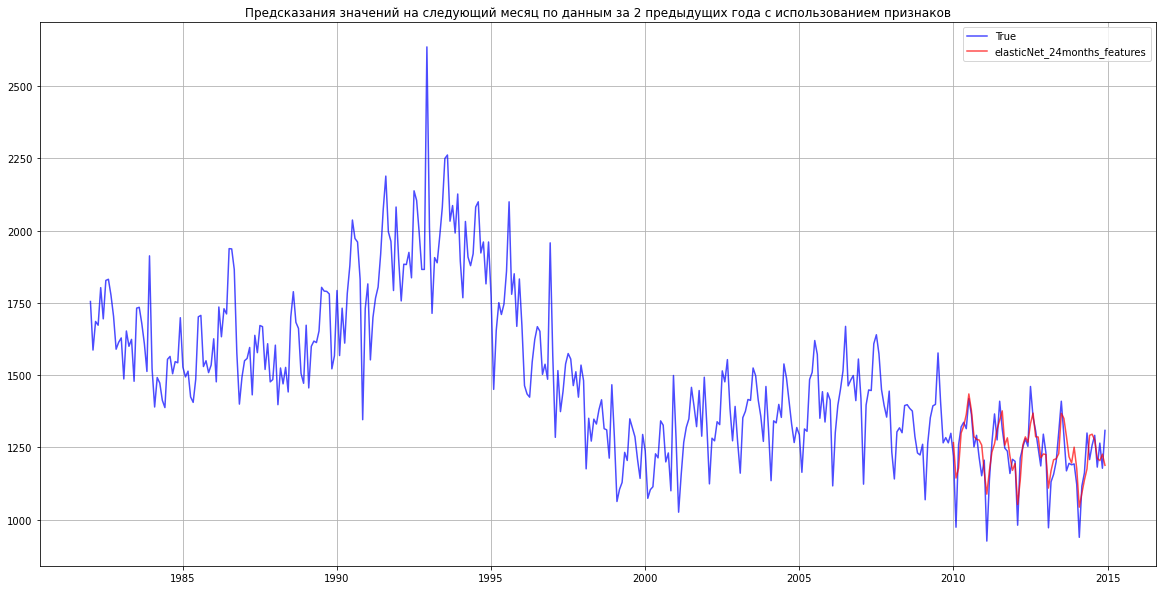

In [15]:
plt.figure(figsize=(20,10)) 
plt.plot(time_series['Date'], time_series['NumCases'], color='b', alpha=0.7, label="True")
plt.plot(time_series['Date'][-60:], time_series['NumCases_predict'][-60:], color='r', alpha=0.7, label="elasticNet_24months_features")
plt.title('Предсказания значений на следующий месяц по данным за 2 предыдущих года с использованием признаков')
plt.grid()
plt.legend()
plt.show()

**RMSE: 66.31015**
### Быстродействие

In [16]:
spans = []
for i in range(101):
    elasticNet_24months = sklearn.linear_model.ElasticNet(
        alpha=elasticNetCV_24months.alpha_, 
        l1_ratio=elasticNetCV_24months.l1_ratio_, 
        max_iter=elasticNetCV_24months.max_iter, 
        random_state=elasticNetCV_24months.random_state
    )
    start = time.time()
    elasticNet_24months.fit(X_train, Y_train)
    finish = time.time()
    spans.append(finish - start)

spans = np.asarray(spans[1:])
print('Mean fit time:', spans.mean(), 'Std:', spans.std(ddof=1))

Mean fit time: 0.6464143490791321 Std: 0.038754747431943085


In [17]:
spans = []
for i in range(101):
    start = time.time()
    elasticNet_24months.predict(X_test)
    finish = time.time()
    spans.append(finish - start)

spans = np.asarray(spans[1:])
print('Mean predict time:', spans.mean(), 'Std:', spans.std(ddof=1))

Mean predict time: 0.00019928455352783203 Std: 9.812125749383254e-05


## 3 Результаты
 - Модель ElasticNet, предсказывающей количество убийств на следующий месяц по данным за предыдущий год: значение метрики RMSE на тестовой выборке: 74.17701, время обучения - 0.15 секунды, время предсказания на тестовой выборе - 0.00012 секунды.
 - Модель ElasticNet, предсказывающей количество убийств на следующий месяц по данным за два предыдущих года: значение метрики RMSE на тестовой выборке: 66.31015, время обучения - 0.67 секунды, время предсказания на тестовой выборе - 0.00019 секунды.


Hardware: 2 ядра процессора Intel Xeon E5-2699 v4 2.20 ГГц, 12ГБ оперативной памяти